# 0. Importation des packages necessaires à l'étude 

In [3]:
# Import des packages
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import scipy.stats as st
import os
import sys
from skimpy import skim
import matplotlib.pyplot as plt


sys.path.insert(0, str(Path(os.getcwd()).resolve().parent.parent))
from Churn_contrat_auto.src.utils.tools import (
    rename_field_categories,
    distrib_for_cat_by_target,
    distrib_for_cont_by_target,
    boxplot_by_target,
    plot_generic,
    cramers_v_between_all,
    cramers_v_with_target,
    graph_correlations,
    extract_corr_pairs,
)

In [4]:
pd.set_option('display.max_columns', None)

#### Objectif : Cibler et répérer les clients qui vont résilier leur contrat auto. 

# 1. Import des données

In [5]:
# Chargement des données et affichage premières lignes. 
# Nous nous plaçons dans Churn_contrat_auto sur son terminal
 
df = pd.read_csv('/Users/melaniedaddio/Desktop/Cours_M2/M2_S2/scoring/Churn_contrat_auto/data/raw/ResiliationContratAuto.txt',
                 sep = '|',
                 encoding = 'latin1') # Encoding ajouté car nous ne sommes pas en utf8.
df.head()



/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/1216227562.py:4: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/melaniedaddio/Desktop/Cours_M2/M2_S2/scoring/Churn_contrat_auto/data/raw/ResiliationContratAuto.txt',


NO_AFR  CDUSGAUT     IDECON  CD_AGT CD_FML CDPRGES  DTDBUCON  \
0  A00104001204707     611.0  205808992  A00104      R   4190A     14630   
1  A00104001270809     636.0  105939601  A00104      C   4190A     14701   
2  A00104001397301     611.0  306115473  A00104      C   4190A     14848   
3  A00104001402563     611.0  206122172  A00104      C   4190A     14861   
4  A00104716130632     603.0      35070  A00104      S   4190A      4018   

   DTEFTMVT  MMJECHPP  MTPAATTC AUTO4R  NOCLIGES    NUMFOY  CDMARVEH  \
0     14812     121.0   1929.66      O  11852135  11852135   PEUGEOT   
1     14701     401.0   4106.44      O  12024026  12024026   PEUGEOT   
2     14848     826.0   4821.80      O  11154377   9064205   PEUGEOT   
3     14861     908.0   9460.74      O  10342979  10342979   RENAULT   
4     14707     407.0   1530.09      O   8826057   8289285  MERCEDES   

   DTOBTPDC  DTPMRMCI        LBMDLVH NOTAREFF PUI_TRE  RN_VL_VH  S_2_N  S_3_N  \
0   10273.0   10683.0            205    BL050       D       5.0    NaN    NaN   
1   12877.0   11262.0            309    BL064       K      10.0    NaN    NaN   
2   14196.0    9678.0            104    BL100       W       4.0    NaN    NaN   
3   14629.0   11870.0           CLIO    BL100       K      10.0    NaN    NaN   
4       NaN    5935.0  300D 12313010    BL064       G      15.0    NaN    NaN   

   S_1_N  S_0_N  S_3_O  S_2_O  S_1_O  S_0_O  NIVBM  MTPAAREF CDMCE  NBCTRES  \
0    NaN    NaN    NaN    NaN    NaN    NaN     50    3833.0     P        0   
1    NaN    NaN    NaN    NaN    NaN    NaN     76    5991.0     P        0   
2    NaN    NaN    NaN    NaN    NaN    NaN     95    4508.0     P        2   
3    NaN    NaN    NaN    NaN    NaN    NaN     95    9162.0     P        2   
4    NaN    NaN    NaN    NaN    NaN    NaN     50    3401.0     P        0   

    ANCCLI  CD_CSP CD_SEX  DT_NAI CDSITFAM DEPT REGION  NBCTACT  AU4R   MH  \
0  14598.0     NaN      F  3639.0        M  1.0     RA      1.0   1.0  0.0   
1  14701.0     NaN      M  6093.0        M  1.0     RA      1.0   1.0  0.0   
2   8866.0     NaN      M -8391.0        M  1.0     RA      5.0   3.0  1.0   
3  13872.0     NaN      M  7904.0        C  1.0     RA      1.0   1.0  0.0   
4   4018.0     NaN      M -3633.0        M  1.0     RA      4.0   2.0  2.0   

    DI   SA   IV  RESAU4R  RESMH  RESSA  RESIV  RESDI CLIACTIF         U  \
0  0.0  0.0  0.0      NaN    NaN    NaN    NaN    NaN      OUI  0.630638   
1  0.0  0.0  0.0      NaN    NaN    NaN    NaN    NaN      OUI  0.012901   
2  0.0  0.0  0.0      1.0    0.0    0.0    0.0    0.0      OUI  0.417773   
3  0.0  0.0  0.0      1.0    0.0    0.0    0.0    0.0      OUI  0.508437   
4  0.0  0.0  0.0      NaN    NaN    NaN    NaN    NaN      OUI  0.615430   

  CONTRAT ETAT  MOTIFRSL  COEFCOMM  COEFPFLT  CRM  
0   ACTIF   CO       NaN       100    0.8500   50  
1   ACTIF   CO       NaN       100    0.7500   76  
2   ACTIF   CO       NaN       100    0.9000   95  
3   ACTIF   CO       NaN       100    0.9000   95  
4   ACTIF   CO       NaN        91    0.8065   50

In [6]:
# Dimension de notre base de données. 
print(f'Nb lignes : {len(df)}')
print(f'Nb champs : {len(df.columns)}')

Nb lignes : 90247
Nb champs : 58


In [7]:
# Distribution de la variable cible.  Quantité des contrats Actifs et Resiliés 
# dans notre base. 
print(df.CONTRAT.value_counts())
print(df.CONTRAT.value_counts()/df.shape[0])

CONTRAT
ACTIF    80117
RESIL    10130
Name: count, dtype: int64
CONTRAT
ACTIF    0.887753
RESIL    0.112247
Name: count, dtype: float64


📌 POINT : 
----------
- Notre dataframe contient **90247 lignes** et **58 colonnes**. 
- Au vu du nombre des colonnes, nous pouvons directement avoir l'intuition\
qu'il faudra surement réaliser une sélection de variable afin de rendre\
notre modèle plus performants et eviter la multicolinéarité.
- La variable que nous cherchons à predire est la variable **Contrat**. Cette\
dernière nous indique si un client est toujours assuré ou non. Nous remarquons\
directement que notre **cible est désequilibrée**, avec majoritairement des **clients\
actifs (90%)** contre une minorité de **clients résiliés (10%)**.


# 2. Compréhension des données

### **N.B.** Afin de rendre l'interpretation des résultats plus simple nous avons décidé de modifier le noms de variables de bases qui n'était pas forcement très parlant et mettre les bon type à nos variables: 

In [8]:
# Nom des colonnes. 
df.columns

Index(['NO_AFR', 'CDUSGAUT', 'IDECON', 'CD_AGT', 'CD_FML', 'CDPRGES',
       'DTDBUCON', 'DTEFTMVT', 'MMJECHPP', 'MTPAATTC', 'AUTO4R', 'NOCLIGES',
       'NUMFOY', 'CDMARVEH', 'DTOBTPDC', 'DTPMRMCI', 'LBMDLVH', 'NOTAREFF',
       'PUI_TRE', 'RN_VL_VH', 'S_2_N', 'S_3_N', 'S_1_N', 'S_0_N', 'S_3_O',
       'S_2_O', 'S_1_O', 'S_0_O', 'NIVBM', 'MTPAAREF', 'CDMCE', 'NBCTRES',
       'ANCCLI', 'CD_CSP', 'CD_SEX', 'DT_NAI', 'CDSITFAM', 'DEPT', 'REGION',
       'NBCTACT', 'AU4R', 'MH', 'DI', 'SA', 'IV', 'RESAU4R', 'RESMH', 'RESSA',
       'RESIV', 'RESDI', 'CLIACTIF', 'U', 'CONTRAT', 'ETAT', 'MOTIFRSL',
       'COEFCOMM', 'COEFPFLT', 'CRM'],
      dtype='object')

In [9]:
# Changement de nom pour l'entièreté des variables.
renommage_vars = {
    "NO_AFR": "numero_affaire",
    "CDUSGAUT": "code_usage_auto",
    "IDECON": "id_contrat",
    "CD_AGT": "code_agent",
    "CD_FML": "code_formule",
    "CDPRGES": "code_produit_gestion",
    "DTDBUCON": "date_debut_contrat",
    "DTEFTMVT": "date_dernier_mouvement",
    "MMJECHPP": "echeance_contrat", 
    "MTPAATTC": "prime_annuelle_ttc",
    "AUTO4R": "auto_4_roues",
    "NOCLIGES": "numero_client_gestion",
    "NUMFOY": "numero_foyer",
    "CDMARVEH": "code_marque_vehicule",
    "DTOBTPDC": "date_obtention_permis",
    "DTPMRMCI": "date_mise_circulation",
    "LBMDLVH": "libelle_modele_vehicule",
    "NOTAREFF": "numero_tarif",
    "PUI_TRE": "puissance_fiscale",
    "RN_VL_VH": "rang_valeur_vehicule",
    "S_2_N": "nb_sinistres_2_ans_non_resp",
    "S_3_N": "nb_sinistres_3_ans_non_resp",
    "S_1_N": "nb_sinistres_1_an_non_resp",
    "S_0_N": "nb_sinistres_0_an_non_resp",
    "S_3_O": "nb_sinistres_3_ans_resp",
    "S_2_O": "nb_sinistres_2_ans_resp",
    "S_1_O": "nb_sinistres_1_an_resp",
    "S_0_O": "nb_sinistres_0_an_resp",
    "NIVBM": "niveau_bonus_malus",
    "MTPAAREF": "prime_reference",
    "CDMCE": "code_marche",
    "NBCTRES": "nb_contrats_resilies",
    "ANCCLI": "anciennete_client",
    "CD_CSP": "code_csp",
    "CD_SEX": "sexe",
    "DT_NAI": "date_naissance",
    "CDSITFAM": "situation_familiale",
    "DEPT": "departement",
    "REGION": "region",
    "NBCTACT": "nb_contrats_actifs",
    "AU4R": "nb_contrats_actifs_auto",
    "MH": "nb_contrats_actifs_habitation",
    "DI": "nb_contrats_actifs_divers",
    "SA": "nb_contrats_actifs_sante",
    "IV": "nb_contrats_actifs_vie",
    "RESAU4R": "nb_contrats_auto_resilies",
    "RESMH": "nb_contrats_habitation_resilies",
    "RESSA": "nb_contrats_sante_resilies",
    "RESIV": "nb_contrats_vie_resilies",
    "RESDI": "nb_contrats_divers_resilies",
    "CLIACTIF": "client_actif",
    "U": "score_u",
    "CONTRAT": "contrat",
    "ETAT": "etat",
    "MOTIFRSL": "motif_resiliation",
    "COEFCOMM": "coefficient_commission",
    "COEFPFLT": "coefficient_profil_tarif",
    "CRM": "crm"
}


In [10]:
# Mise en place de la nouvelle nomenclature.
df.rename(columns=renommage_vars, inplace=True)

In [11]:
# Affichage des premières lignes avec la nouvelle nomenclature.
df.head()

numero_affaire  code_usage_auto  id_contrat code_agent code_formule  \
0  A00104001204707            611.0   205808992     A00104            R   
1  A00104001270809            636.0   105939601     A00104            C   
2  A00104001397301            611.0   306115473     A00104            C   
3  A00104001402563            611.0   206122172     A00104            C   
4  A00104716130632            603.0       35070     A00104            S   

  code_produit_gestion  date_debut_contrat  date_dernier_mouvement  \
0                4190A               14630                   14812   
1                4190A               14701                   14701   
2                4190A               14848                   14848   
3                4190A               14861                   14861   
4                4190A                4018                   14707   

   echeance_contrat  prime_annuelle_ttc auto_4_roues  numero_client_gestion  \
0             121.0             1929.66            O               11852135   
1             401.0             4106.44            O               12024026   
2             826.0             4821.80            O               11154377   
3             908.0             9460.74            O               10342979   
4             407.0             1530.09            O                8826057   

   numero_foyer code_marque_vehicule  date_obtention_permis  \
0      11852135              PEUGEOT                10273.0   
1      12024026              PEUGEOT                12877.0   
2       9064205              PEUGEOT                14196.0   
3      10342979              RENAULT                14629.0   
4       8289285             MERCEDES                    NaN   

   date_mise_circulation libelle_modele_vehicule numero_tarif  \
0                10683.0                     205        BL050   
1                11262.0                     309        BL064   
2                 9678.0                     104        BL100   
3                11870.0                    CLIO        BL100   
4                 5935.0           300D 12313010        BL064   

  puissance_fiscale  rang_valeur_vehicule  nb_sinistres_2_ans_non_resp  \
0                 D                   5.0                          NaN   
1                 K                  10.0                          NaN   
2                 W                   4.0                          NaN   
3                 K                  10.0                          NaN   
4                 G                  15.0                          NaN   

   nb_sinistres_3_ans_non_resp  nb_sinistres_1_an_non_resp  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

   nb_sinistres_0_an_non_resp  nb_sinistres_3_ans_resp  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   

   nb_sinistres_2_ans_resp  nb_sinistres_1_an_resp  nb_sinistres_0_an_resp  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   niveau_bonus_malus  prime_reference code_marche  nb_contrats_resilies  \
0                  50           3833.0           P                     0   
1                  76           5991.0           P                     0   
2                  95  

In [12]:
# Information de type sur nos données par colonne et valeurs non-nulles.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90247 entries, 0 to 90246
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   numero_affaire                   90247 non-null  object 
 1   code_usage_auto                  90231 non-null  float64
 2   id_contrat                       90247 non-null  int64  
 3   code_agent                       90247 non-null  object 
 4   code_formule                     89702 non-null  object 
 5   code_produit_gestion             90247 non-null  object 
 6   date_debut_contrat               90247 non-null  int64  
 7   date_dernier_mouvement           90247 non-null  int64  
 8   echeance_contrat                 90231 non-null  float64
 9   prime_annuelle_ttc               90247 non-null  float64
 10  auto_4_roues                     90247 non-null  object 
 11  numero_client_gestion            90247 non-null  int64  
 12  numero_foyer      

In [13]:
# Modalités de chacune de nos variables appartenant à notre dataset.
df_nunique = df.nunique().reset_index().rename(columns={'index':'Champ',0:'Nb_Distinct_Values'})\
                .sort_values('Nb_Distinct_Values',ascending=False)
df_nunique

Champ  Nb_Distinct_Values
51                          score_u               90247
0                    numero_affaire               90243
2                        id_contrat               90243
11            numero_client_gestion               88018
12                     numero_foyer               87025
9                prime_annuelle_ttc               79717
35                   date_naissance               22300
14            date_obtention_permis               15770
29                  prime_reference               14957
32                anciennete_client                9760
6                date_debut_contrat                8977
56         coefficient_profil_tarif                7692
16          libelle_modele_vehicule                6806
3                        code_agent                1255
7            date_dernier_mouvement                1093
15            date_mise_circulation                 557
8                  echeance_contrat                 365
13             code_marque_vehicule                 256
33                         code_csp                 234
37                      departement                 196
55           coefficient_commission                  99
57                              crm                  94
28               niveau_bonus_malus                  94
1                   code_usage_auto                  71
39               nb_contrats_actifs                  35
4                      code_formule                  25
44           nb_contrats_actifs_vie                  24
41    nb_contrats_actifs_habitation                  18
40          nb_contrats_actifs_auto                  18
19             rang_valeur_vehicule                  18
17                     numero_tarif                  17
31             nb_contrats_resilies                  16
54                motif_resiliation                  15
18                puissance_fiscale                  14
42        nb_contrats_actifs_divers                  14
45        nb_contrats_auto_resilies                  12
38                           region                  11
49      nb_contrats_divers_resilies                   8
46  nb_contrats_habitation_resilies                   8
43         nb_contrats_actifs_sante                   8
36              situation_familiale                   7
5              code_produit_gestion                   6
47       nb_contrats_sante_resilies                   6
21      nb_sinistres_3_ans_non_resp                   5
22       nb_sinistres_1_an_non_resp                   5
23       nb_sinistres_0_an_non_resp                   4
24          nb_sinistres_3_ans_resp                   4
20      nb_sinistres_2_ans_non_resp                   4
53                             etat                   4
25          nb_sinistres_2_ans_resp                   3
48         nb_contrats_vie_resilies                   3
26           nb_sinistres_1_an_resp                   3
27           nb_sinistres_0_an_resp                   3
50                     client_actif                   2
52                          contrat                   2
34                             sexe                   2
30                      code_marche                   2
10                     auto_4_roues                   1

In [14]:
# Pourcentage de valeures nulles de chacune des colonnes de notre dataset.
df.isnull().sum()/df.shape[0] 

numero_affaire                     0.000000
code_usage_auto                    0.000177
id_contrat                         0.000000
code_agent                         0.000000
code_formule                       0.006039
code_produit_gestion               0.000000
date_debut_contrat                 0.000000
date_dernier_mouvement             0.000000
echeance_contrat                   0.000177
prime_annuelle_ttc                 0.000000
auto_4_roues                       0.000000
numero_client_gestion              0.000000
numero_foyer                       0.000000
code_marque_vehicule               0.000964
date_obtention_permis              0.002139
date_mise_circulation              0.010327
libelle_modele_vehicule            0.001219
numero_tarif                       0.002959
puissance_fiscale                  0.001839
rang_valeur_vehicule               0.001884
nb_sinistres_2_ans_non_resp        0.894600
nb_sinistres_3_ans_non_resp        0.910280
nb_sinistres_1_an_non_resp      

💡 CONSTATS ET INTUITIONS : 
------

Nous allons supprimer les variables identifiants ou sans variance : 
- La variable **auto_4_roues** ne nous apporte aucune information car elle n'a qu'une modalité.\
Nous allons donc la supprimer.
- Nous allons supprimer **numero_affaire, id_contrat, numero_client_gestion, numero_foyer**.

Certaines variables de dates comme : **date_naissance, date_obtention_permis, date_mise_circulation**,\
**date_debut_contrat, date_dernier_mouvement, echeance_contrat, echeance_contrat_periode**, sont\
à transformer pour la suite. Par exemple obetnir des variables comme age, durée, etc

On constate que beaucoup de nos variables ne semblent pas au bon type. Pour faciliter nos future\
interpretations (graphique) il est preferable de corriger ce problème des maintenant. 

PS : Il est important de noter que les variables anciennete_client et echeance contrat ont le meme\
nombre de valeurs manquantes. Cela nous indique que ces deux variables sont surement liées.

In [15]:
# Premières variables a être supprimées. 
df.drop(columns=['numero_affaire', 'id_contrat', "numero_client_gestion", "numero_foyer", "auto_4_roues"], inplace=True)

## 2.1 Variables de temps : 

### 2.1.1 Traitement :

In [16]:
# Variables de temps. 
var_date = ['date_debut_contrat', 'date_dernier_mouvement', 'date_obtention_permis', 'date_mise_circulation', 'date_naissance', 'anciennete_client', 'echeance_contrat']

In [17]:
# Affichage des variables de temps. 
df[var_date]

date_debut_contrat  date_dernier_mouvement  date_obtention_permis  \
0                   14630                   14812                10273.0   
1                   14701                   14701                12877.0   
2                   14848                   14848                14196.0   
3                   14861                   14861                14629.0   
4                    4018                   14707                    NaN   
...                   ...                     ...                    ...   
90242               13340                   14801                11197.0   
90243               13504                   14051                 9212.0   
90244               14335                   14335                 9303.0   
90245               14474                   14840                13559.0   
90246               11578                   14866                 9890.0   

       date_mise_circulation  date_naissance  anciennete_client  \
0                    10683.0          3639.0            14598.0   
1                    11262.0          6093.0            14701.0   
2                     9678.0         -8391.0             8866.0   
3                    11870.0          7904.0            13872.0   
4                     5935.0         -3633.0             4018.0   
...                      ...             ...                ...   
90242                11323.0           -66.0            13340.0   
90243                10624.0          2181.0            13504.0   
90244                10897.0          2702.0            11401.0   
90245                10593.0          6627.0            13590.0   
90246                 7518.0          3167.0            11578.0   

       echeance_contrat  
0                 121.0  
1                 401.0  
2                 826.0  
3                 908.0  
4                 407.0  
...                 ...  
90242             710.0  
90243             621.0  
90244             401.0  
90245             818.0  
90246             913.0  

[90247 rows x 7 columns]

* Les valeurs comme 14630, 12877, 6093 sont typiques de "jours depuis 1960-01-01".

In [18]:
# Dates qui ont comme base la première date Excel. 
var_date_excel = ['date_debut_contrat', 'date_dernier_mouvement', 'date_obtention_permis', 'date_mise_circulation', 'date_naissance']

In [19]:
# Etablissement du système de dates. 
origin = pd.Timestamp("1960-01-01")
min_days = -40000
max_days = 100000

# Création d'un dataframe contenant les variables de temps base Excel. 
df_dates = df[var_date_excel].copy()

# Transformation des dates qui semblent être logiques. 
for col in df_dates.columns:
    valid = df_dates[col].between(min_days, max_days)
    df_dates[col + "_converted"] = pd.NaT
    df_dates.loc[valid, col + "_converted"] = pd.to_datetime(origin + pd.to_timedelta(df_dates.loc[valid, col], unit="D"))

#   Affichage de nos variables une fois transformées. 
df_dates[[col + "_converted" for col in var_date_excel]].head()

date_debut_contrat_converted date_dernier_mouvement_converted  \
0                   2000-01-21                       2000-07-21   
1                   2000-04-01                       2000-04-01   
2                   2000-08-26                       2000-08-26   
3                   2000-09-08                       2000-09-08   
4                   1971-01-01                       2000-04-07   

  date_obtention_permis_converted date_mise_circulation_converted  \
0                      1988-02-16                      1989-04-01   
1                      1995-04-04                      1990-11-01   
2                      1998-11-13                      1986-07-01   
3                      2000-01-20                      1992-07-01   
4                             NaT                      1976-04-01   

  date_naissance_converted  
0               1969-12-18  
1               1976-09-06  
2               1937-01-10  
3               1981-08-22  
4               1950-01-20

In [20]:
# Nous ajoutons les variables transformées dans notre dataset d'origin.
columns_to_add = [col for col in df_dates.columns if col.endswith("_converted")]
df = pd.concat([df, df_dates[columns_to_add]], axis=1)

🤔 Est-ce que les dates converties ont du sens ?

- date_naissance convertie ≈ années 1950–2000 ?

- date_debut_contrat ≈ 2000–2024 ?

- date_dernier_mouvement ≥ date_debut_contrat ?

In [21]:
# Statistiques descriptives de notre base de données. 
df_dates.describe()

date_debut_contrat  date_dernier_mouvement  date_obtention_permis  \
count        90247.000000            90247.000000           90054.000000   
mean         11978.749166            14730.439006            6205.395785   
min         -21549.000000             8948.000000          -14244.000000   
25%          10750.000000            14693.000000            2518.000000   
50%          12626.000000            14765.000000            6552.500000   
75%          13970.000000            14807.000000           10246.000000   
max          14883.000000            14944.000000           14879.000000   
std           2622.812793              188.381009            5070.297584   

       date_mise_circulation  date_naissance   date_debut_contrat_converted  \
count           89315.000000    90042.000000                          90247   
mean            11428.437026    -2936.040181  1992-10-17 17:58:47.957715968   
min            -21549.000000  -111462.000000            1901-01-01 00:00:00   
25%             10227.000000    -6758.000000            1989-06-07 00:00:00   
50%             11535.000000    -2674.000000            1994-07-27 00:00:00   
75%             13027.000000     1424.000000            1998-04-01 00:00:00   
max             14792.000000    14610.000000            2000-09-30 00:00:00   
std              2153.892706     5696.195202                            NaN   

      date_dernier_mouvement_converted date_obtention_permis_converted  \
count                            90247                           90054   
mean     2000-04-30 10:32:10.142830080   1976-12-27 09:29:55.802518464   
min                1984-07-01 00:00:00             1921-01-01 00:00:00   
25%                2000-03-24 00:00:00             1966-11-23 00:00:00   
50%                2000-06-04 00:00:00             1977-12-09 12:00:00   
75%                2000-07-16 00:00:00             1988-01-20 00:00:00   
max                2000-11-30 00:00:00             2000-09-26 00:00:00   
std                                NaN                             NaN   

      date_mise_circulation_converted       date_naissance_converted  
count                           89315                          90035  
mean    1991-04-16 10:29:19.068465536  1951-12-25 06:29:59.540178816  
min               1901-01-01 00:00:00            1857-03-31 00:00:00  
25%               1988-01-01 00:00:00            1941-07-01 00:00:00  
50%               1991-08-01 00:00:00            1952-09-06 00:00:00  
75%               1995-09-01 00:00:00            1963-11-26 00:00:00  
max               2000-07-01 00:00:00            2000-01-01 00:00:00  
std                               NaN                            NaN

* **Ancienneté Client** 

🤔 On cherche à savoir s'il s'agit :
- d'une date (encodée comme les autres)
- ou d'une durée en jours

In [22]:
# Établissement de nouvelles variables de temps. 
# L' écart des jours devrait plutot être une somme à mon avis. 

# valid = df["anciennete_client"].between(-40000, 100000)
# df["anciennete_date"] = pd.NaT
# df.loc[valid, "anciennete_date"] = pd.to_datetime(origin + pd.to_timedelta(df.loc[valid, "anciennete_client"], unit="D"))

# df["date_debut_contrat_date"] = pd.to_datetime(origin + pd.to_timedelta(df["date_debut_contrat"], unit="D"))
# df["écart_jours_anciennete"] = (df["date_debut_contrat_date"] - df["anciennete_date"]).dt.days

# df[["anciennete_client", "anciennete_date", "date_debut_contrat_date", "écart_jours_anciennete"]].head(10)


In [23]:
# Pourcentage des ecarts inferieurs à 1. 
#df[df["écart_jours_anciennete"]<1].shape[0] / df.shape[0] *100

Pour beaucoup de lignes, **anciennete_client correspond exactement à**\
**date_debut_contrat** -> écart d'environ 0.

Cependant pour certaines vraiables il y a un écart positif\
(ex. : 32, 5982, etc.) -> **la date anciennete_client est avant la date**\
**de début de contrat.**

=> anciennete_client est une date encodée en jours depuis 1960, tout comme\
les autres colonnes de type date. Il semble de l'anciennté client soit la date\
à laquelle le client a rejoint l'assurance. Ainsi il se peut que le client soit\
devenu client et ait commencé son contrat actuel en meme temps. Mais il se peut\
ausssi que le client soit deveue client et ait eu plusieur contrat avant le contrat actuel.

In [24]:
# Recoder cette variables comme les variables precedentes :
valid = df["anciennete_client"].between(-40000, 100000)
df["anciennete_client_converted"] = pd.NaT
df.loc[valid, "anciennete_client_converted"] = pd.to_datetime(origin + pd.to_timedelta(df.loc[valid, "anciennete_client"], unit="D"))


* **Echeance Contrat :**

Echeance contrat elle comme son nom de base l'indique est la date d'écheance du contrat en MMJJ.

In [25]:
def convert_to_mmjj_date(value):
    if pd.isna(value):
        return pd.NaT  
    value = str(int(value)).zfill(4)    
    return pd.to_datetime("1960" + value, format="%Y%m%d", errors='coerce')

df['echeance_contrat'] = df['echeance_contrat'].apply(convert_to_mmjj_date)

df['echeance_contrat_mmjj'] = df['echeance_contrat'].dt.strftime("%m-%d")

print(df[['echeance_contrat', 'echeance_contrat_mmjj']])


      echeance_contrat echeance_contrat_mmjj
0           1960-01-21                 01-21
1           1960-04-01                 04-01
2           1960-08-26                 08-26
3           1960-09-08                 09-08
4           1960-04-07                 04-07
...                ...                   ...
90242       1960-07-10                 07-10
90243       1960-06-21                 06-21
90244       1960-04-01                 04-01
90245       1960-08-18                 08-18
90246       1960-09-13                 09-13

[90247 rows x 2 columns]


📌 Point :
---
Après toutes ces analyse voici nos conclusions : 
- date_debut_contrat : date où le contrat à démarré
- anciennete_client : date à laquelle le client à rejoint l'assurance (explique le fait qu'on est des valeur indentique ou inférieur avec date_debut_contrat)
- echeance_contrat : Date d'anniversaire du contrat chaque année. En d'autre terme donne la date d'echeance annuelle du contrat.

### 2.1.2 Création de variables :

Apres cette analyse il nous a parut pertinent pour notre modèle de créer de nouvelles\
variables comme :
- age 
- age du vehicule
- savoir s'il s'agit du premier contrat du client 

Cependant un problème se pose : comme nous avons converti nos dates avec un referentiel\
choisi on fausserait nos resultat si on calculait ces durées en fonction de la date actuelle. 

Nous allons donc calculer ces variables à partir de la date de debut de contrat. 

On aurait aussi pu créer des vraibles telles que : 
- mouvements sur la dernière année : qui indique s'il y a eu un mouvement sur l'année precedente. 



In [26]:
# Création de variable d'age au début du contrat.
df["age_au_debut"] = (df["date_debut_contrat_converted"] - df["date_naissance_converted"]).dt.days // 365

In [27]:
# Création de variable d'age au moment de la mise en circulation. 
df["age_mise_circ"] = (df["date_mise_circulation_converted"] - df["date_naissance_converted"]).dt.days // 365

In [28]:
# Création de variable d'age au moment de l'optention du permis. 
df["age_optention_permis"] = (df["date_obtention_permis_converted"] - df["date_naissance_converted"]).dt.days // 365

In [29]:
# Création de variable de délais entre le début du contrat et l'ancienneté du permis. 
df["delai_permis_contrat"] = (df["date_debut_contrat_converted"] - df["date_obtention_permis_converted"]).dt.days // 365

In [30]:
# Création de variable de ancienneté du vehicule. 
df["age_vehicule"] = (df["date_debut_contrat_converted"] - df["date_mise_circulation_converted"]).dt.days // 365

In [31]:
# Création de la variable de délai entre la date de début du contrat et la date du dernier mouvement.
df["delai_dernier_mouvement"] = (df["date_dernier_mouvement_converted"] - df["date_debut_contrat_converted"]).dt.days 

In [32]:
# Création de la variable premier_contrat qui indique si la date anciennté client est égale à la date début contrat.
df["premier_contrat"] = (df["date_debut_contrat_converted"] == df["anciennete_client_converted"]).astype(int).astype("object")

### 2.1.3 Analyse :

In [33]:
# Selection des variables de temps afin de réaliser des graphiques. 
var_date_graph = df.select_dtypes(include=['datetime64[ns]']).columns.tolist() + ['echeance_contrat_mmjj', 'age_au_debut', 'age_mise_circ', 'delai_permis_contrat', 'age_vehicule', 'age_optention_permis', 'delai_dernier_mouvement']

In [34]:
# Nous retirons de notre liste les variables qui ont fait l'objet d'une 
# transformation et qui sont des doublons. 

var_sup = [ 'echeance_contrat', 'date_debut_contrat', 'date_dernier_mouvement', 'date_obtention_permis', 'date_mise_circulation', "date_naissance"]

for var in var_sup:
    if var in var_date_graph:
        var_date_graph.remove(var)


In [35]:
# Liste des variables que nous considerons de type date.
var_date_graph

['date_debut_contrat_converted',
 'date_dernier_mouvement_converted',
 'date_obtention_permis_converted',
 'date_mise_circulation_converted',
 'date_naissance_converted',
 'anciennete_client_converted',
 'echeance_contrat_mmjj',
 'age_au_debut',
 'age_mise_circ',
 'delai_permis_contrat',
 'age_vehicule',
 'age_optention_permis',
 'delai_dernier_mouvement']

In [36]:
def hist_box(data, var):
    '''  
    Description : Cette fonction nous permet de créer un boxplot
    et un histograme pour chacune de nos variables. 
    '''
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Boxplot
    sns.boxplot(data=data, x=var, ax=ax_box)
    ax_box.set(xlabel='')
    ax_box.set_title(f"Histogramme et Boxplot pour la variable '{var}'", fontsize=14)

    # Histogramme
    sns.histplot(data=data, x=var, kde=True, ax=ax_hist)
    ax_hist.set(xlabel=var, ylabel='Fréquence')

    plt.tight_layout()
    plt.show()


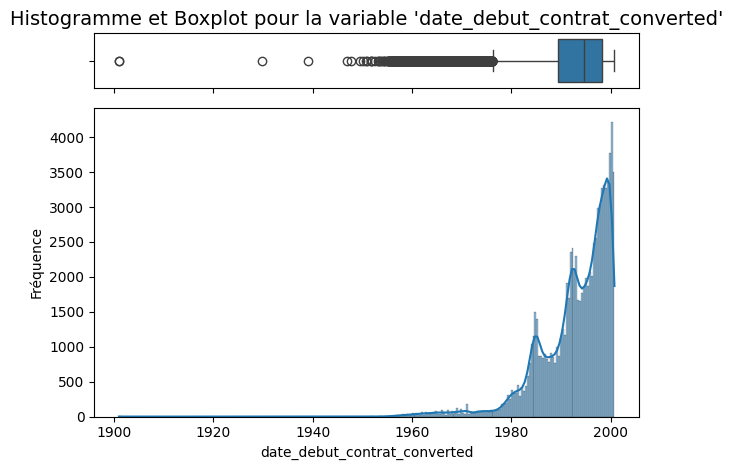

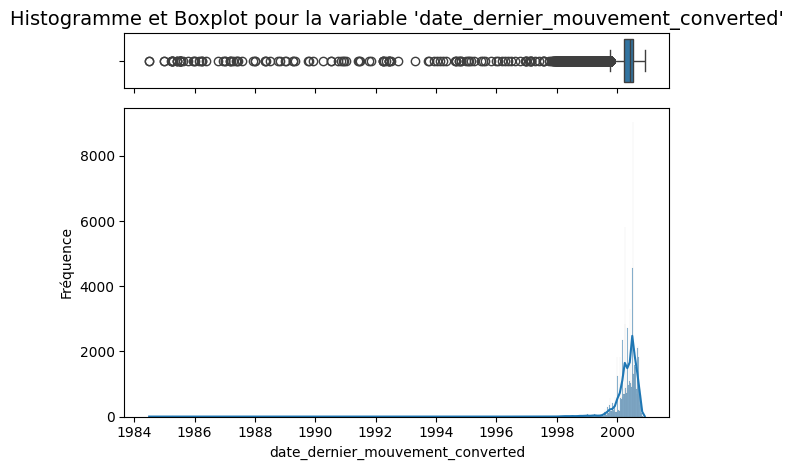

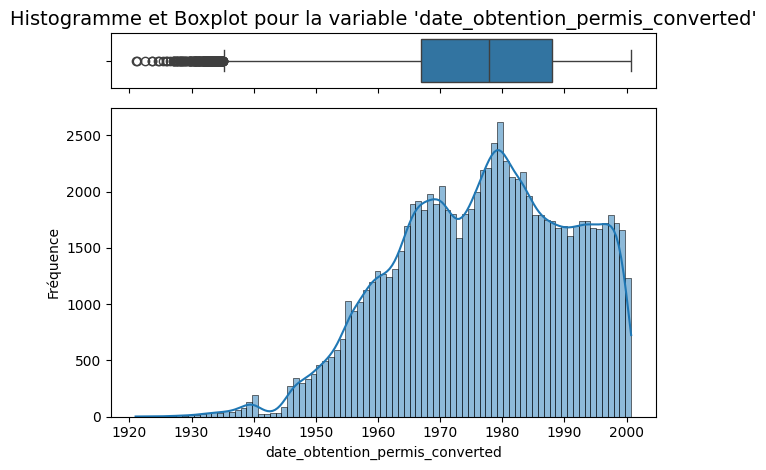

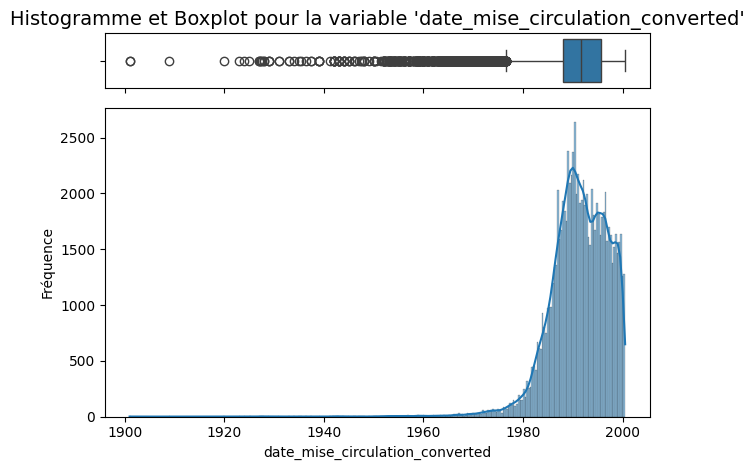

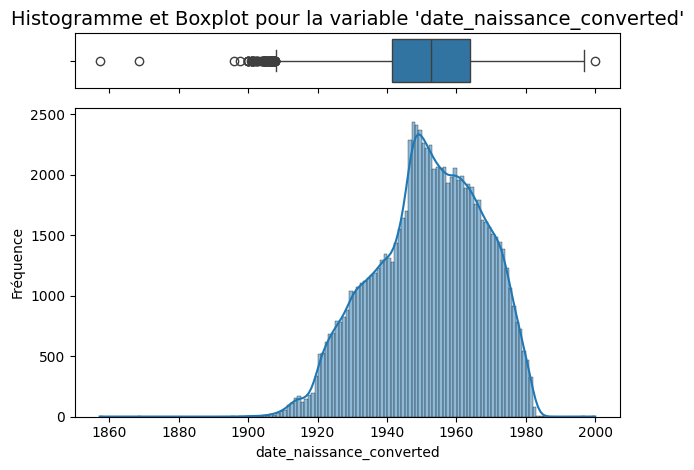

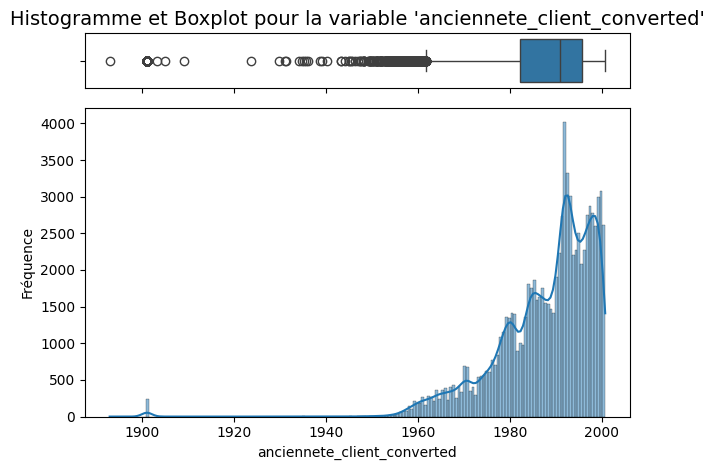

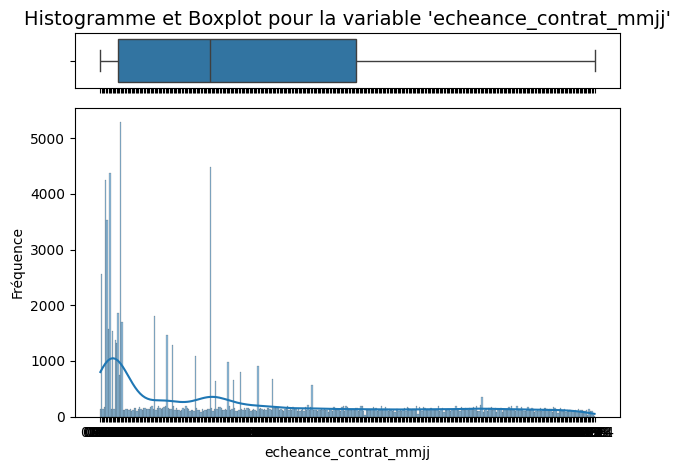

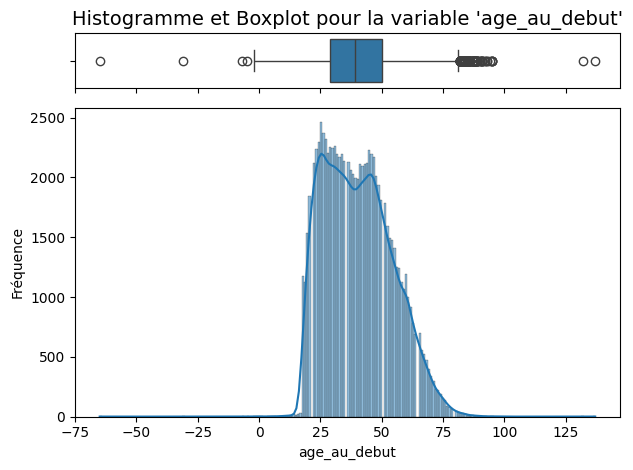

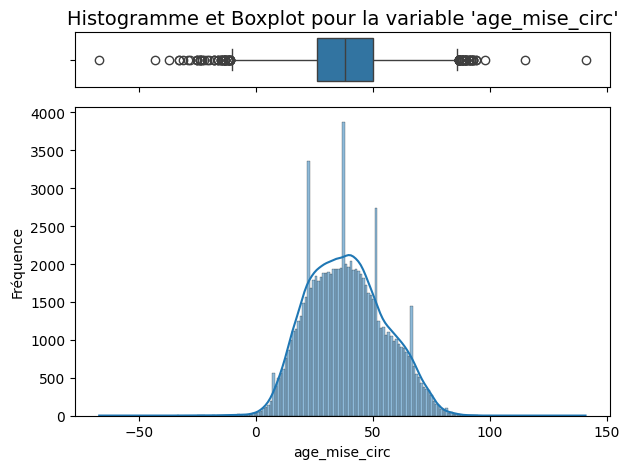

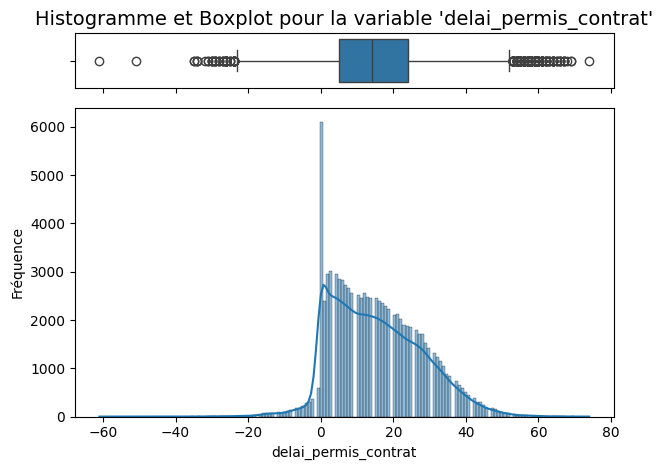

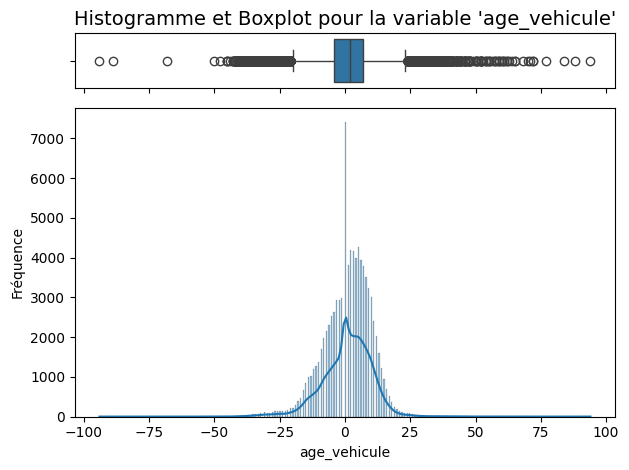

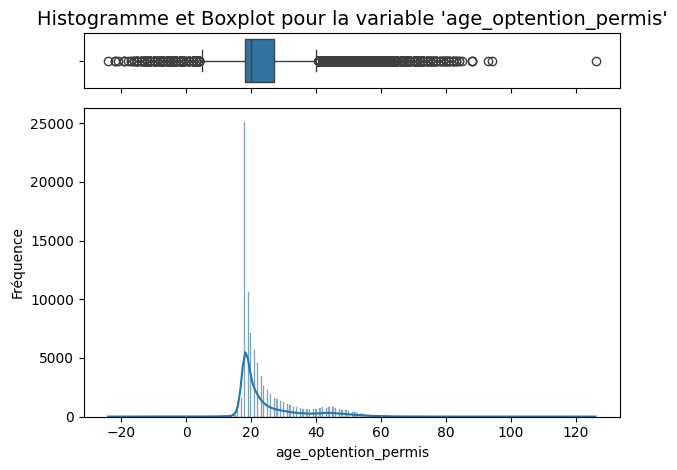

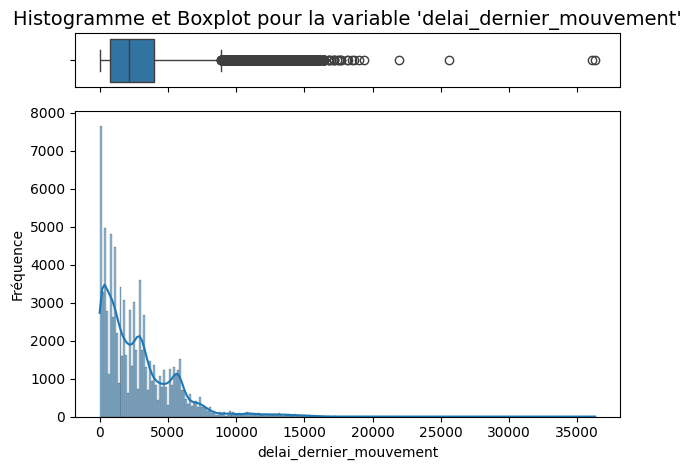

In [37]:
# Réalisation des graphiques à l'aide de la fonction crée
# ci-dessous. 
for var in var_date_graph:
    hist_box(df, var)
    

📌 POINT 
---
- **date_debut_contrat_converted :** valeur plutot cohérentes. Cependant certaines valeurs paraissent très anciennes.
- **date_dernier_mouvement_converted :** Idem
- **date_obtention_permis_converted :** Idem
- **date_mise_circulation_converted :** Idem
- **date_naissance_converted :** Idem 
- **anciennete_date :** distribution très proche de date_debut_contrat_converted
- **echeance_contrat :** il semble y avoir des piques dans les date d'écheance. Cela indique que plusieur clients ont le meme comportement à ce niveau. Il semble que beaucoup de contrat prennent echeance au meme moment.
- **age_au_debut :** Convertir en Nan les valeurs négatives
- **age_mise_circ :** Créer des variables age_avant_mise_circulation et age_apres_mise_circulation, qui dit si age_mise_circ est négatif-> age_avant_mise_circulation =1 et age_apres_mise_circulation = 0
- **delai_permis_contrat :** Créer des variables permis_avant_contrat et permis_apres_contrat, qui dit si delai_permis_contrat est négatif -> permis_avant_contrat =1 et permis_apres_contrat = 0
- **age_vehicule :** Créer des variables vehicule_avant_contrat et vehicule_apres_contrat, qui dit si age_vehicule est négatif -> vehicule_avant_contrat =1 et vehicule_apres_contrat = 0
- **age_optention_permis :** Convertir en Nan les valeurs négatives

### 2.1.4 Analyse et traiment des anomalies :

In [38]:
df.loc[df["age_au_debut"] < 0, "age_au_debut"] = np.nan
df.loc[df["age_optention_permis"] < 0, "age_optention_permis"] = np.nan

df["age_avant_mise_circulation"] = np.where(df["age_mise_circ"] < 0, 1, 0)

df["permis_avant_contrat"] = np.where(df["delai_permis_contrat"] < 0, 1, 0)

df["vehicule_avant_contrat"] = np.where(df["age_vehicule"] < 0, 1, 0)


In [39]:
# Convertion des variable en variables catégorielles
df[["age_avant_mise_circulation", "permis_avant_contrat", "vehicule_avant_contrat"]] = df[["age_avant_mise_circulation", "permis_avant_contrat", "vehicule_avant_contrat"]].astype(object)

## 2.2 Variables continues : 

In [40]:
# Liste contenant les noms des variables continues
var_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [41]:
# Affichage de la liste de variables continues. 
var_num

['code_usage_auto',
 'date_debut_contrat',
 'date_dernier_mouvement',
 'prime_annuelle_ttc',
 'date_obtention_permis',
 'date_mise_circulation',
 'rang_valeur_vehicule',
 'nb_sinistres_2_ans_non_resp',
 'nb_sinistres_3_ans_non_resp',
 'nb_sinistres_1_an_non_resp',
 'nb_sinistres_0_an_non_resp',
 'nb_sinistres_3_ans_resp',
 'nb_sinistres_2_ans_resp',
 'nb_sinistres_1_an_resp',
 'nb_sinistres_0_an_resp',
 'niveau_bonus_malus',
 'prime_reference',
 'nb_contrats_resilies',
 'anciennete_client',
 'code_csp',
 'date_naissance',
 'nb_contrats_actifs',
 'nb_contrats_actifs_auto',
 'nb_contrats_actifs_habitation',
 'nb_contrats_actifs_divers',
 'nb_contrats_actifs_sante',
 'nb_contrats_actifs_vie',
 'nb_contrats_auto_resilies',
 'nb_contrats_habitation_resilies',
 'nb_contrats_sante_resilies',
 'nb_contrats_vie_resilies',
 'nb_contrats_divers_resilies',
 'score_u',
 'motif_resiliation',
 'coefficient_commission',
 'coefficient_profil_tarif',
 'crm',
 'age_au_debut',
 'age_mise_circ',
 'age_opte

In [42]:
# Variables qui sont à enlever de la liste de variables continues. 
# Nous gardons ce qui nous intéresse dans la liste à utiliser dans 
# les graphiques. 

to_remove = [
    'motif_resiliation',
    'code_csp',
    'code_usage_auto',
    'date_debut_contrat',
    'date_dernier_mouvement',
    'echeance_contrat',
    'prime_annuelle_ttc',
    'date_obtention_permis',
    'date_mise_circulation',
    'anciennete_client',
    'date_naissance',
    'écart_jours_anciennete',
    'anciennete_jours',
    'anciennete_annees',
    'age_au_debut',
    'age_mise_circ',
    'delai_permis_contrat',
    'age_vehicule',
    'age_optention_permis', 'rang_valeur_vehicule', "delai_dernier_mouvement"
]

var_num_graph = [var for var in var_num if var not in to_remove]


### 2.2.1 Analyse :

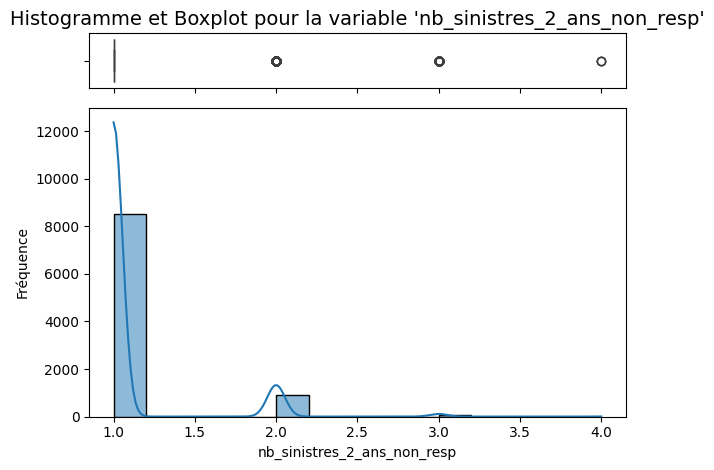

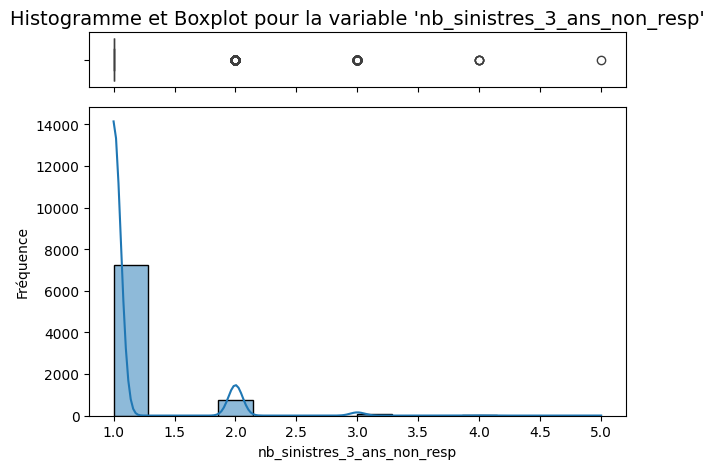

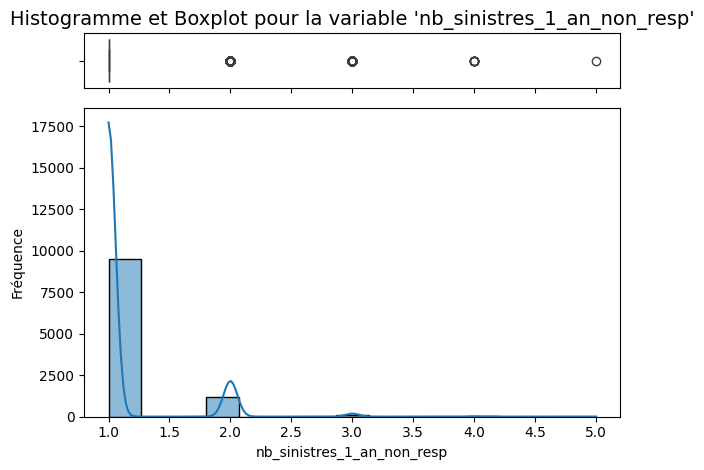

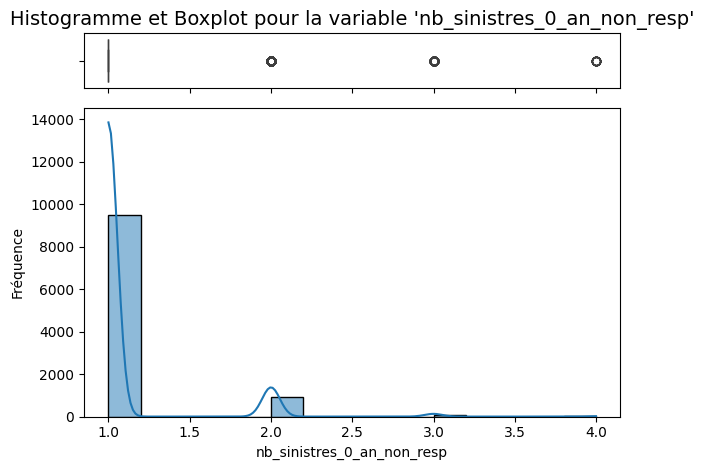

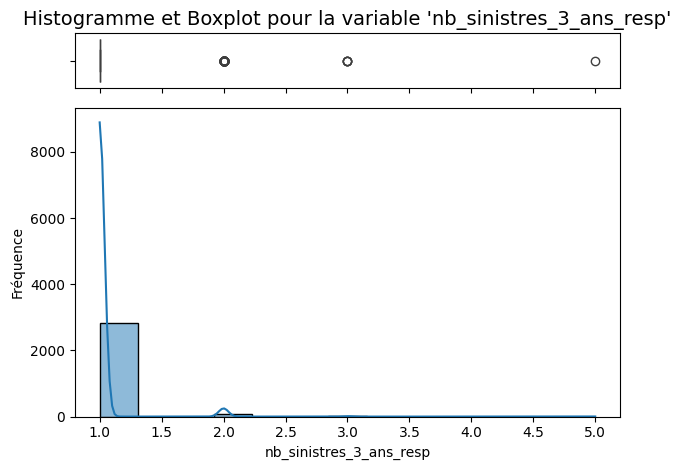

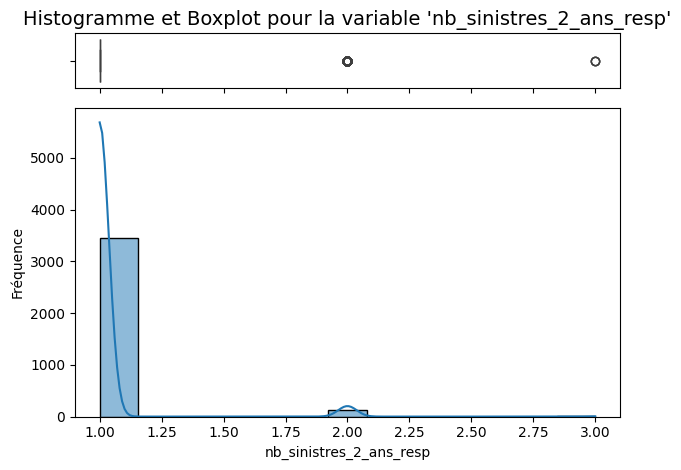

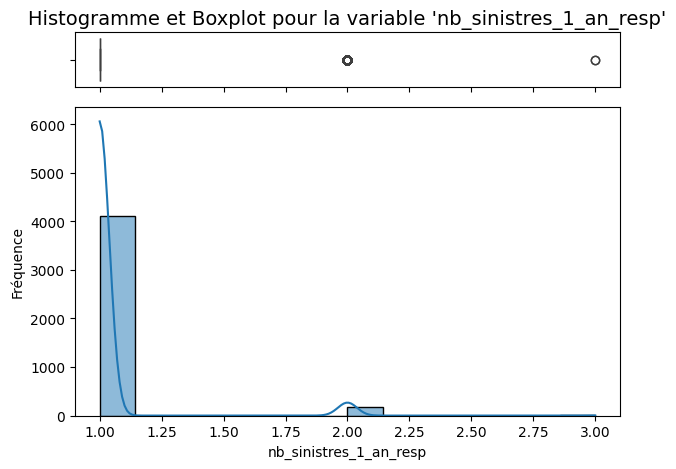

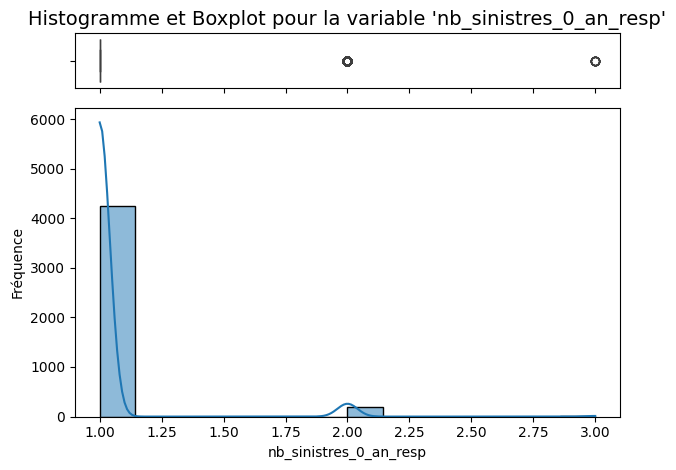

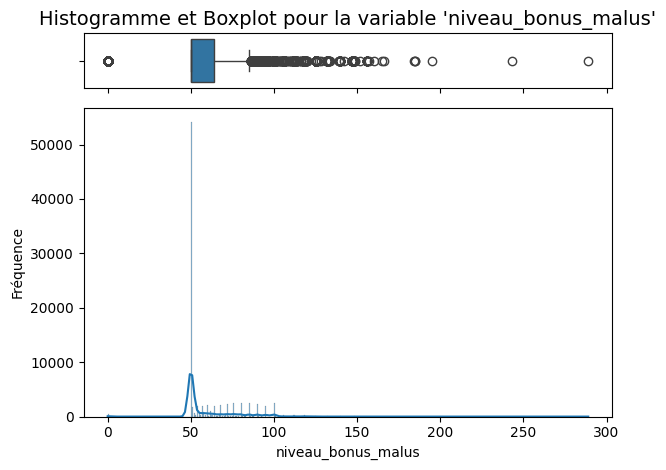

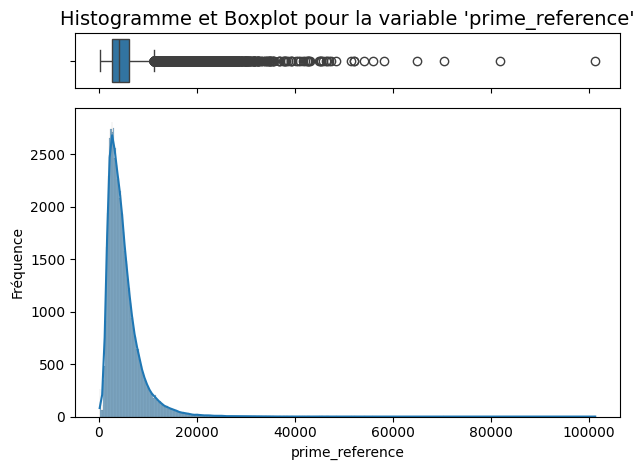

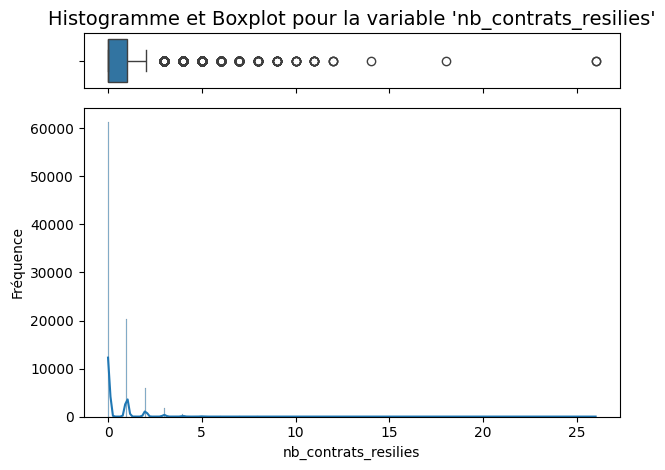

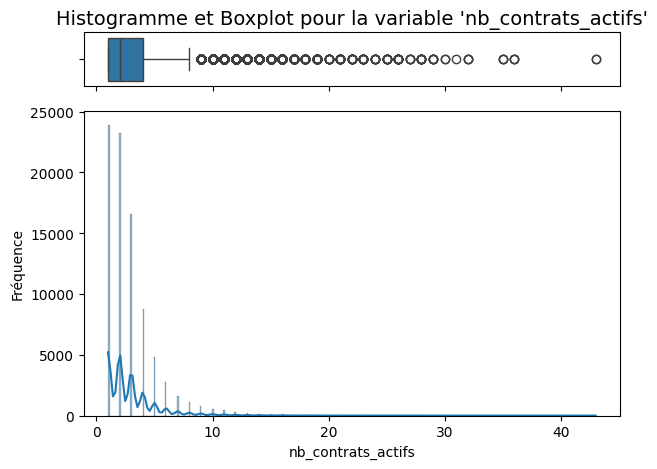

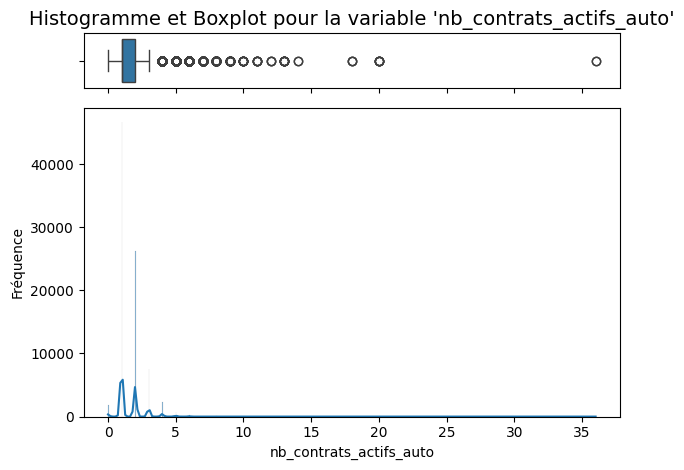

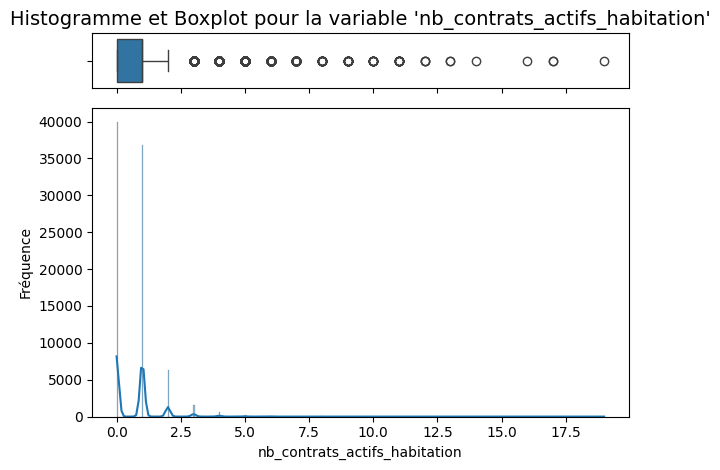

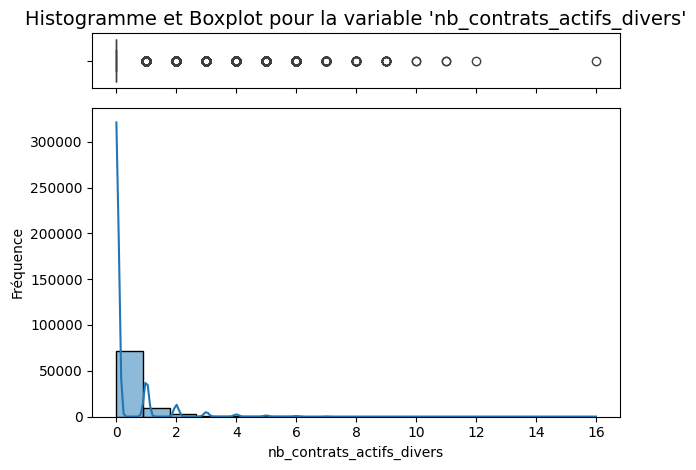

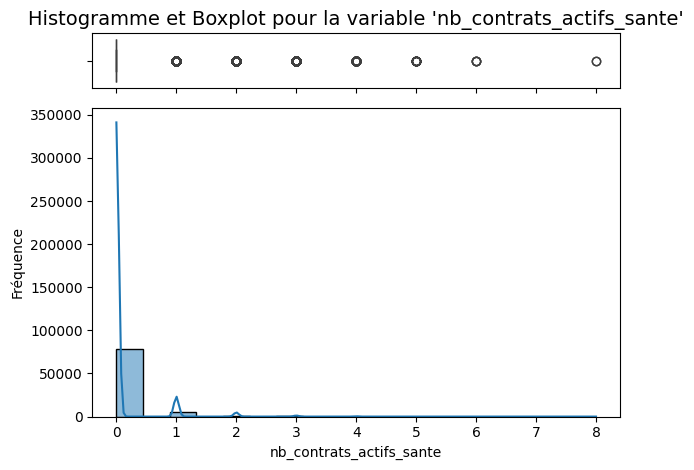

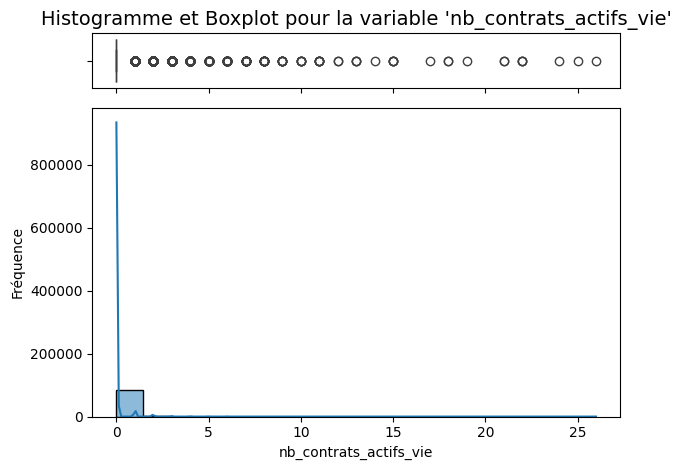

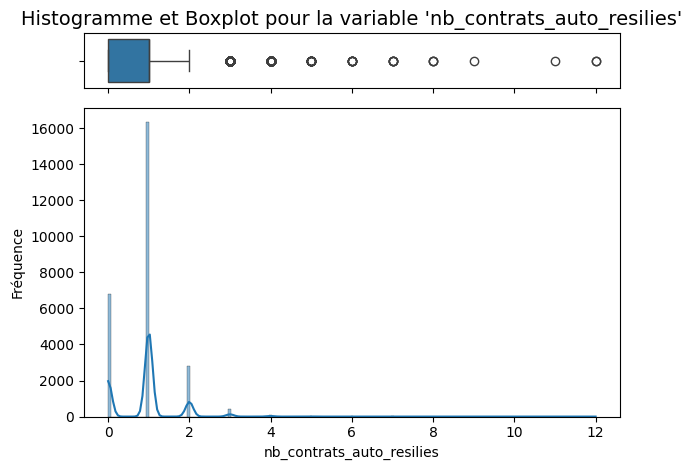

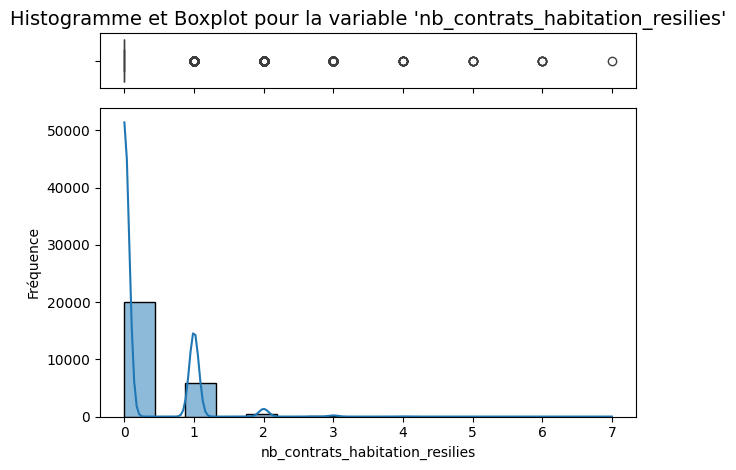

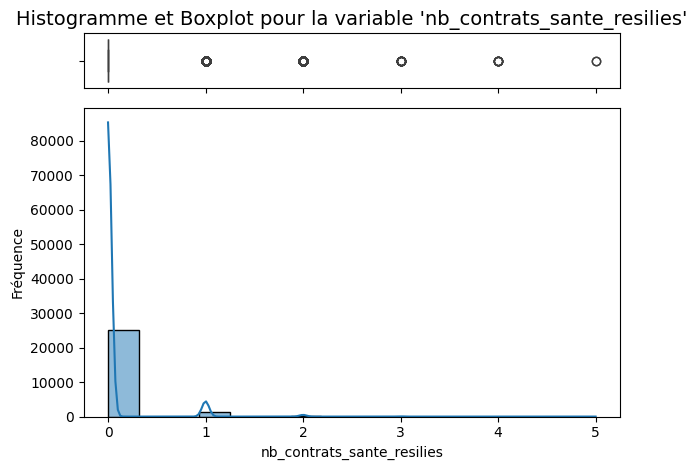

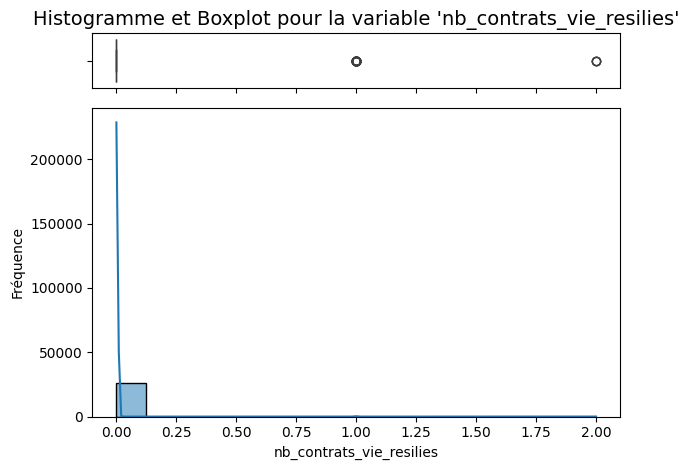

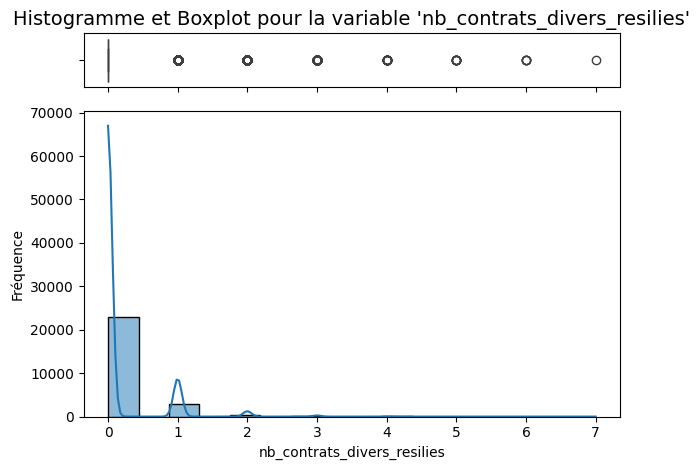

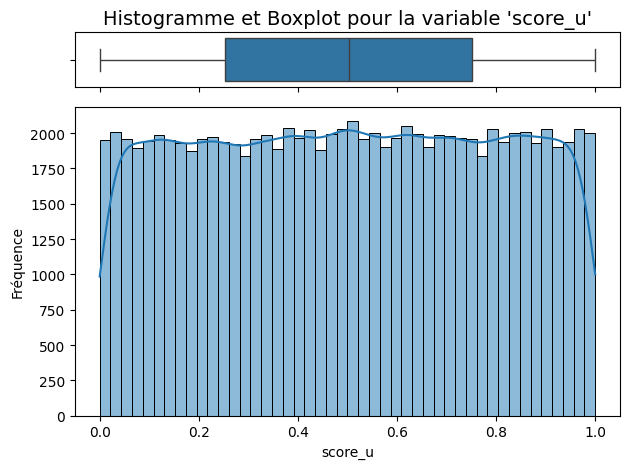

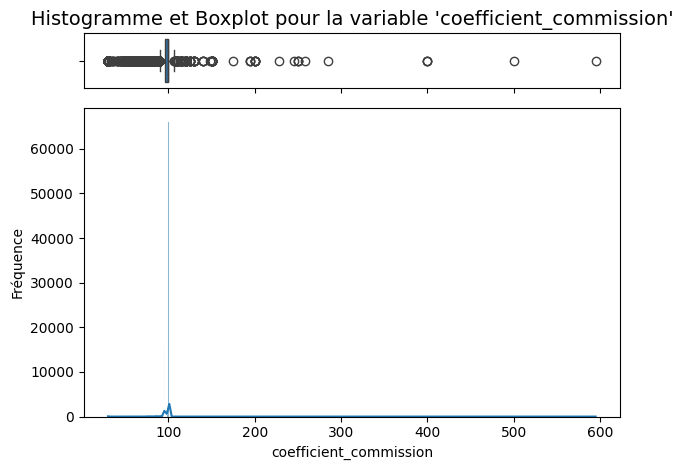

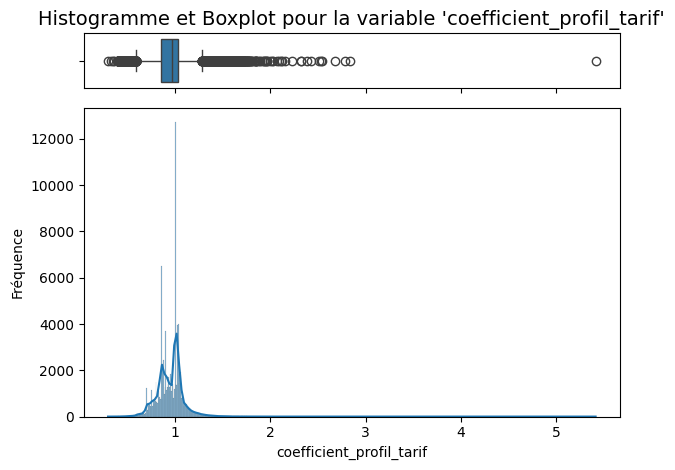

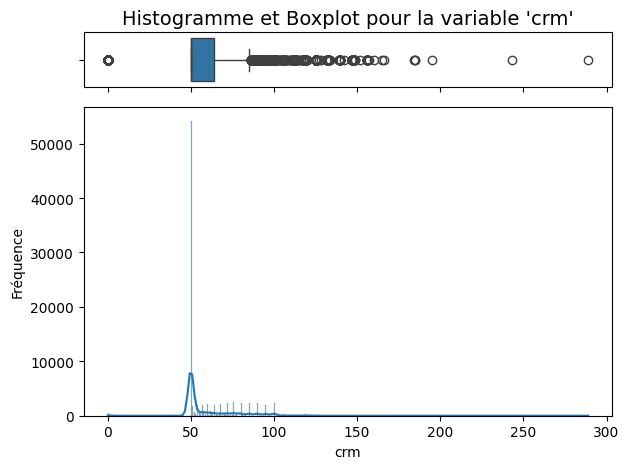

In [43]:
# Réalisation des graphiques pour les variables que nous avons 
# designés comme continues. 

for var in var_num_graph :
    hist_box(df, var)

📌 Point :
---
Il ne semble pas y avoir d'anomalies 

### 2.2.2 Analyse et traiment des anomalies :

In [44]:
# Pas d'anomalies particulières relevées.

## 2.3 Variables catégorielles : 

In [45]:
# Changement de type de variables pour certaines que nous considerons 
# catégorielles. 

df[['motif_resiliation', 'code_csp', 'code_usage_auto', 'rang_valeur_vehicule']] = df[['motif_resiliation', 'code_csp', 'code_usage_auto', 'rang_valeur_vehicule']].astype('object')

In [46]:
# Nous faisons ici la selection des variables qui nous intéressent 
# et enlevons "Contrat" de la liste des variables categorielles. 

var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_cat.remove('contrat')
var_cat.remove('echeance_contrat_mmjj')
var_cat

['code_usage_auto',
 'code_agent',
 'code_formule',
 'code_produit_gestion',
 'code_marque_vehicule',
 'libelle_modele_vehicule',
 'numero_tarif',
 'puissance_fiscale',
 'rang_valeur_vehicule',
 'code_marche',
 'code_csp',
 'sexe',
 'situation_familiale',
 'departement',
 'region',
 'client_actif',
 'etat',
 'motif_resiliation',
 'premier_contrat',
 'age_avant_mise_circulation',
 'permis_avant_contrat',
 'vehicule_avant_contrat']

### 2.3.1 Création de variables :

In [47]:
# Nombre de modalités de chacune des variables categorielles. 

df[var_cat].nunique().reset_index().rename(columns={'index':'Champ',0:'Nb_Distinct_Values'})\
                .sort_values('Nb_Distinct_Values',ascending=False)

Champ  Nb_Distinct_Values
5      libelle_modele_vehicule                6806
1                   code_agent                1255
4         code_marque_vehicule                 256
10                    code_csp                 234
13                 departement                 196
0              code_usage_auto                  71
2                 code_formule                  25
8         rang_valeur_vehicule                  18
6                 numero_tarif                  17
17           motif_resiliation                  15
7            puissance_fiscale                  14
14                      region                  11
12         situation_familiale                   7
3         code_produit_gestion                   6
16                        etat                   4
18             premier_contrat                   2
19  age_avant_mise_circulation                   2
20        permis_avant_contrat                   2
11                        sexe                   2
15                client_actif                   2
9                  code_marche                   2
21      vehicule_avant_contrat                   2

Nous constatons que beaucoup de **variable** ont **enormement de modalités.**\
Même si par la suite nous allons appliquer un **target encoding** sur les\
variables à plus de 5 ou 10 modalité, il est **prefabable de reduire les\
modalités** pour reduitrte le bruit.

* Code_usage_auto : 

Cette variable est certainement un code d’usage du véhicule utilisé en interne par l'assureur. En assurance auto, l'usage du véhicule impacte fortement la tarification et le risque. Cepedant ici nous n'avons pas la correspondance de ces codes. 

In [48]:
def graph_barre(df, col):
    ''' 
    Description : Graphique des fréquences des modalités des variables 
    categorielles. 
    '''
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution de {col}')
    plt.xlabel('Nombre d\'observations')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [49]:
df["code_usage_auto"].value_counts().head(30)

code_usage_auto
611.0    38575
603.0    11991
601.0     8493
613.0     5142
624.0     5022
609.0     3858
616.0     2093
621.0     1973
636.0     1793
604.0     1384
623.0     1368
619.0     1285
618.0     1246
626.0     1213
627.0      771
628.0      768
612.0      538
668.0      426
641.0      263
669.0      246
617.0      209
649.0      173
670.0      165
625.0      160
639.0      134
602.0      112
632.0       94
659.0       88
634.0       81
653.0       77
Name: count, dtype: int64

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


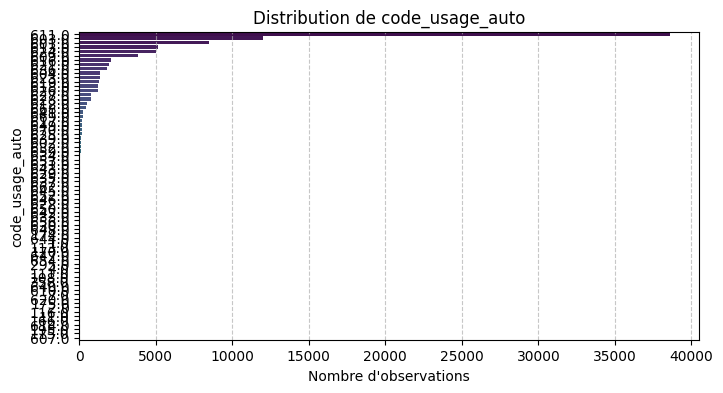

In [50]:
graph_barre(df, "code_usage_auto")

On observe 3 catégories : 
- Usage dominant : 611.0 
- Usages fréquents : Tous les autres codes avec plus de 1000 occurrences (hors 611.0)
- Usages rares : Tous les codes avec moins de 1000 occurrences

In [51]:
def recoder_usage_auto(val):
    if val == 611.0:
        return '611'
    elif val in [603.0, 601.0, 613.0, 624.0, 609.0, 616.0, 621.0,
                 636.0, 604.0, 623.0, 619.0, 618.0, 626.0]:  # >1000 hors 611.0
        return 'Usage_frequent'
    else:
        return 'Usage_rare'

df['code_usage_auto_groupe'] = df['code_usage_auto'].apply(recoder_usage_auto)


* **libelle_modele_vehicule :**

La distribution est assez etalée pour établir un top. Il y a deux options : 
1. Soit garder le TOP 100 + "AUTRE"
2. Soit 3 groupes par fréquence : Très répandues (ex. : RENAULT, PEUGEOT,\
CITROEN), Moyennement répandues (ex. : FORD à HONDA), Peu fréquentes\
(toutes les autres → 'autres')

1.

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


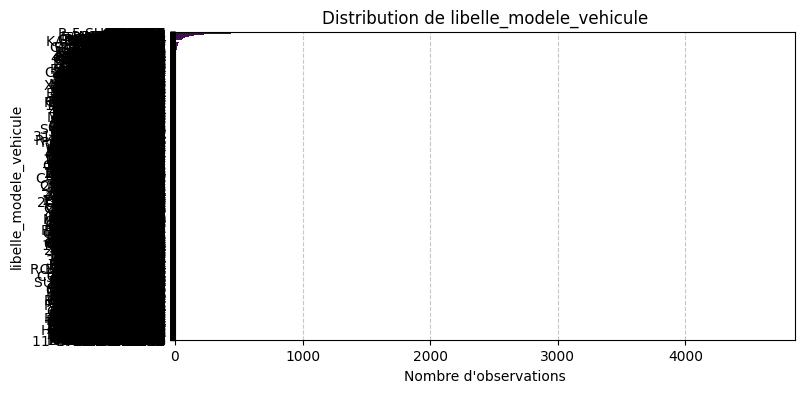

In [52]:
# Application de la fonction crée ci-dessus. 
graph_barre(df, "libelle_modele_vehicule")

In [53]:
# Table contenant les modèles et leur fréquence dans notre base
# de données.
df['libelle_modele_vehicule'].value_counts().head(20)

libelle_modele_vehicule
205              4626
CLIO             4478
R 5 SUPERCINQ    2539
R19              2152
306              2141
405              2050
106              2043
R21              1970
GOLF             1961
AX               1909
FIESTA           1897
MEGANE           1675
CORSA            1626
TWINGO           1515
BX               1473
ZX               1327
309              1270
EXPRESS          1249
ESCORT           1224
POLO             1139
Name: count, dtype: int64

In [54]:
# Nous gardons les N modèles plus fréquents. Puis, nous calculons leur 
# part dans la totalité des modèles. 
top_n = 75
top_models = df['libelle_modele_vehicule'].value_counts().nlargest(top_n)
autres = df['libelle_modele_vehicule'].value_counts().sum() - top_models.sum()
print(f"Part des top {top_n} modèles : {top_models.sum() / len(df):.2%}")


Part des top 75 modèles : 70.43%


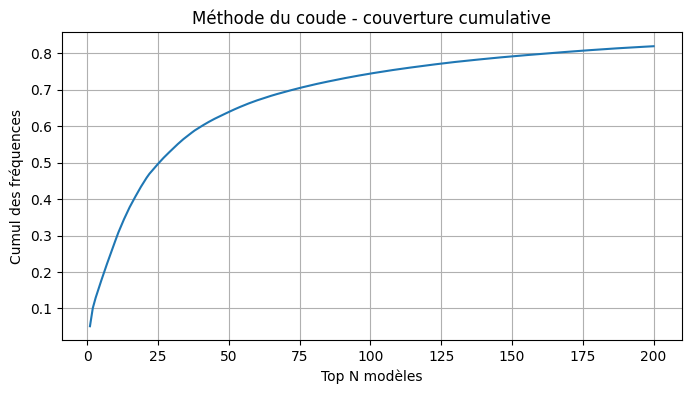

In [55]:
# Nous calculons ce que, de façon cumulative, réprésentent dans la 
# totalité les N premiers modèles. 

vc = df['libelle_modele_vehicule'].value_counts()
cumulative = vc.cumsum() / vc.sum()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 201), cumulative.iloc[:200])
plt.xlabel("Top N modèles")
plt.ylabel("Cumul des fréquences")
plt.title("Méthode du coude - couverture cumulative")
plt.grid(True)
plt.show()


Nous constatons que :
- La pente est très forte jusqu’aux environs du TOP 20–30
- Stabilité vers le TOP 70–100
- N'augmente pas significativement après.

Nous avons donc choisi le TOP 100. C’est le point optimal\
selon la courbe du coude : on garde 74% de l’info avec 100\
modalités (vs. 6806 au départ).

In [56]:
# Nous nous concentrons sur le Top 100 et nous marquons ces modèles
# dans notre base de données. 

top_100 = df['libelle_modele_vehicule'].value_counts().nlargest(100).index
df['libelle_modele_vehicule_groupe_1'] = df['libelle_modele_vehicule'].apply(
    lambda x: x if x in top_100 else 'AUTRES'
)

2.

In [57]:
modele_freq = df['libelle_modele_vehicule'].value_counts()
modele_freq.describe(percentiles=[.25, .5, .75, .9, .95])

count    6806.000000
mean       13.243756
std       127.610559
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
90%         7.000000
95%        19.000000
max      4626.000000
Name: count, dtype: float64

Au vu de la distribution nous avons décidé de créer 2 clases.

In [58]:
def classer_modele(freq):
    if freq >= 100:
        return 'tres_repandu'
    else:
        return 'rare'

df['libelle_modele_vehicule_groupe_2'] = df['libelle_modele_vehicule'].map(lambda x: classer_modele(modele_freq.get(x, 0)))


* **Code_agent :**

Cette variable semble concerner l'identifiant unique attribué à un agent commercial ou un conseiller qui gère un ou plusieurs contrats d’assurance. 

Qui ? : Un agent peut être un courtier, un commercial interne, un gestionnaire, ou un point de vente.

Rôle : Cet agent est responsable de la souscription, du suivi, et parfois de la relation client.

Notres but étant de predire les résiliations. Cette variables pourrait etre interesante :
- Permet d’analyser la performance des agents (taux de résiliation des clients qu’ils gèrent).
- Peut mettre en lumière des agents qui fidélisent mieux leurs clients ou au contraire ceux dont les clients résilient plus.

Nousa allons donc recoder cette variables afin de regrouper les agent en 4 groupes d'activité.

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


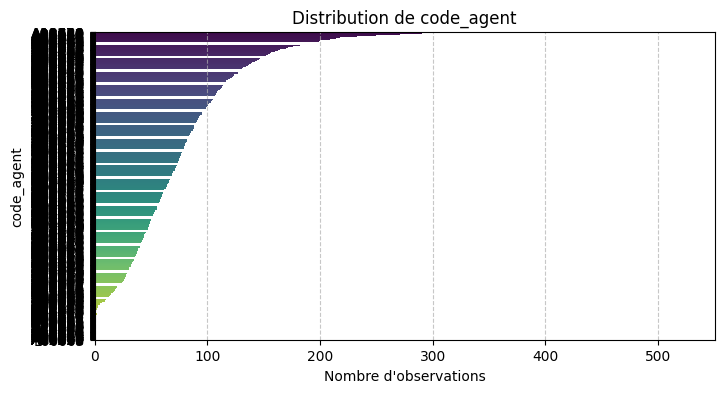

In [59]:
graph_barre(df, "code_agent")

De part la distribution beaucoup plus etalée que la variable précedante. Il nous a paru plus pertinent ici de decouper en fonction de la distribution.

In [60]:
agent_freq = df['code_agent'].value_counts()
agent_freq.describe(percentiles=[.25, .5, .75, .9, .95])

count    1255.000000
mean       71.909960
std        57.282526
min         1.000000
25%        33.000000
50%        64.000000
75%        98.500000
90%       140.000000
95%       174.000000
max       524.000000
Name: count, dtype: float64

In [61]:
agent_freq = df['code_agent'].value_counts()

def classer_agent(agent):
    freq = agent_freq.get(agent, 0)
    if freq < 33:
        return 'rare'
    elif freq <= 64:
        return 'moyen_faible'
    elif freq <= 98:
        return 'moyen_fort'
    else:
        return 'tres_repandu'

df['code_agent_groupe'] = df['code_agent'].map(classer_agent)


* **Code_formule :**

Après analyse détaillée de cette variable on peut supposer que cette variable est la formule d’assurance choisie par le client, par exemple : Formule « T » = tous risques (couverture complète), Formule « S » = tiers simple (couverture minimale). 
Pour cette variable on voit clairement que 6 modalitées sont domminantes. Nous allons donc regrouper les modalités à moins de 2000 apparition dans une modalité "AUTRES".

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


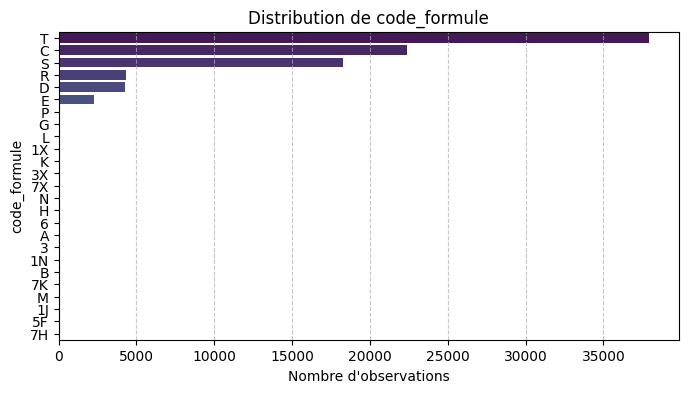

In [62]:
graph_barre(df, "code_formule")

In [63]:
df['code_formule'].value_counts().head(30)

code_formule
T     37944
C     22404
S     18289
R      4336
D      4271
E      2242
P        54
G        33
L        26
1X       22
K        16
3X       12
7X       12
N        11
H         9
6         5
A         5
3         2
1N        2
B         2
7K        1
M         1
1J        1
5F        1
7H        1
Name: count, dtype: int64

In [64]:
freq = df['code_formule'].value_counts()
modalites_frequentes = freq[freq >= 2000].index.tolist()

def grp(x):
    if x in modalites_frequentes:
        return x
    else:
        return 'AUTRES'

df['code_formule_groupe'] = df['code_formule'].map(grp)


In [65]:
df['code_formule_groupe'].value_counts()

code_formule_groupe
T         37944
C         22404
S         18289
R          4336
D          4271
E          2242
AUTRES      761
Name: count, dtype: int64

* **code_produit_gestion :**

Cette variable correspond généralement à un identifiant du produit ou type de contrat d'assurance souscrit par le client, Exemples : auto, habitation, santé, prévoyance, etc.
On remarque directemnt qu'on peut créer 2 modalités pour cette variable.

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


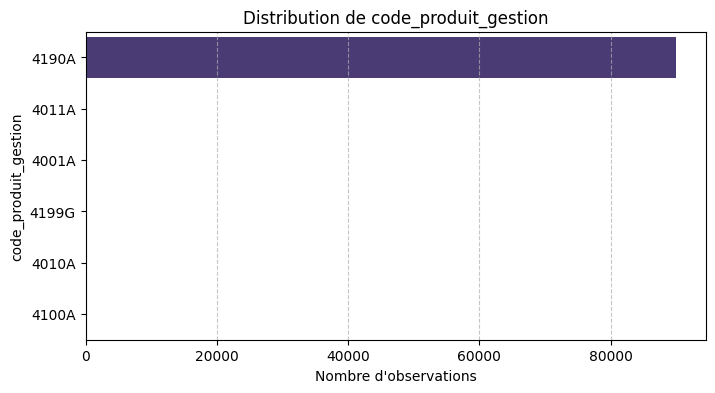

In [66]:
graph_barre(df, "code_produit_gestion")

In [67]:
df["code_produit_gestion"].value_counts() # déséquilibre imortant. Voir si réellement pertinent le prendre cette variable.

code_produit_gestion
4190A    89973
4011A      149
4001A       60
4199G       31
4010A       20
4100A       14
Name: count, dtype: int64

In [68]:
freq = df['code_produit_gestion'].value_counts()
modalites_frequentes = freq[freq >= 2000].index.tolist()

In [69]:
df['code_produit_gestion_groupe'] = df['code_produit_gestion'].map(grp)

In [70]:
df['code_produit_gestion_groupe'].value_counts()

code_produit_gestion_groupe
4190A     89973
AUTRES      274
Name: count, dtype: int64

* **code_marque_vehicule :**

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


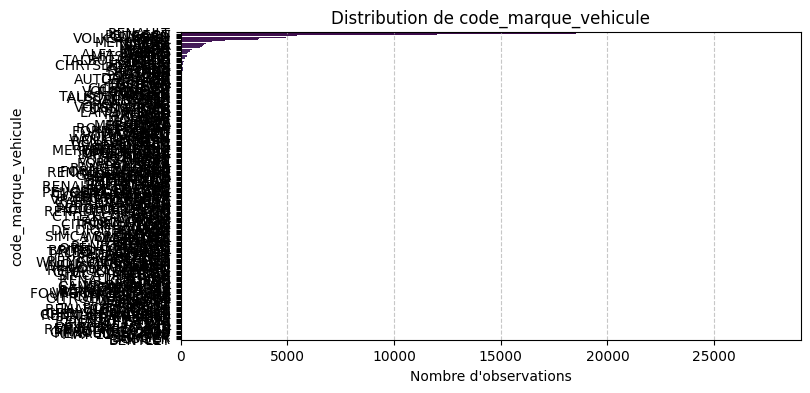

In [71]:
graph_barre(df, "code_marque_vehicule")

In [72]:
df["code_marque_vehicule"].value_counts().head(30)

code_marque_vehicule
RENAULT           27666
PEUGEOT           18527
CITROEN           12011
FORD               5465
VOLKSWAGEN         4952
OPEL               3695
FIAT               3626
MERCEDES           2087
B.M.W.             1482
NISSAN             1174
TOYOTA             1092
AUDI               1075
SEAT               1014
ROVER               913
HONDA               541
MAZDA               450
VOLVO               434
ALFA ROMEO          343
AUSTIN              318
MITSUBISHI          298
LANCIA              294
LADA                220
TALBOT(SIMCA)       195
IVECO               171
SUZUKI              157
HYUNDAI             135
CHRYSLER (USA)      130
SKODA               126
PORSCHE             125
JEEP                123
Name: count, dtype: int64

In [73]:
top_n = 15
top_models = df['code_marque_vehicule'].value_counts().nlargest(top_n)
autres = df['code_marque_vehicule'].value_counts().sum() - top_models.sum()
print(f"Part des top {top_n} modèles : {top_models.sum() / len(df):.2%}")

Part des top 15 modèles : 94.54%


On remarque directement qu'il y a 15 modalité qui domine. Il y a deux options : 
- Soit garder le TOP 15 + "AUTRE"
- Soit 3 groupes par fréquence : Très répandues (ex. : RENAULT, PEUGEOT, CITROEN), Moyennement répandues (ex. : FORD à HONDA), Peu fréquentes (toutes les autres → 'autres')

In [74]:
# Méthode 1 : 
top_15 = df['code_marque_vehicule'].value_counts().nlargest(15).index
df['code_marque_vehicule_groupe_2'] = df['code_marque_vehicule'].apply(
    lambda x: x if x in top_15 else 'AUTRES'
)

In [75]:
# Méthode 2 :

def regrouper_marque(marque):
    if marque in ['RENAULT', 'PEUGEOT', 'CITROEN']:
        return 'tres_repandue'
    elif marque in ['FORD', 'VOLKSWAGEN', 'OPEL', 'FIAT', 'MERCEDES',
                    'B.M.W.', 'NISSAN', 'TOYOTA', 'AUDI', 'SEAT', 'ROVER', 'HONDA']:
        return 'moyenne'
    else:
        return 'rare'

df['code_marque_vehicule_groupe_1'] = df['code_marque_vehicule'].map(regrouper_marque)


* **numero_tarif :**

Cette variable semble etre les code tarifs proposés. ce pendant nous avons pas leur correspondance, c'est à dire que nous ne pouvons dire quels sont les contrats à prix bas ou élevé. 

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


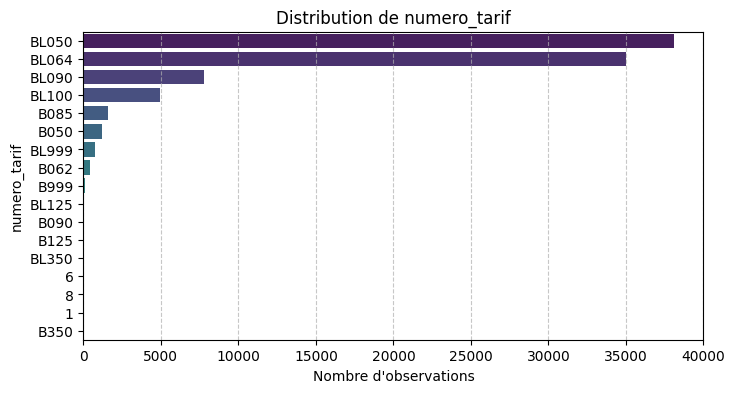

In [76]:
graph_barre(df, "numero_tarif")

1.

On voit qu'il y a 3 groupes : 
- Très courant : les 2 modalités majoritaires (BL050, BL064)
- Modérément courant : celles entre ~1000 et 8000
- Rare : tout le reste

In [77]:
df["numero_tarif"].value_counts()

numero_tarif
BL050    38096
BL064    35022
BL090     7752
BL100     4972
B085      1565
B050      1199
BL999      753
B062       419
B999        87
BL125       48
B090        31
B125        15
BL350       10
6            4
8            3
1            3
B350         1
Name: count, dtype: int64

In [78]:
tarif_freq = df['numero_tarif'].value_counts()

def regrouper_tarif(x):
    freq = tarif_freq.get(x, 0)
    if x in ['BL050']:
        return 'tres_courant_BL050'
    elif x in ['BL064']:
        return 'tres_courant_BL064'
    elif freq >= 1000:
        return 'modere'
    else:
        return 'rare'

df['numero_tarif_groupe'] = df['numero_tarif'].map(regrouper_tarif)


2. 

On peut aussi garder les modalités les plus fréquantes et reunir celles à moins de 1000 apparitions dans une modalité "AUTRES"

In [79]:
counts = df['numero_tarif'].value_counts()

In [80]:
modalites_gardees = counts[counts >= 1000].index.tolist()

In [81]:
df['numero_tarif_groupe2'] = df['numero_tarif'].apply(lambda x: x if x in modalites_gardees else 'AUTRES')


In [82]:
df['numero_tarif_groupe2'].value_counts()

numero_tarif_groupe2
BL050     38096
BL064     35022
BL090      7752
BL100      4972
AUTRES     1641
B085       1565
B050       1199
Name: count, dtype: int64

* **Code_csp :**

Apres des recherches, Code_CSP semble etre une variable qui classe les clients selon leur profession, statut socio-économique, ou catégorie professionnelle. Cependant ici nous avons de code numéro. Il est donc compliqué de reunir les métier par catégories (cadre, ouvrier, salarier)

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


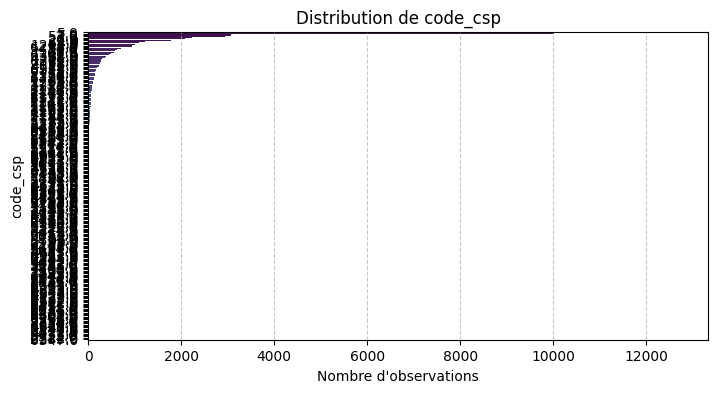

In [83]:
graph_barre(df, "code_csp")

In [84]:
df["code_csp"].value_counts().head(50)

code_csp
5.0       12697
7.0       10019
52.0       3078
1.0        2936
6.0        2237
21.0       2086
22.0       1787
64.0       1214
4.0        1090
1201.0     1004
6238.0      954
54.0        950
5411.0      716
31.0        617
37.0        574
69.0        562
6341.0      487
84.0        451
38.0        382
4311.0      365
1204.0      303
6311.0      288
55.0        275
2154.0      258
2156.0      250
4611.0      238
71.0        235
6354.0      201
6515.0      180
8.0         173
2151.0      155
72.0        154
3116.0      150
2221.0      148
6792.0      132
3.0         126
53.0        121
1203.0      114
3733.0      108
23.0        100
2222.0       93
2.0          86
3128.0       83
2213.0       81
2101.0       79
2242.0       70
2171.0       66
2162.0       65
2172.0       64
3727.0       62
Name: count, dtype: int64

In [85]:
top_n = 10
top_models = df['code_csp'].value_counts().nlargest(top_n)
autres = df['code_csp'].value_counts().sum() - top_models.sum()
print(f"Part des top {top_n} modèles : {top_models.sum() / len(df):.2%}")


Part des top 10 modèles : 42.27%


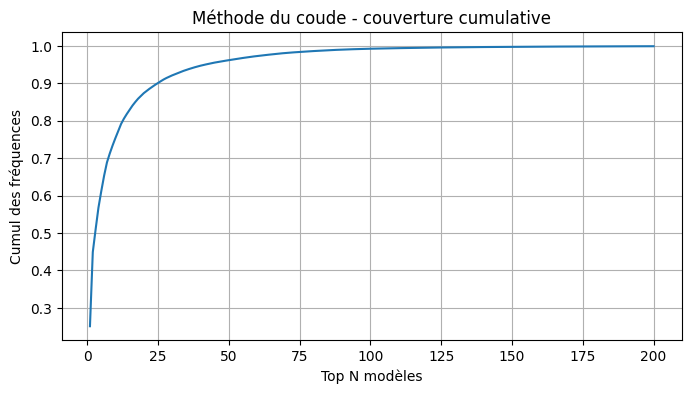

In [86]:
vc = df['code_csp'].value_counts()
cumulative = vc.cumsum() / vc.sum()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 201), cumulative.iloc[:200])
plt.xlabel("Top N modèles")
plt.ylabel("Cumul des fréquences")
plt.title("Méthode du coude - couverture cumulative")
plt.grid(True)
plt.show()


La distribution est assez etalée pour pour voir établie un top. Il y a deux options : 
1. Soit garder le TOP 25 + "AUTRE"
2. Soit 3 groupes par fréquence : Très répandues (ex. : RENAULT, PEUGEOT, CITROEN), Moyennement répandues (ex. : FORD à HONDA), Peu fréquentes (toutes les autres → 'autres')

1.

In [87]:
top_25 = df['code_csp'].value_counts().nlargest(25).index
df['code_csp_groupe_1'] = df['code_csp'].apply(
    lambda x: x if x in top_25 else 'AUTRES'
)

2.

In [88]:
csp_freq = df['code_csp'].value_counts()

def regrouper_csp(code):
    freq = csp_freq.get(code, 0)
    if freq >= 1000:
        return 'tres_courant'
    elif freq >= 200:
        return 'modere'
    else:
        return 'rare'

df['code_csp_groupe_2'] = df['code_csp'].map(regrouper_csp)

* **situation_familiale :**

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


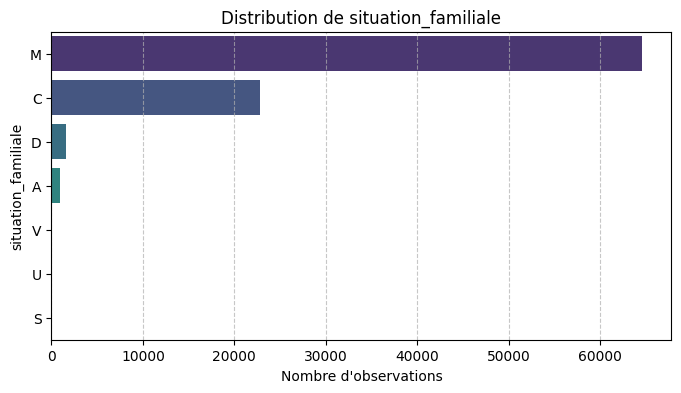

In [89]:
graph_barre(df, "situation_familiale")

In [90]:
df["situation_familiale"].value_counts()

situation_familiale
M    64552
C    22780
D     1623
A      918
V       11
U        2
S        1
Name: count, dtype: int64

On constate que l'on peut simplement diviser cette variable en deux modalités : les mariés et les célibataires

In [91]:
df['situation_familiale_binaire'] = df['situation_familiale'].apply(
    lambda x: 'marie' if x == 'M' else 'non_marie'
)

* **region :**

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


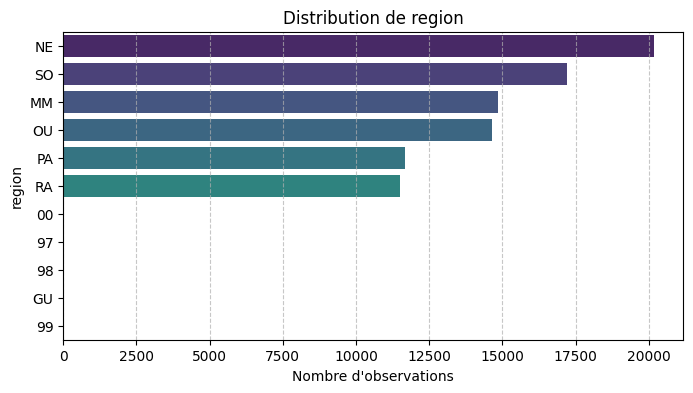

In [92]:
graph_barre(df, "region")

On a décidé de laisse les modalité sur les regions de la france metropolitaine inchangées au vu de leur nombre de modalité. Nous allons regrouper les region DOM-TOM ensemble et le reste en autre.

In [93]:
df["region"].value_counts()

region
NE    20170
SO    17207
MM    14847
OU    14640
PA    11656
RA    11490
00       16
97       15
98        5
GU        1
99        1
Name: count, dtype: int64

In [94]:
def recoder_region(code):
    if code in ['NE', 'SO', 'MM', 'OU', 'PA', 'RA']:
        return code
    elif code in ['97', '98', 'GU']:
        return 'DOM_TOM'
    else:
        return 'autre'

df['region_groupe'] = df['region'].apply(recoder_region)

* **Département :**

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


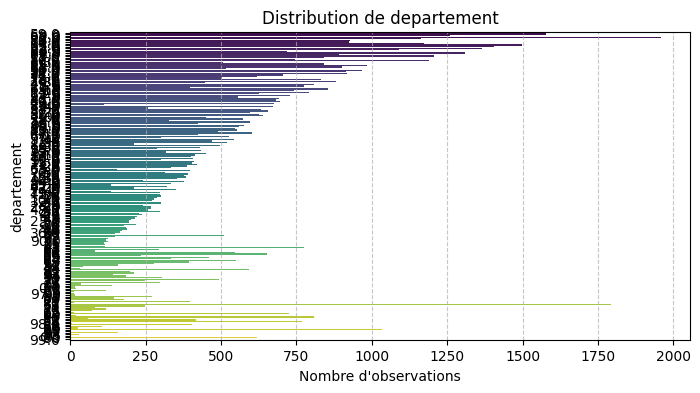

In [95]:
graph_barre(df, "departement")

Nous avons decidé ne pas recoder cette variable puisque nous avons la variable region_groupe qui apportera la meme information.

In [96]:
df['departement'].value_counts()

departement
59.0    3374
60.0    2295
62.0    2288
6.0     2007
83.0    1837
        ... 
55         1
88         1
GU         1
80         1
99.0       1
Name: count, Length: 196, dtype: int64

* **etat :**

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


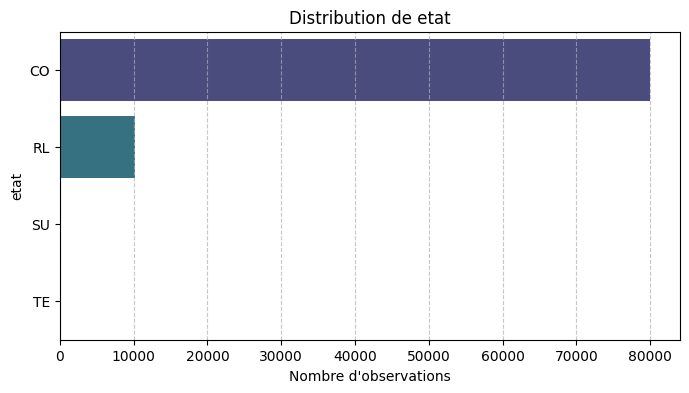

In [97]:
graph_barre(df, "etat")

Cette variable semble fourmir la meme information que notre variable cible contrat . De plus elles ont le meme nombre de valeurs manquantes.

In [98]:
df['etat'].value_counts()

etat
CO    80031
RL    10170
SU       43
TE        3
Name: count, dtype: int64

In [99]:
def recoder_etat(x):
    if x == 'CO':
        return 'ACTIF'
    else:
        return 'RESIL'

df['etat_groupe'] = df['etat'].apply(recoder_etat)


In [100]:
df[(df["contrat"] == "RESIL") & (df["etat_groupe"] == "ACTIF")].shape[0] 

22

In [101]:
df_diff = df[(df["contrat"] == "ACTIF") & (df["etat_groupe"] == "RESIL")]

In [102]:
# Certaines lignes incohérentes.
df[(df["contrat"] == "RESIL") & (df["client_actif"] == "OUI")]

code_usage_auto code_agent code_formule code_produit_gestion  \
21              611.0     A00104            C                4190A   
22              611.0     A00104            T                4190A   
60              611.0     A00104            S                4190A   
75              618.0     A00116            T                4190A   
104             609.0     A00125            S                4190A   
...               ...        ...          ...                  ...   
90128           601.0     D20050            S                4190A   
90132           611.0     D20050            D                4190A   
90154           611.0     D20050            D                4190A   
90196           601.0     G00000            S                4190A   
90205           611.0     G00000            T                4190A   

       date_debut_contrat  date_dernier_mouvement echeance_contrat  \
21                  10416                   14823       1960-02-01   
22                  10541                   14880       1960-11-07   
60                  14285                   14868       1960-02-10   
75                  10483                   14860       1960-09-07   
104                 14658                   14859       1960-02-07   
...                   ...                     ...              ...   
90128               13817                   14833       1960-10-30   
90132               13971                   14833       1960-04-02   
90154               14514                   14880       1960-09-27   
90196                7934                   14874       1960-09-21   
90205               12183                   14868       1960-05-10   

       prime_annuelle_ttc code_marque_vehicule  date_obtention_permis  \
21                1949.84              RENAULT                 1613.0   
22                5653.84              PEUGEOT                 4737.0   
60                2374.24              CITROEN                10821.0   
75                1451.32              CITROEN                 6662.0   
104               1176.32               TOYOTA                 3394.0   
...                   ...                  ...                    ...   
90128             8260.03              RENAULT                13423.0   
90132             2851.26              RENAULT                 6293.0   
90154             3956.20                 FIAT                10129.0   
90196             1595.61              PEUGEOT                 4443.0   
90205             8354.14              RENAULT                 3043.0   

       date_mise_circulation libelle_modele_vehicule numero_tarif  \
21                   11809.0                    CLIO        BL064   
22                   13666.0                     806        BL050   
60                    8705.0                      BX        BL064   
75                   12570.0                      AX        BL050   
104                   7365.0                  CELICA        BL050   
...                      ...                     ...          ...   
90128                 9770.0           R 5 SUPERCINQ        BL100   
90132                12935.0                  TWINGO        BL064   
90154                12023.0                    TIPO        BL090   
90196                 7671.0                     104         B062   
90205                11901.0                    CLIO        BL064   

      puissance_fiscale rang_valeur_vehicule  nb_sinistres_2_ans_non_resp  \
21                    X                  6.0                          NaN   
22                    K                 15.0                          2.0   
60                    E                  9.0                          NaN   
75                    C                  2.0                          NaN   
104                   E                 10.0                          NaN   
...                 ...                  ...                          ...   
90128                 Y                  8.0                          NaN   
90

In [103]:
df_diff["date_debut_contrat_converted"].describe()

count                    108
mean     1994-09-03 15:06:40
min      1963-06-01 00:00:00
25%      1992-03-13 06:00:00
50%      1996-11-30 12:00:00
75%      1999-03-11 12:00:00
max      2000-09-02 00:00:00
Name: date_debut_contrat_converted, dtype: object

⚠️ ATTTENTION : 
---
Les variables contrat, client_actif et etat semblent donner la meme information.
Nous avons probablement deux sources différentes pour cette information.
Peut-être que etat est plus technique / informatique, et contrat plus métier / client.
Nous garderons une seule des deux variables (pour réellement chosiir il aurait fallut avoir d'avantage d'informations métier).
Nous gradns notre variable de départ "contrat" comme variable cible. En effet la variable "etat" a du etre recoder pour etre binaire.

In [104]:
# Solution :
# - soit supprimer etat car tres peux de variables ou on a une difference entre les deux
# - soit faire un melange des deux : 
# def cible_finale(row):
#     if row['contrat'] == row['etat_groupe']:
#         return row['contrat']
#     elif row['etat_groupe'] == 'ACTIF' and row['contrat'] == 'RESIL':
#         return 'RESIL'  # Prendre le plus pessimiste
#     elif row['etat_groupe'] == 'RESIL' and row['contrat'] == 'ACTIF':
#         return 'RESIL'  # Aussi résilié, on se protège
#     else:
#         return 'INDEFINI'

# df['statut_contrat_final'] = df.apply(cible_finale, axis=1)

* **motif_resiliation :**

Cette variable semble etre des code correspondant a différentes catégories de resiliations. Nous ne savons cependant pas a quel type de motif de résiliation correpond ces codes. Il va donc etre compliqué d'interpreter réellement les variables, mais aussi compliqué de la recoder avec beaucoup de sens. 

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


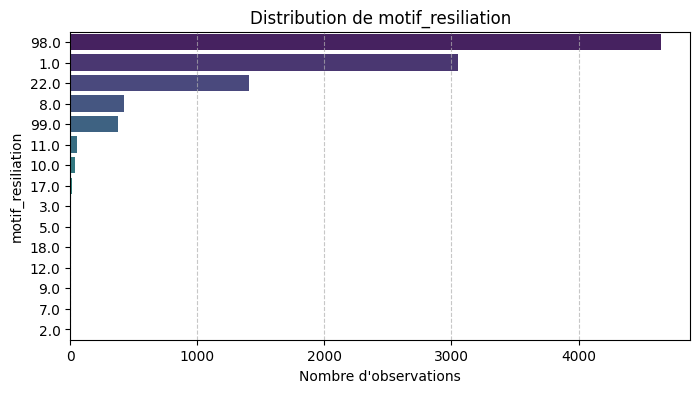

In [105]:
graph_barre(df, "motif_resiliation")

In [106]:
df["motif_resiliation"].value_counts()

motif_resiliation
98.0    4647
1.0     3048
22.0    1407
8.0      420
99.0     376
11.0      54
10.0      39
17.0      17
3.0        7
5.0        6
18.0       5
12.0       3
9.0        2
7.0        1
2.0        1
Name: count, dtype: int64

Il faudrait demander au prof à quoi correspond les motifs.

In [107]:
#Sinon, on peut faire un regroupement par fréquence :
def recoder_motif(x):
    if x == 98.0:
        return "motif_majoritaire_1"
    elif x == 1.0:
        return "motif_majoritaire_2"
    elif x in [22.0, 8.0, 99.0]:
        return "motif_frequent"
    else:
        return "motif_rare"

df['motif_resiliation_groupe'] = df['motif_resiliation'].apply(recoder_motif)


* rang_valeur_vehicule :

Cette variable semble être un rang (classe) lié à la valeur du véhicule. 

Par exemple, un classement où 1 correspond à la valeur la plus basse et 18 la plus haute (ou inversement).

La distribution est assez équilibrée pour les rangs 3 à 15 (entre 1 300 et 10 000 clients par rang).

Quelques rangs peu fréquents comme 
- 1.0 (296 clients) qui pourrait être une catégorie rare ou extrême (véhicule très bas de gamme ou véhicule ancien).
- 18, 16, 17 qui pareil pourrait etre un catégorie rare ou extrême 

Comme on ne sait pas réellement dans quel sens prendre les rangs nous allons les recoder par apparitions.

Cette variable devrait peut etre etre laissée comme telle mais tetons qand meme nousverrons lors des tests et de la selection de variable laquelle garder 

In [108]:
df["rang_valeur_vehicule"].value_counts()
  

rang_valeur_vehicule
7.0     10499
5.0     10340
6.0     10310
8.0      8275
4.0      7914
9.0      7903
10.0     6205
3.0      5678
11.0     4529
12.0     4140
13.0     2960
2.0      2632
14.0     2373
15.0     1965
18.0     1407
16.0     1350
17.0     1301
1.0       296
Name: count, dtype: int64

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


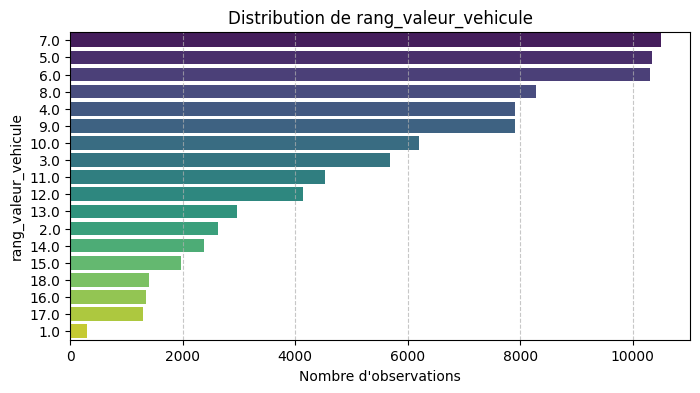

In [109]:
graph_barre(df, "rang_valeur_vehicule")

In [110]:
def groupe_valeur_vehicule(rang):
    if rang <= 5:
        return 'Low'
    elif rang <= 12:
        return 'Medium'
    else:
        return 'High'

df['rang_valeur_vehicule_groupe'] = df['rang_valeur_vehicule'].apply(groupe_valeur_vehicule)


* puissance_fiscale :

Cette variable semble être un code alphabétique correspondant à la puissance fiscale du véhicule.

La puissance fiscale est une mesure administrative utilisée en assurance et fiscalité auto, souvent associée à la puissance du moteur (exprimée en chevaux fiscaux).

Cependant encore une fois nous n'avons pas la corrrespondance métier de chacune de lettre. On va donc tenter de recoder par fréquence d'apparition.

In [111]:
df["puissance_fiscale"].value_counts()

puissance_fiscale
D    16303
X    15213
E    13046
W    12278
Y    10414
C     6783
K     6051
G     5872
T     1930
B     1847
A      197
H      122
F       16
Z        9
Name: count, dtype: int64

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


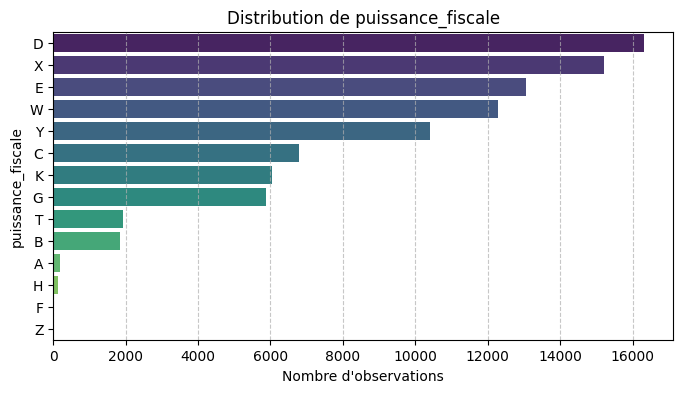

In [112]:
graph_barre(df, "puissance_fiscale")

### 2.3.2 Analyse :

In [113]:
var_cat_add = [
"libelle_modele_vehicule_groupe_1", 
"libelle_modele_vehicule_groupe_2", 
"code_agent_groupe", 
"code_formule_groupe", 
"code_produit_gestion_groupe",
"code_marque_vehicule_groupe_2",
"code_marque_vehicule_groupe_1",
"numero_tarif_groupe",
"numero_tarif_groupe2",
"code_csp_groupe_1",
"code_csp_groupe_2",
"situation_familiale_binaire",
"region_groupe",
"etat_groupe",
"motif_resiliation_groupe", 
"code_usage_auto_groupe", 
"rang_valeur_vehicule_groupe"]

In [114]:
var_cat

['code_usage_auto',
 'code_agent',
 'code_formule',
 'code_produit_gestion',
 'code_marque_vehicule',
 'libelle_modele_vehicule',
 'numero_tarif',
 'puissance_fiscale',
 'rang_valeur_vehicule',
 'code_marche',
 'code_csp',
 'sexe',
 'situation_familiale',
 'departement',
 'region',
 'client_actif',
 'etat',
 'motif_resiliation',
 'premier_contrat',
 'age_avant_mise_circulation',
 'permis_avant_contrat',
 'vehicule_avant_contrat']

In [115]:
var_cat_graph = var_cat + var_cat_add

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


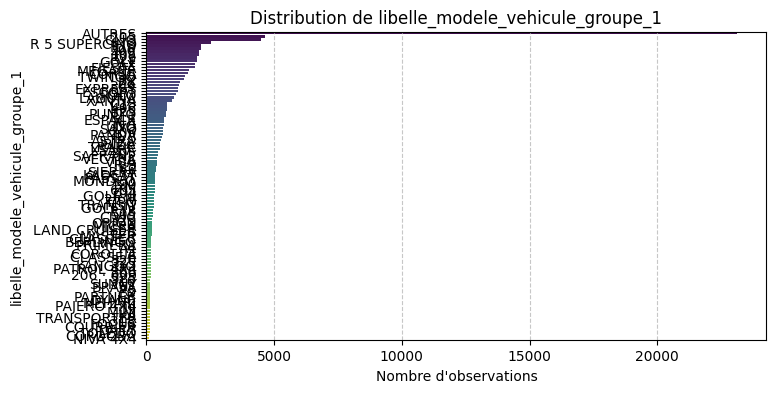

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


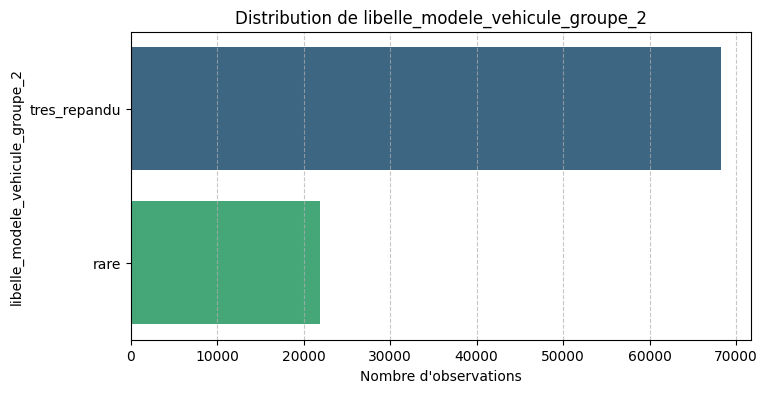

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


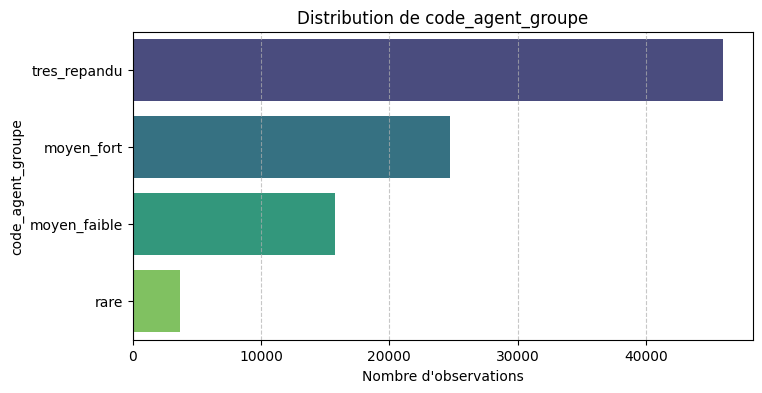

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


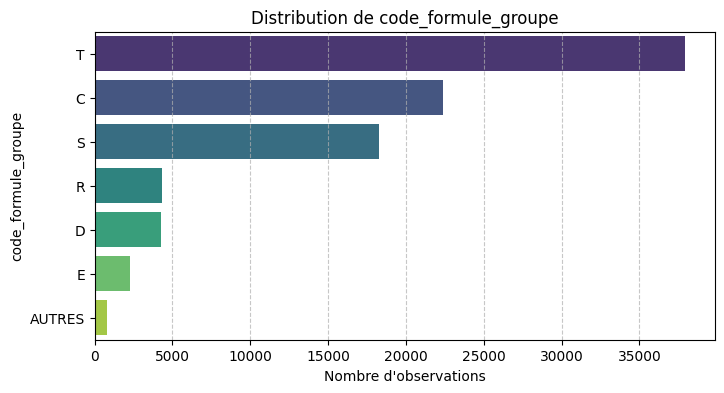

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


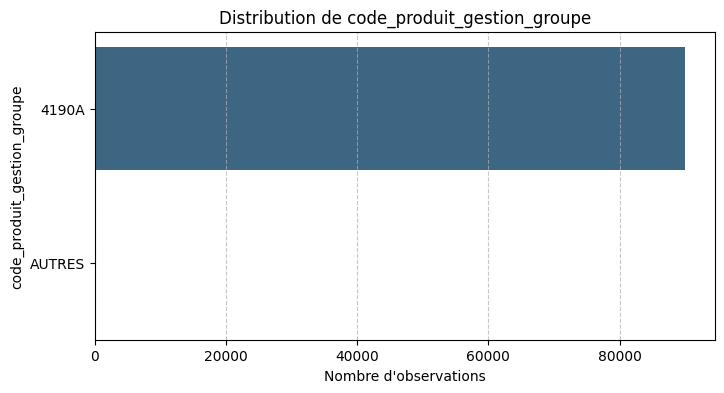

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


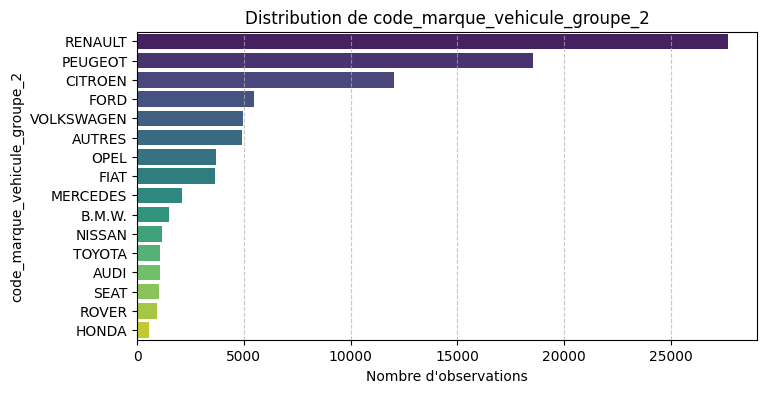

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


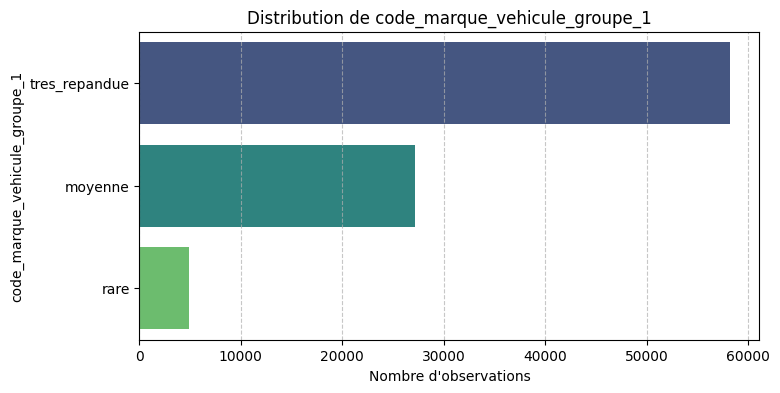

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


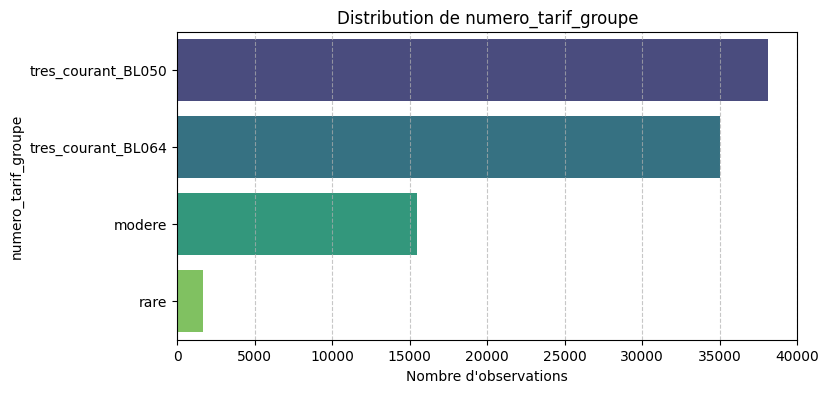

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


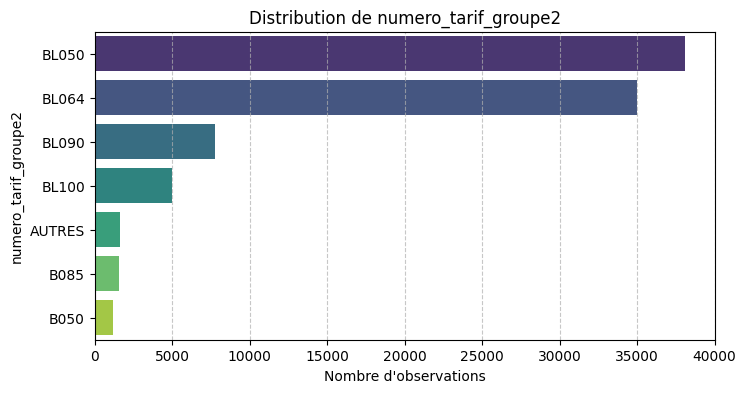

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


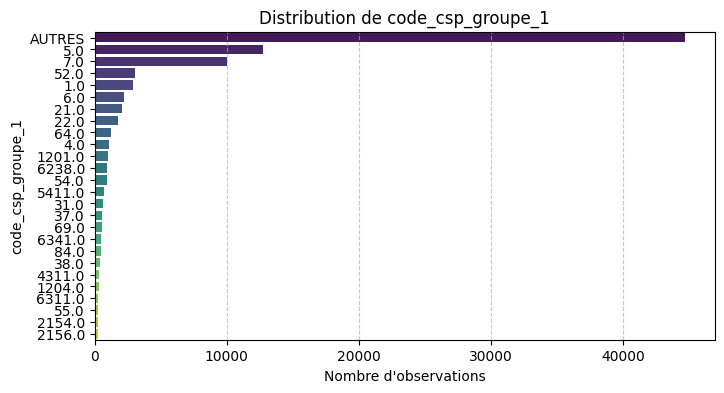

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


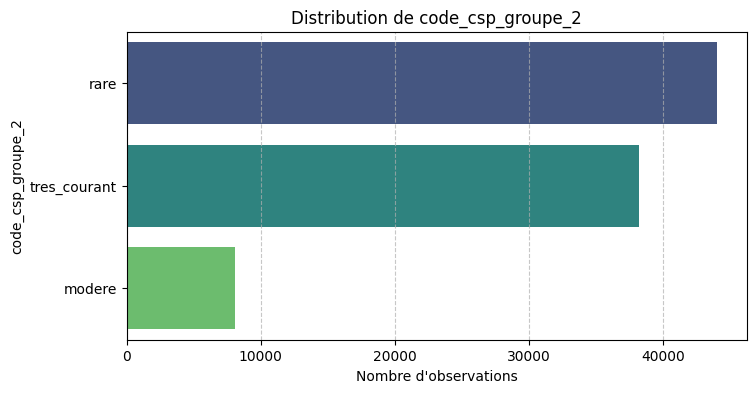

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


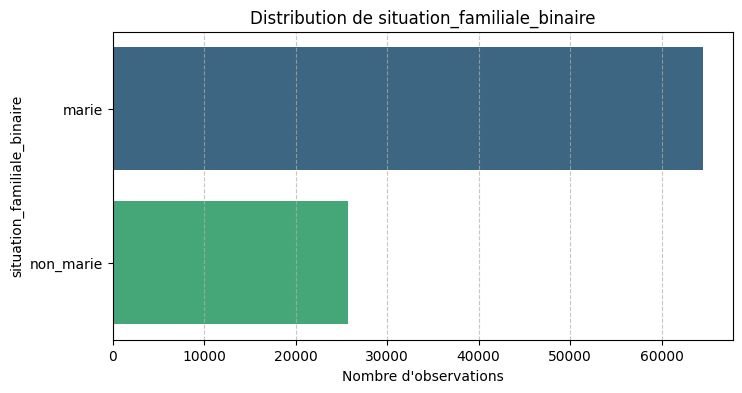

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


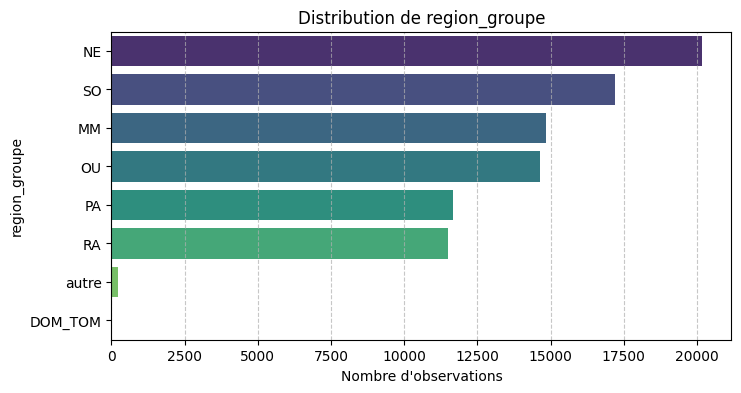

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


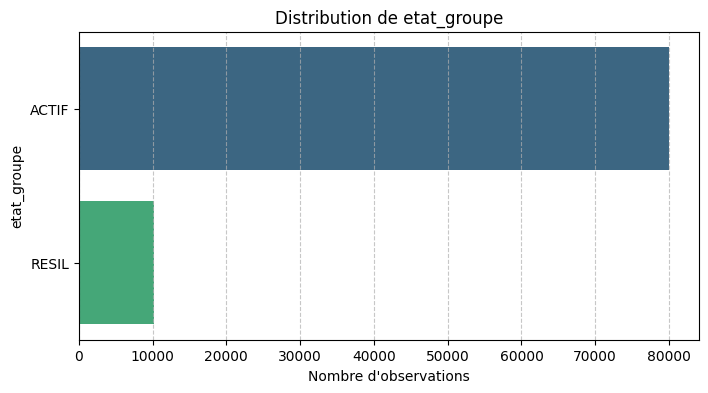

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


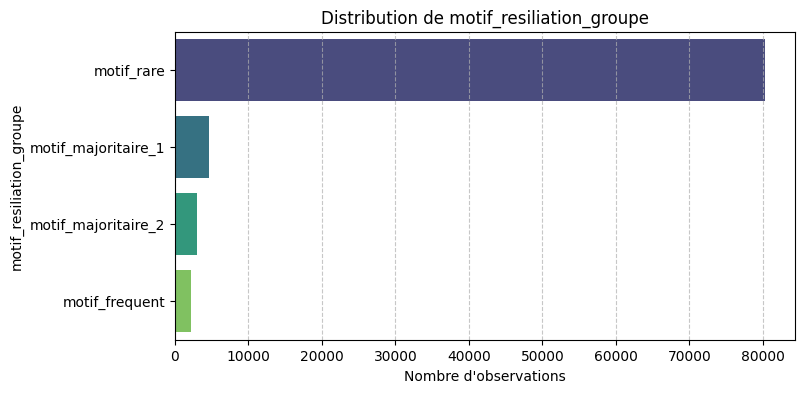

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


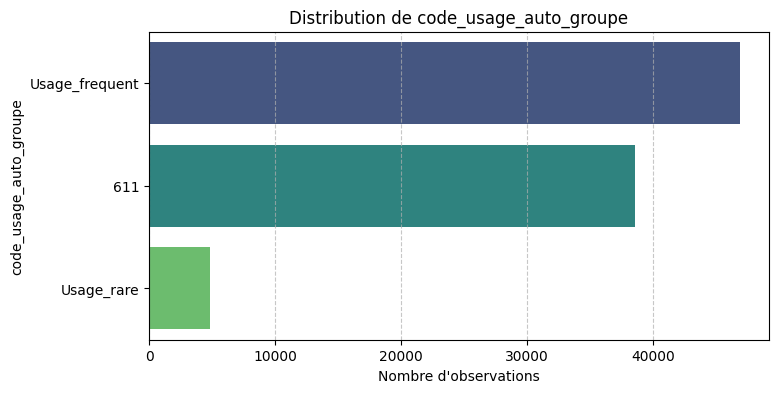

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_41314/4029955485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


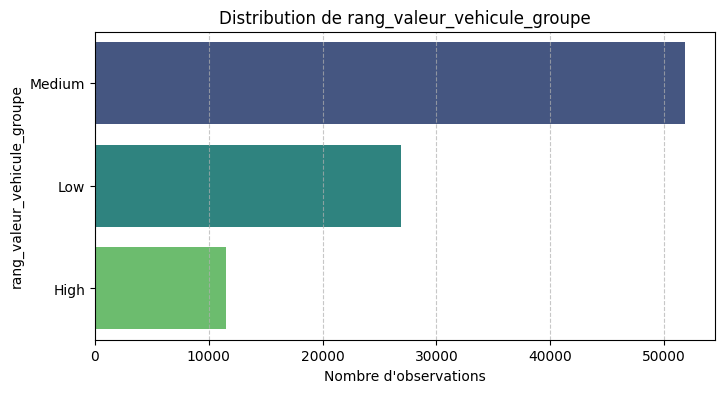

In [116]:
for col in var_cat_add:
    graph_barre(df, col)

📌 Point :
---
Beaucoup des variables ne sont pas réellement parlantes pour nous. Nous allons donc faire une analyse plus poussée de chaque variable. Afin d'essayer de mieux les interpreter.

## 2.4 Analyse plus détaillée aide a l'interpretation

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90247 entries, 0 to 90246
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   code_usage_auto                   90231 non-null  object        
 1   code_agent                        90247 non-null  object        
 2   code_formule                      89702 non-null  object        
 3   code_produit_gestion              90247 non-null  object        
 4   date_debut_contrat                90247 non-null  int64         
 5   date_dernier_mouvement            90247 non-null  int64         
 6   echeance_contrat                  90231 non-null  datetime64[ns]
 7   prime_annuelle_ttc                90247 non-null  float64       
 8   code_marque_vehicule              90160 non-null  object        
 9   date_obtention_permis             90054 non-null  float64       
 10  date_mise_circulation             89315 non-nu

## 2.4 Representation graphique de chaque variable en fonction de la variable cible 

### 2.4.1 Représentations graphiques des catégorielles par rapport à la cible

In [118]:
var_cat_graph

['code_usage_auto',
 'code_agent',
 'code_formule',
 'code_produit_gestion',
 'code_marque_vehicule',
 'libelle_modele_vehicule',
 'numero_tarif',
 'puissance_fiscale',
 'rang_valeur_vehicule',
 'code_marche',
 'code_csp',
 'sexe',
 'situation_familiale',
 'departement',
 'region',
 'client_actif',
 'etat',
 'motif_resiliation',
 'premier_contrat',
 'age_avant_mise_circulation',
 'permis_avant_contrat',
 'vehicule_avant_contrat',
 'libelle_modele_vehicule_groupe_1',
 'libelle_modele_vehicule_groupe_2',
 'code_agent_groupe',
 'code_formule_groupe',
 'code_produit_gestion_groupe',
 'code_marque_vehicule_groupe_2',
 'code_marque_vehicule_groupe_1',
 'numero_tarif_groupe',
 'numero_tarif_groupe2',
 'code_csp_groupe_1',
 'code_csp_groupe_2',
 'situation_familiale_binaire',
 'region_groupe',
 'etat_groupe',
 'motif_resiliation_groupe',
 'code_usage_auto_groupe',
 'rang_valeur_vehicule_groupe']

In [119]:
var_cat_add

['libelle_modele_vehicule_groupe_1',
 'libelle_modele_vehicule_groupe_2',
 'code_agent_groupe',
 'code_formule_groupe',
 'code_produit_gestion_groupe',
 'code_marque_vehicule_groupe_2',
 'code_marque_vehicule_groupe_1',
 'numero_tarif_groupe',
 'numero_tarif_groupe2',
 'code_csp_groupe_1',
 'code_csp_groupe_2',
 'situation_familiale_binaire',
 'region_groupe',
 'etat_groupe',
 'motif_resiliation_groupe',
 'code_usage_auto_groupe',
 'rang_valeur_vehicule_groupe']

In [120]:
var_cat_graph_2 =['code_usage_auto_groupe',
 'puissance_fiscale',
 'rang_valeur_vehicule',
 'rang_valeur_vehicule_groupe',
 'code_marche',
 'sexe',
 'client_actif',
 'premier_contrat',
 'age_avant_mise_circulation',
 'permis_avant_contrat',
 'vehicule_avant_contrat',
 'libelle_modele_vehicule_groupe_1',
 'libelle_modele_vehicule_groupe_2',
 'code_agent_groupe',
 'code_formule_groupe',
 'code_produit_gestion_groupe',
 'code_marque_vehicule_groupe_2',
 'code_marque_vehicule_groupe_1',
 'numero_tarif_groupe',
 'numero_tarif_groupe2',
 'code_csp_groupe_1',
 'code_csp_groupe_2',
 'situation_familiale_binaire',
 'region_groupe',
 'etat_groupe',
 'motif_resiliation_groupe']

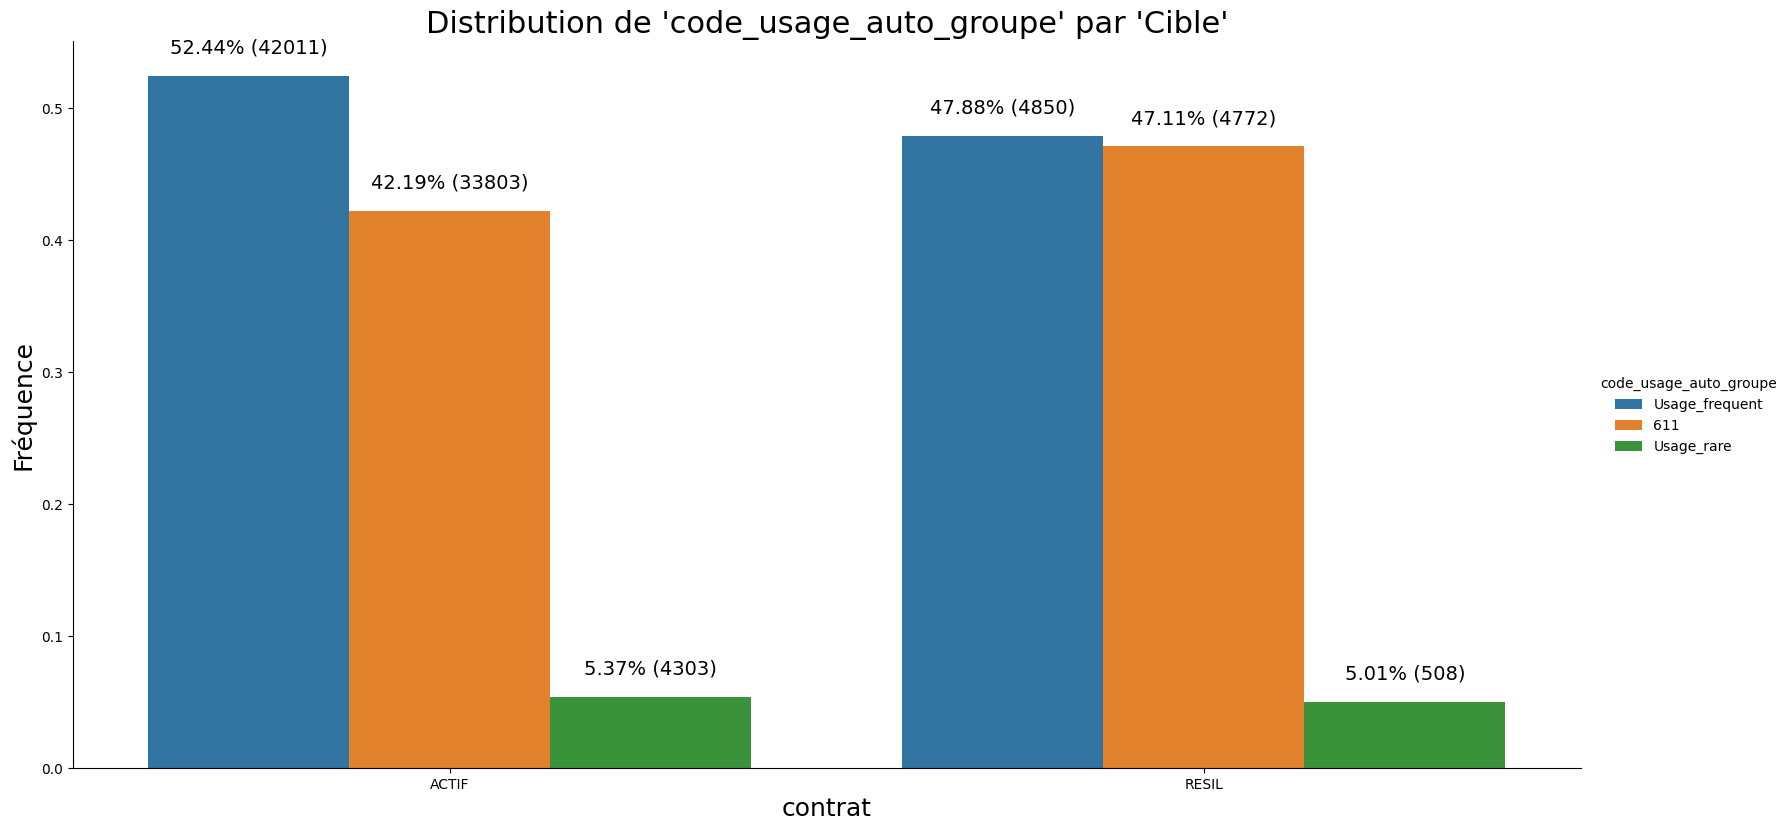

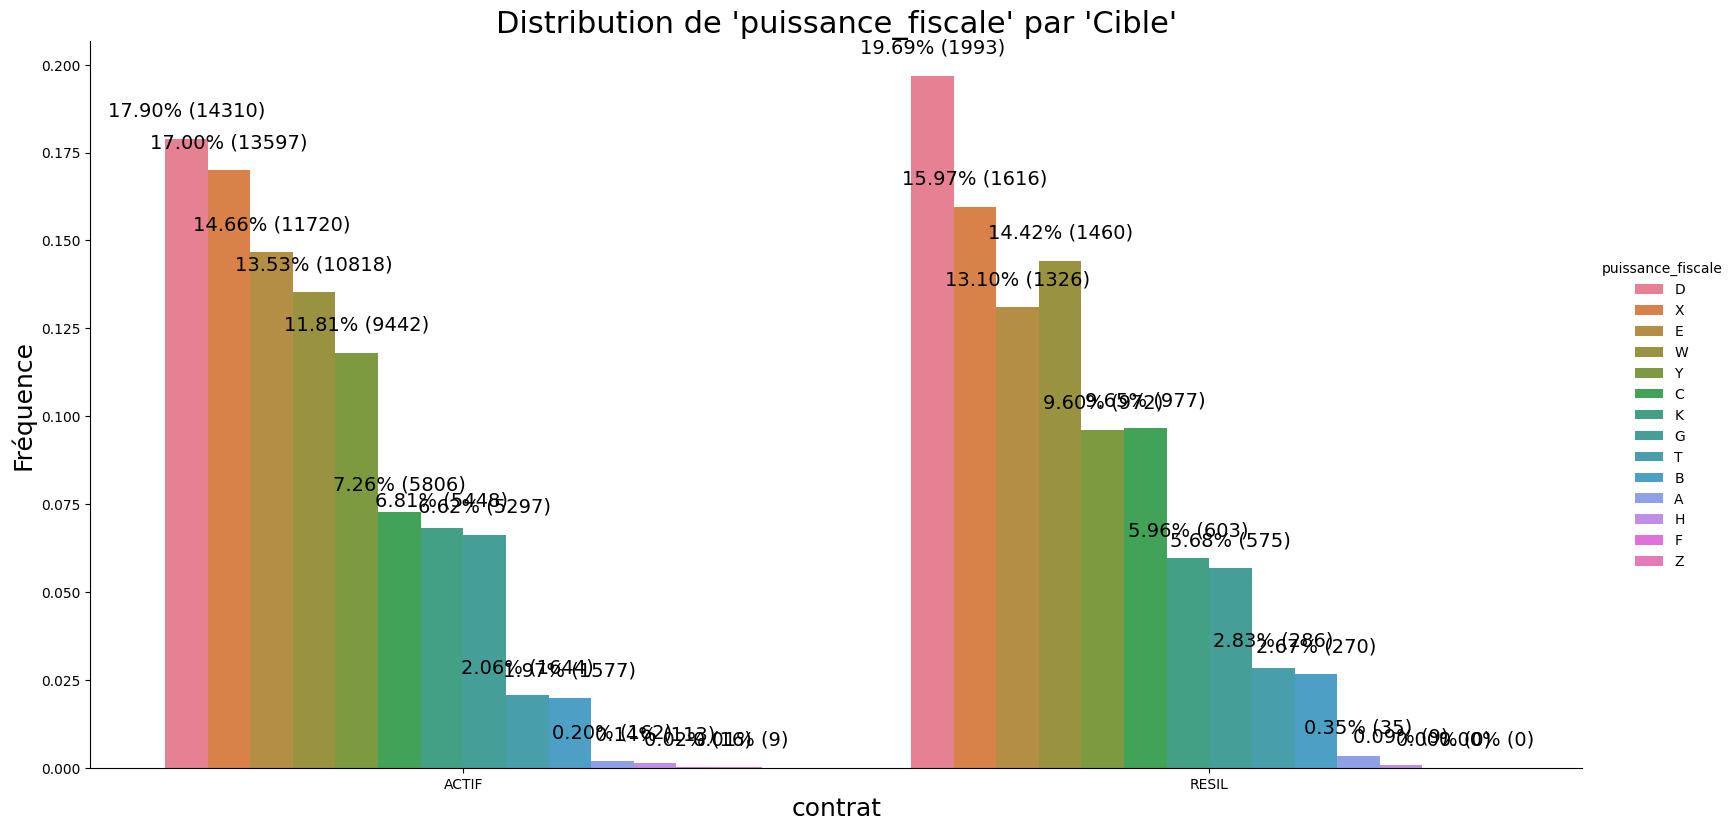

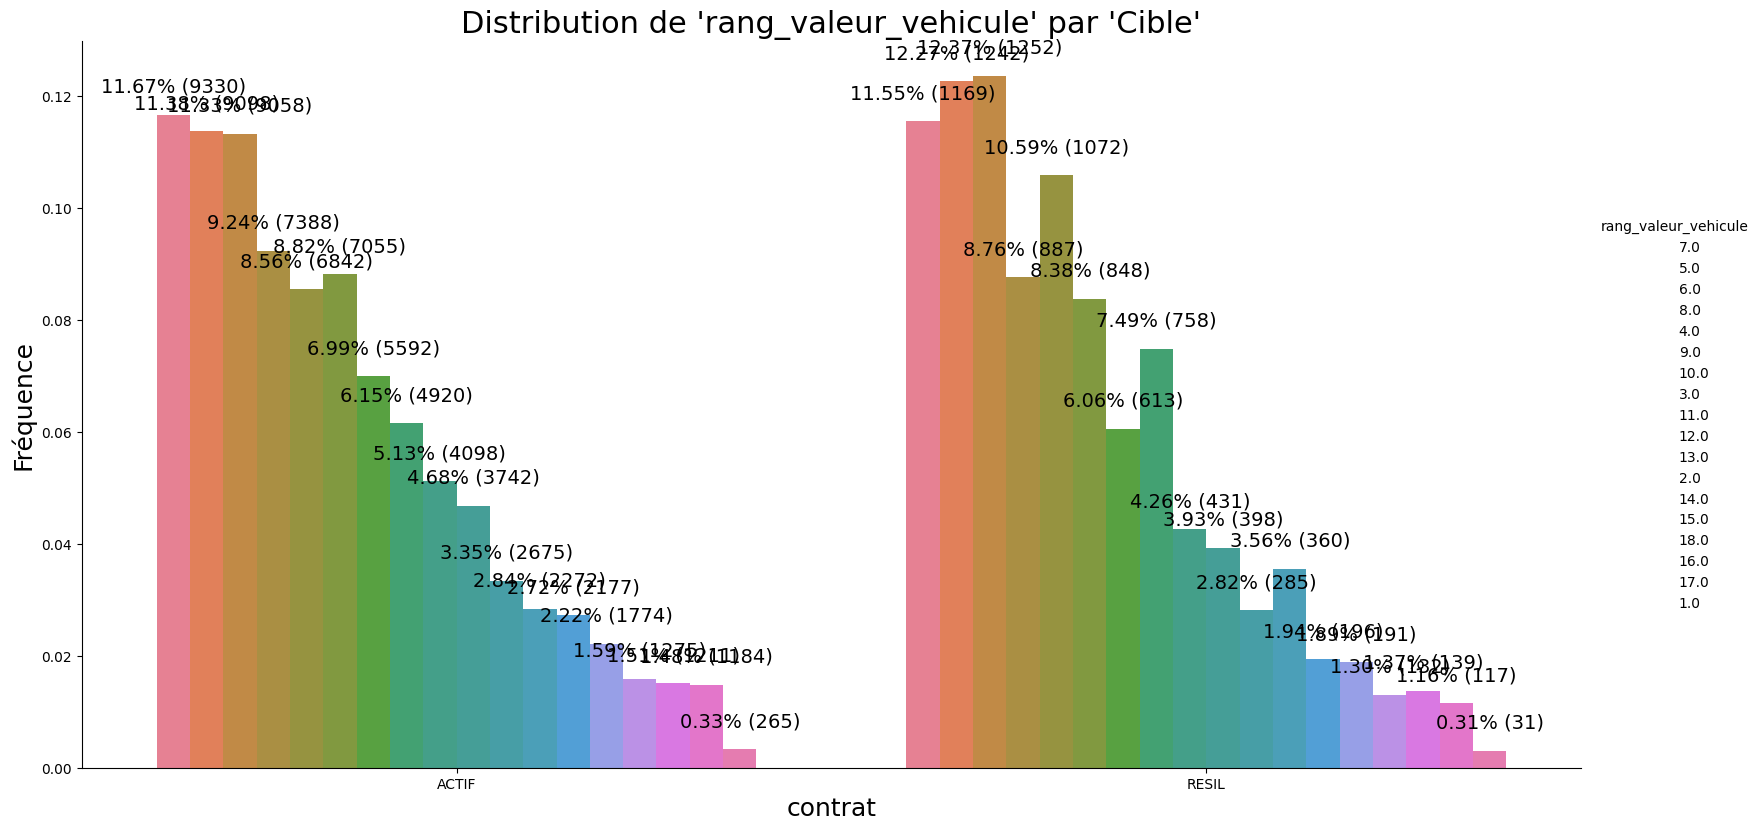

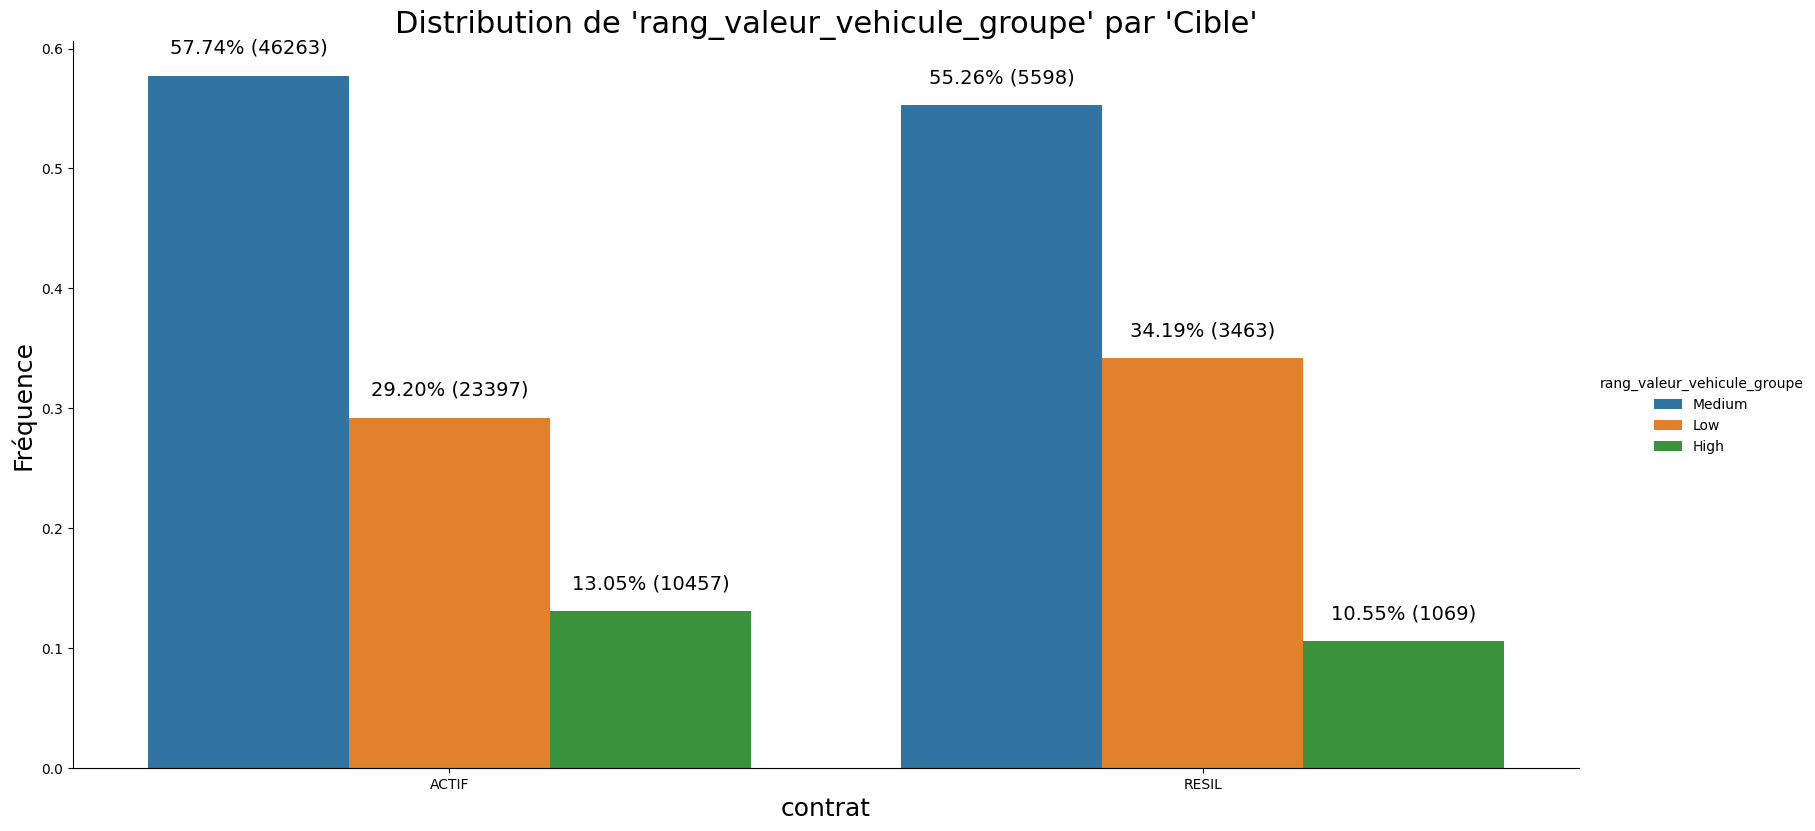

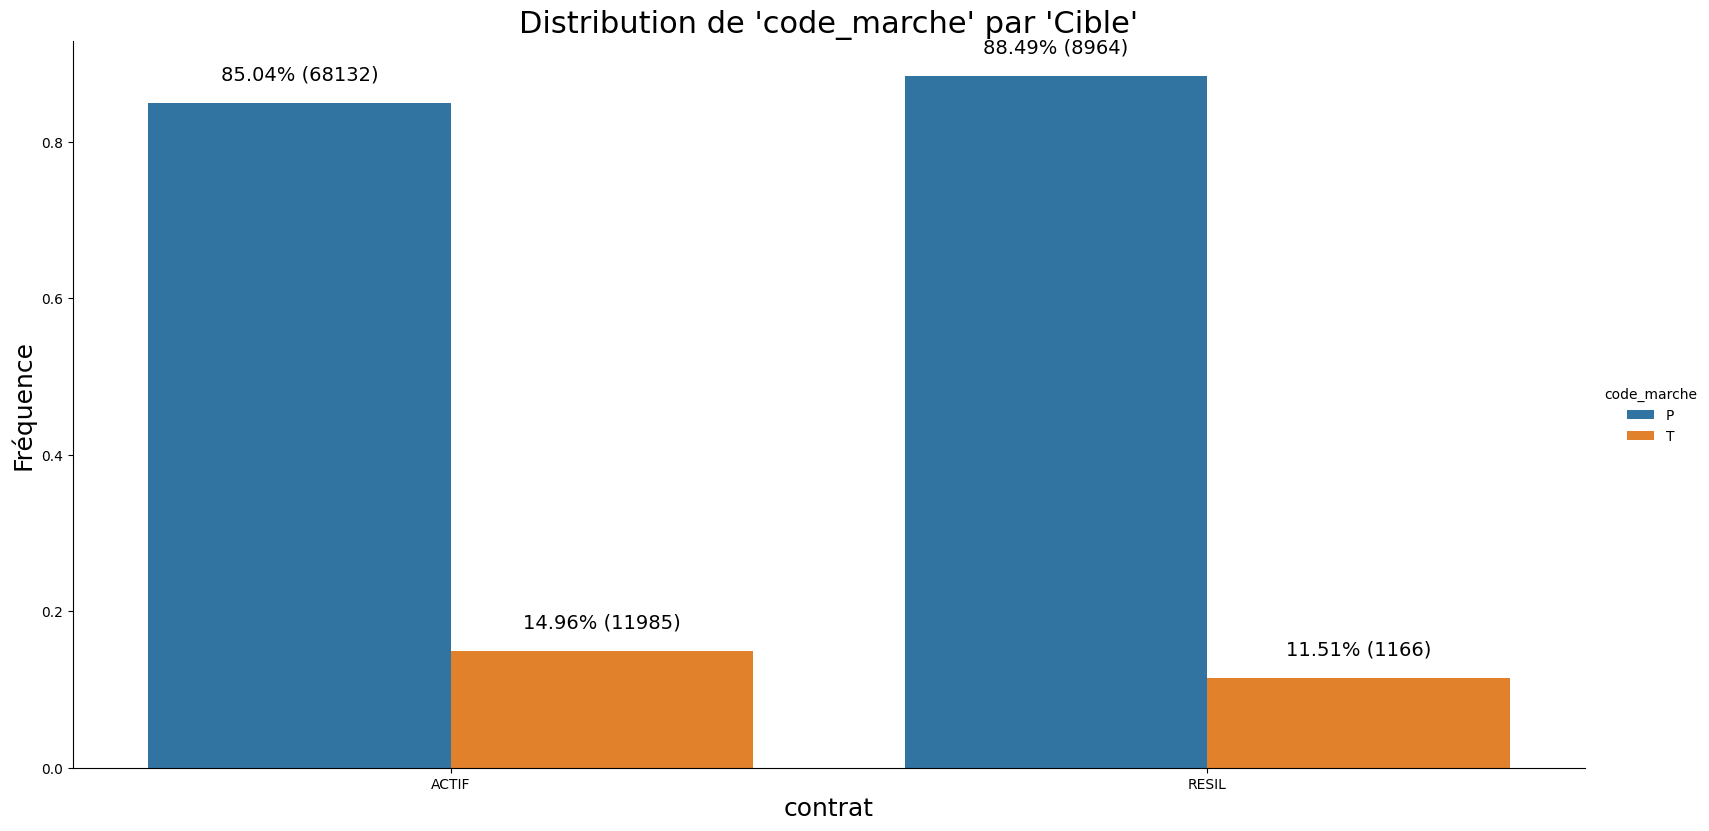

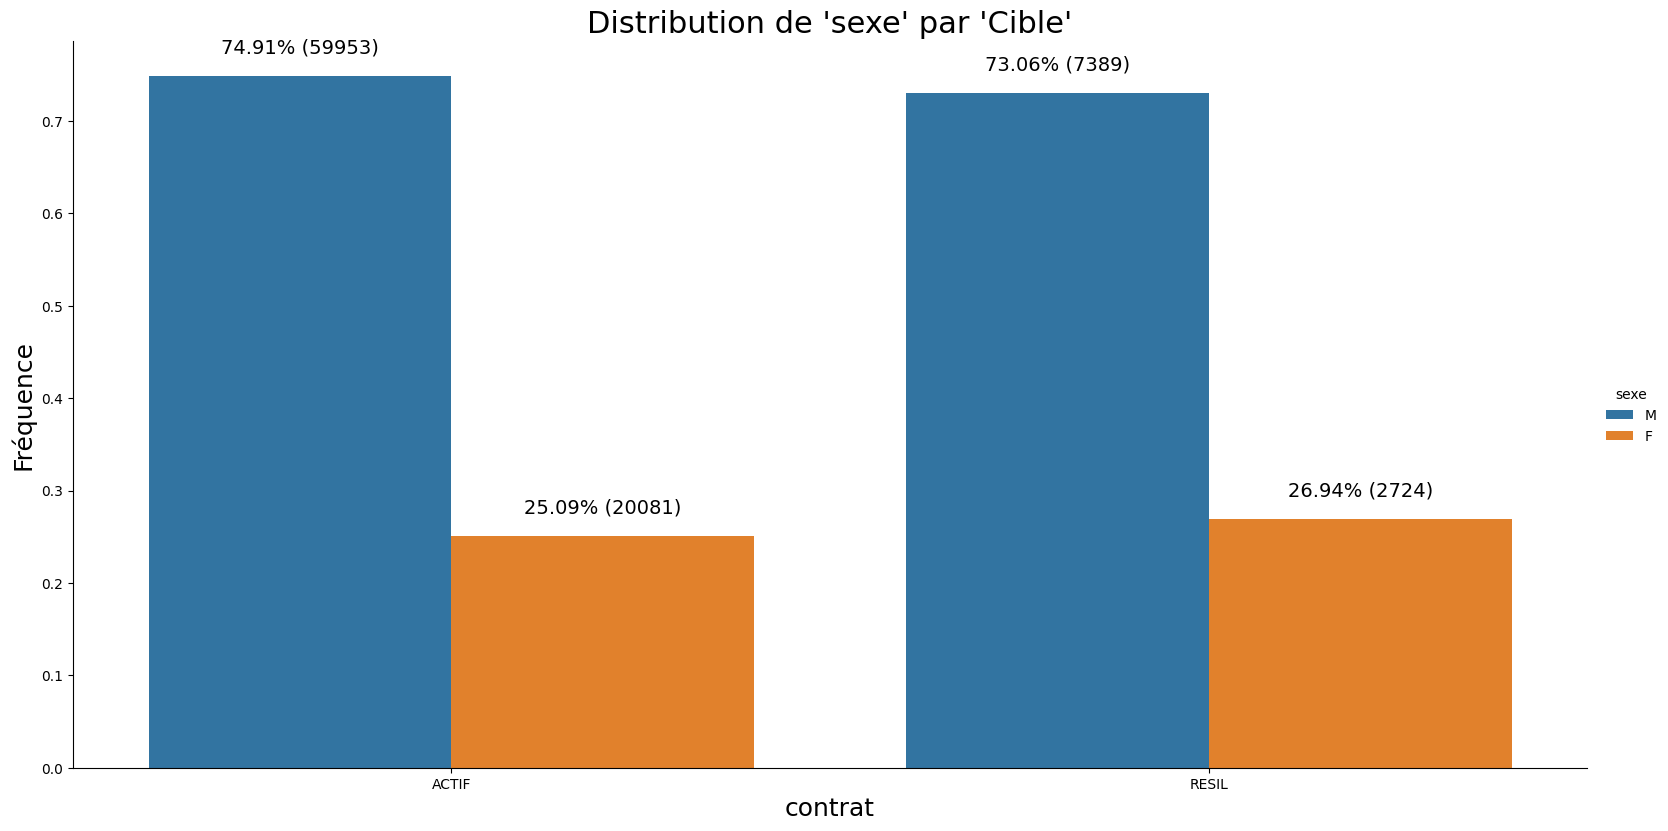

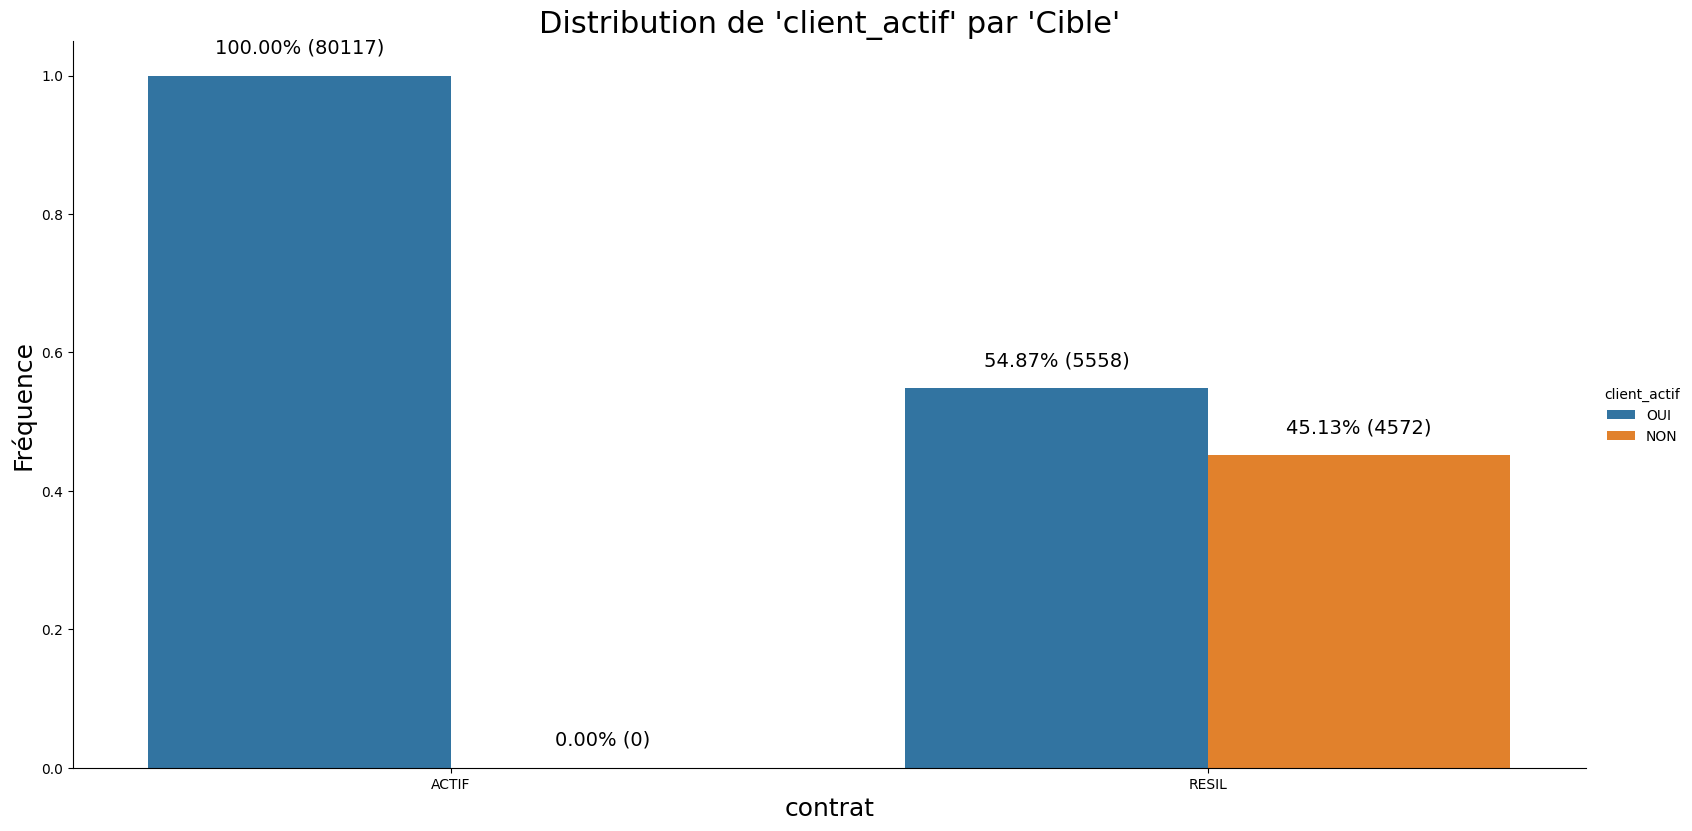

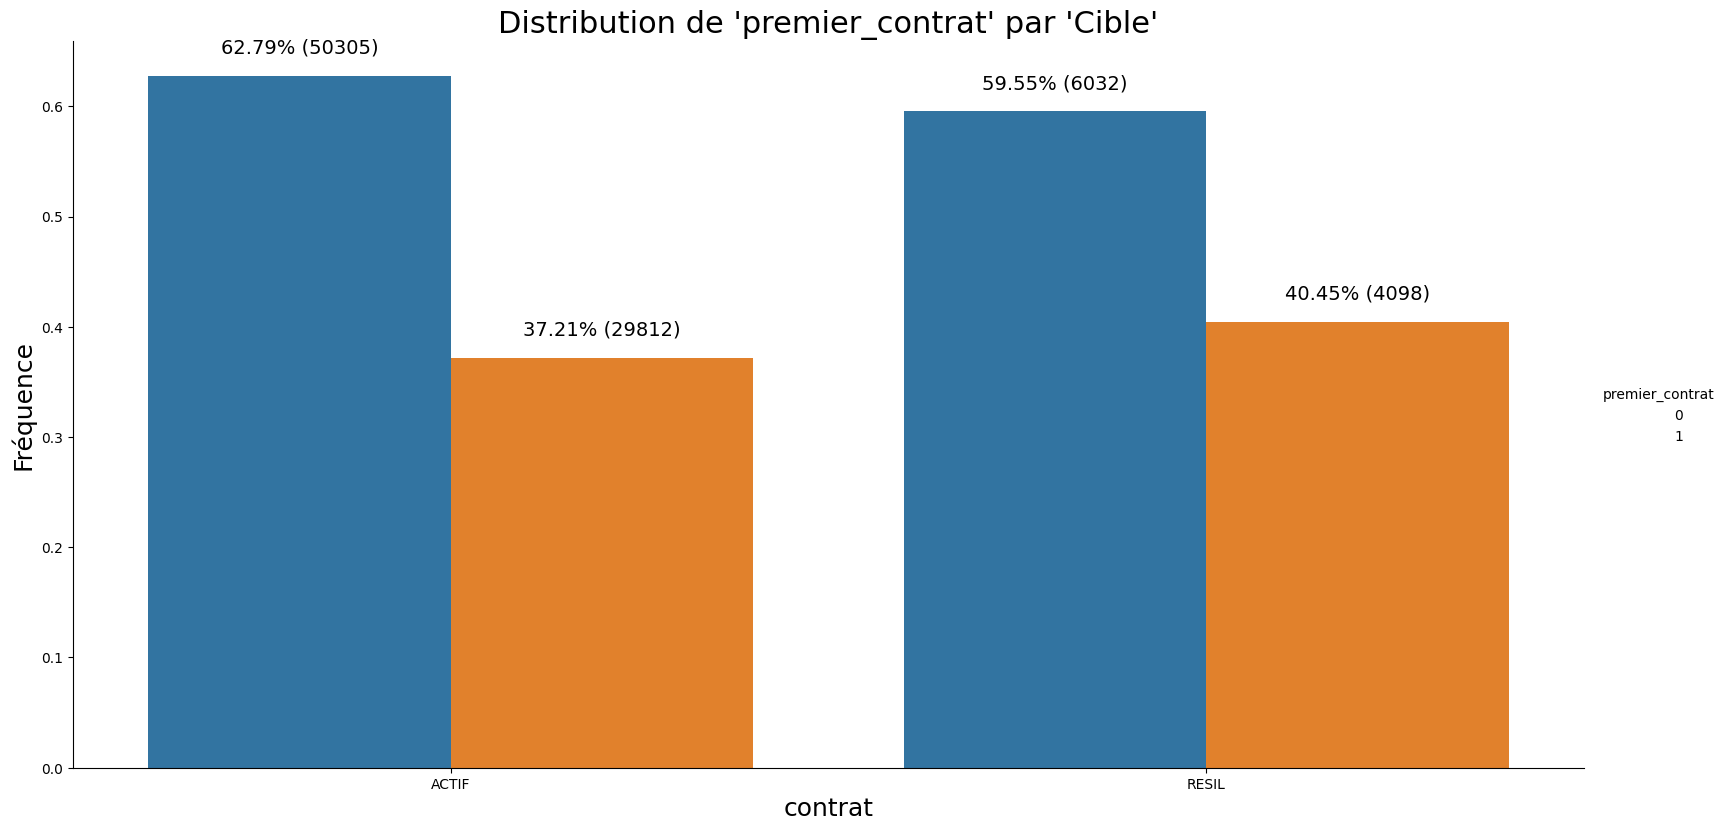

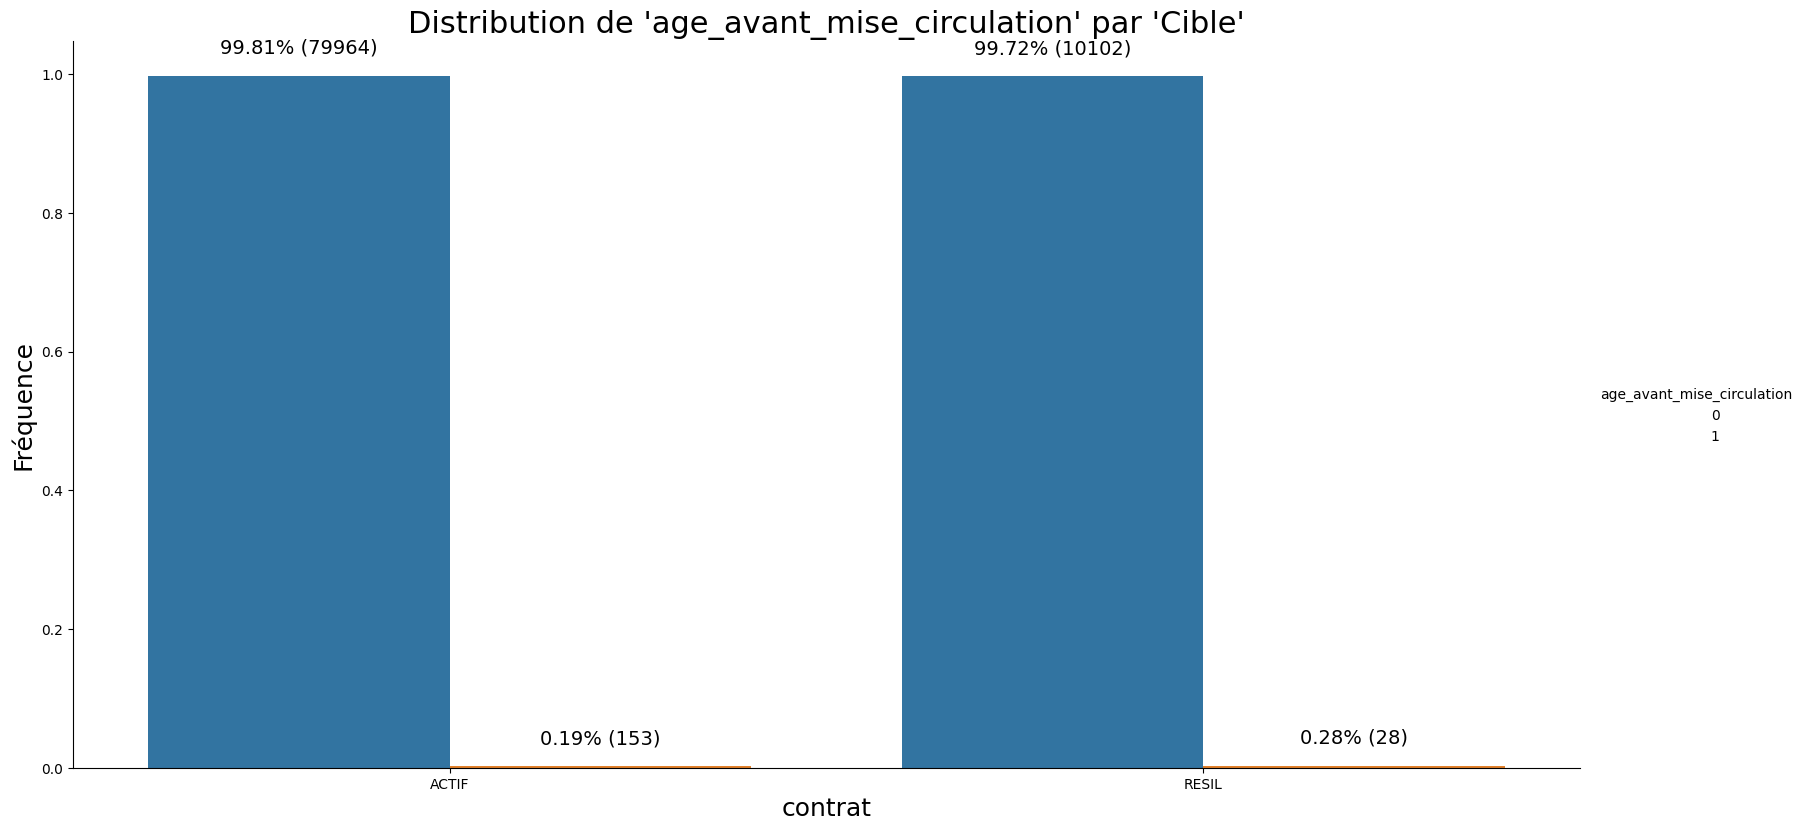

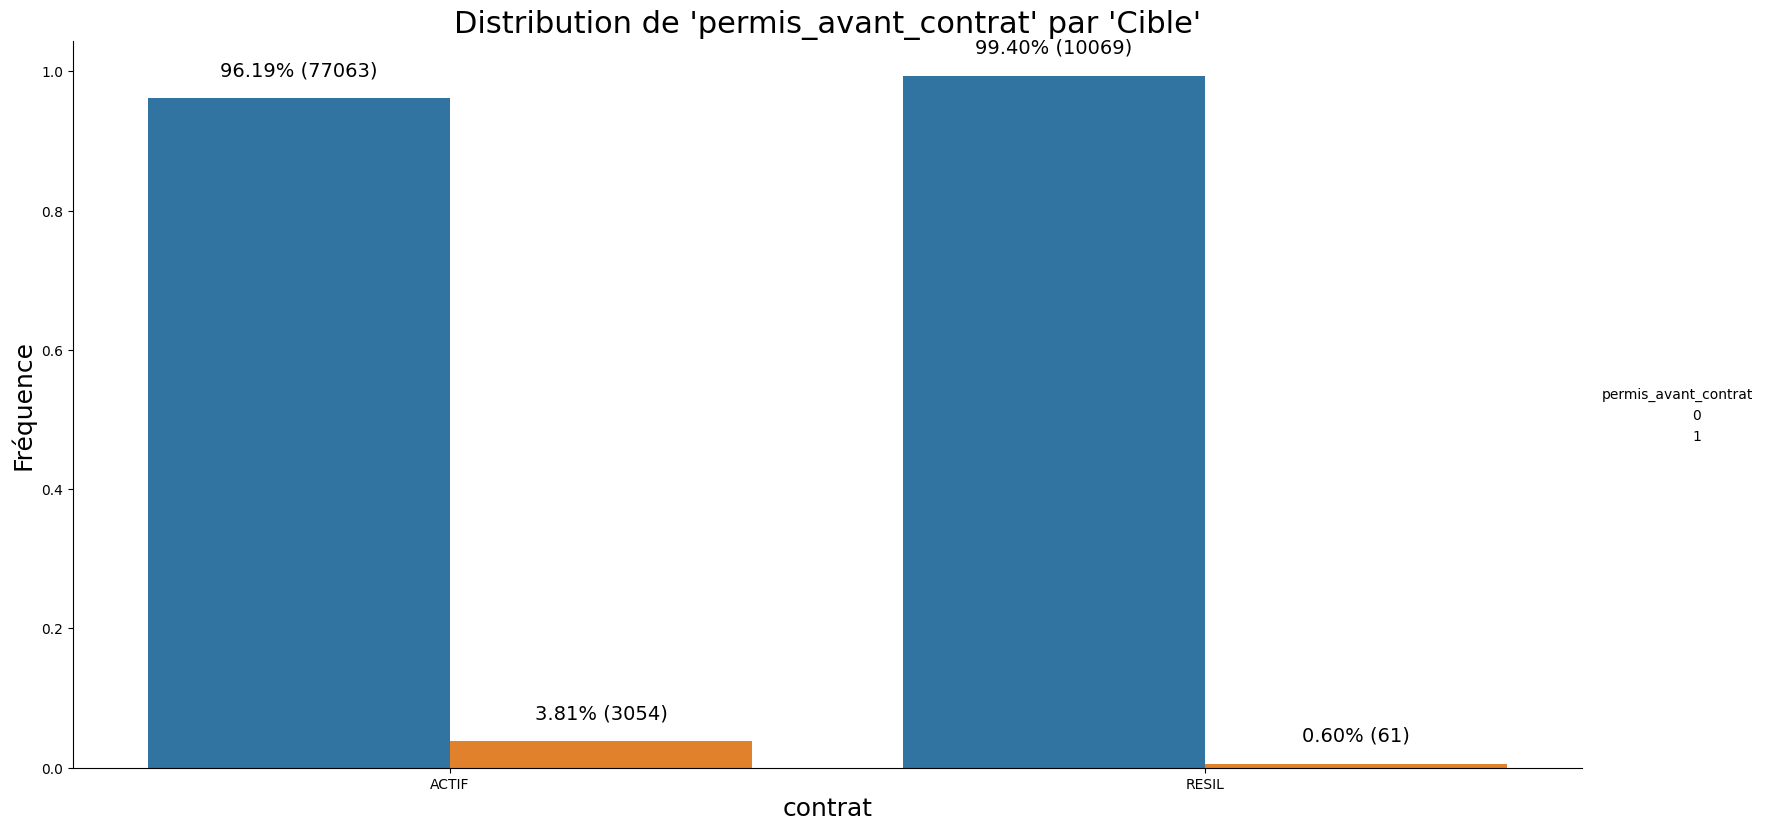

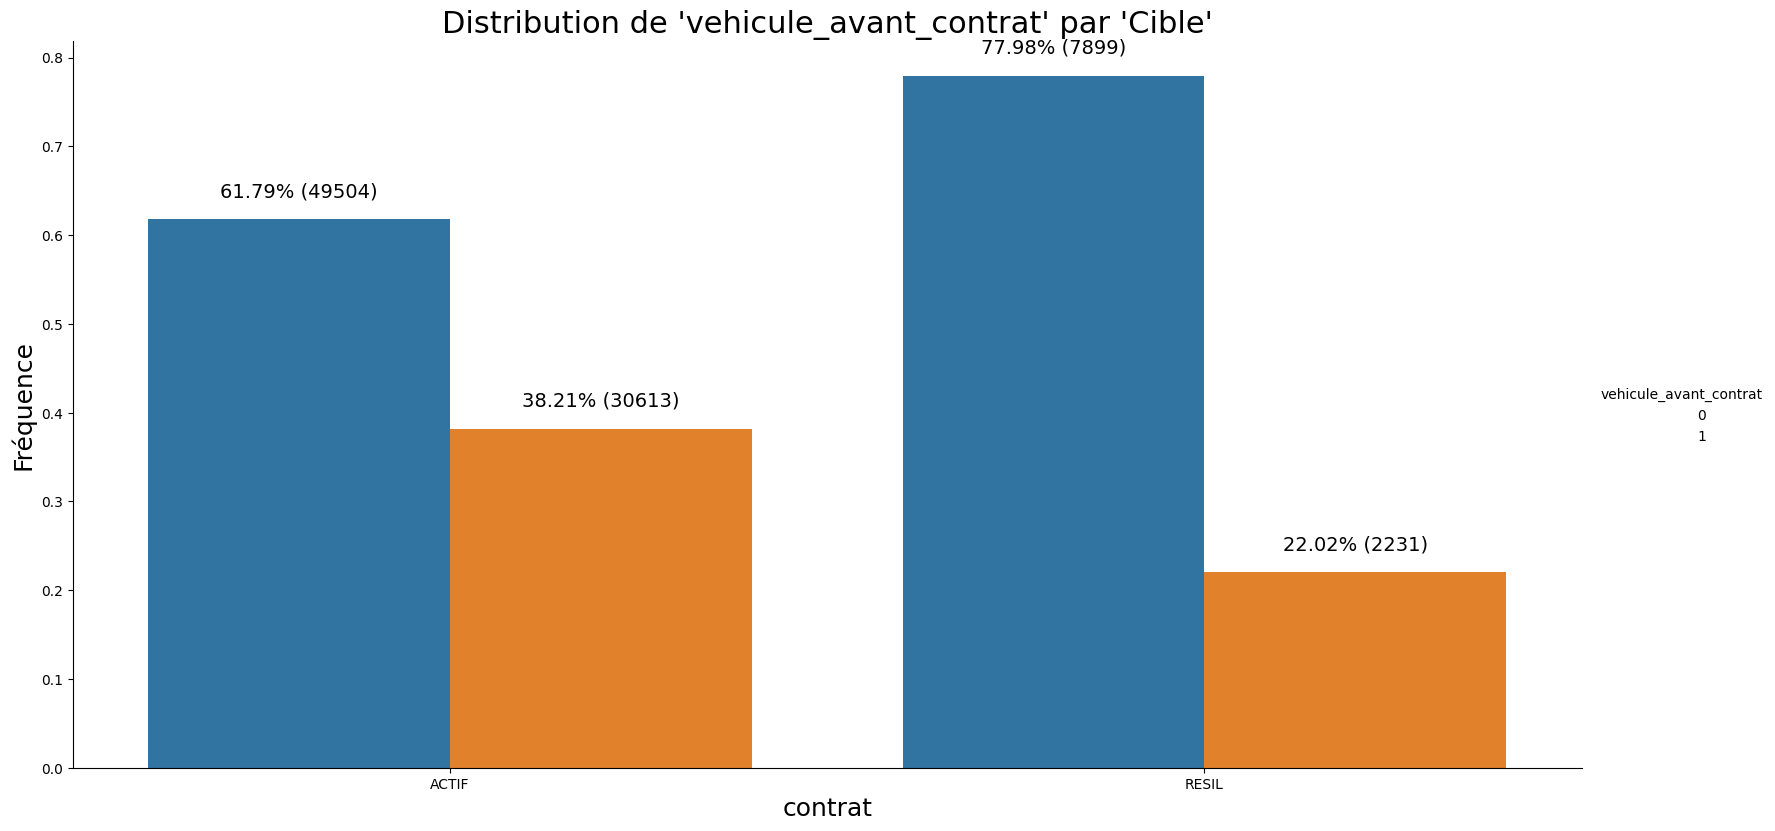

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


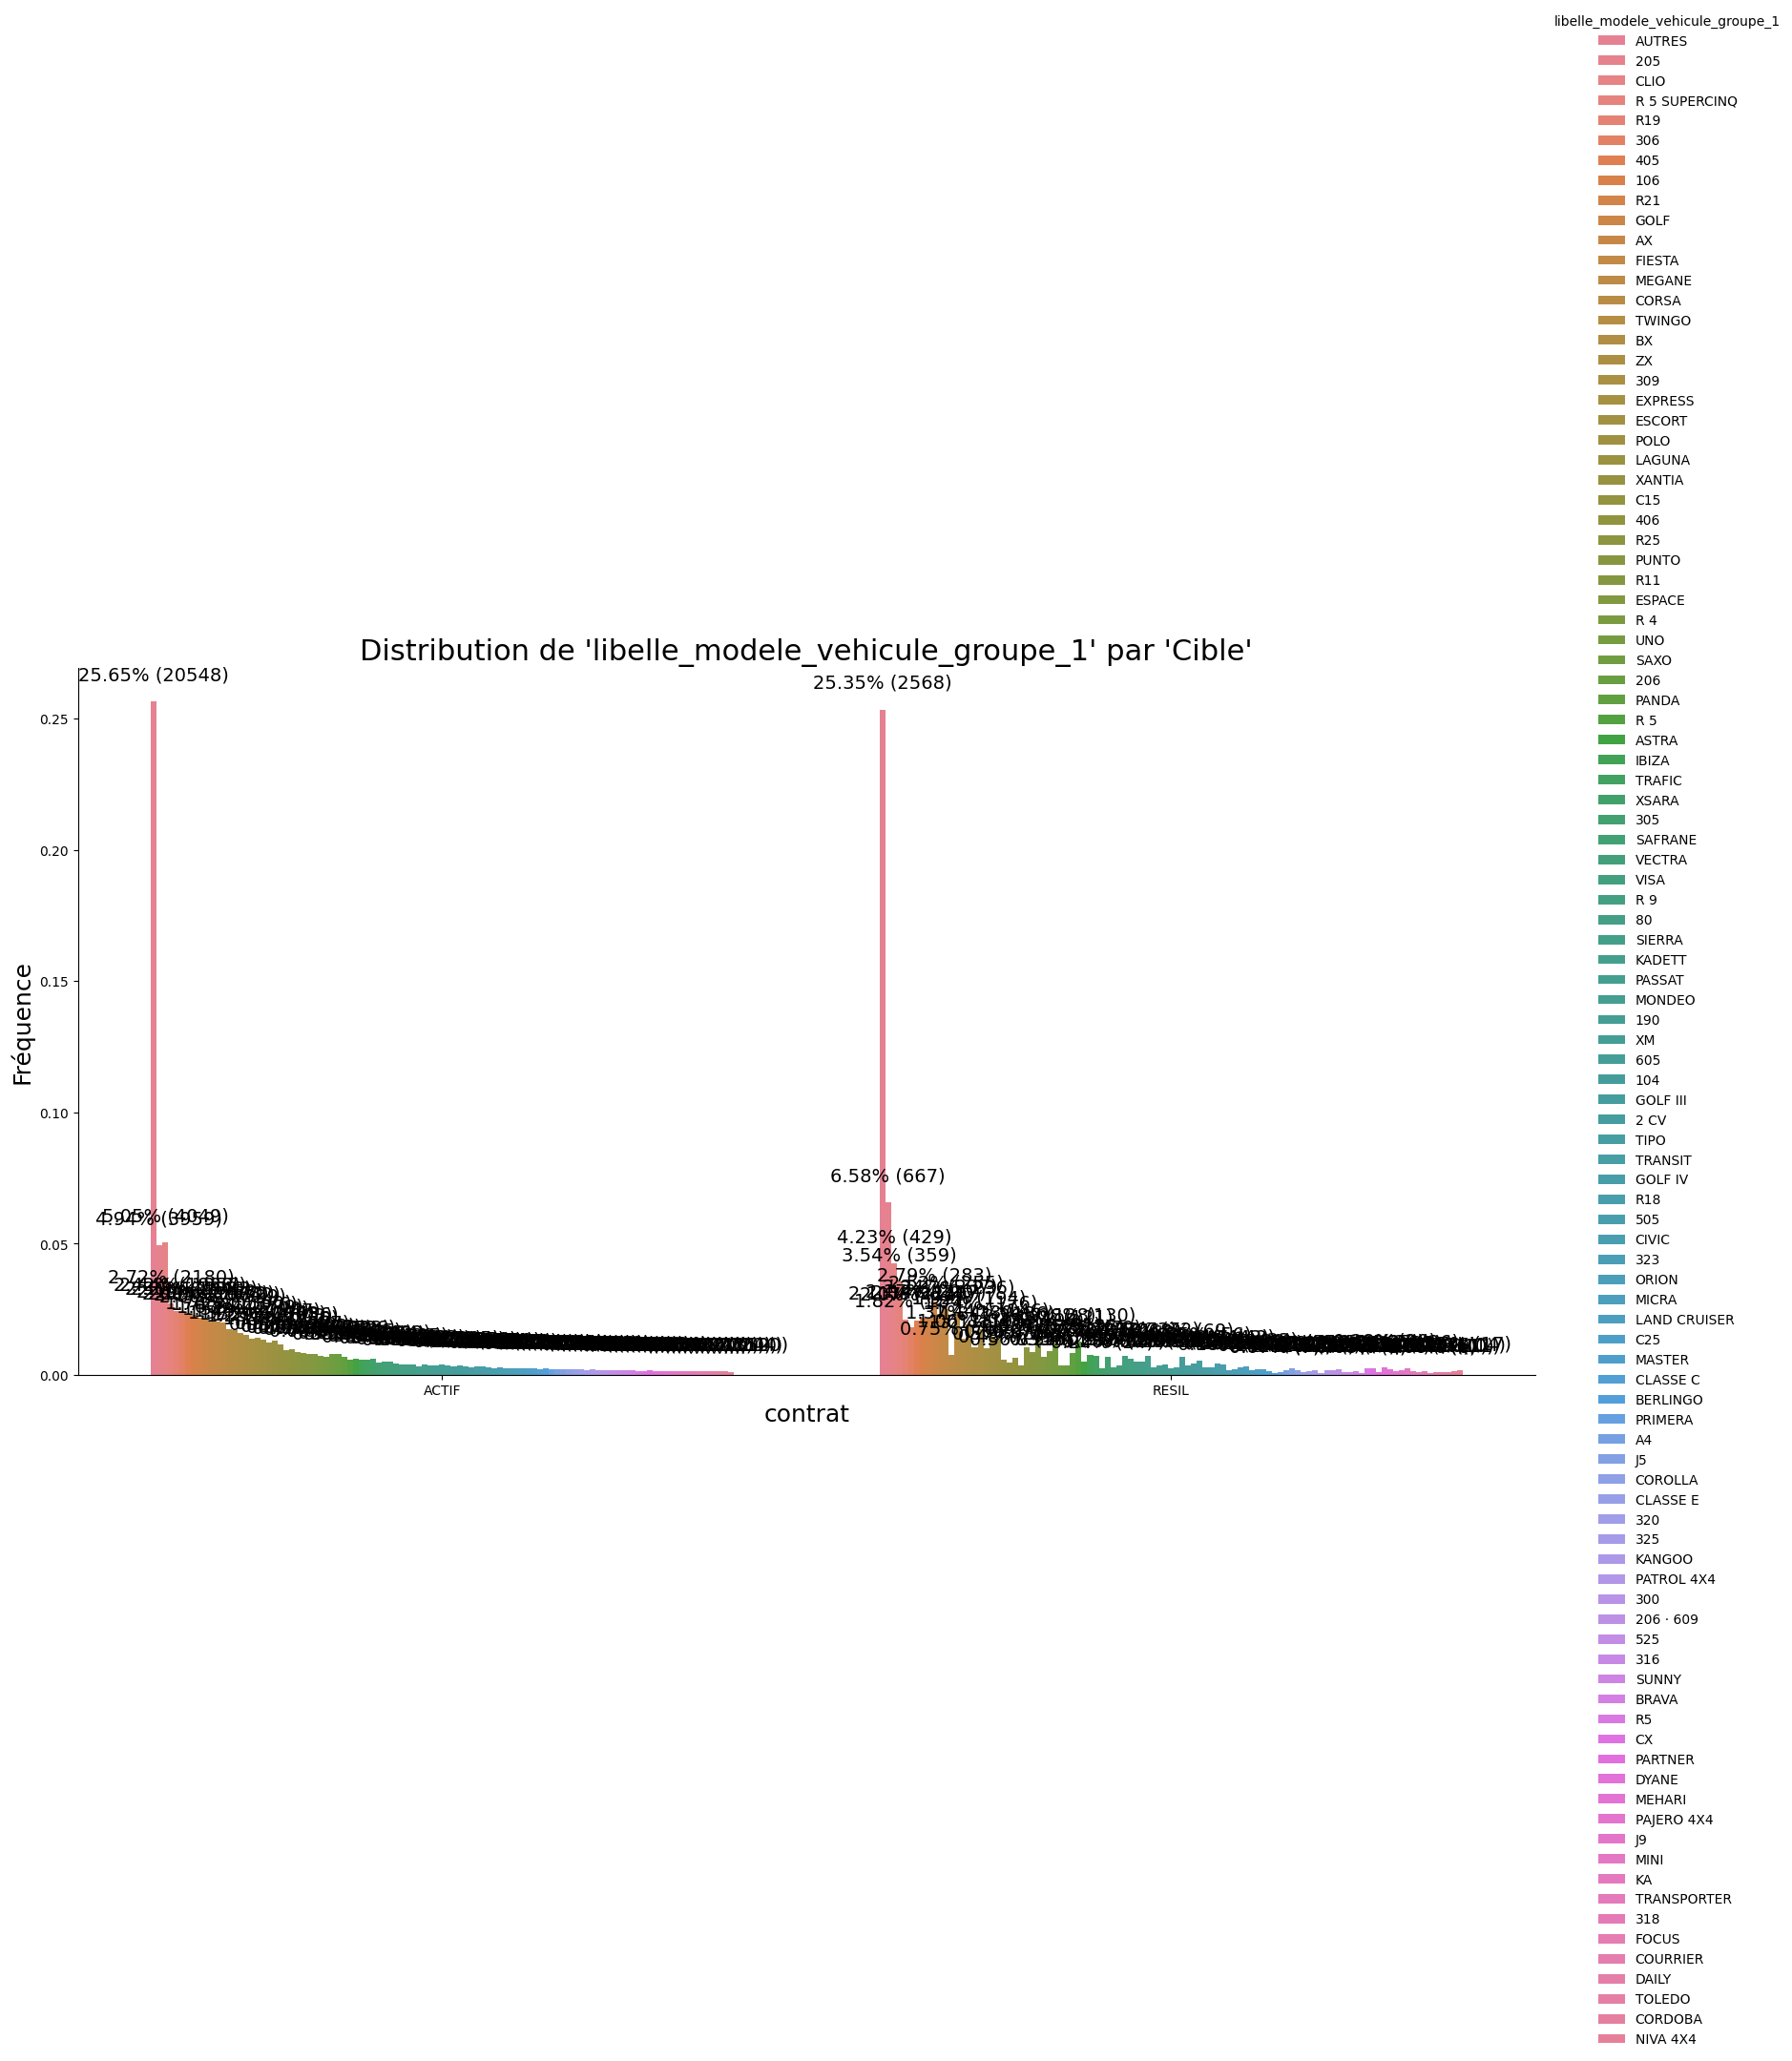

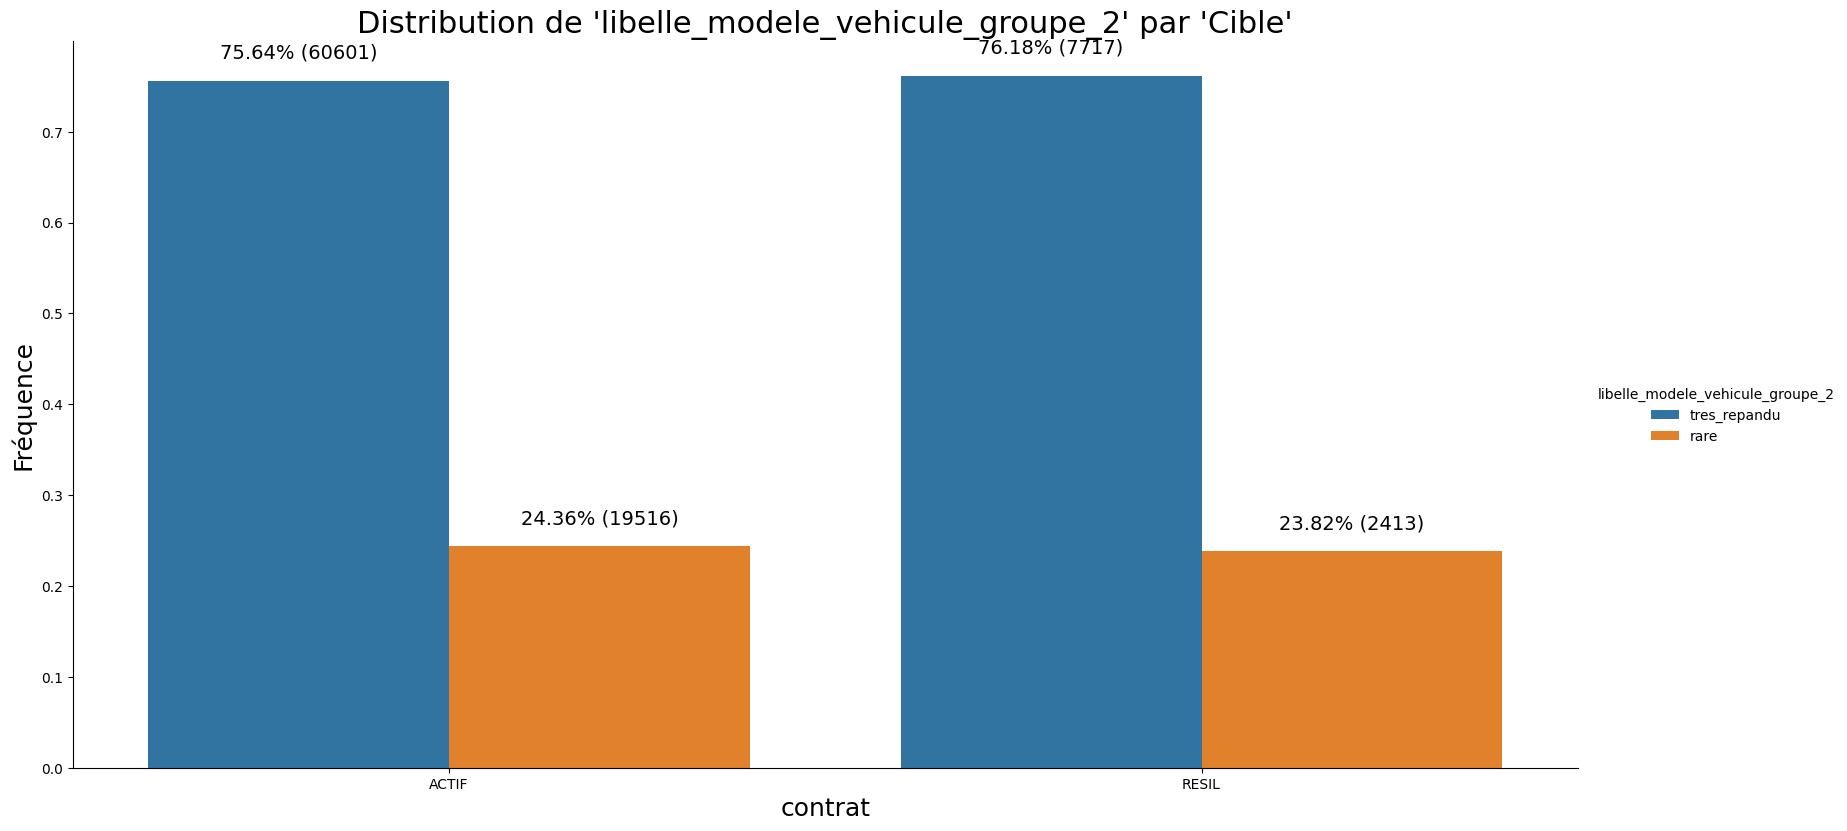

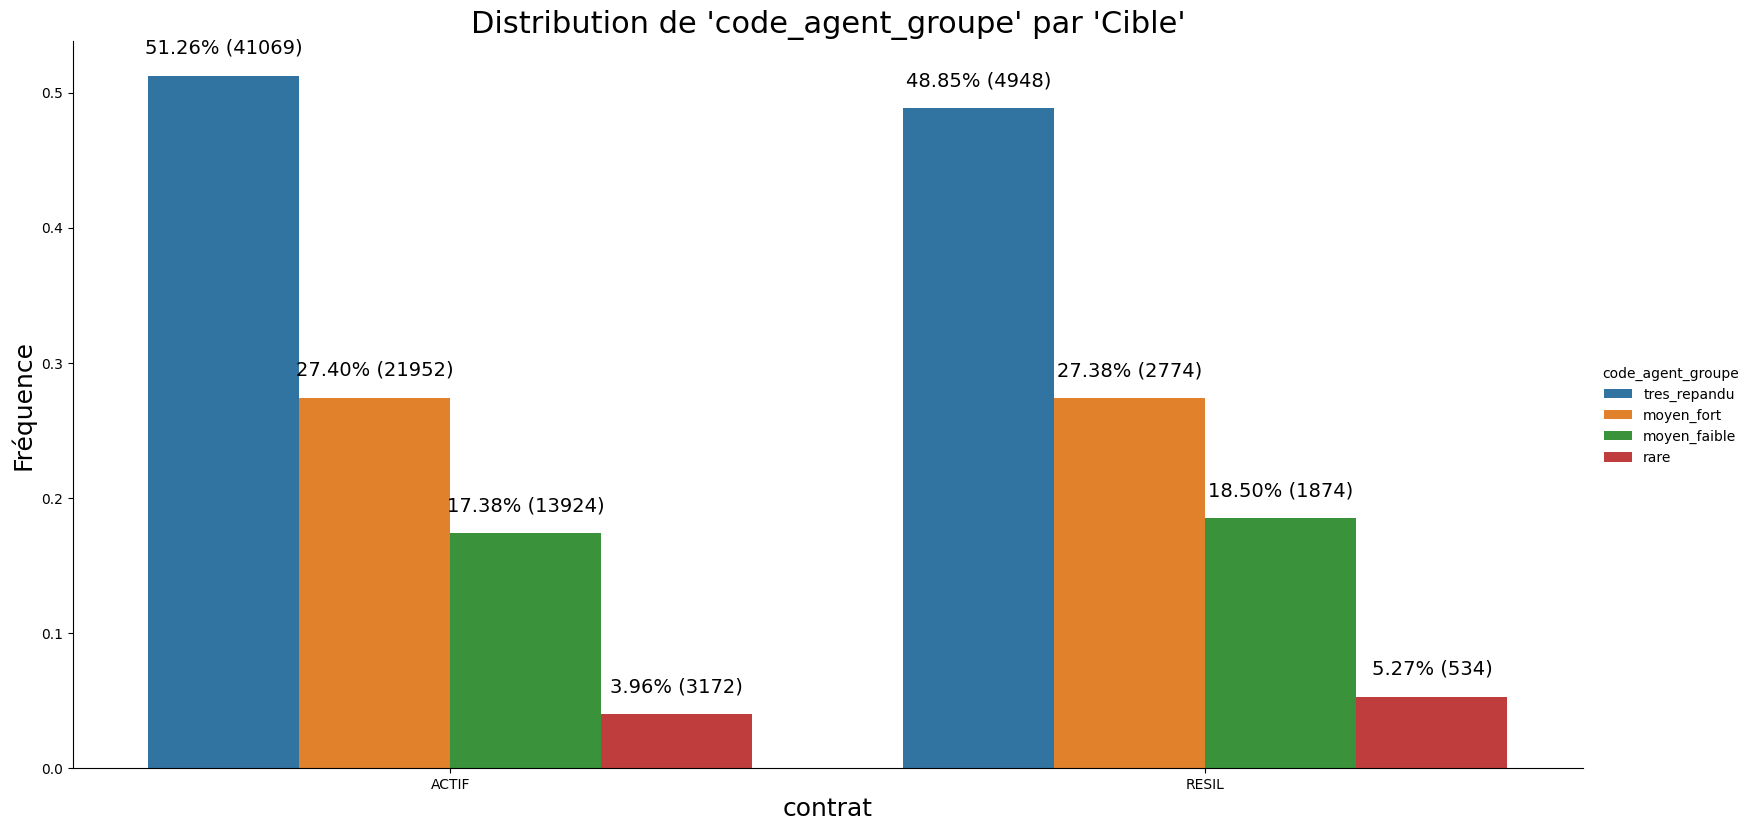

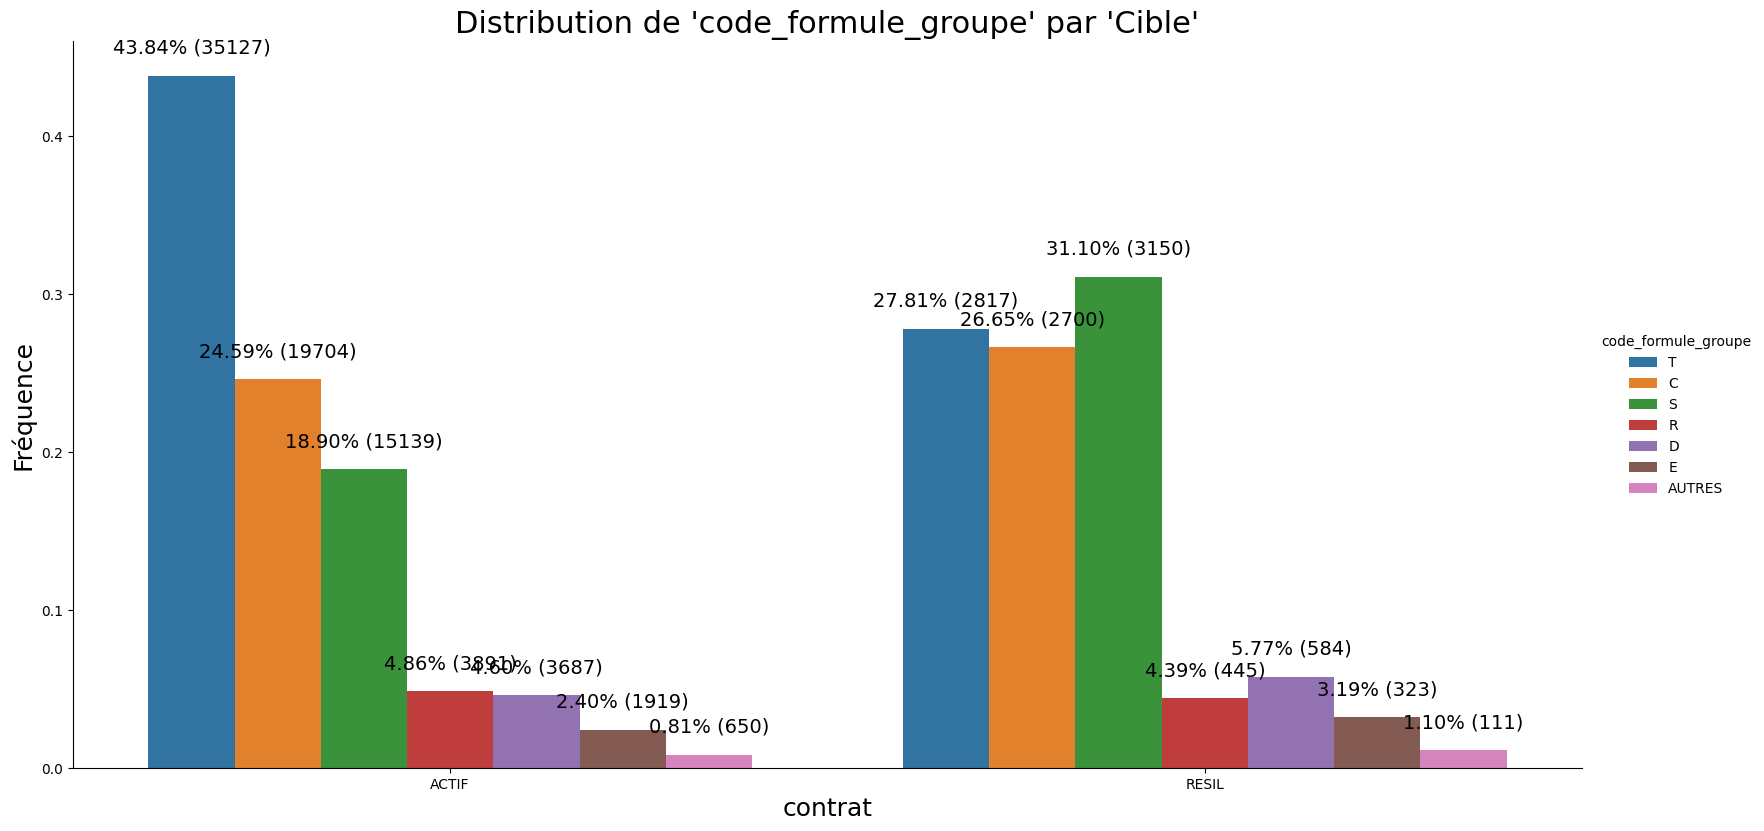

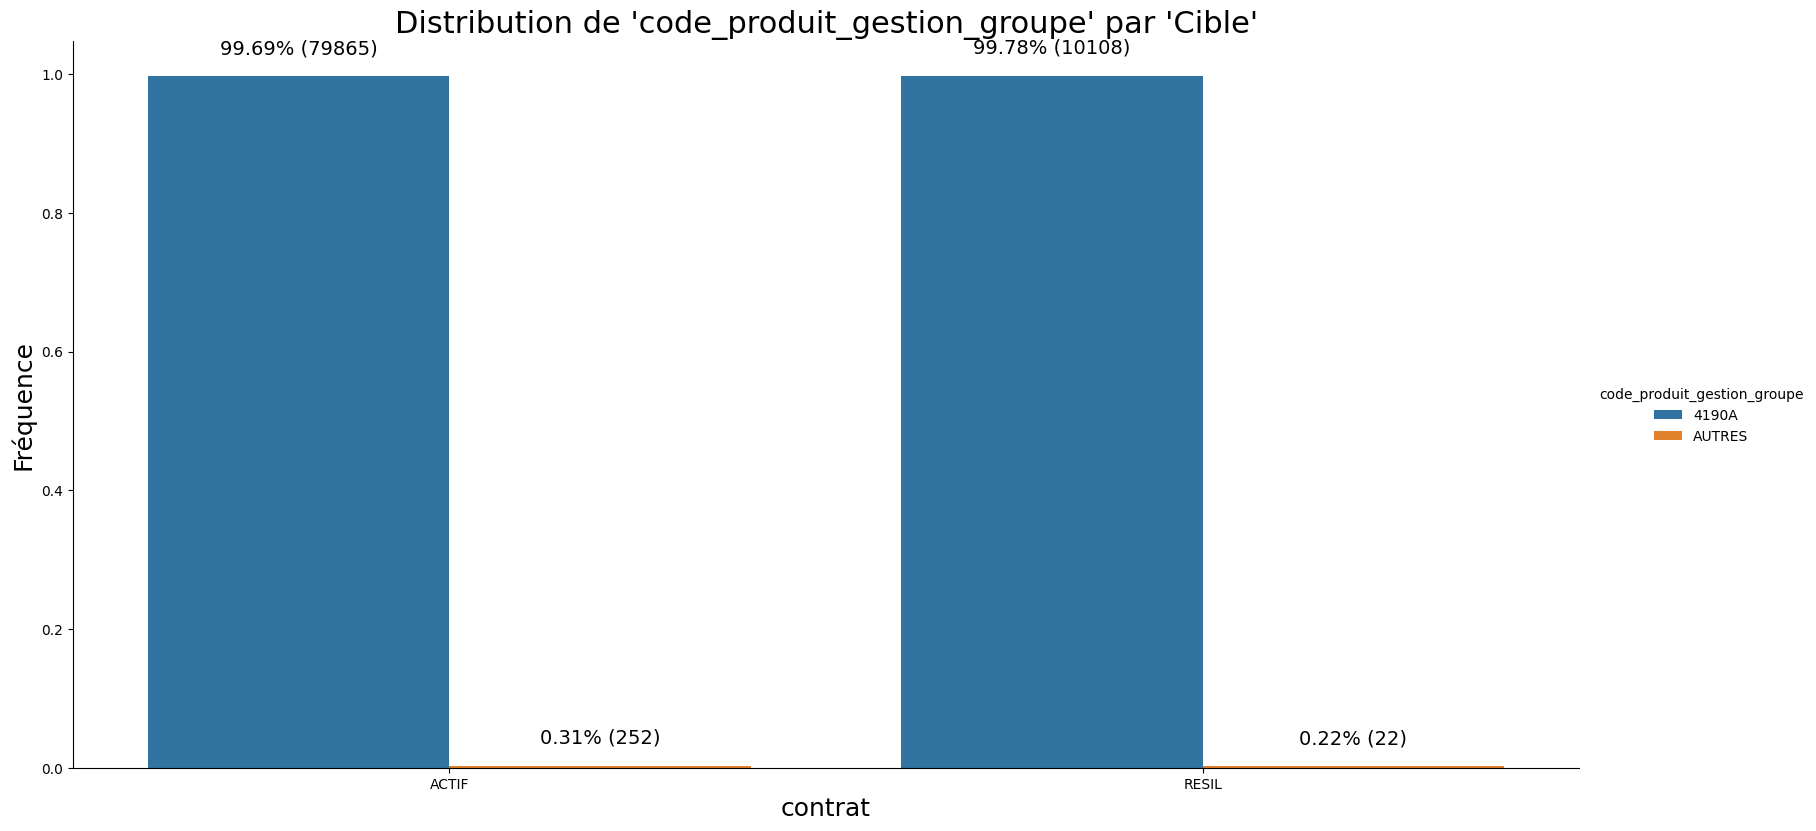

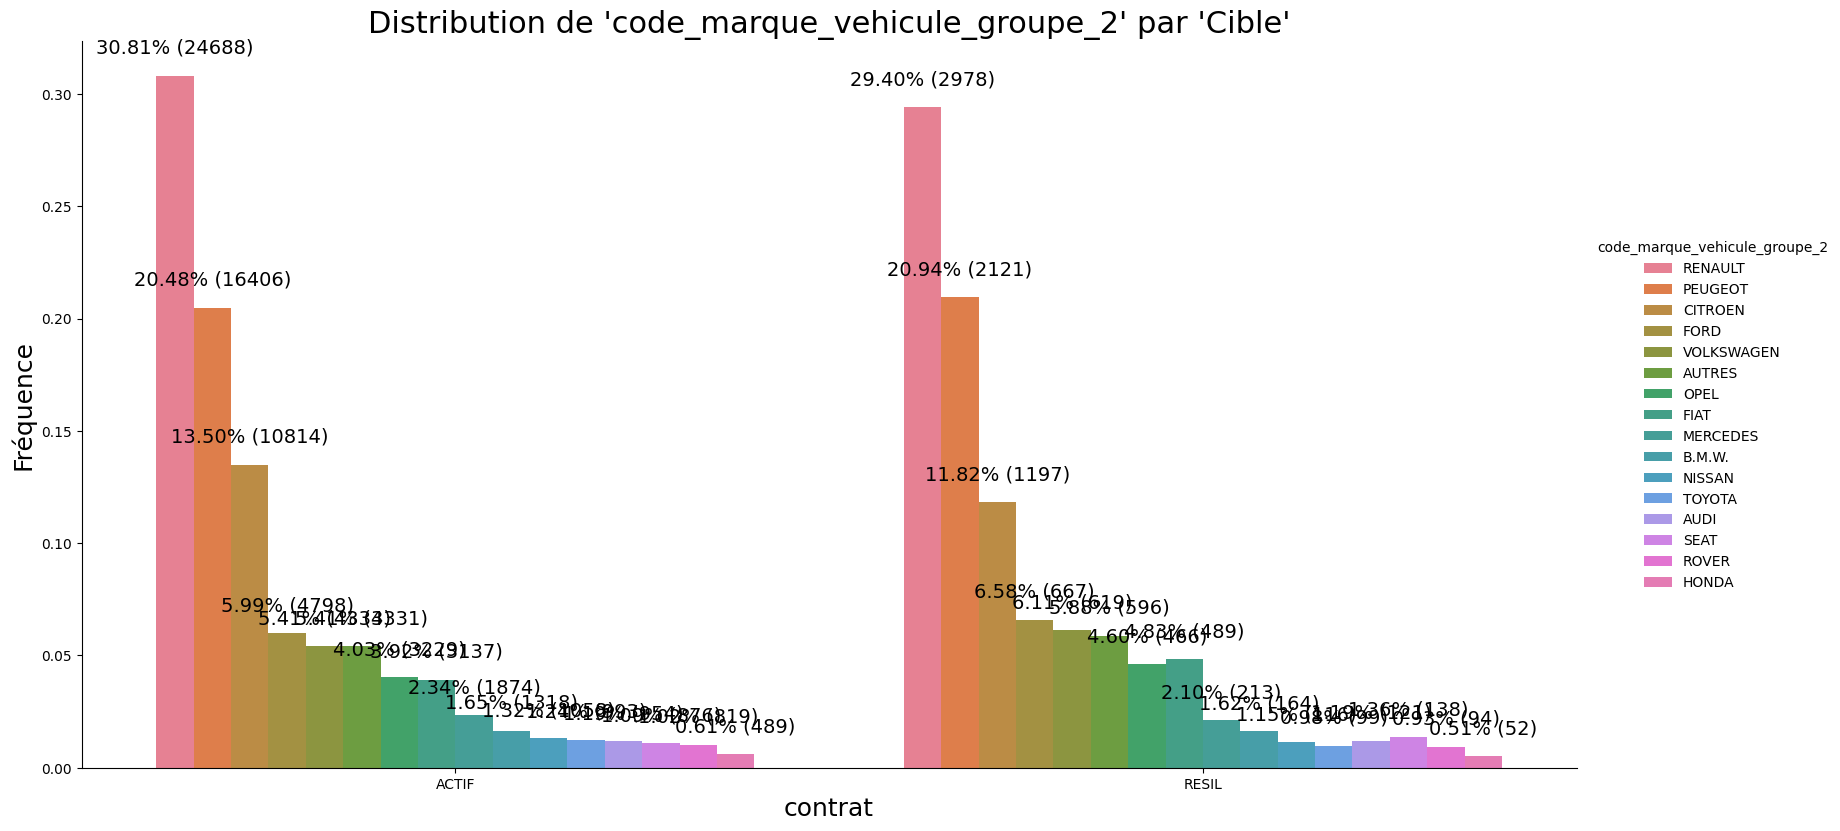

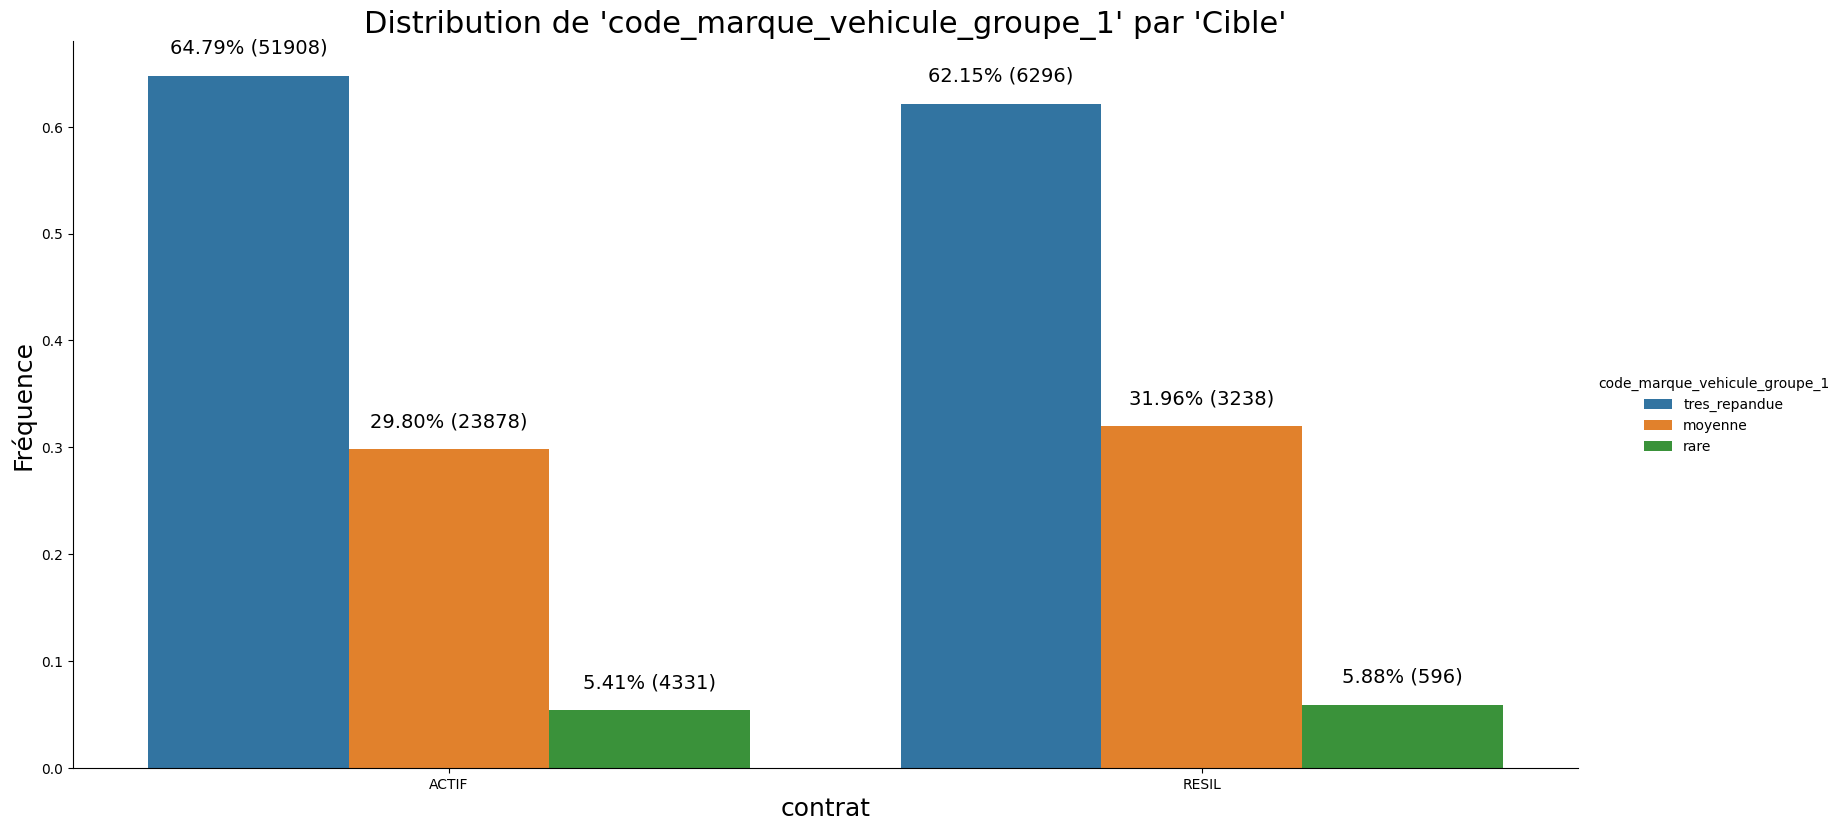

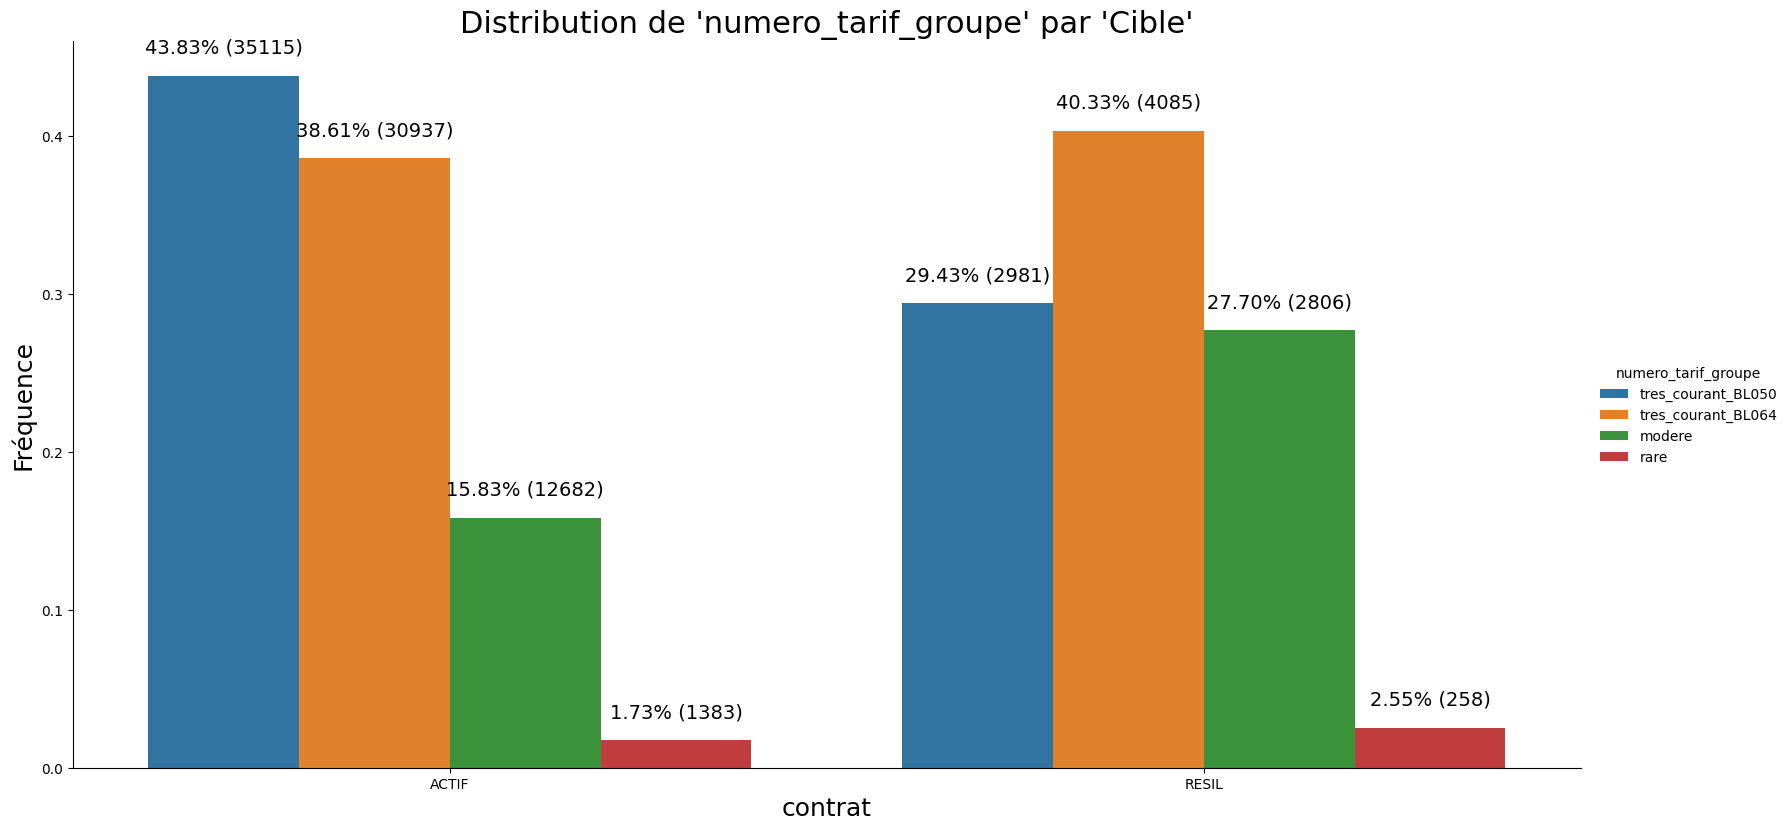

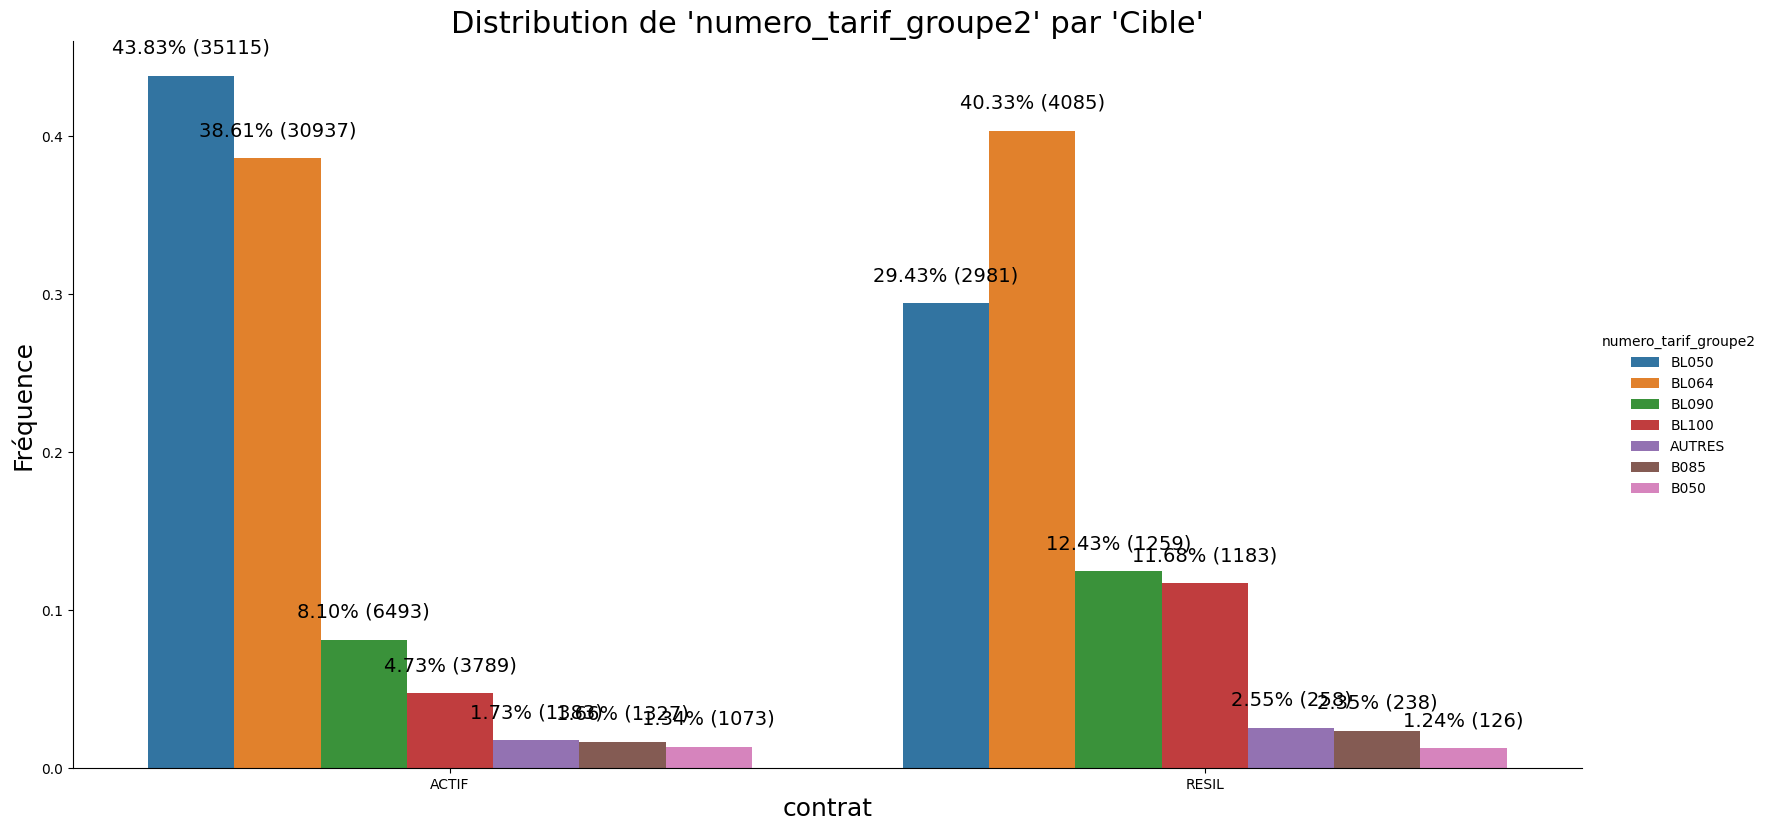

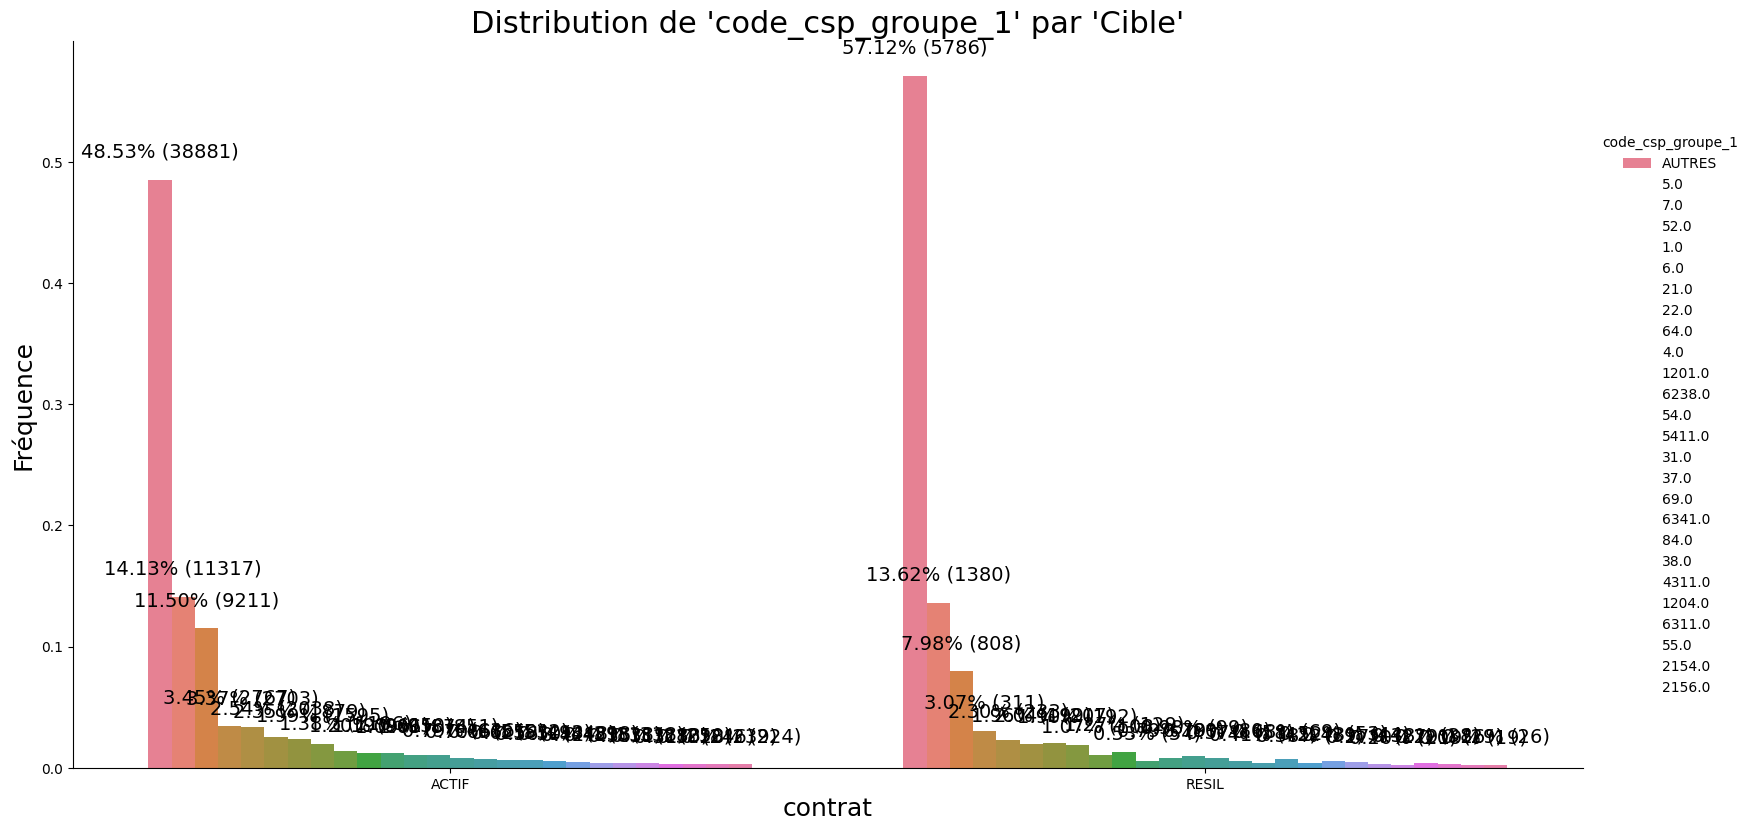

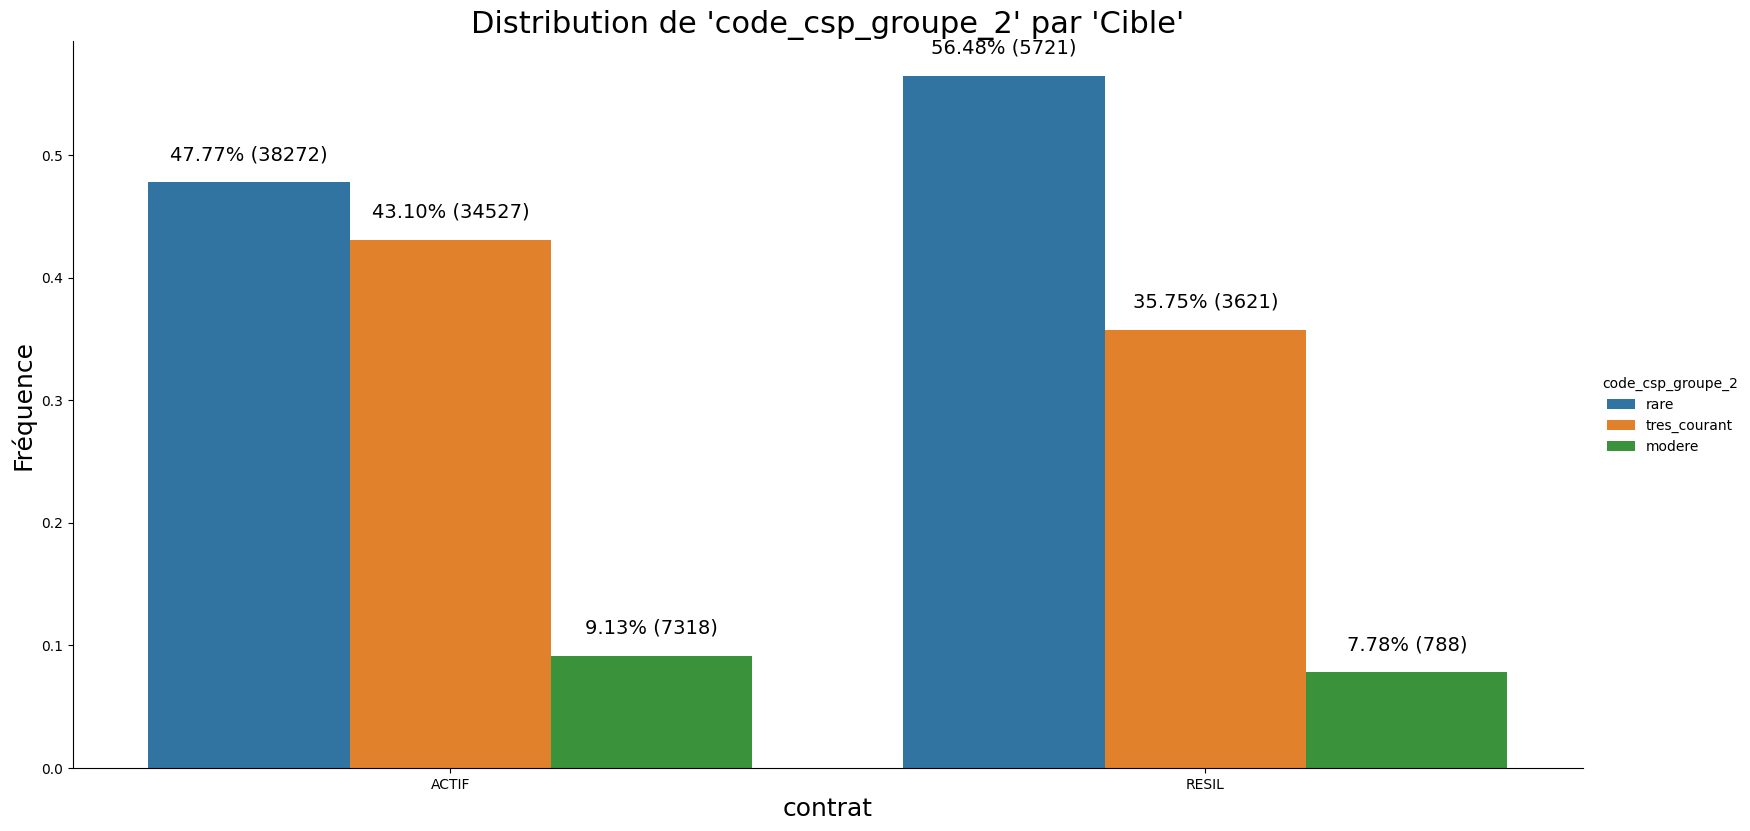

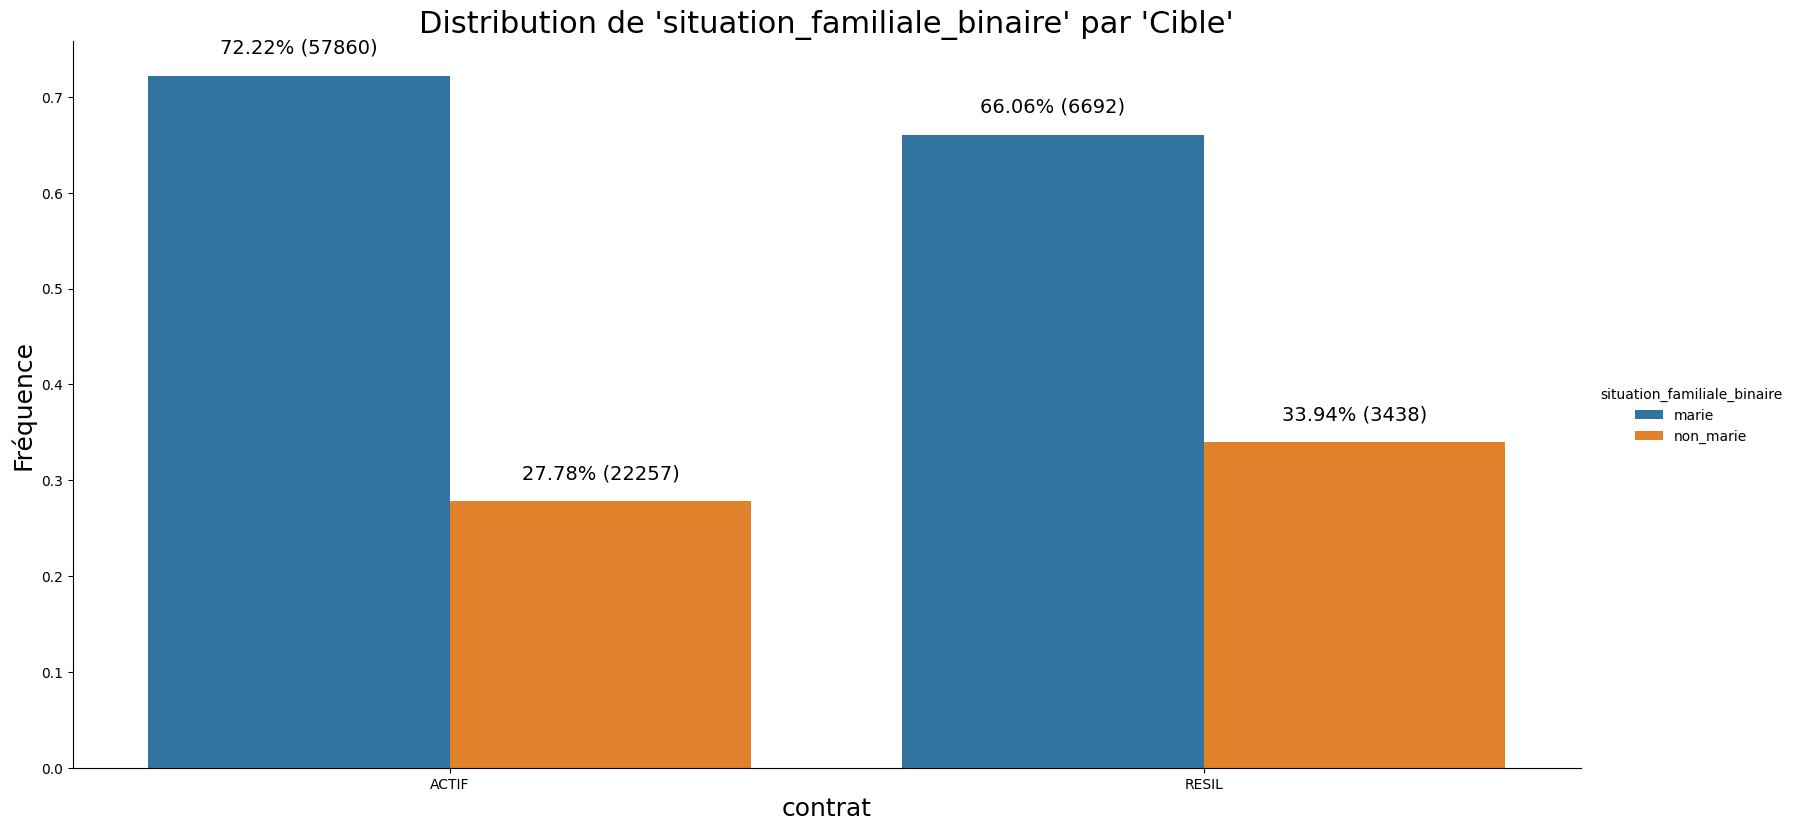

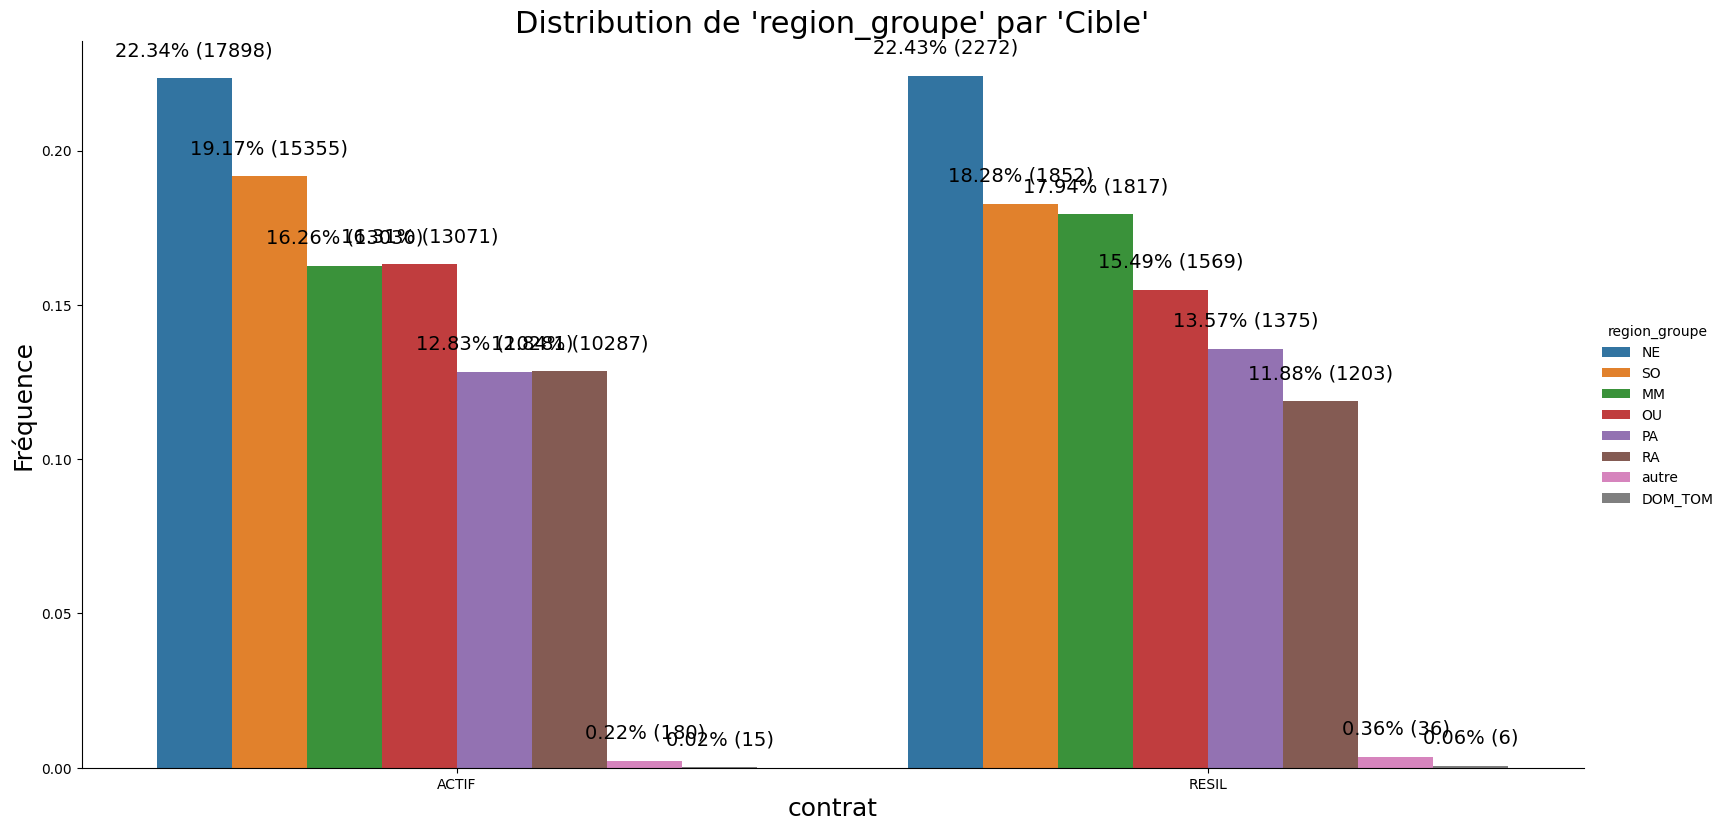

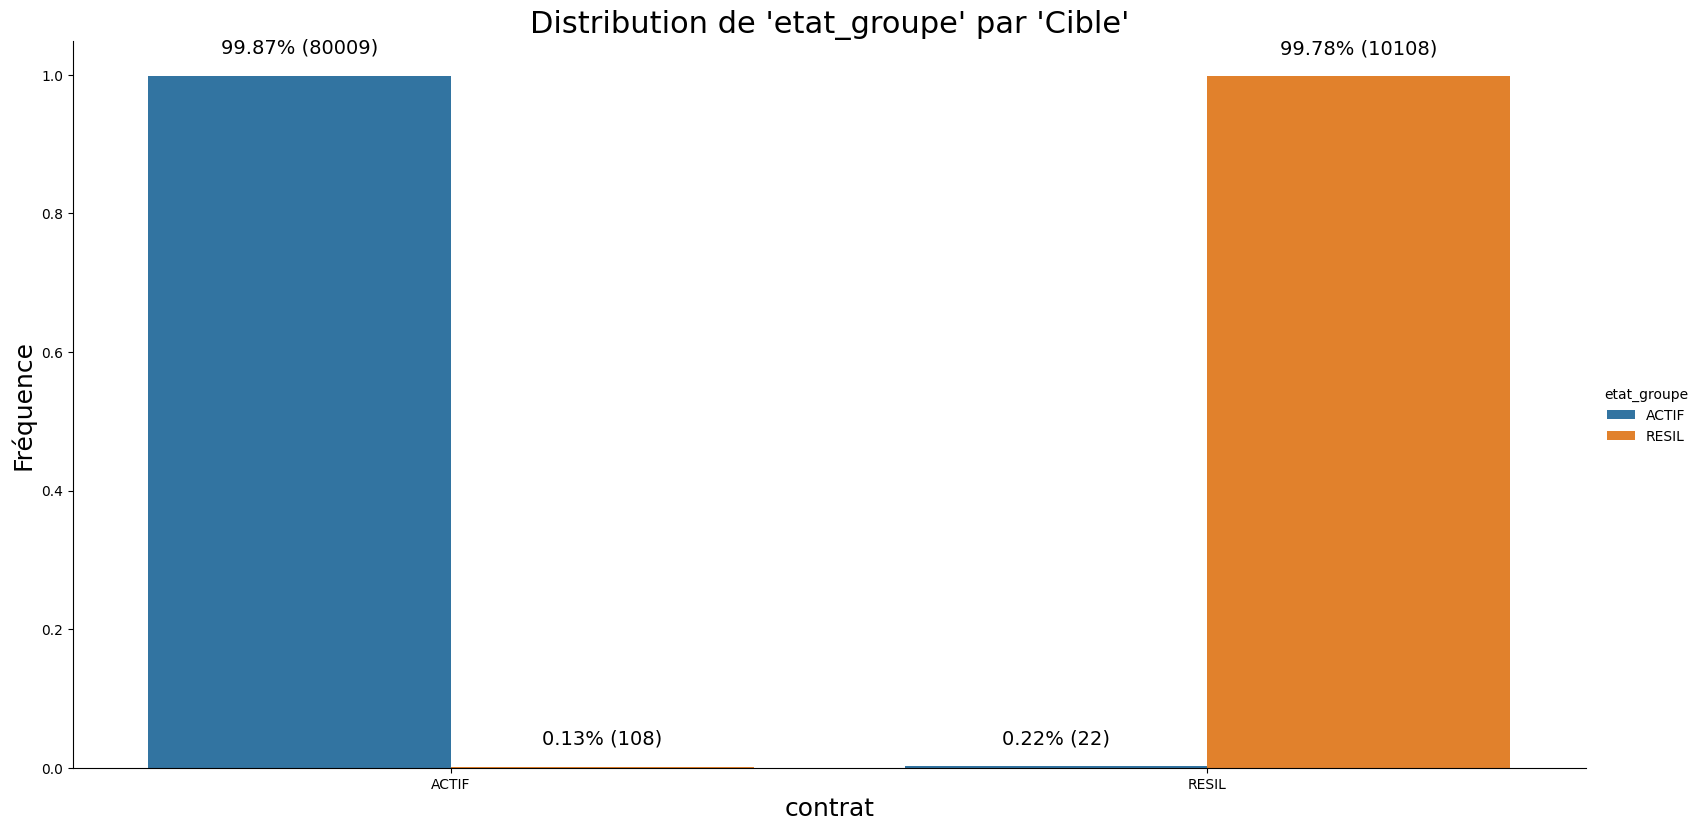

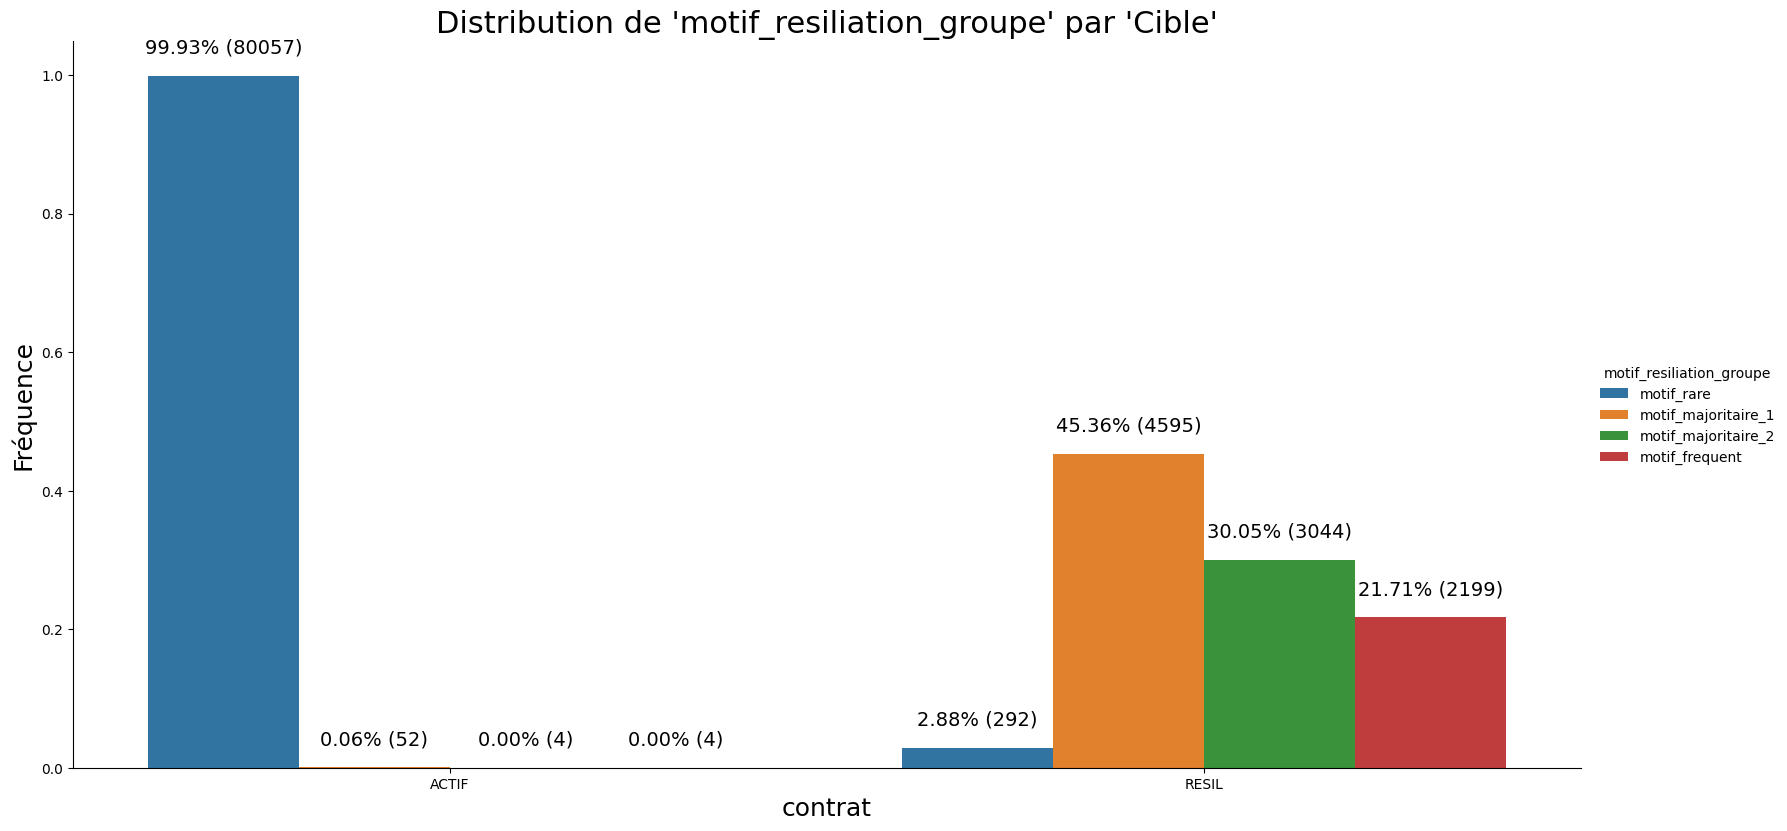

In [121]:
for col in var_cat_graph_2:
    distrib_for_cat_by_target(col,df,"contrat")

✏️ **Interpretation :**

Variables qui ne semblent pas significatives pour le modèle : 
- Modele du Véhicule : qu'elle soit recodé ou non il ne semble pas avoir de comportements differents.
- Code agent
- Code_produit_gestion_groupe (tres déséquilibrée)
- Marque du véhicule : qu'elle soit recodé ou non il ne semble pas avoir de comportements 
- Code csp group1
- La variables etat semble donner la meme information que la variables cible
- sexe 
- age_avant_mise_circulation (tres deséquilibrée)
- etat_groupe : comme vu precedemment semble donner une information quasiment identique a notre variable cible

Variables qui semblent pertinentes pour la variable cible :
- Code_formule_groupe : la modalité T semble plus prsente pour les contrats actifs, contrairement à la modalité S qui semble plus presente chez les clients résiliés.
- Numero_tarif_groupe (variable recodée) : modalité tres courante semble plus presente pour les actifs. Contrairement à la modalité moderé et rare qui semble plus presente pour les personne actives.\
- Code csp groupe : modalité rare semble plus presente chez les clients resiliés. Contrairement aux modalités plsu courantes plus presente chez les personne active. Néanmoins est ce que les modalités rarent indiquent des professions moins répandues ?
- Situation familiale : les personne mariées semblent moins aptes a resilier que les personne non marié. 
- Motif_resiliation_groupe : les motif rare semblent moins propices à résilier. Tant dis que les motif majoritaire 1, 2 et fréquent semblent plus aptes à résilier
**Il faudrait essayer de comprendre a quoi correspondent ces modalités afin de mieux pouvoir interpreter.**
- vehicule_avant_contrat : Les personne qui on eu leur véhicule après leur debut de contrat semblent susceptibles de resilier.  Tant dis que les clients qui ont eu leur voiture avant leur contrat semblent plus succeptible d'etre actif 
- prmeier_contrat : lLes clients pour lesquels il ne s'agit pas de leur premier contrat sont plus present chez les actifs, les clients pour lesquels il s'agit de leur premier contrat semblent plus present chez les résiliés
- Code formule groupe : les formule T semblent plus presentent chez les client actif, tant dis que les formules C et S semblent plus presentent chez les résiliés
- Numero_tarif_groupe : le tarif tres courant BL050 semble plus present chez les client en cours que les clients résiliés, tant dis que le tarif tres modéremment repandus semblent plus present chez les résilié
- Code_csp_groupe_2 : les catégories socioprofessionnelles les plus rare en frequance d'apparition semblent plus prsent chez les personnes résiliées que non résiliées. Tant dis que les catégories socioprofessionnelles tres courant semblent moins presnete chez le resilié que les non résilié

Variables où on sait pas  si elles sont réellement pertinentes:
- Region
- permis_avant_contrat (désequilibrée)
- Code_marche : P (particulier) et T (entreprise)

⚠️ Les variables client_actif et contrat (cible) ont les meme peronnes actives. Cependant pour les personnes résiliés ce n'est pas le cas. Certaines personnes marquées comme résiliées dans la variable cible  sont marquée comme active dans client_actif. Comme nous n'avons aucune information sur les variable etat et client_actif dans notre dictionnaire fournie contrairemnt à la variable contrat, nous considèrerons la variable contrat comme etant notre variable cible. 


### 2.4.2 Représentations graphiques des continues et de date par rapport à la cible

In [122]:
var_num = var_date_graph + var_num_graph

In [123]:
var_num

['date_debut_contrat_converted',
 'date_dernier_mouvement_converted',
 'date_obtention_permis_converted',
 'date_mise_circulation_converted',
 'date_naissance_converted',
 'anciennete_client_converted',
 'echeance_contrat_mmjj',
 'age_au_debut',
 'age_mise_circ',
 'delai_permis_contrat',
 'age_vehicule',
 'age_optention_permis',
 'delai_dernier_mouvement',
 'nb_sinistres_2_ans_non_resp',
 'nb_sinistres_3_ans_non_resp',
 'nb_sinistres_1_an_non_resp',
 'nb_sinistres_0_an_non_resp',
 'nb_sinistres_3_ans_resp',
 'nb_sinistres_2_ans_resp',
 'nb_sinistres_1_an_resp',
 'nb_sinistres_0_an_resp',
 'niveau_bonus_malus',
 'prime_reference',
 'nb_contrats_resilies',
 'nb_contrats_actifs',
 'nb_contrats_actifs_auto',
 'nb_contrats_actifs_habitation',
 'nb_contrats_actifs_divers',
 'nb_contrats_actifs_sante',
 'nb_contrats_actifs_vie',
 'nb_contrats_auto_resilies',
 'nb_contrats_habitation_resilies',
 'nb_contrats_sante_resilies',
 'nb_contrats_vie_resilies',
 'nb_contrats_divers_resilies',
 'score_

In [124]:
# # Pour eviter les erreurs sur la donction echeance_contrat_mmjj nous avons remis une années arbitraire
# df["echeance_condtrat_mmjj"] = pd.to_datetime("1960" + df["echeance_contrat_mmjj"], format="%Y%m%d", errors="coerce")


In [125]:
# on a une erreur avec la variable echeance_contrat_mmjj 
var_num.remove('echeance_contrat_mmjj')

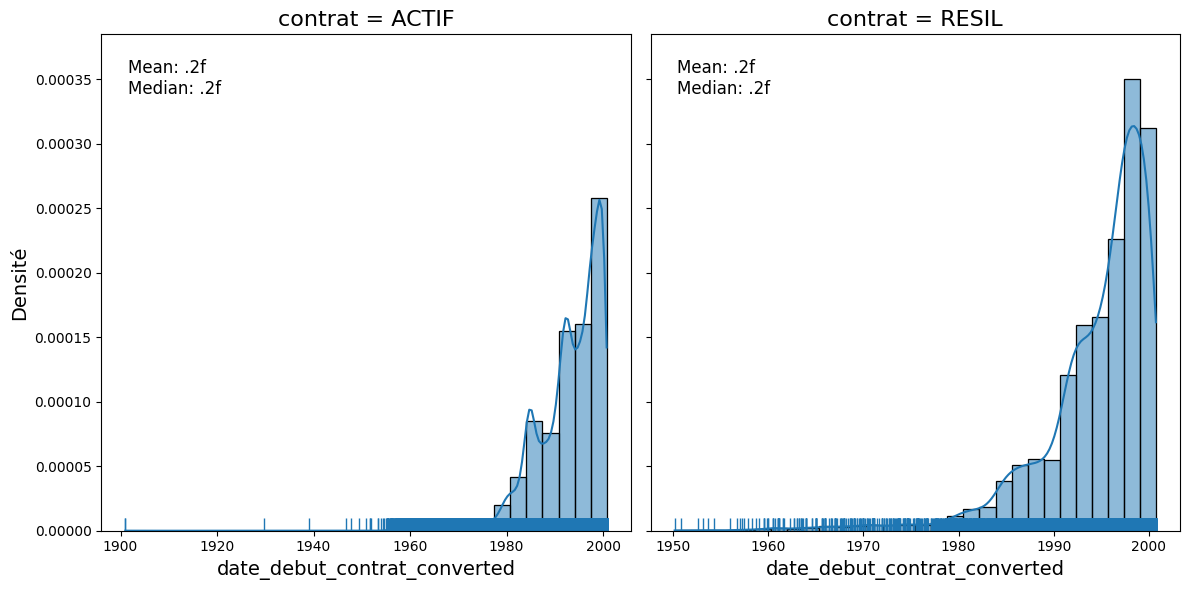

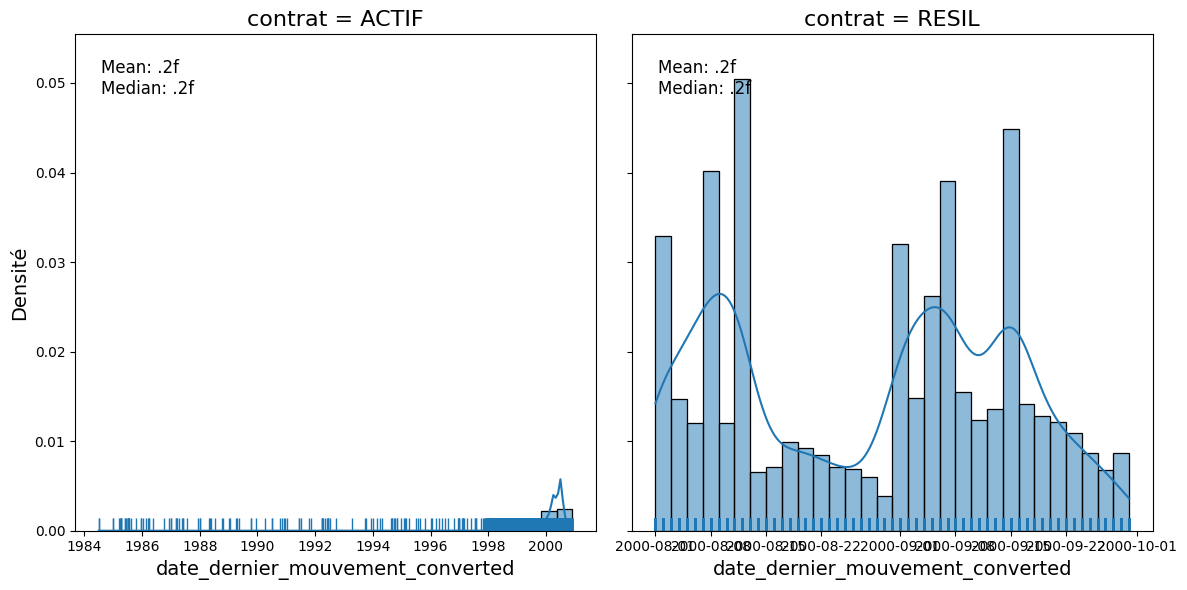

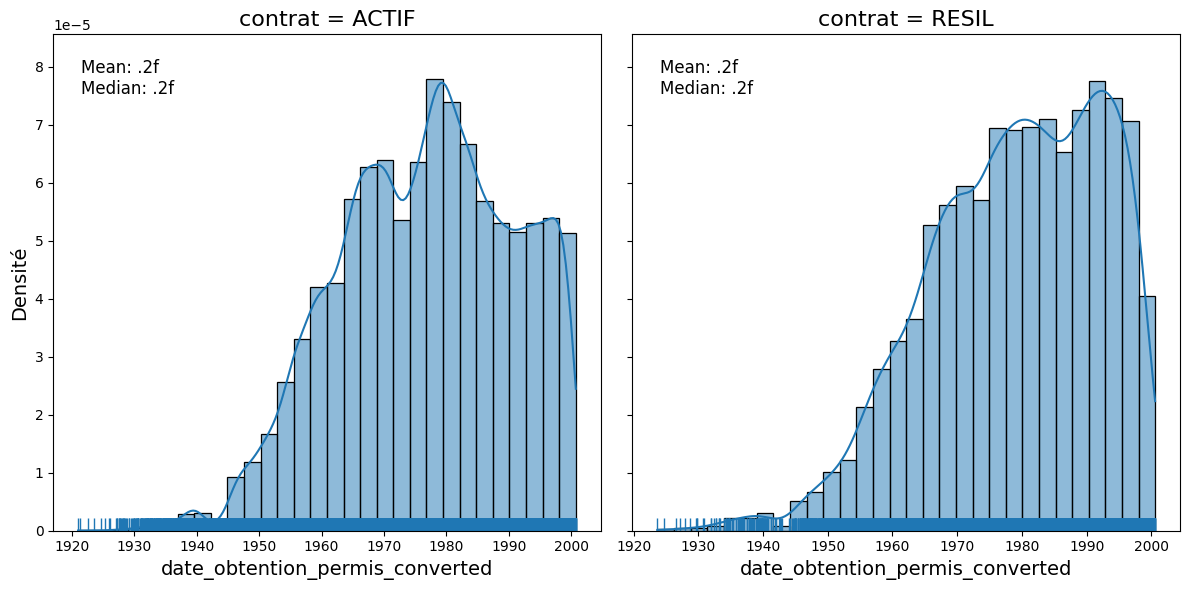

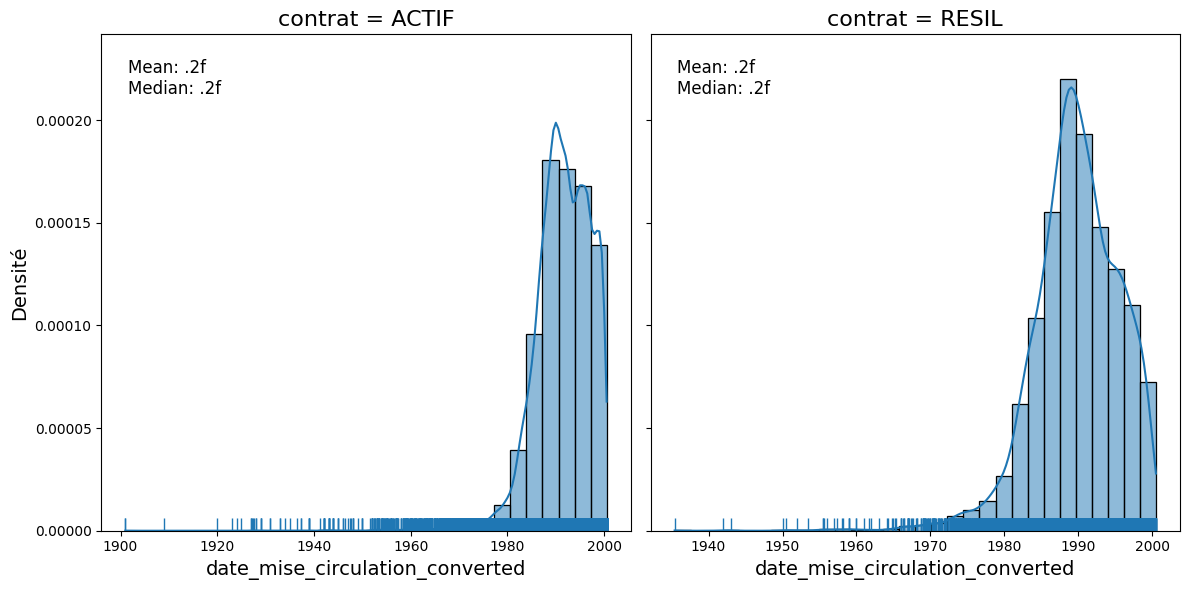

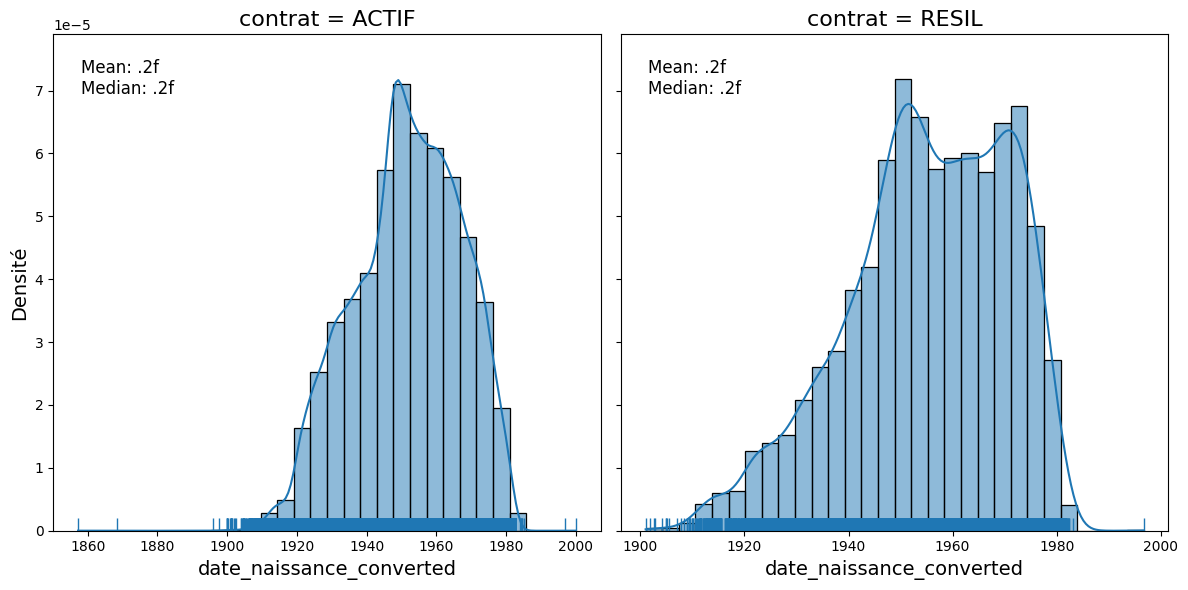

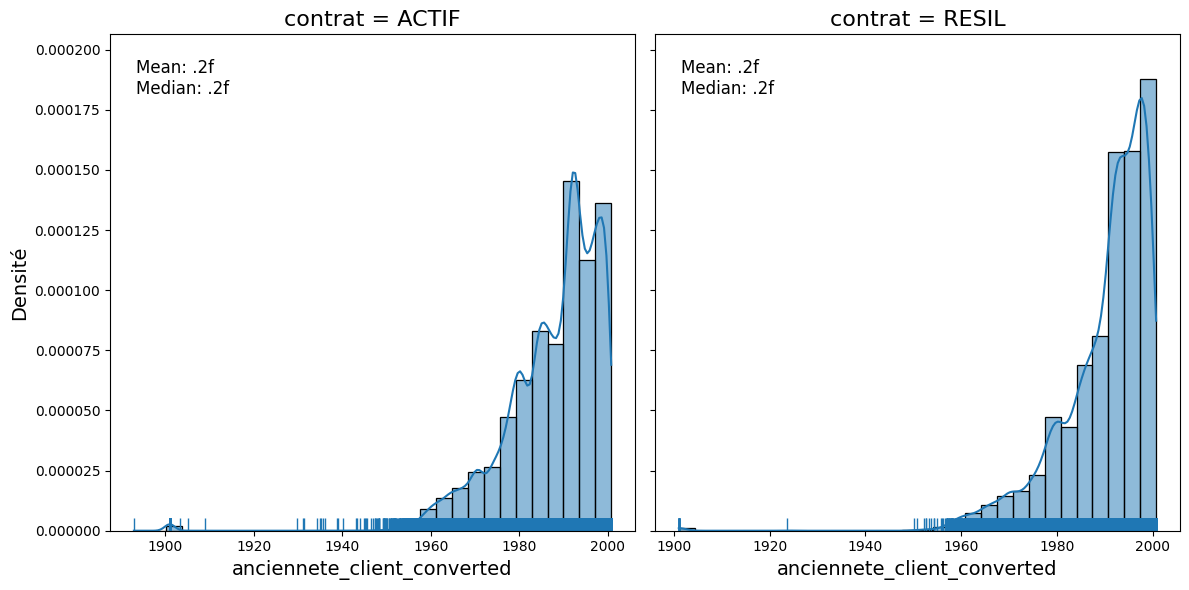

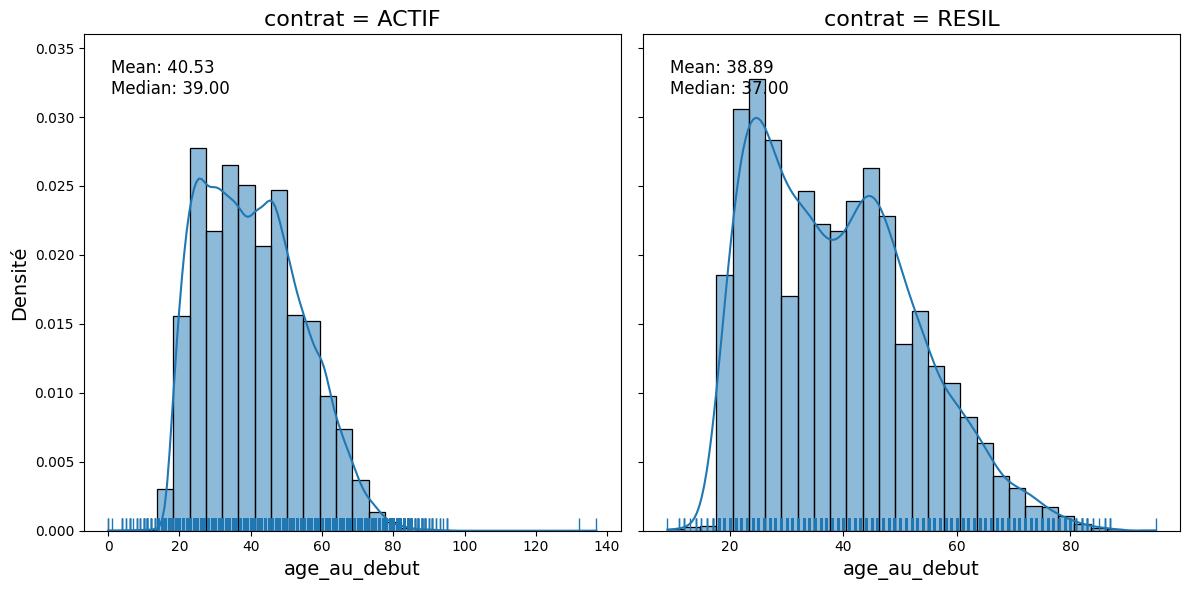

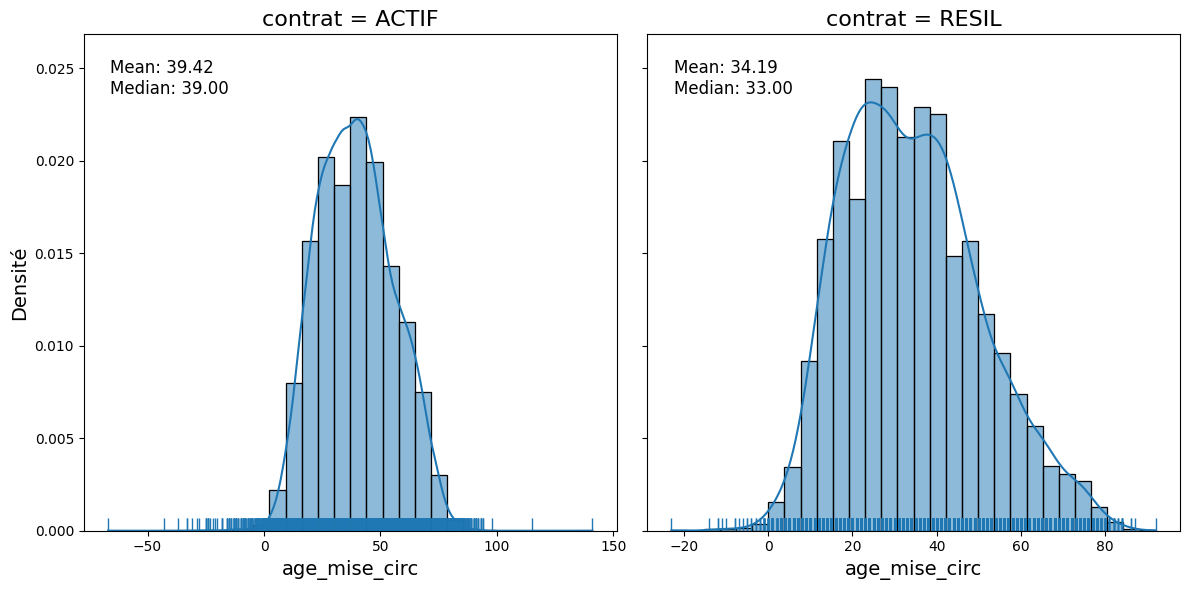

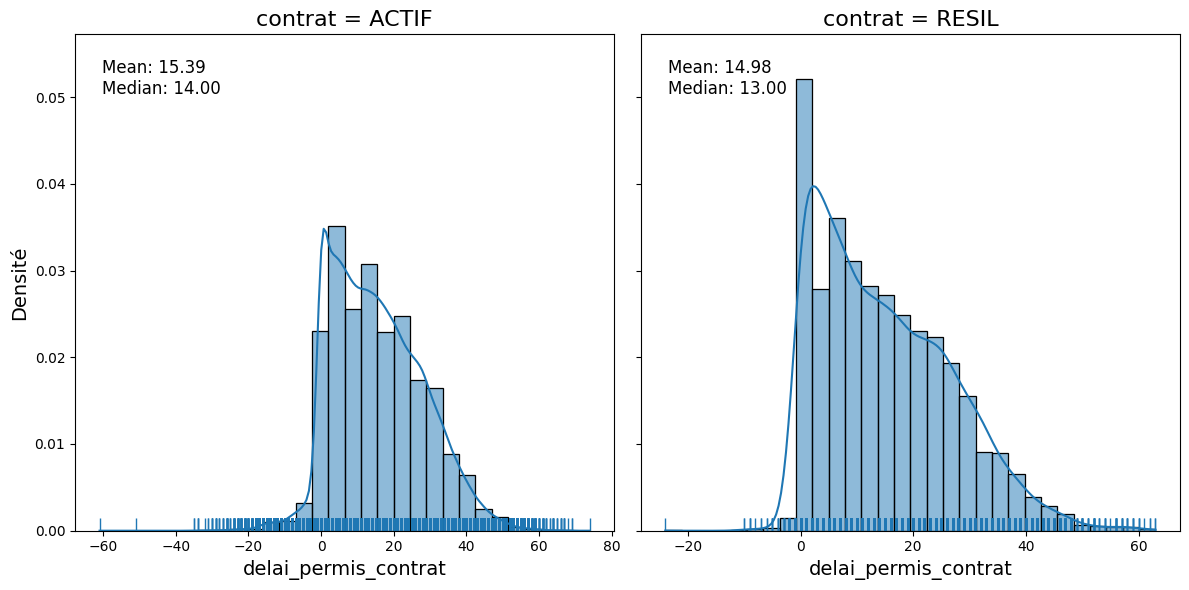

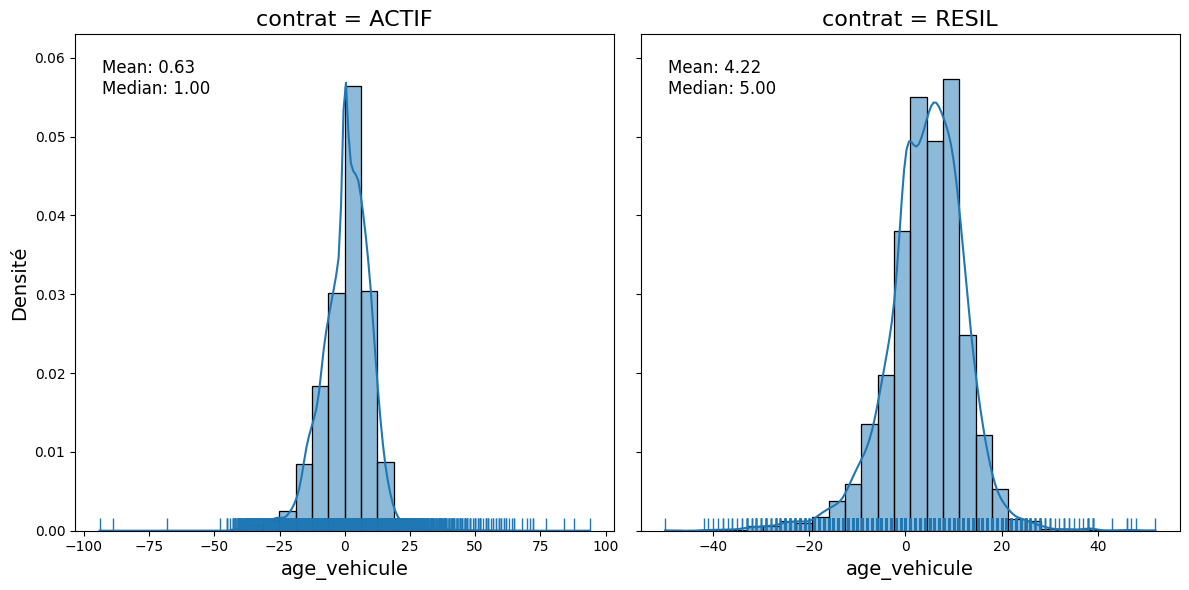

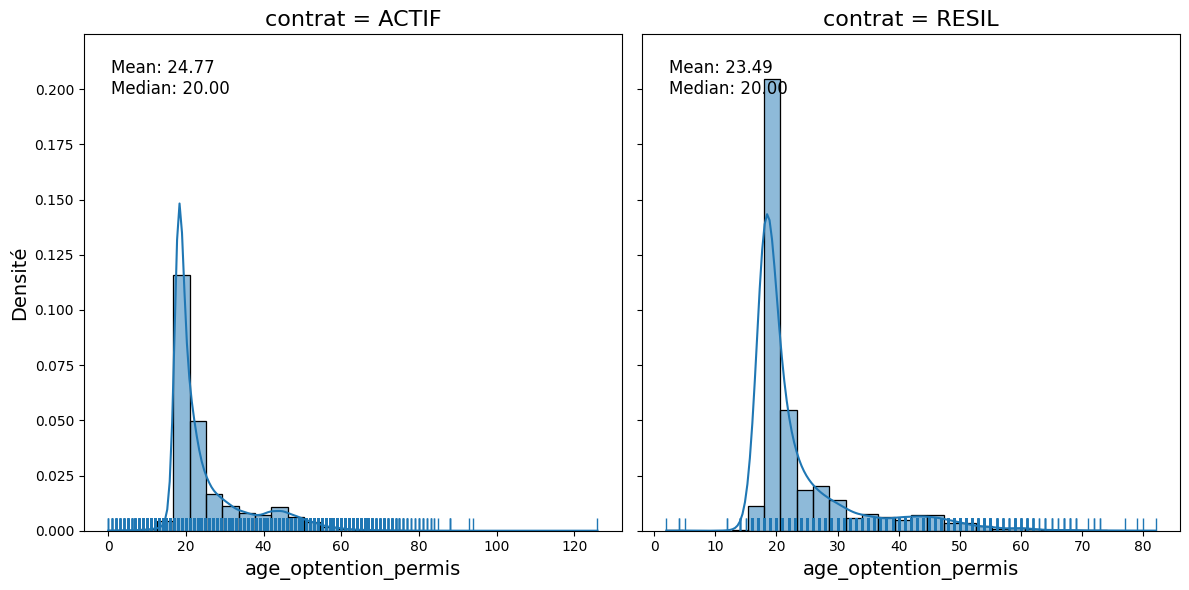

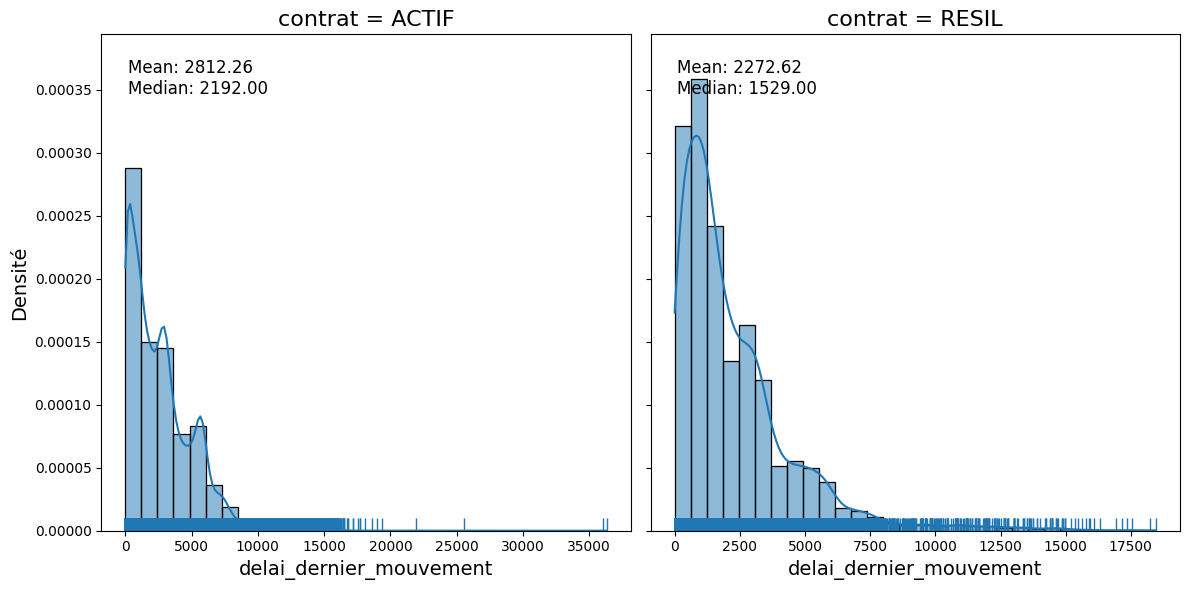

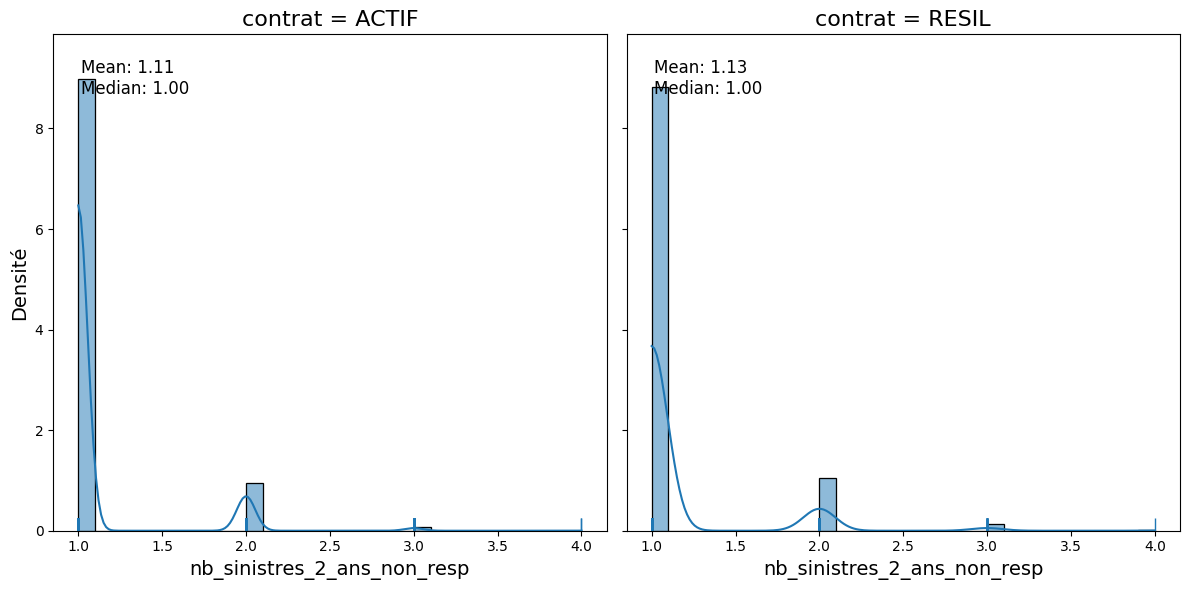

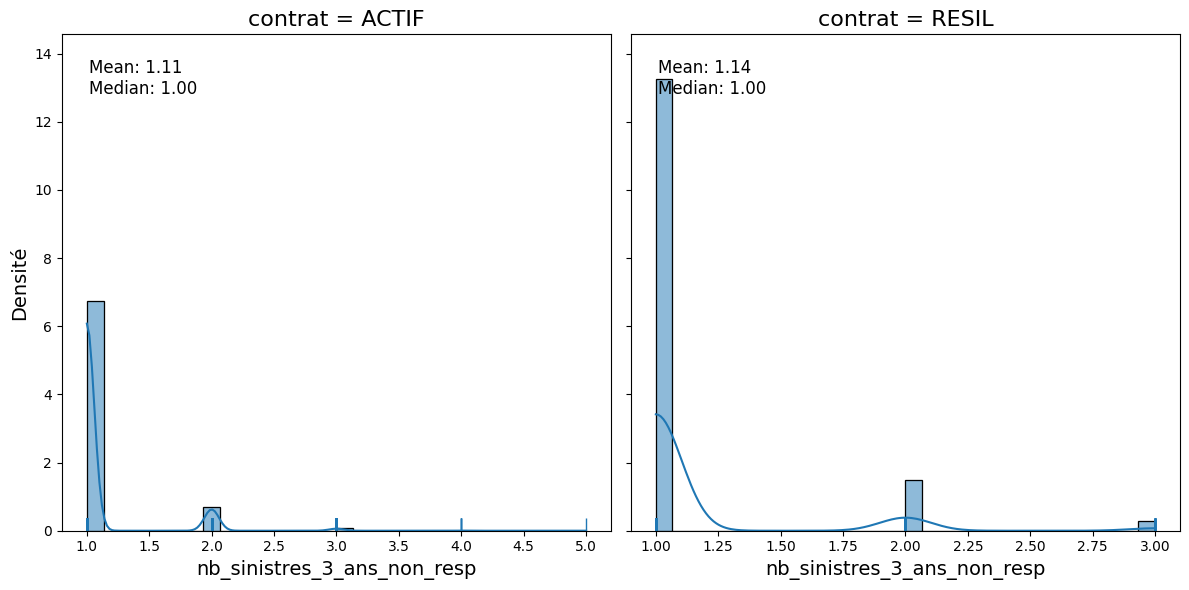

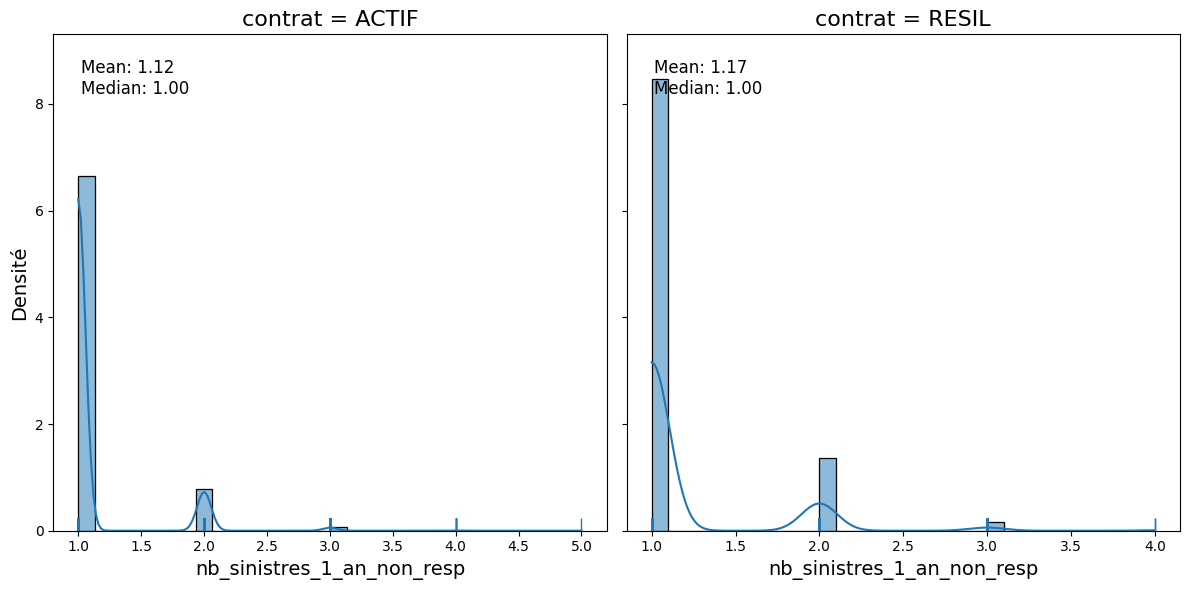

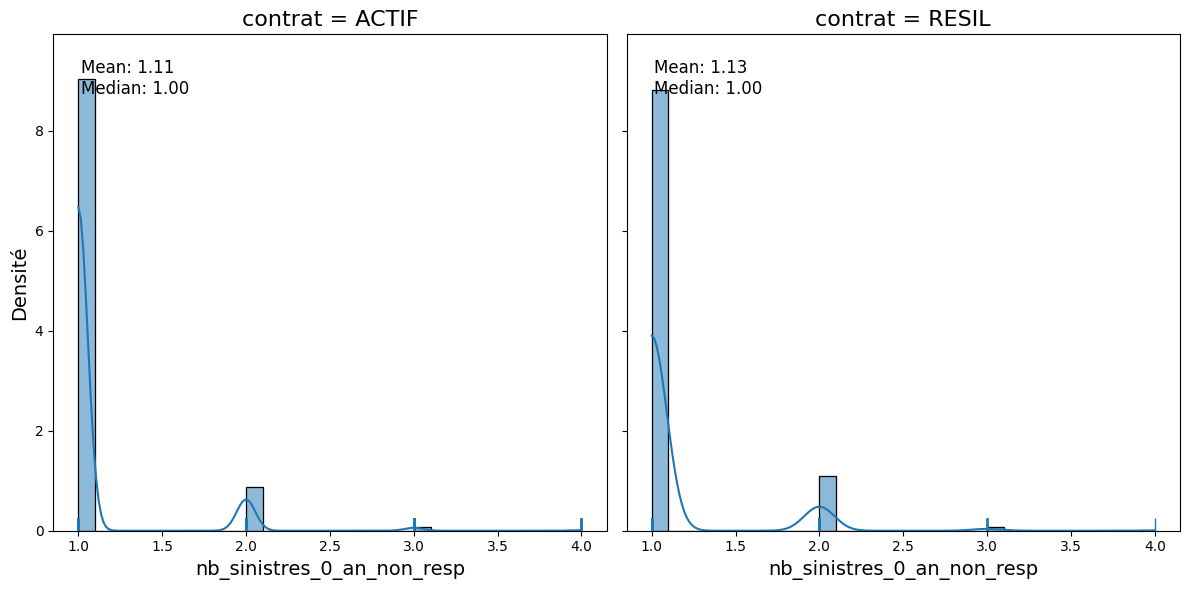

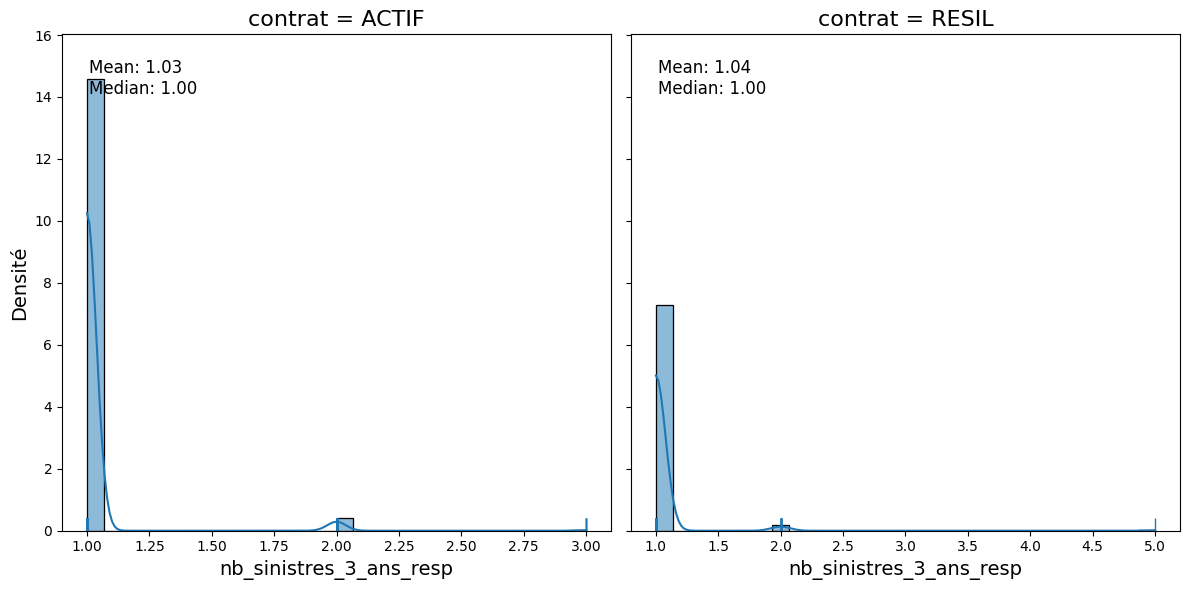

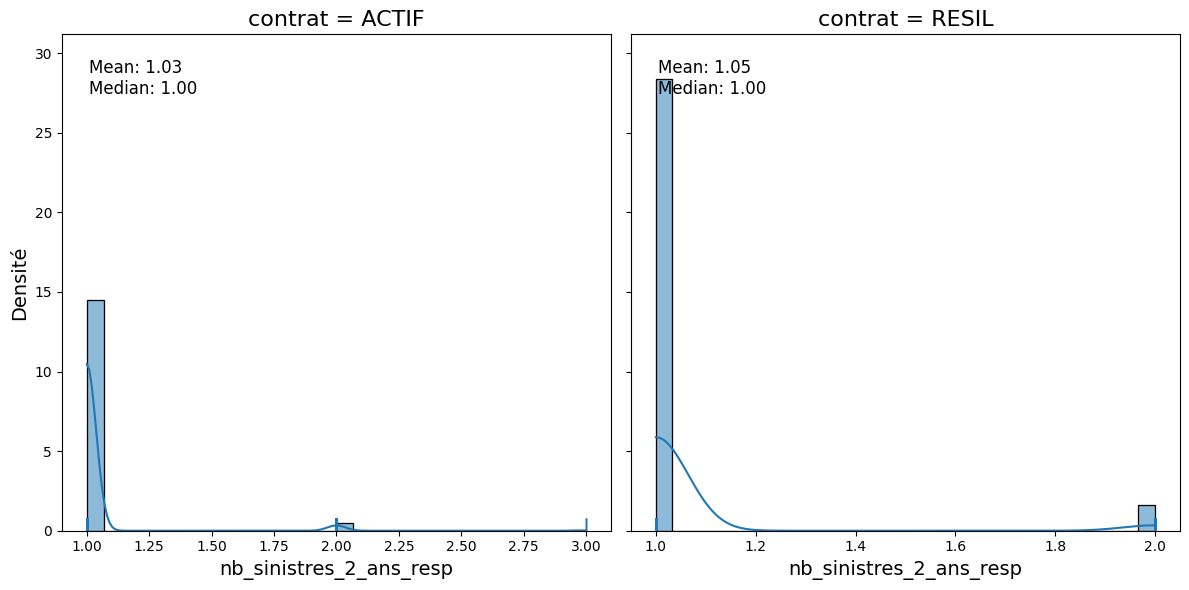

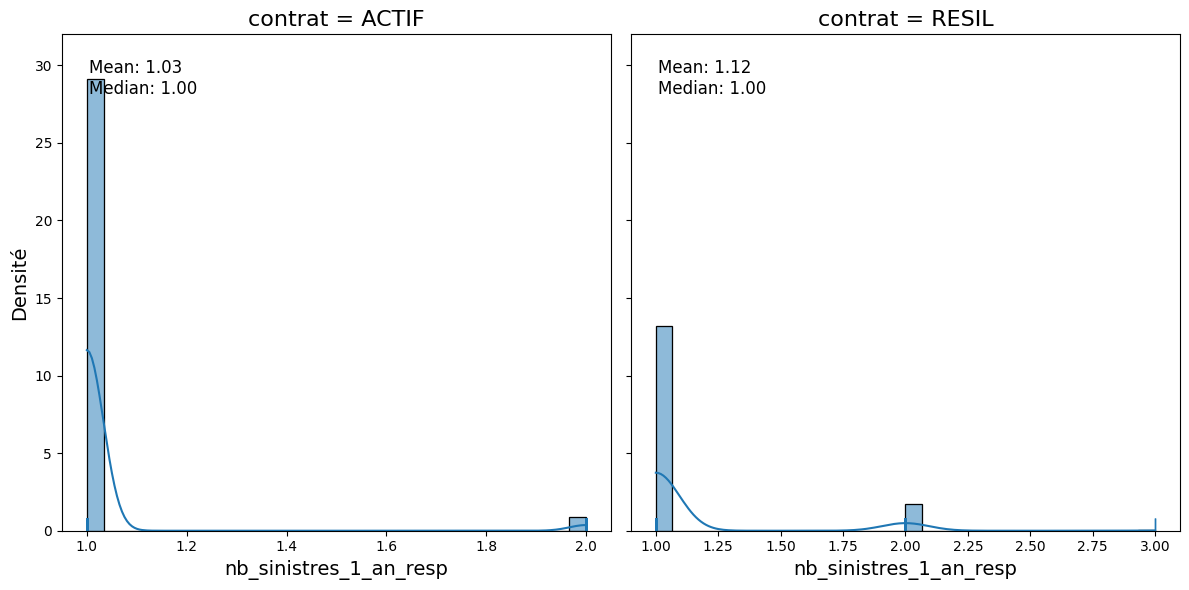

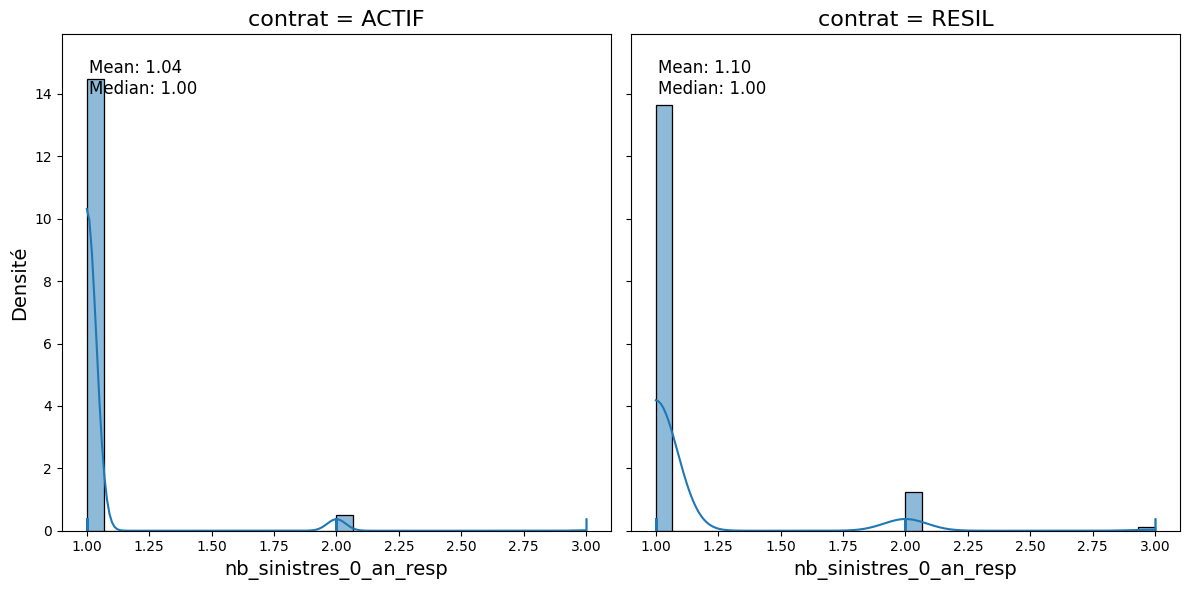

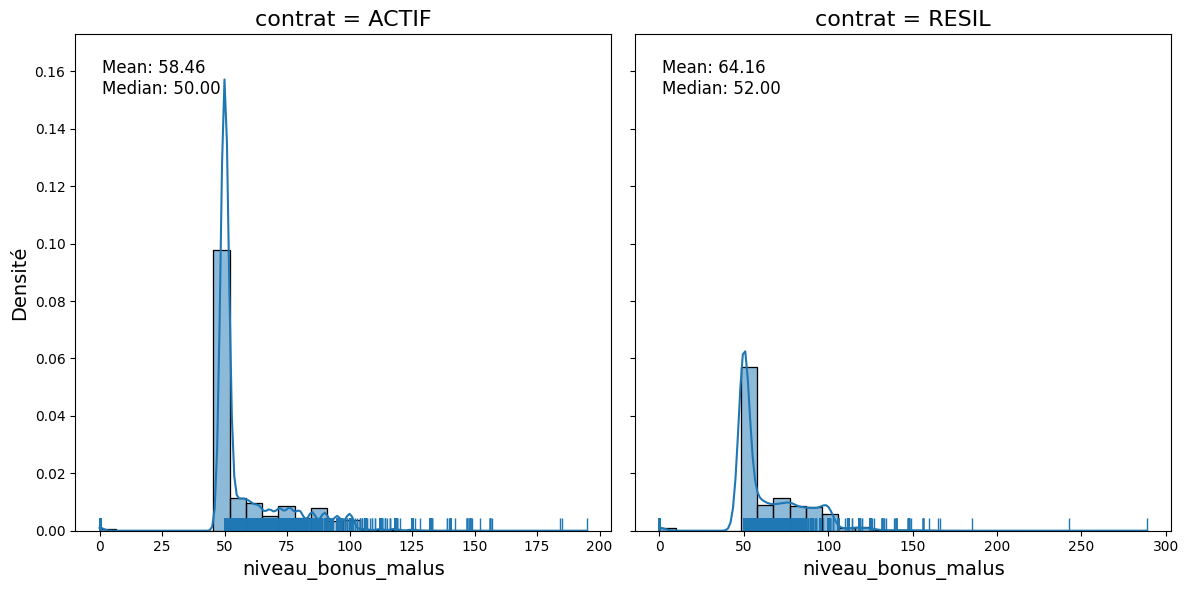

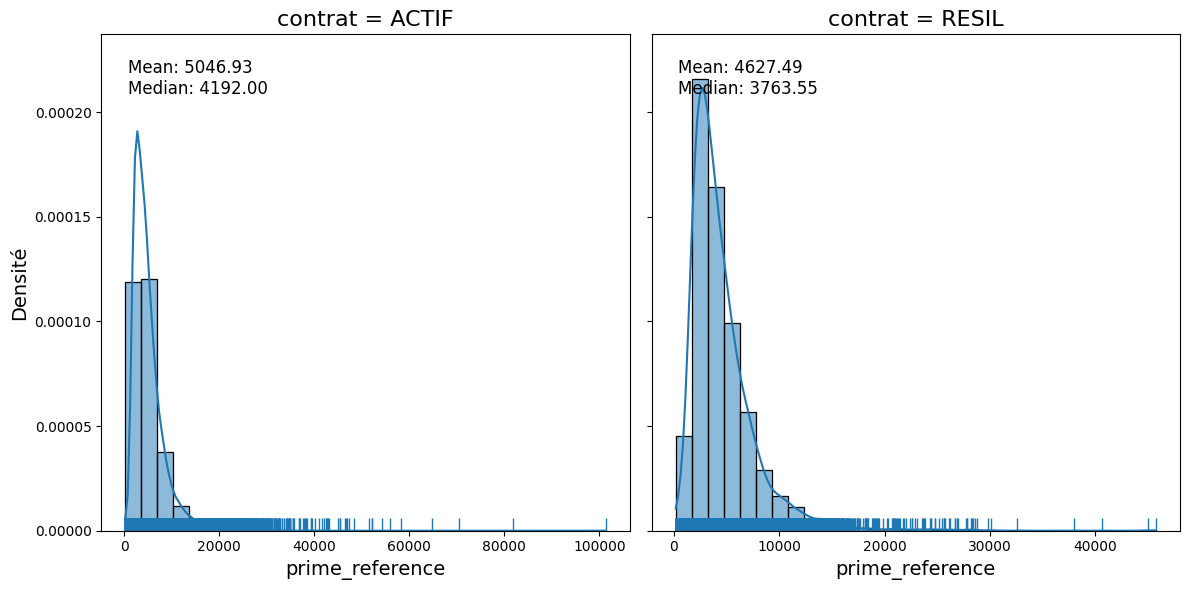

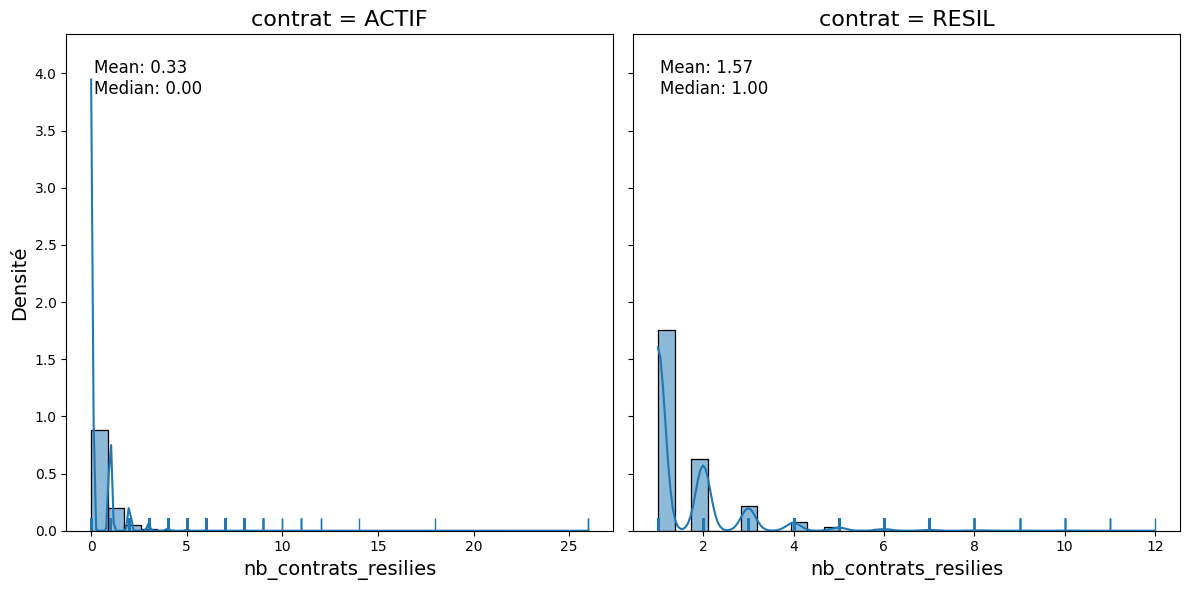

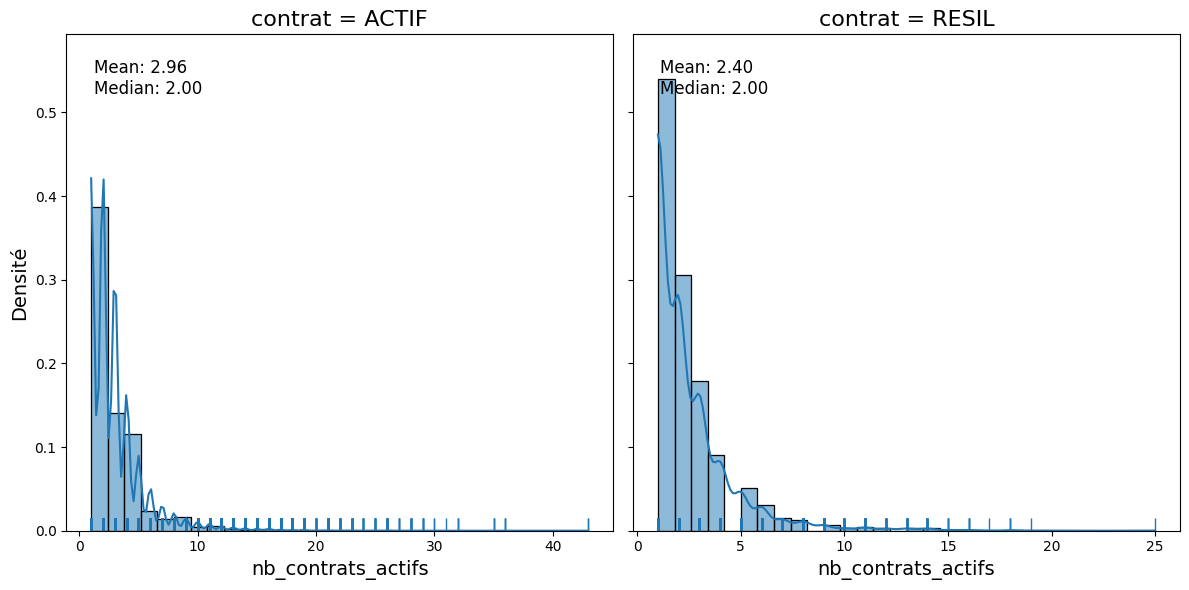

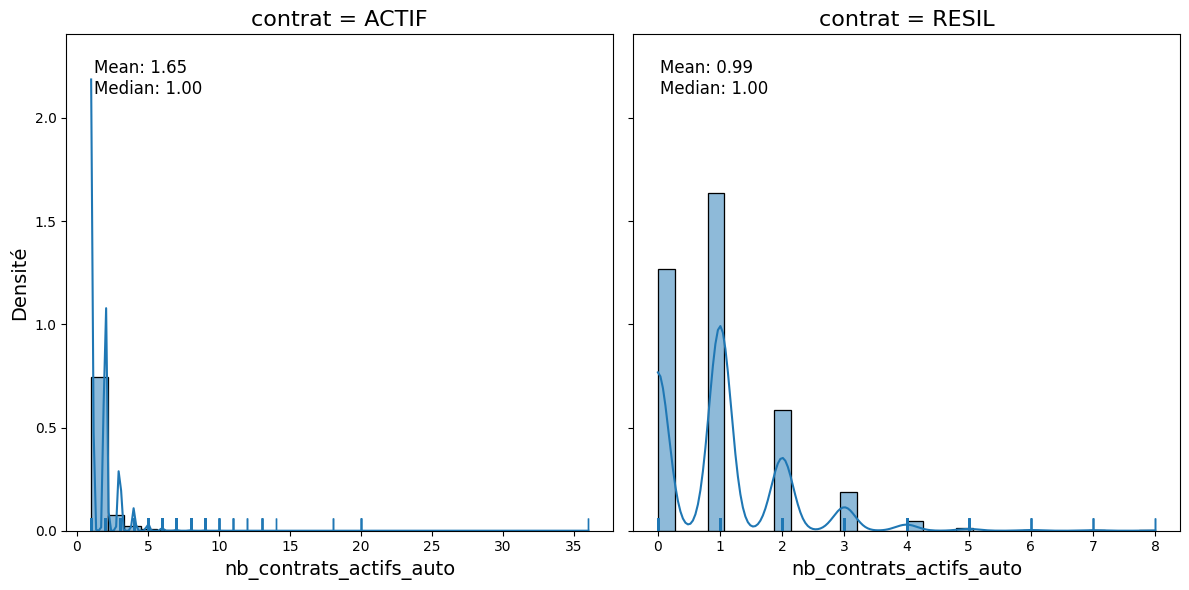

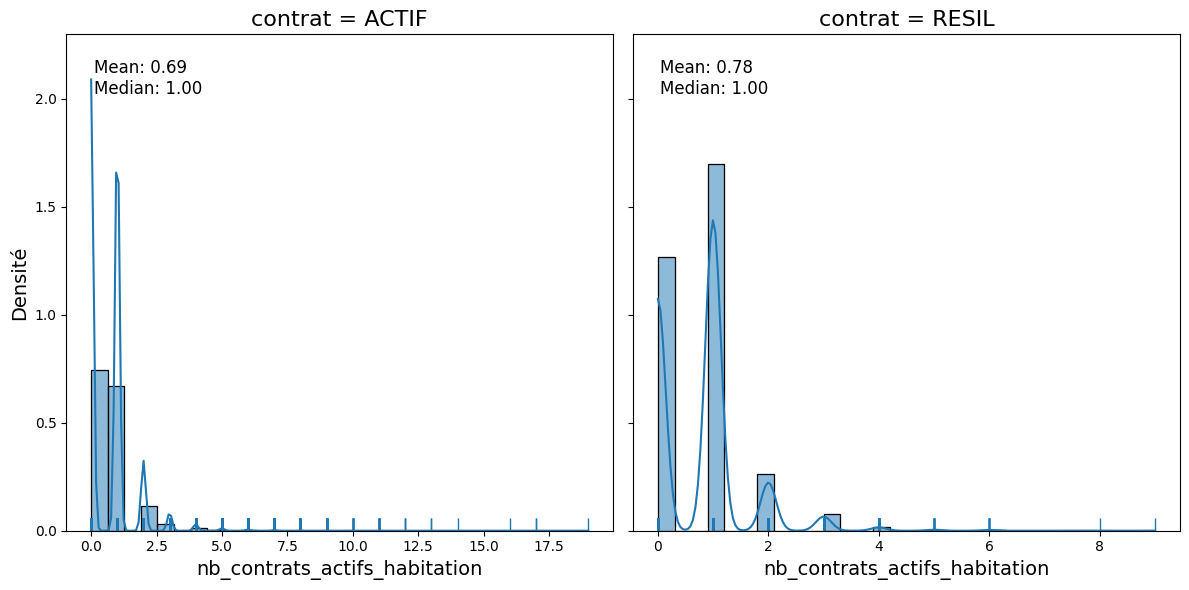

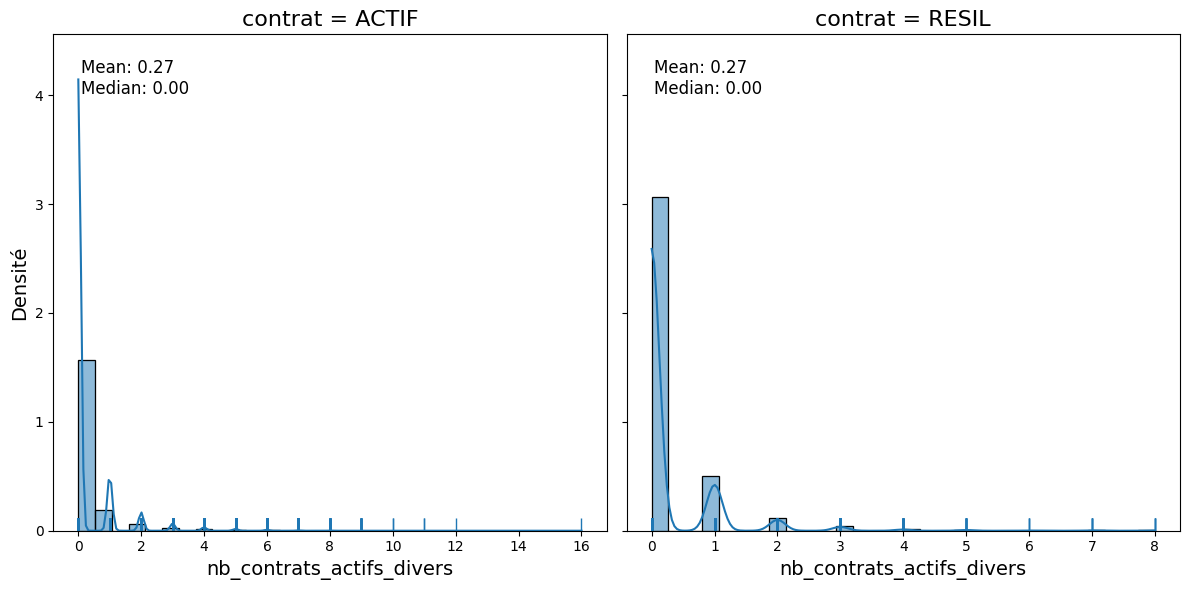

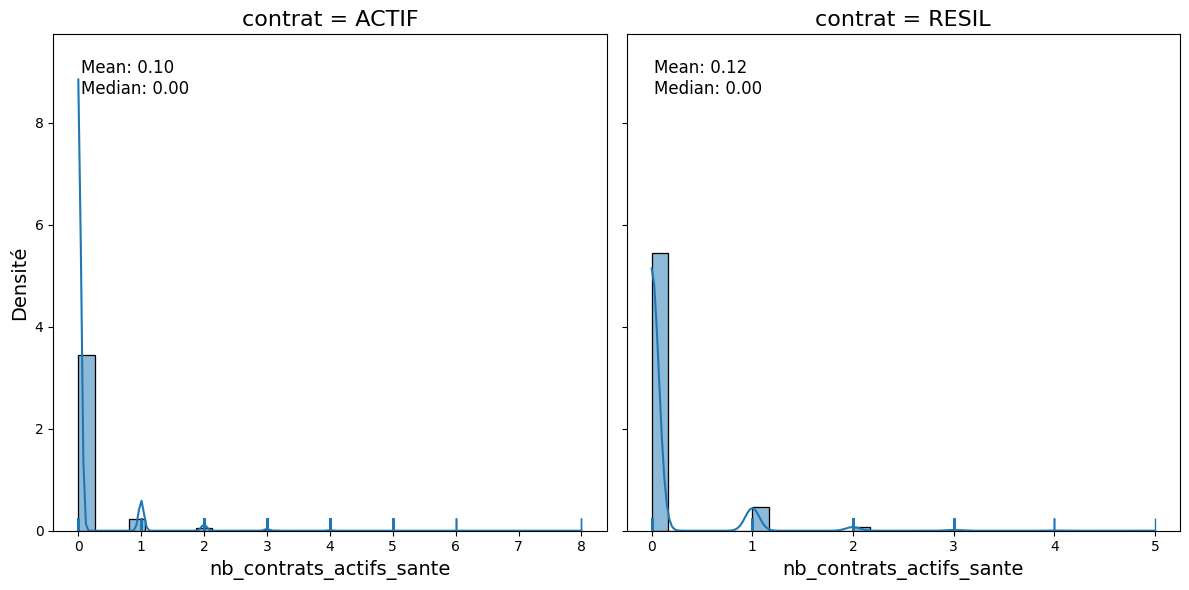

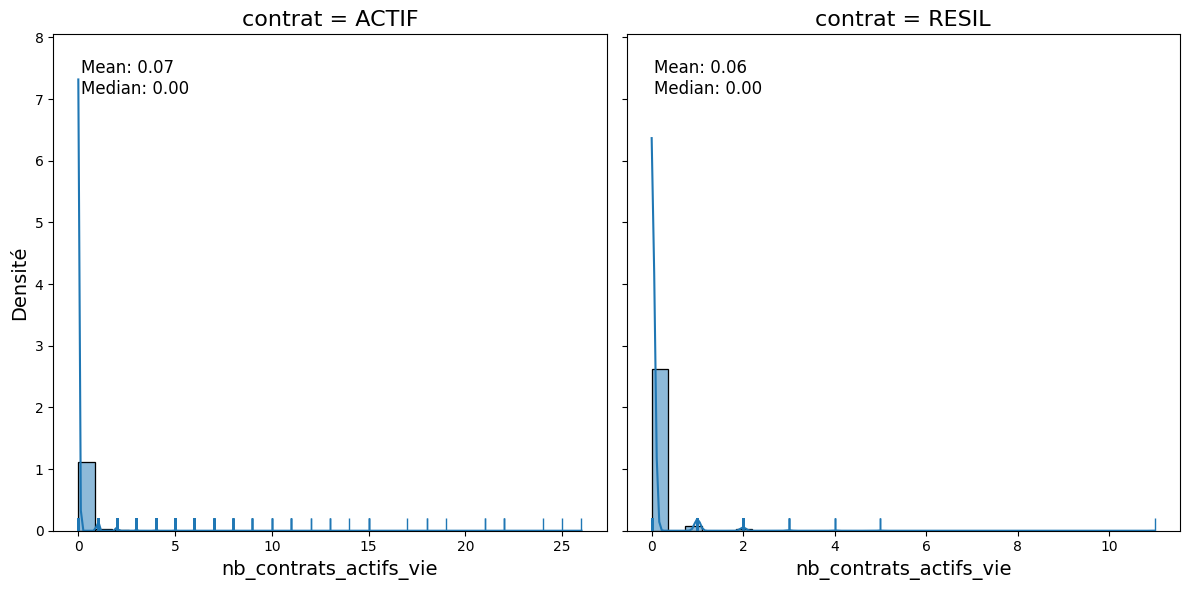

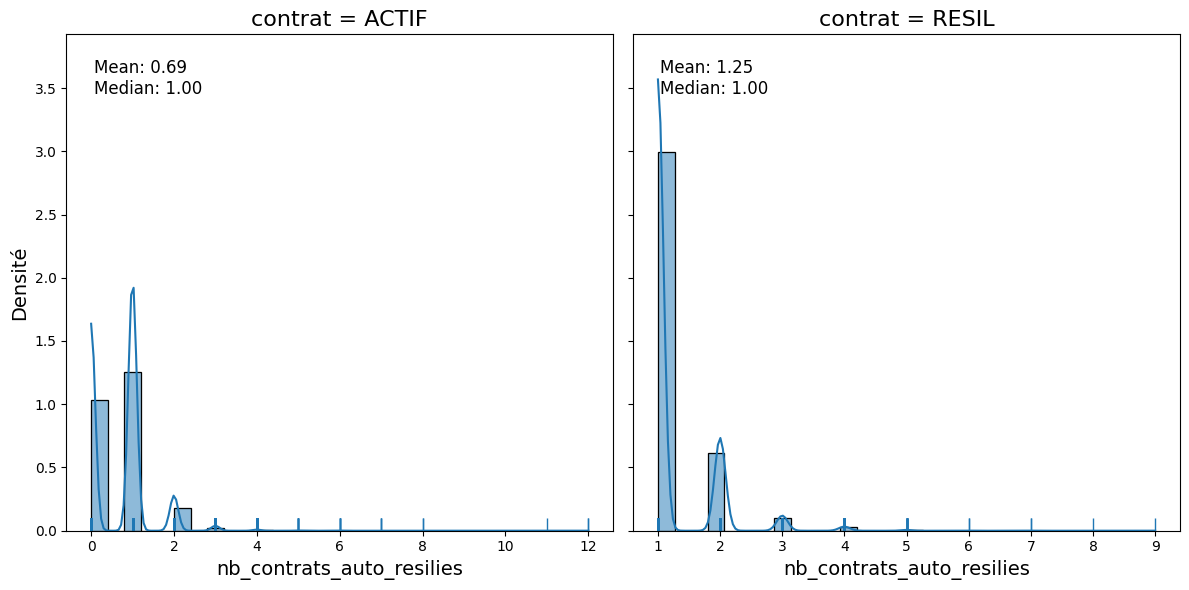

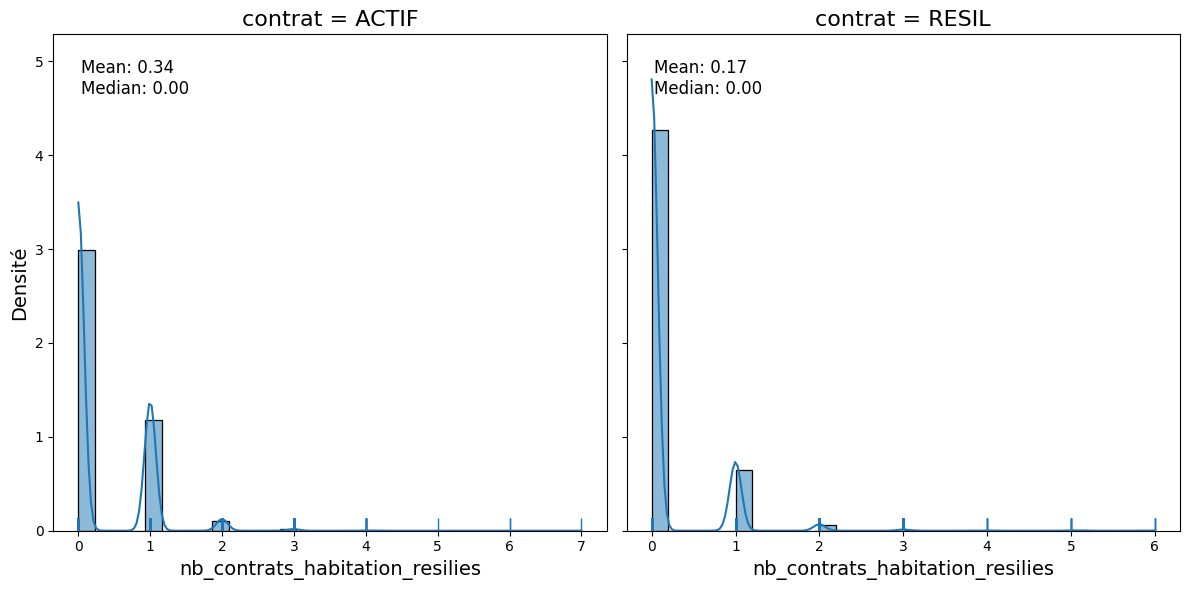

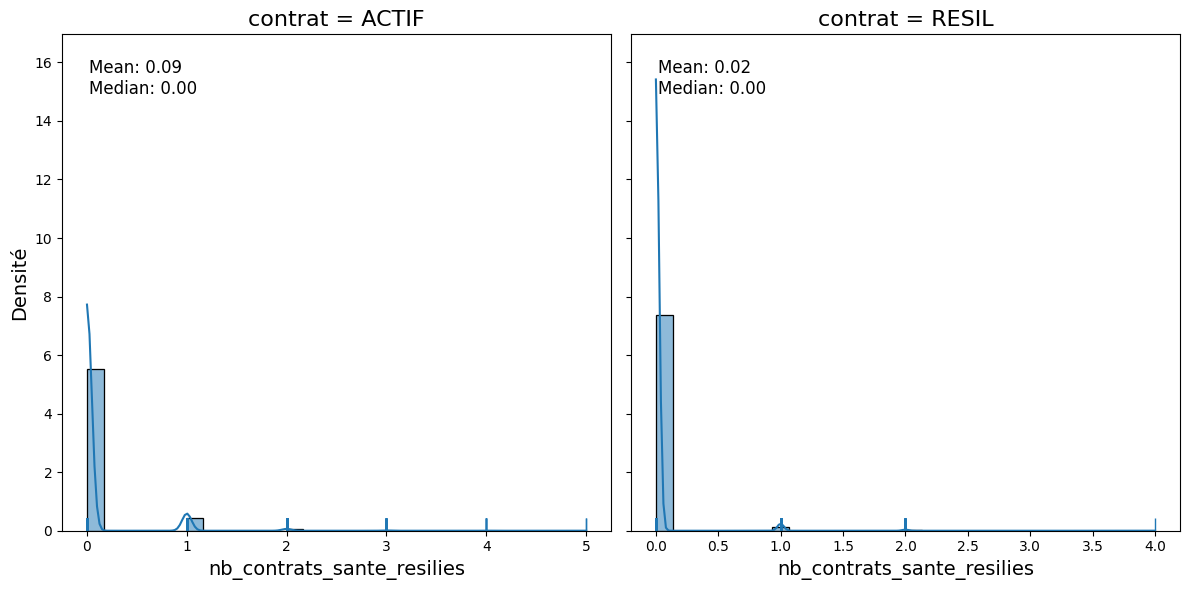

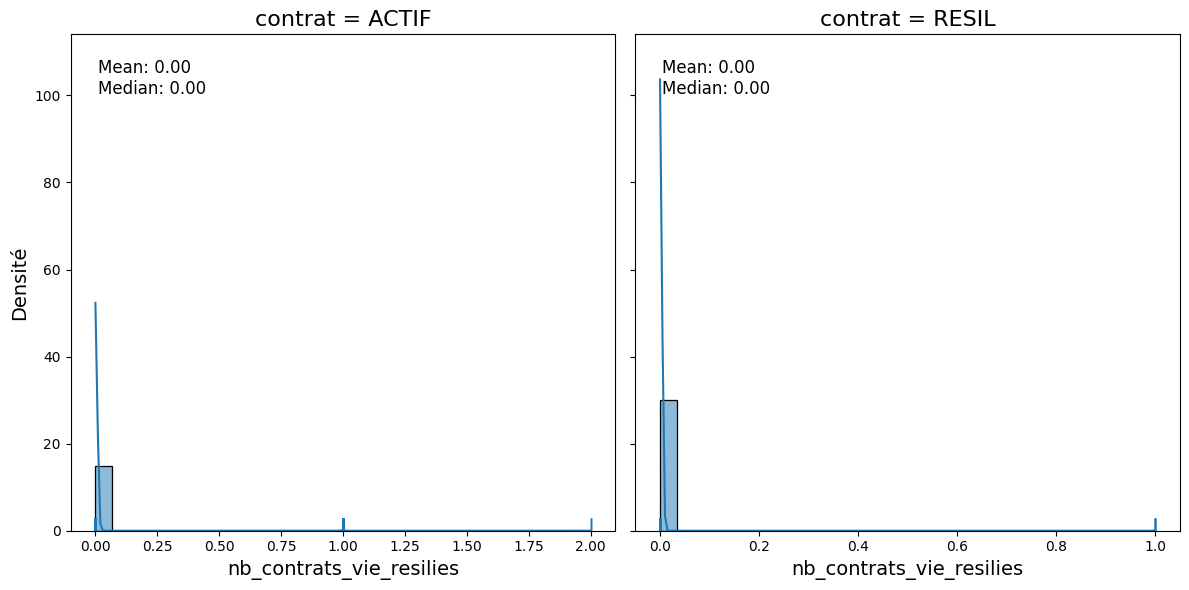

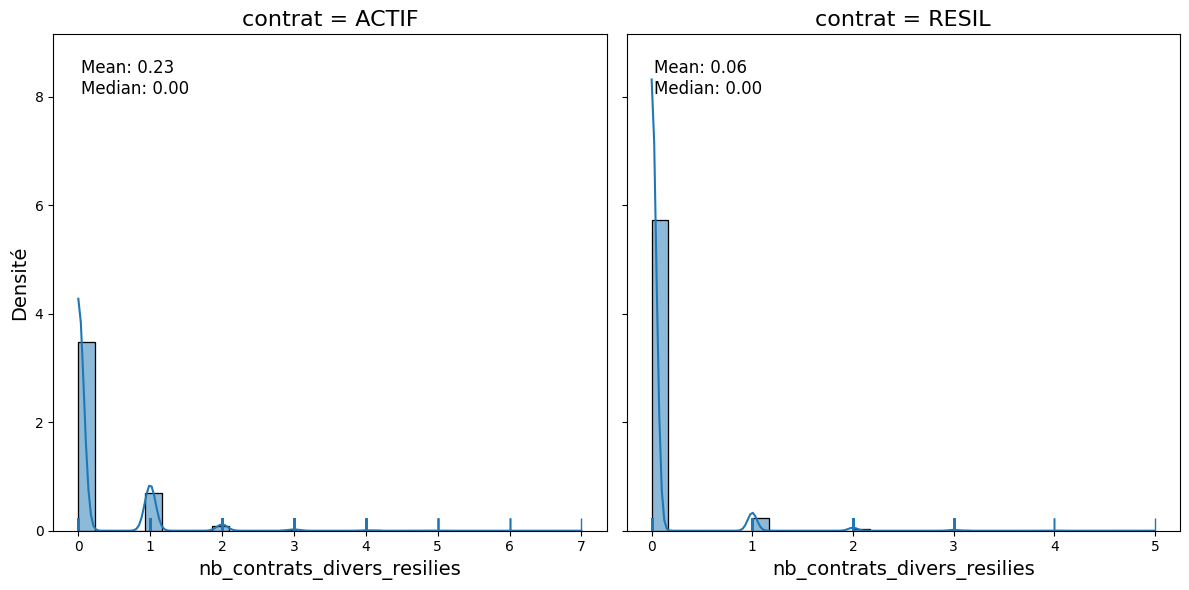

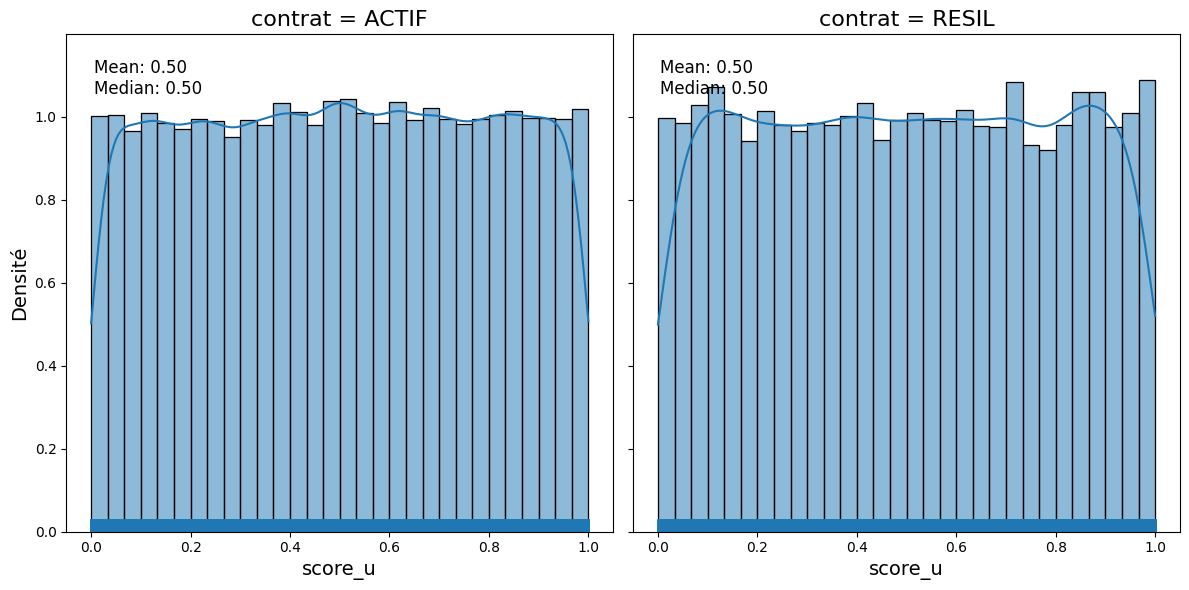

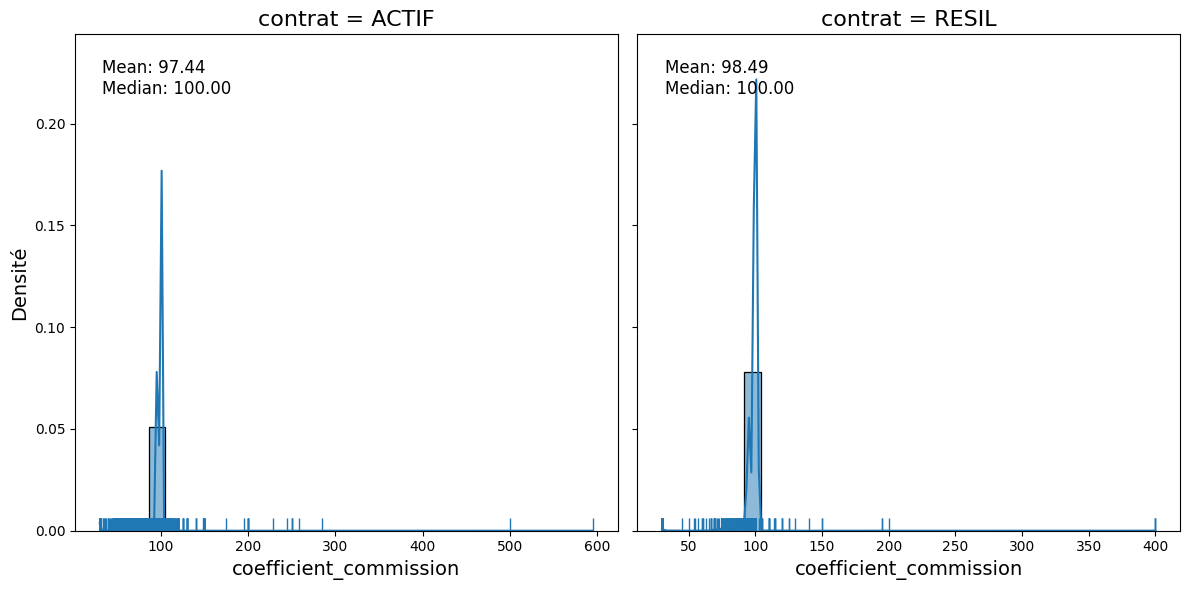

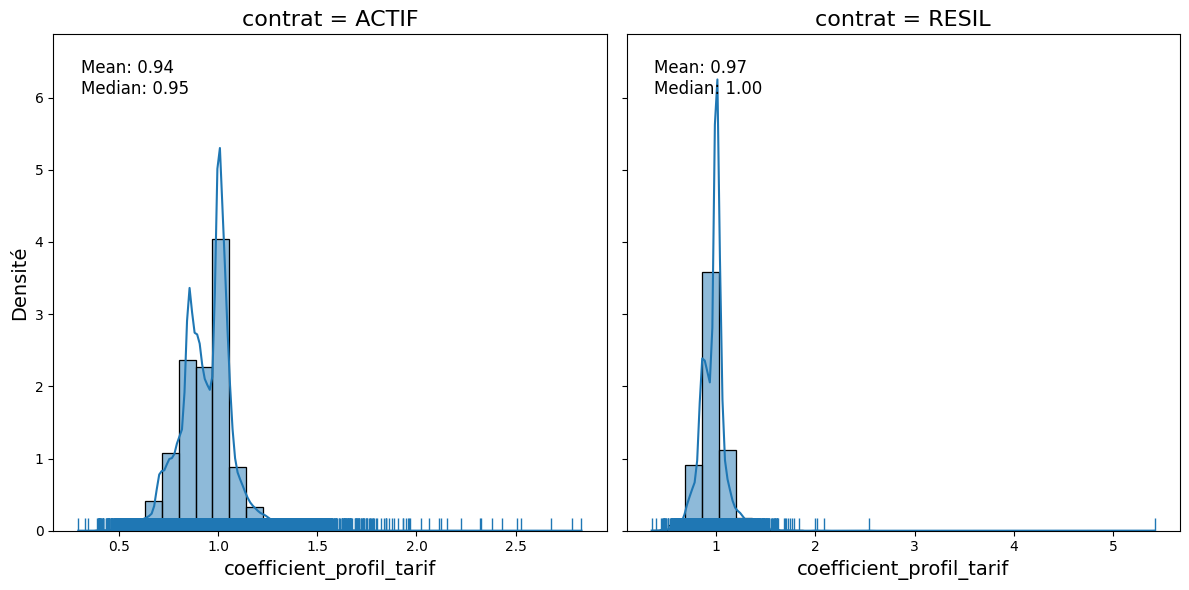

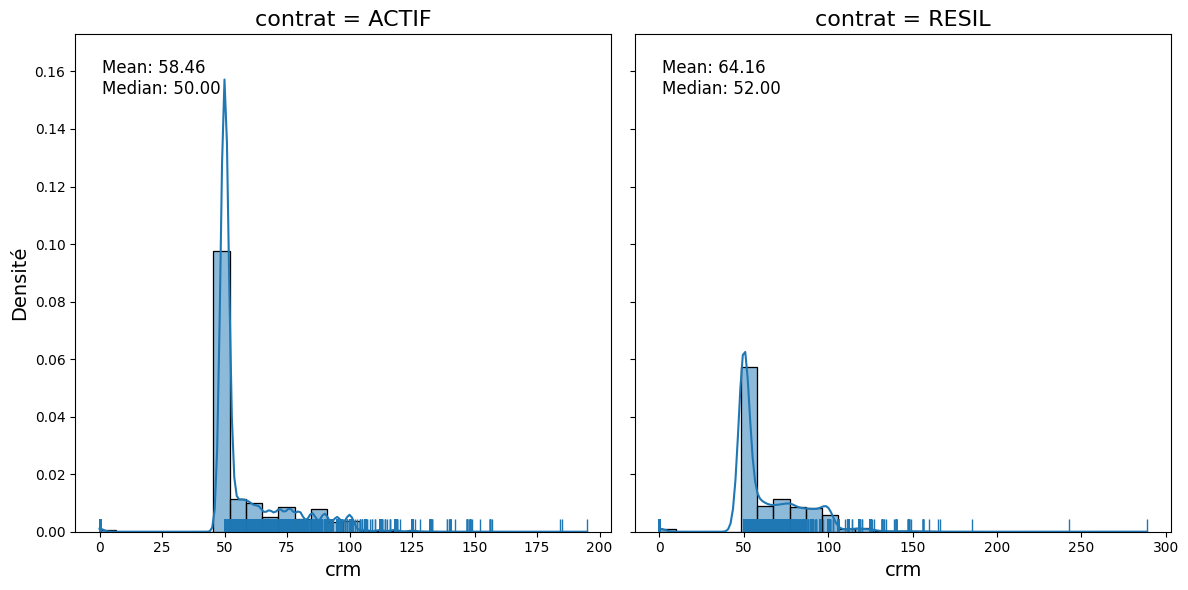

In [126]:
for field in var_num:
    distrib_for_cont_by_target(field,df,"contrat")

In [127]:
df["echeance_contrat_mmjj"].value_counts().head(20)

echeance_contrat_mmjj
01-07    5284
01-01    4482
07-07    4373
04-07    4248
10-07    3537
04-01    2565
12-07    1862
09-07    1814
03-07    1703
05-07    1578
06-07    1540
08-07    1458
11-07    1380
02-07    1329
07-01    1283
10-01    1082
09-01     987
08-01     914
03-01     809
02-01     739
Name: count, dtype: int64

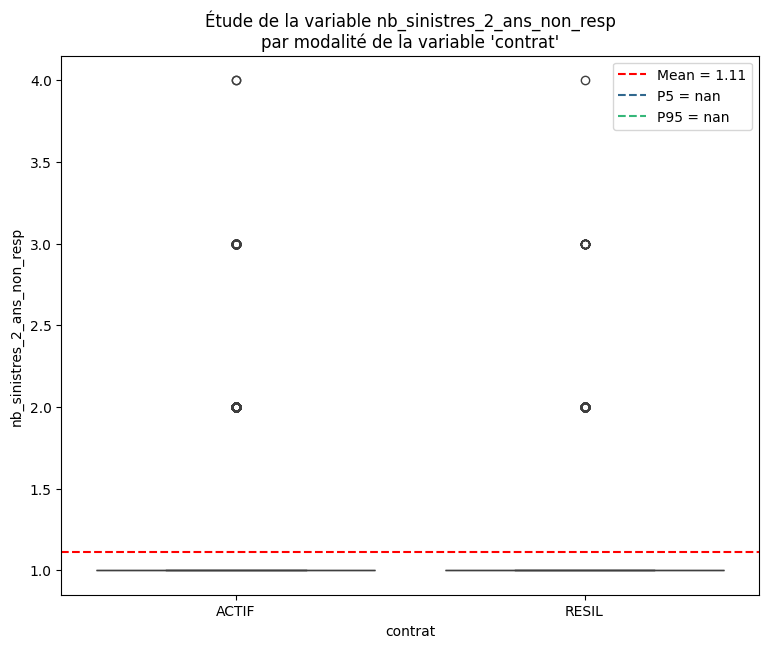

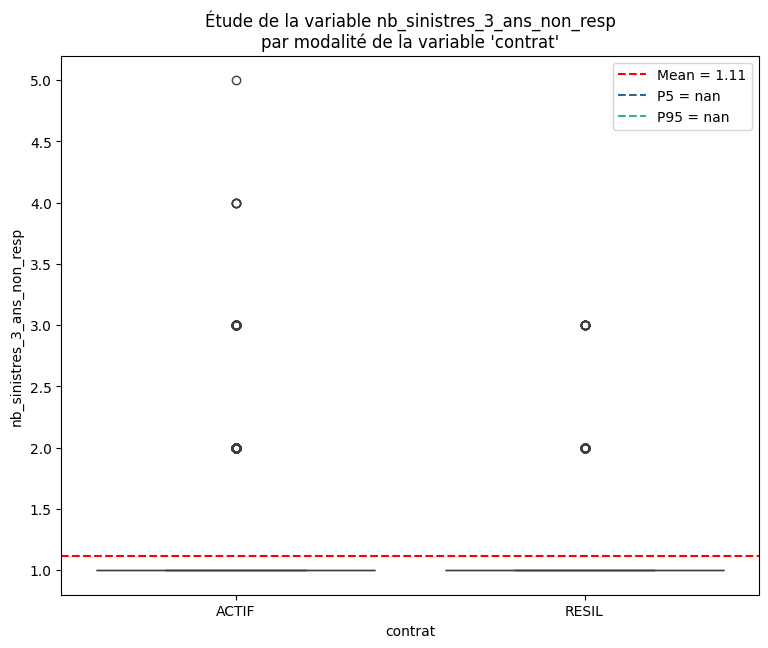

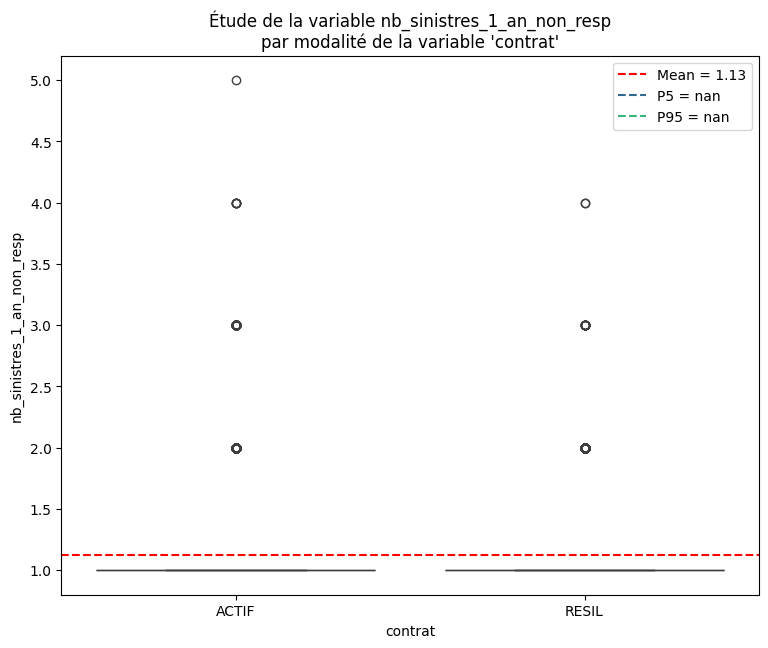

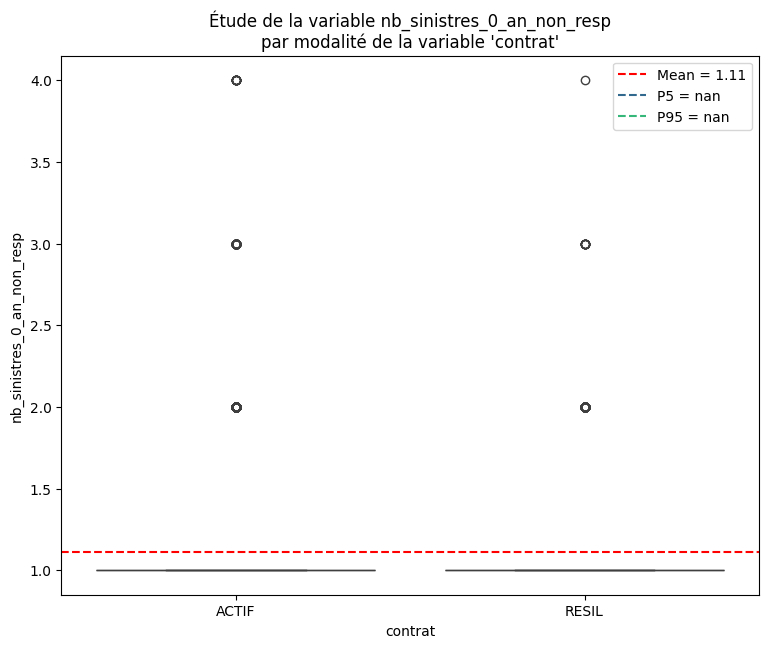

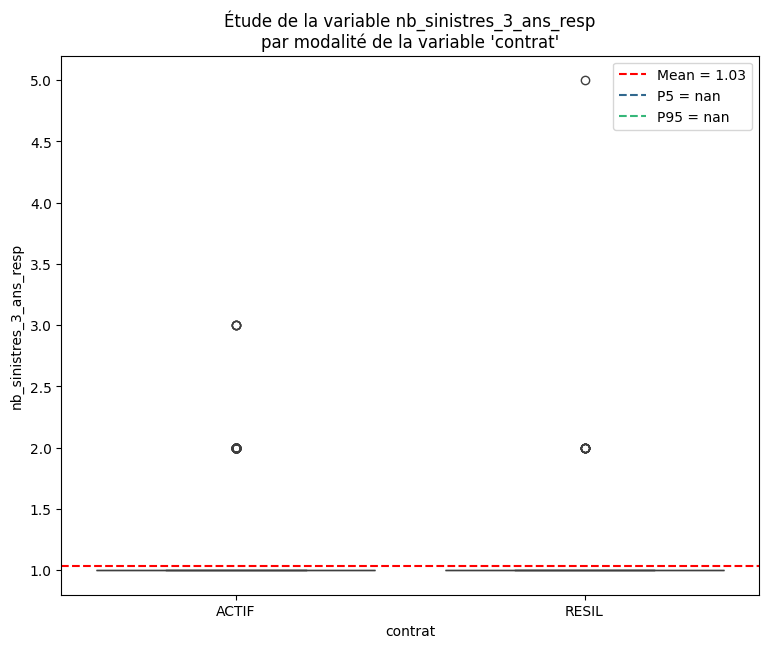

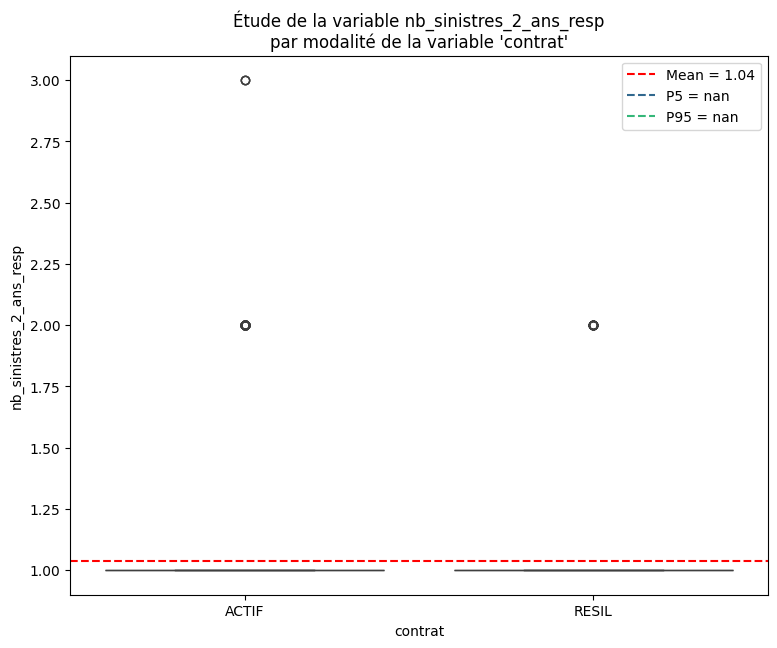

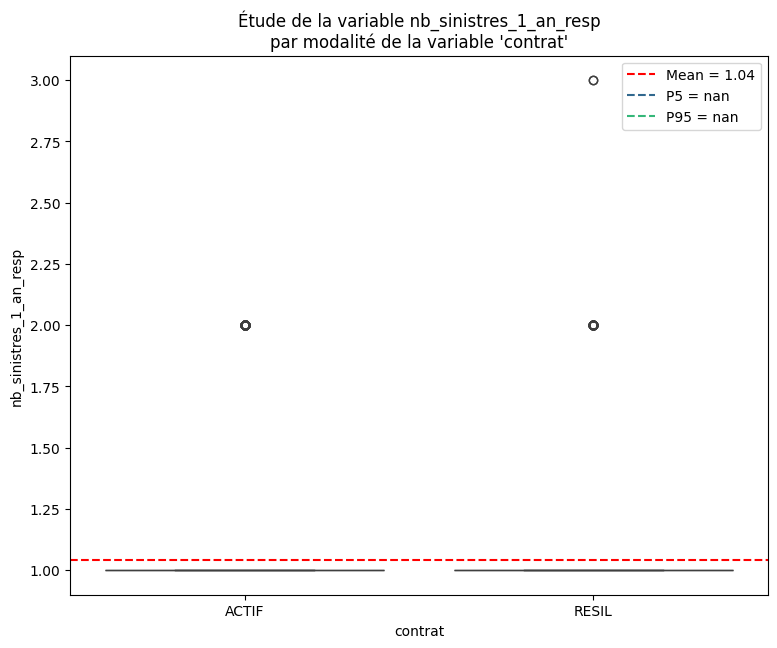

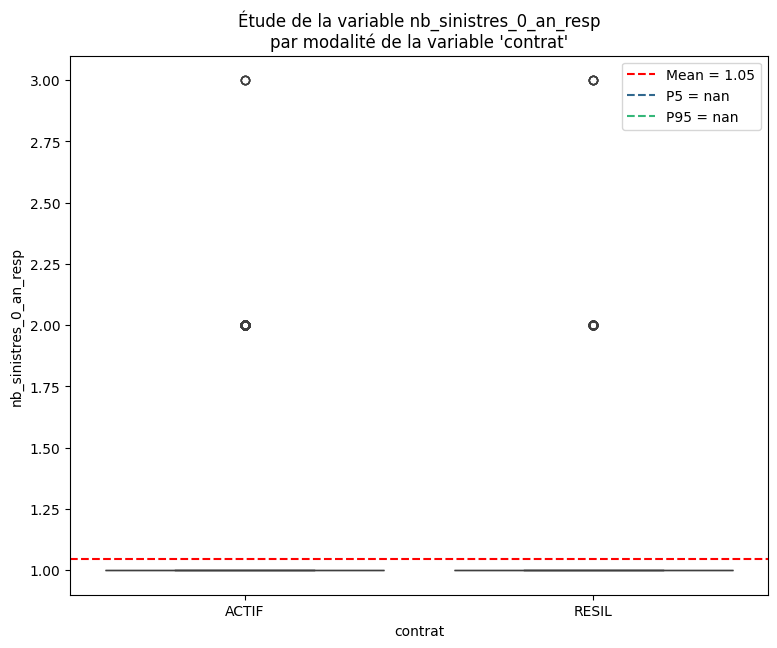

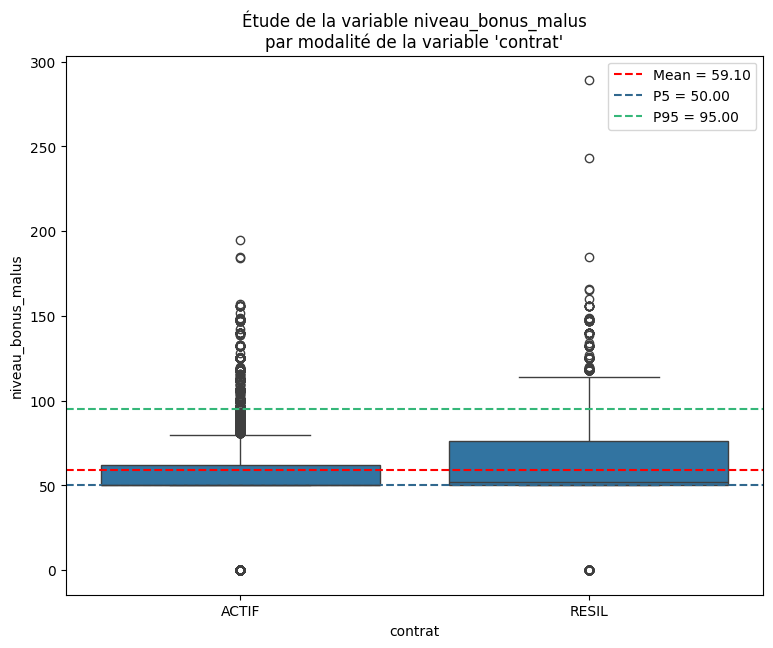

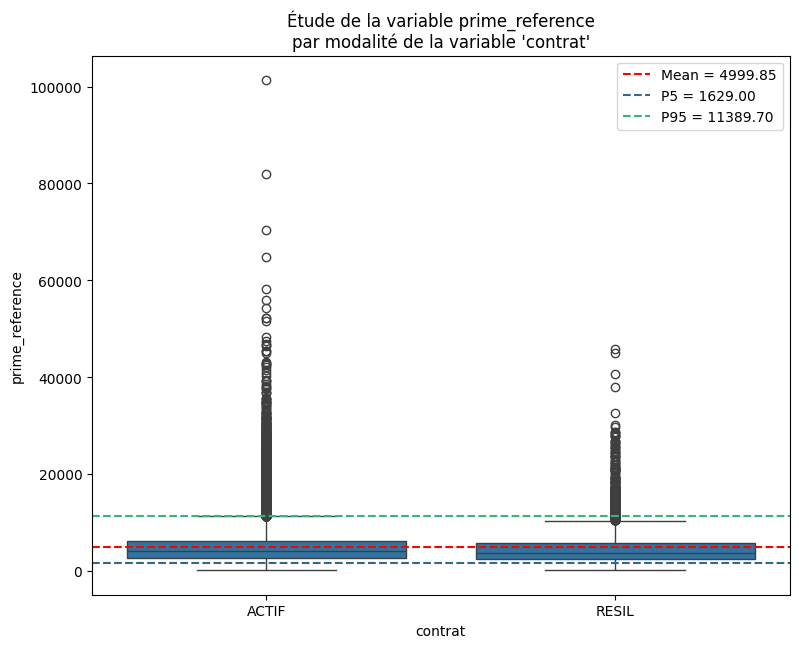

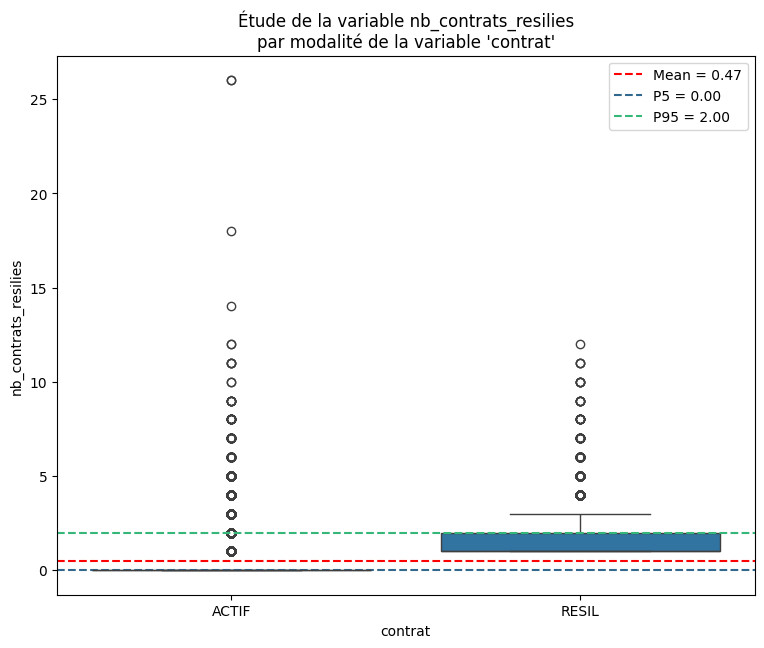

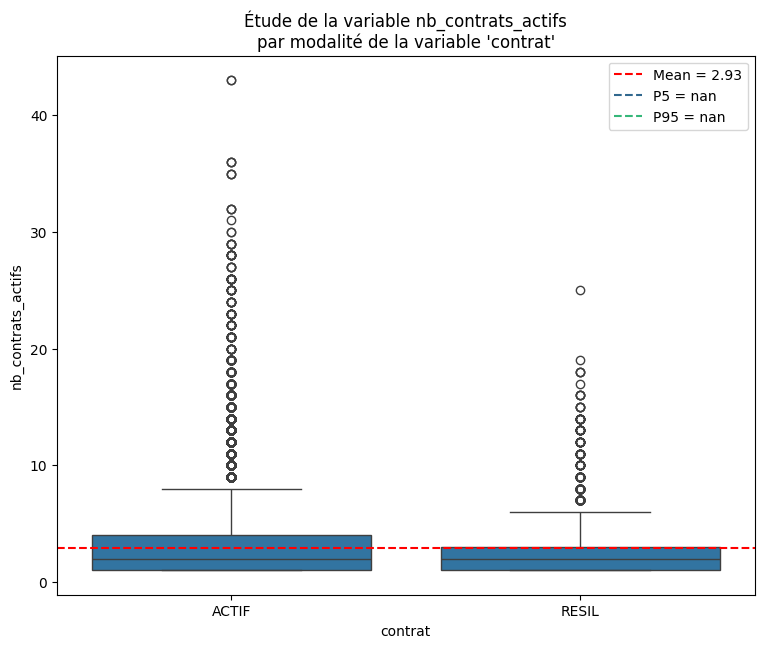

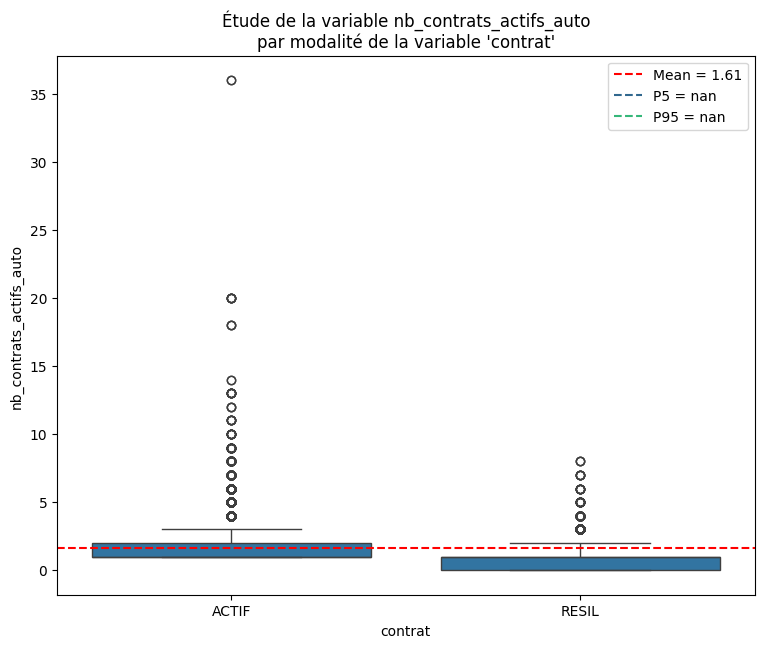

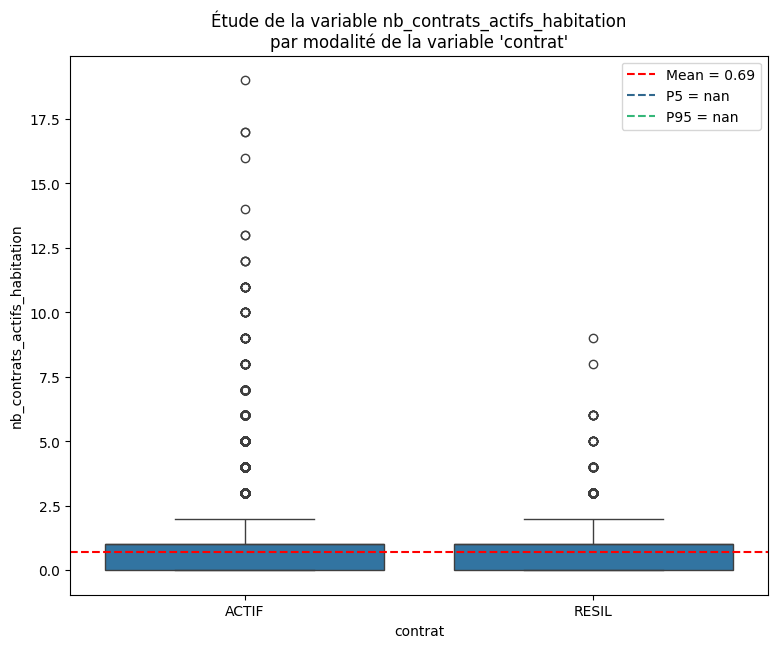

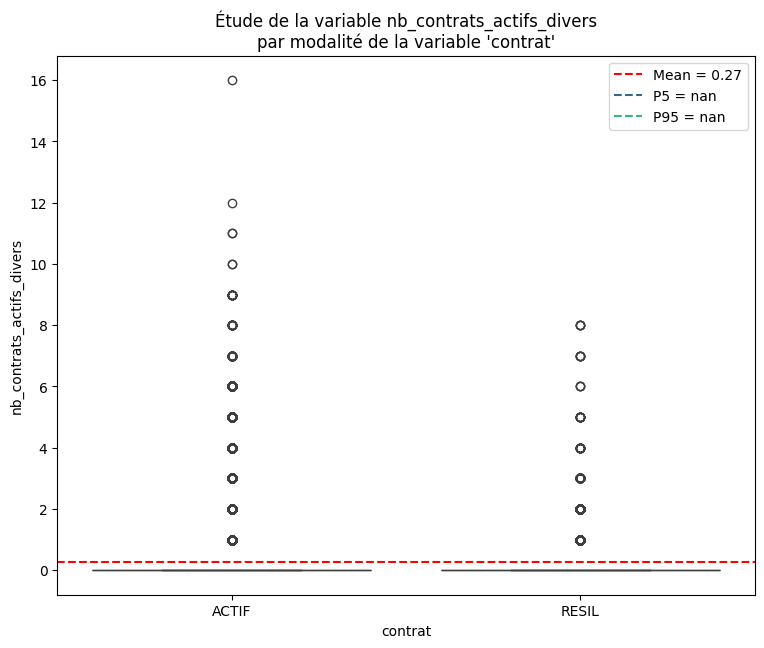

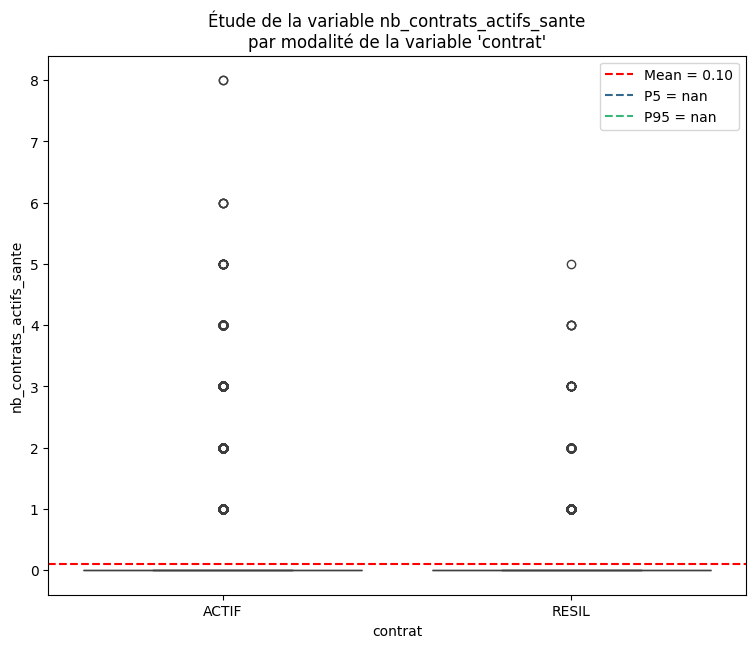

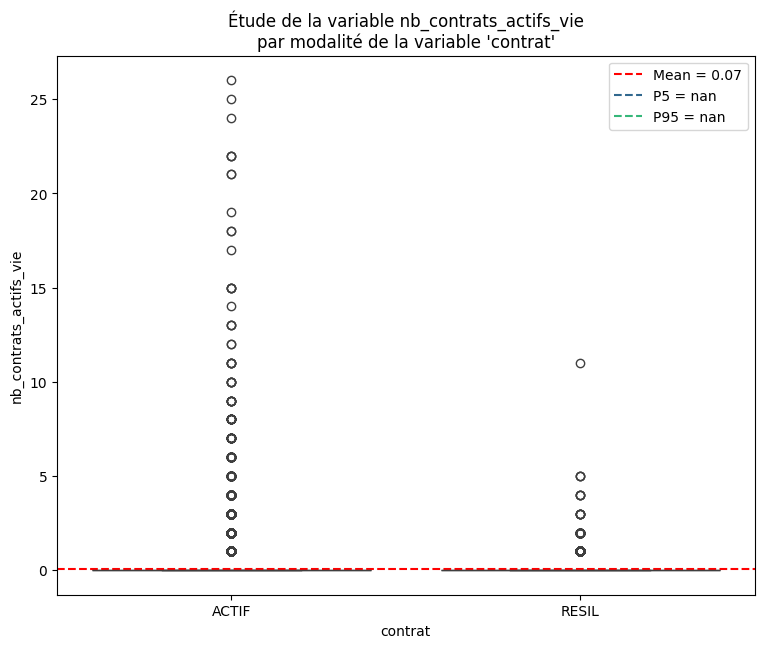

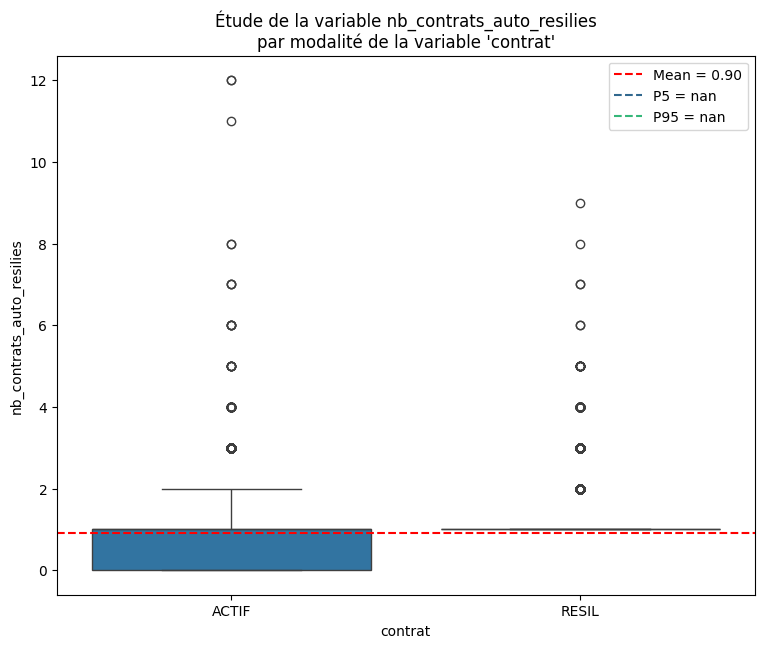

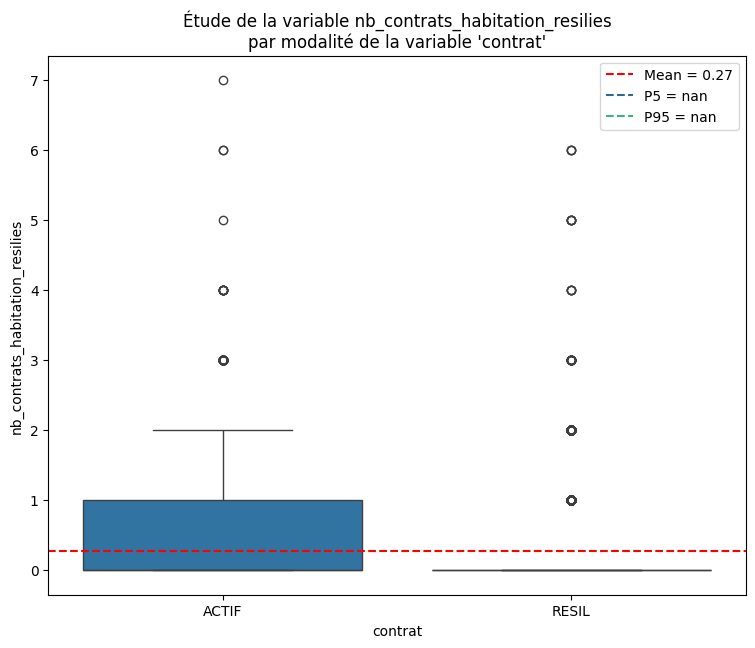

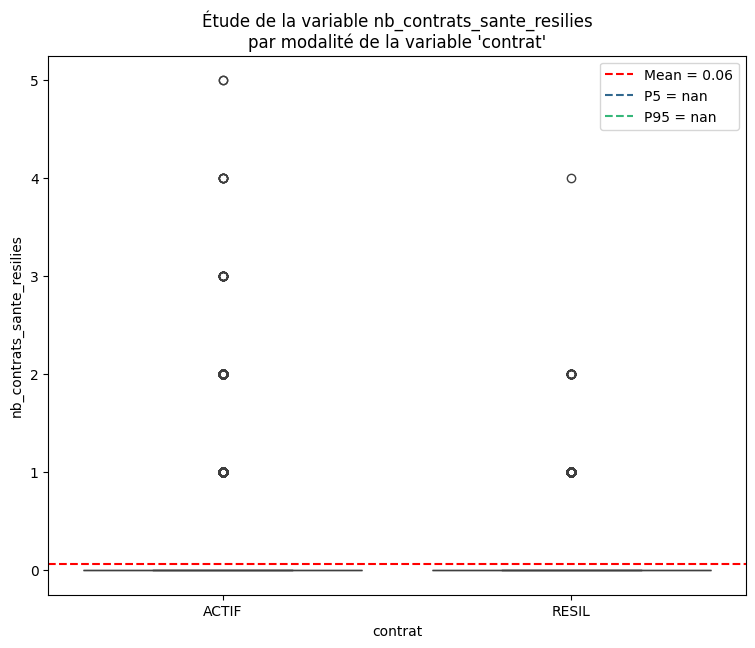

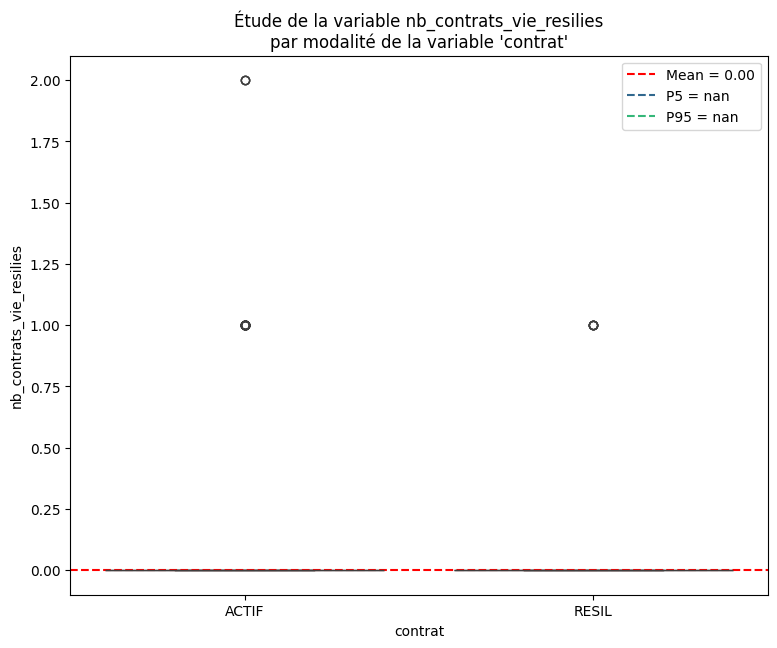

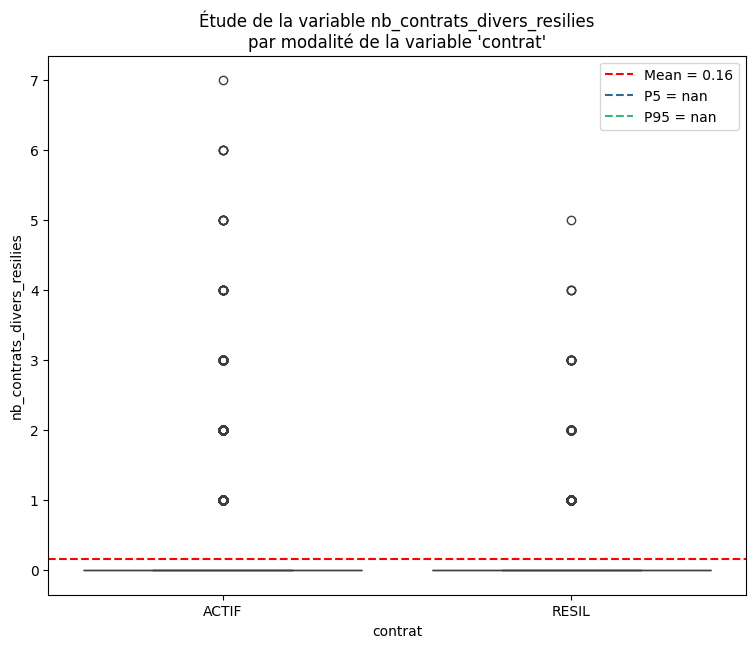

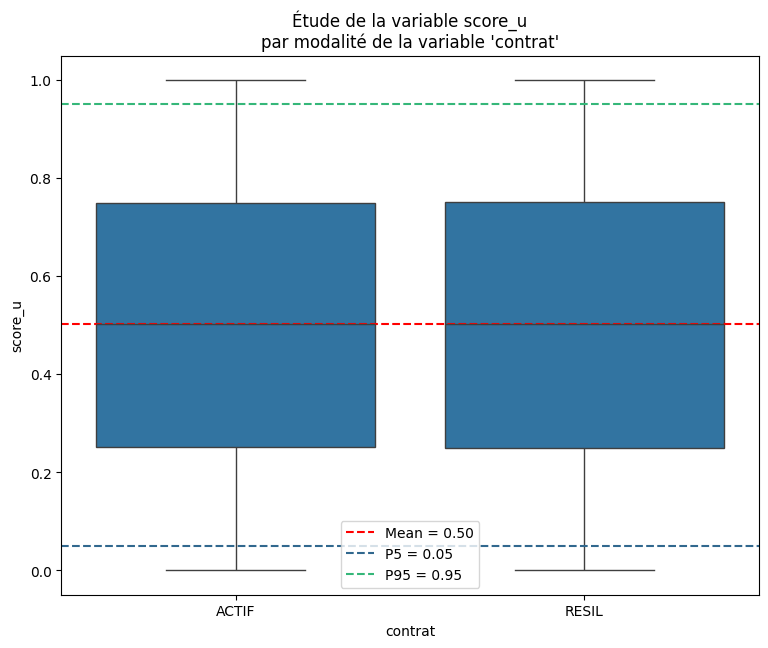

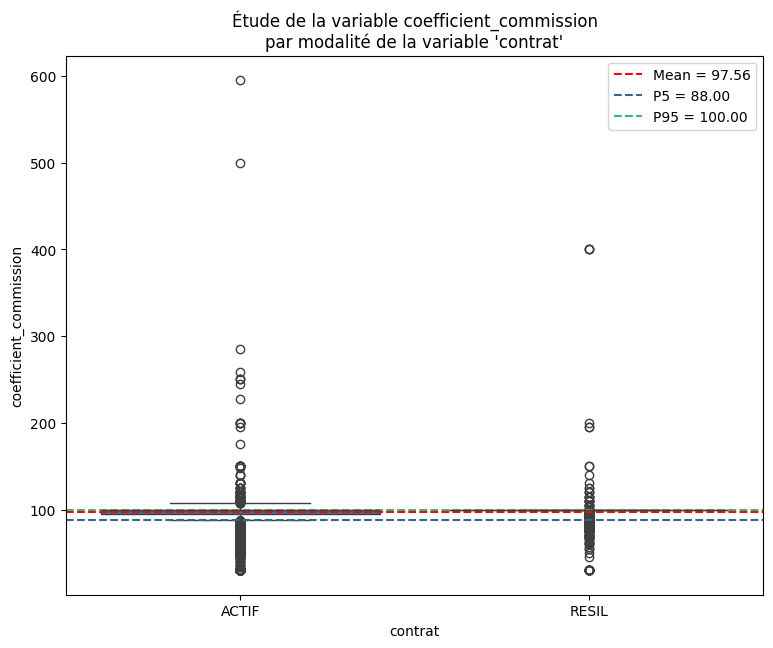

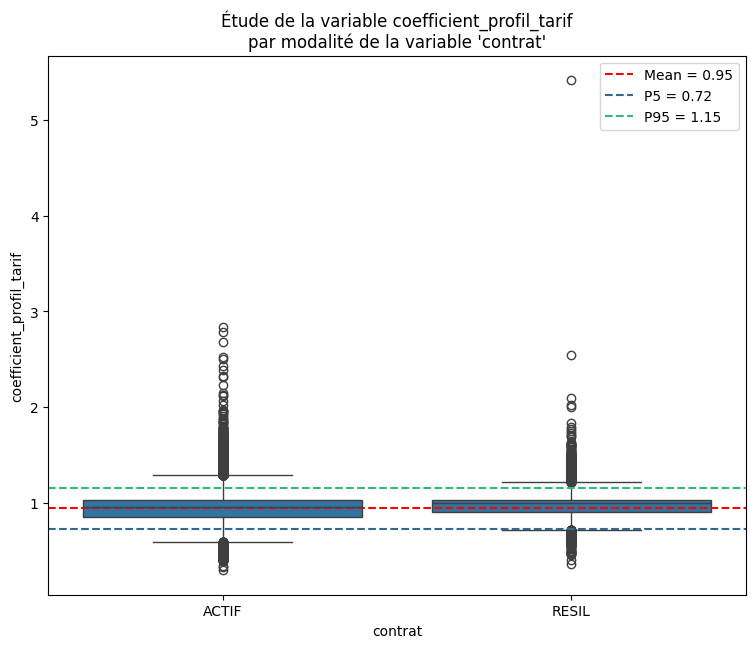

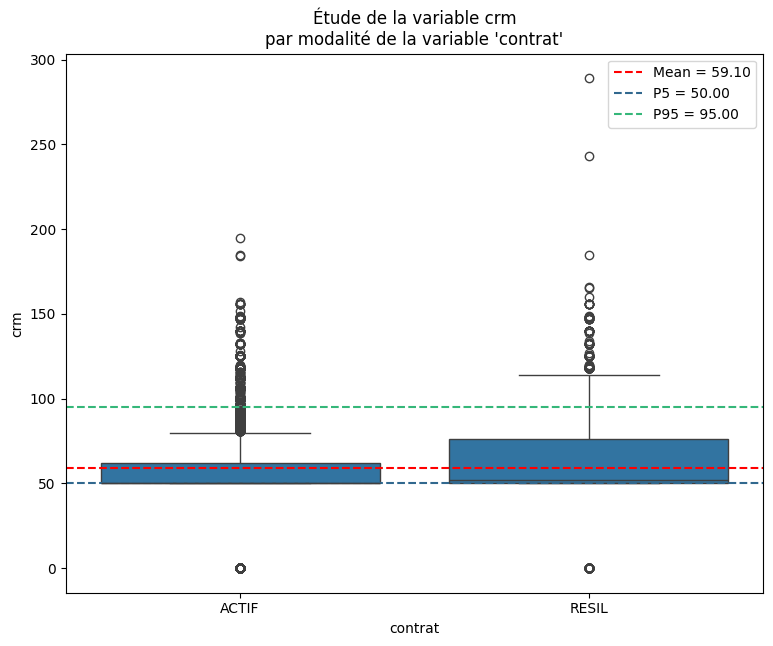

In [128]:
for field in var_num_graph:
    boxplot_by_target(field,df,"contrat",quantiles=[5,95]) #VOIR POUR CONCATENER LES BOXPLOT

✏️ **Interpretation :**

Variables qui ne semblent pas significatives pour le modèle : 
- Date d'obtention du permis
- Date mise en circulation
- Age optention permis
- Nombre de contrats actifs habitation / nombre de contrats actifs santé : faire attention à la multicolinéarité
- Nombre contrat habitation resiliés / nombre de contrats résilié santé / nombre de contrats résilié vie/ nombre de contrats résilié divers: faire attention à la multicolinéarité
- Score_u 
- Coefficient commission
- Coefficient profil tarif

Variables qui semblent pertinentes pour la variable cible :
- echeance_contrat_mmjj : les personnes qui ont une echeance contrat en janvier semble moins résilié. Contrairement aux personnes qui ont des echance contrat en septembre eux semblent plus résilier.
- Date debut de contrat : On constate que toutes les valeur extremes tres anciennté concerne les personnes résilié. On peut supposer que ces contrat n'aient pas étaient marqué comme résiliés pour cause de décès. Il faudrait vérifier que ces clients (avec des date de debut de contrat abbérants) ne soit pas dans la variable état (elle ne le sont pas )
- Date dernier mouvement : on constate que les personnes qui résilient ont une proportion de dernier mouvement nettemnt supérieur aux clients actifs. On peut supposer que les personne tente de faire une declartion avant de résilier. On peut aussi supposer que certaines personnes avaient oubliées qu'ils avaient un contrat d'assurance et lorsqu'ils ont duent faire un edeclartion ils s'en sont rapplés et ont résiliés.
- Date ancienneté : interpretation proches de celles de la variable date de debut
- Echeance contrat_mmjj : on constate que beau coup des echeance sont en juillet ou debut d'années. Il faudra surment recoder cette variable par saisonnalité.
- Age : il semble qu'en moyenne les client résiliés sont légèrement plus jeunes. Cependant on remarque que des ages très extremes sont présents chez les personnes actives. On peut supposer que des client sont peut etre decédé au cours de leur contrat mais cela n'a pas été remonté.
- Niveau bonus malus :  généralement cette variable est sous forme de coefficient. Ici ce n'est pas le cas, le niveau de bonus-malus varie entre 0 et 300. On peut supposer que cela signifie que les valeurs ne sont pas exprimées en coefficient (ex : 0.50, 1.00, etc.), mais probablement en points sur une échelle normalisée, souvent utilisée dans les bases de données internes des assureurs.
Ainsi les valeur basses représentent les bonus et les valeurs hautes les malus. 
En moyenne le niveau de bonus malus est plus élevé pour les personnes résiliés (Ils sont considérés comme plus risqués.). De plus on remarque la presence de valeurs extrêmes pour les résiliés.  (l y a peut-être des cas très accidentogènes ou très pénalisés.)
- Prime reference : En moyenne les primes références sont plus basses chez les clients resiliés mais pas parce qu’ils sont moins risqués : c’est un effet statistique lié aux valeurs extrêmes chez les non-résiliés.
- Nombre de contrats résiliés / nombre de contrats auto résiliés: en moyenne les client résilié on un nombre de contrat résiliés plus importants que les client actifd. Cela est logiques : une personne qui a tendance à résilier va resilier plus facilement.
- Nombre de contrats actifs / nombre de contrats actif auto: les client actif ont un nombre de contrat actif bien plus élevé ce qui est logique
- Crm : generalment exprimé en coefficient. Ici il semble que les valeurs ne sont pas exprimées en coefficient (ex : 0.50, 1.00, etc.), mais probablement en points sur une échelle normalisée, souvent utilisée dans les bases de données internes des assureurs.
Crm est surement tres prochze de l'interpretation de la variable niveau bonus malus. : crm a une valeur basse = bonus max, crm a une valeur haute = malus max.
On confirme nos suposition puisque crm ce comporte comme la variable niveau malus bonus : en moyenne le niveau de bonus malus est plus élevé pour les personnes résiliés (Ils sont considérés comme plus risqués.).

Variables où on sait pas  si elles sont réellement pertinentes:
- Date naissance
- Variables sur les nombres de sinistres


## 2.5 Études plus poussée

Au vu du peu d'informations que nous avons sur les variables, nous allons effectuer une analyse plus poussée. Nous essayerons d'atablir des profils.

In [129]:
df.columns

Index(['code_usage_auto', 'code_agent', 'code_formule', 'code_produit_gestion',
       'date_debut_contrat', 'date_dernier_mouvement', 'echeance_contrat',
       'prime_annuelle_ttc', 'code_marque_vehicule', 'date_obtention_permis',
       'date_mise_circulation', 'libelle_modele_vehicule', 'numero_tarif',
       'puissance_fiscale', 'rang_valeur_vehicule',
       'nb_sinistres_2_ans_non_resp', 'nb_sinistres_3_ans_non_resp',
       'nb_sinistres_1_an_non_resp', 'nb_sinistres_0_an_non_resp',
       'nb_sinistres_3_ans_resp', 'nb_sinistres_2_ans_resp',
       'nb_sinistres_1_an_resp', 'nb_sinistres_0_an_resp',
       'niveau_bonus_malus', 'prime_reference', 'code_marche',
       'nb_contrats_resilies', 'anciennete_client', 'code_csp', 'sexe',
       'date_naissance', 'situation_familiale', 'departement', 'region',
       'nb_contrats_actifs', 'nb_contrats_actifs_auto',
       'nb_contrats_actifs_habitation', 'nb_contrats_actifs_divers',
       'nb_contrats_actifs_sante', 'nb_contrats_act

* Code_formule_groupe : (formule de l'assurance)

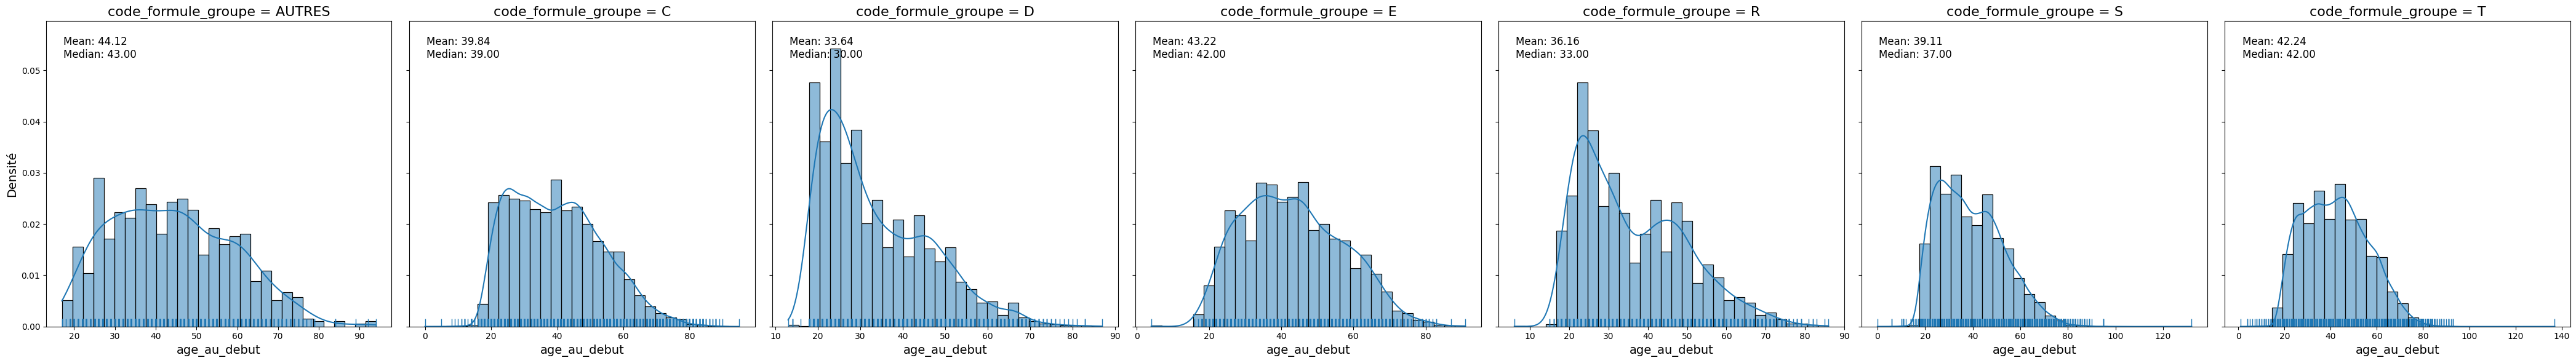

In [130]:
distrib_for_cont_by_target("age_au_debut",df,"code_formule_groupe")
# On constate que chaque formule d'assurance proposée semble ciblé des client de differents ages

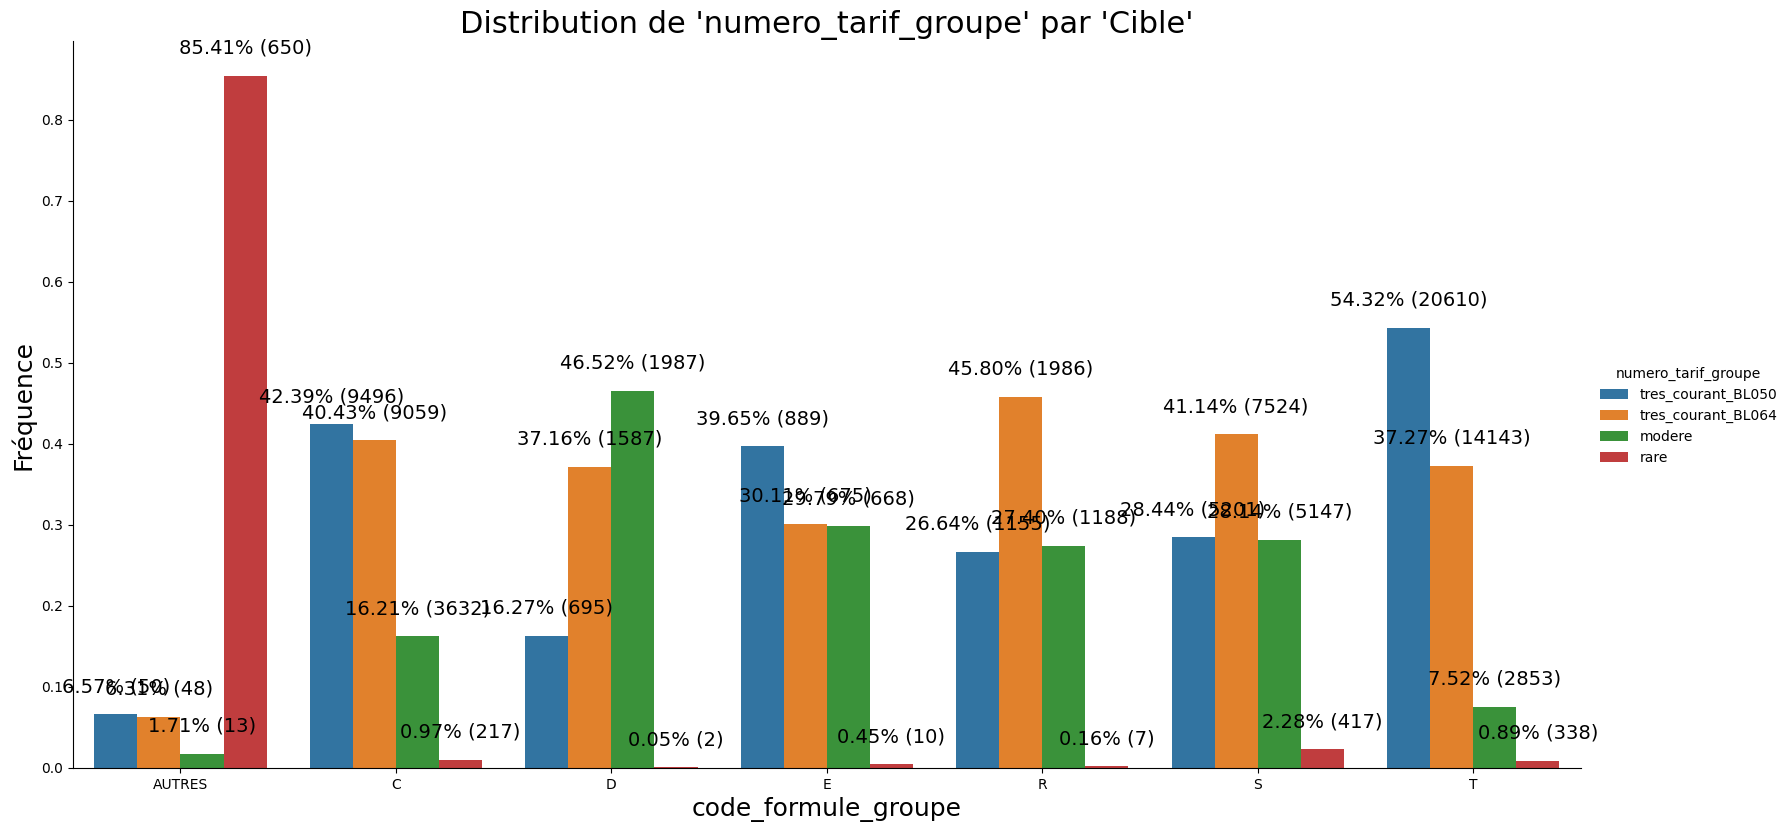

In [131]:
# Croisement entre le trarif et la formule d'assurance
distrib_for_cat_by_target("numero_tarif_groupe",df,"code_formule_groupe")

Les tarifs rares semblent tres presents dans la catégorie autre des formules assurance. Concernant les autres formules d'assurance elles sont majoritairement composé de tarif ters courant ou meme courant 

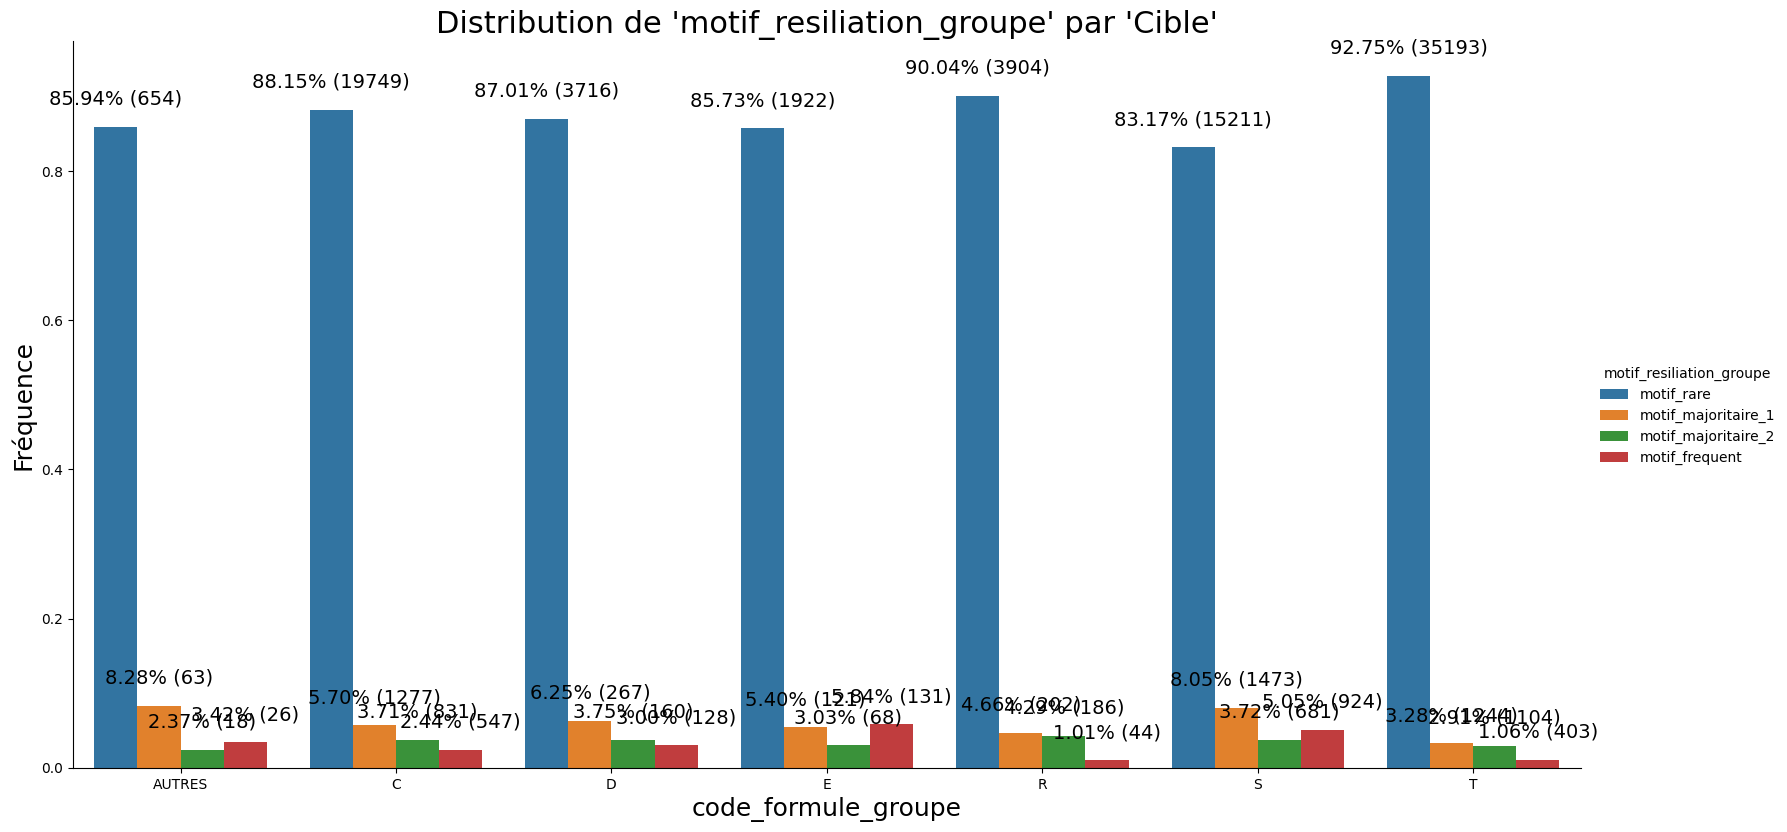

In [132]:
# Les differents motif de resiliations sont presents dans chaque formule d'assurance, on ne peut donc pas réellment etablir de profil en fonction du du motif de résiliations 
distrib_for_cat_by_target("motif_resiliation_groupe",df,"code_formule_groupe")

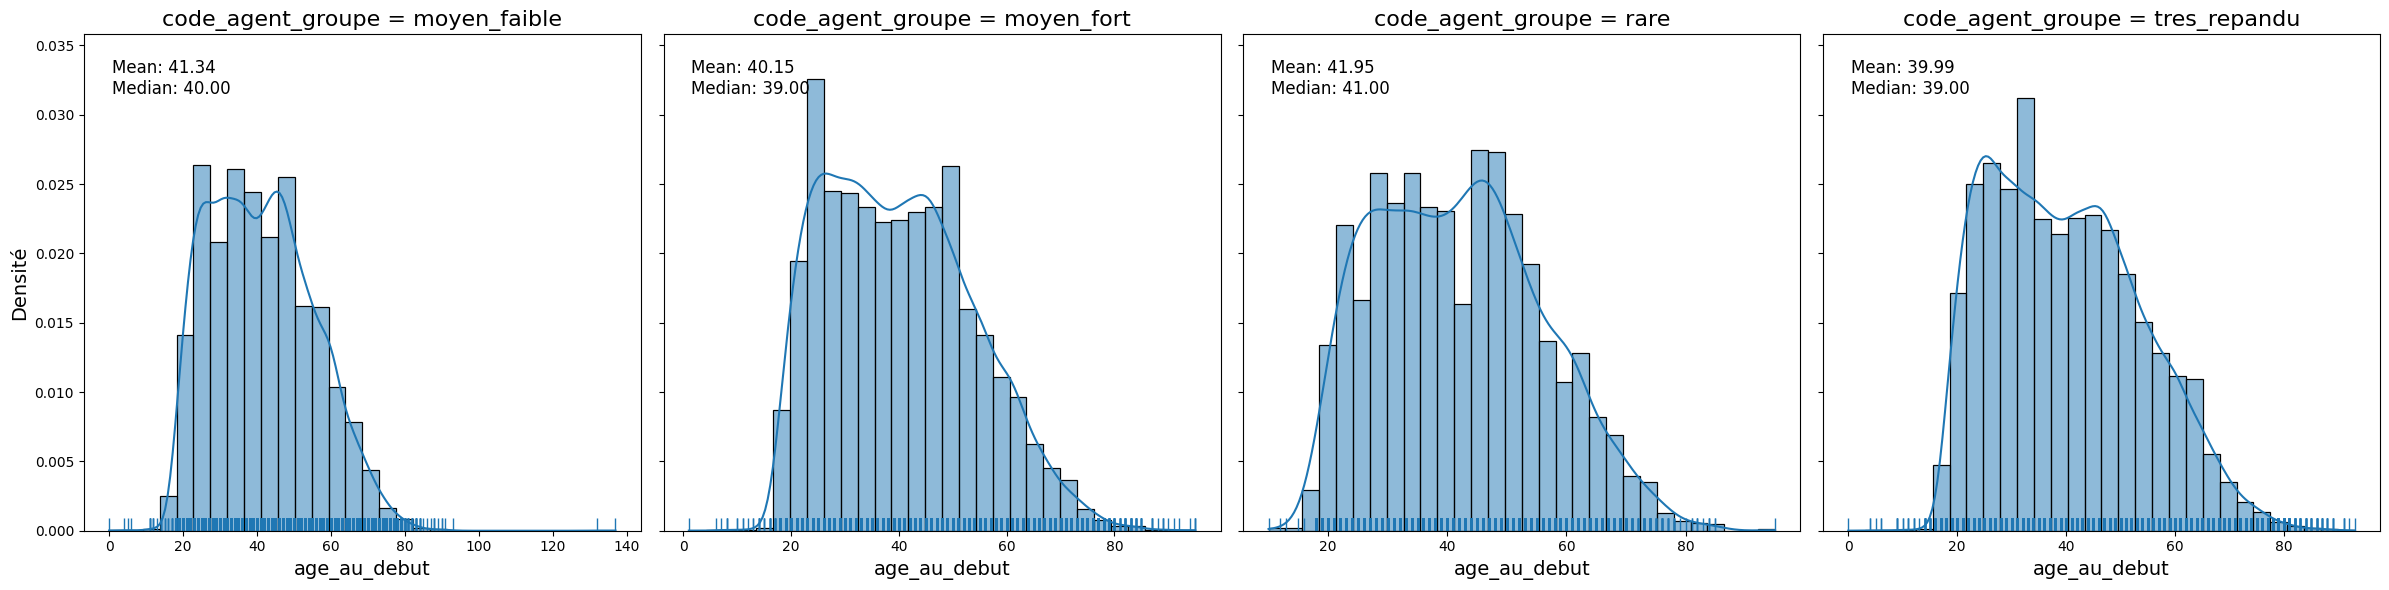

In [133]:
distrib_for_cont_by_target("age_au_debut",df,"code_agent_groupe")

In [134]:
# continuer le croisement avec d'autres variables pour essayer d'établir un profil client 

In [135]:
plot_generic(df,'nb_contrats_actifs',"contrat", bins=10, force_binning=True)

Analyse des taux de défaut en fonction de la variable nb_contrats_actifs
❌ df_res est vide — impossible de tracer le graphique.


⚠️ Je n'obtiens aucuns graphiques. Apres cette representation graphique n'est pas tres importante c'est un plus mais comprendre pourquoi.

## 3. Etude du lien entre variables explicatives et variable cible

Pas forcement très utile pour les modèles à bases d'arbre. Cependant cela reste tres important pour bien comprendre notre base ainsi que nos variables : 
- permet d'avoir un premier a priori sur les facteurs pouvant expliquer la cible (et c'est plus rapide à lancer qu'un modèle)
- permet d'identifier des variables trop "magiques" càd qui expliquent trop bien la cible. Il est possible qu'il s'agissait 
d'un champ construit selon la cible (ex: numéro de contentieux renseigné --> défaut)
- permet de supprimer les variables sans lien avec la cible ce qui permet d'optimiser les temps de calculs (à l'entrainement
mais surtout en production quand le score sera utilisé)

**Stratégie :** 

Nous allons selectionner les variables significatives par rapport à la variable cible. Puis parmis ces variables nous eliminerons la multicolinéarité.

### 3.1. Lien entre les variables explicatives catégorielles

In [136]:
var_cat_graph

['code_usage_auto',
 'code_agent',
 'code_formule',
 'code_produit_gestion',
 'code_marque_vehicule',
 'libelle_modele_vehicule',
 'numero_tarif',
 'puissance_fiscale',
 'rang_valeur_vehicule',
 'code_marche',
 'code_csp',
 'sexe',
 'situation_familiale',
 'departement',
 'region',
 'client_actif',
 'etat',
 'motif_resiliation',
 'premier_contrat',
 'age_avant_mise_circulation',
 'permis_avant_contrat',
 'vehicule_avant_contrat',
 'libelle_modele_vehicule_groupe_1',
 'libelle_modele_vehicule_groupe_2',
 'code_agent_groupe',
 'code_formule_groupe',
 'code_produit_gestion_groupe',
 'code_marque_vehicule_groupe_2',
 'code_marque_vehicule_groupe_1',
 'numero_tarif_groupe',
 'numero_tarif_groupe2',
 'code_csp_groupe_1',
 'code_csp_groupe_2',
 'situation_familiale_binaire',
 'region_groupe',
 'etat_groupe',
 'motif_resiliation_groupe',
 'code_usage_auto_groupe',
 'rang_valeur_vehicule_groupe']

In [137]:
df_vcramers_tot = cramers_v_between_all(var_cat_graph,df)
df_vcramers_tot

Variable_1                        Variable_2  abs_V_cramer  \
356              code_csp                 code_csp_groupe_2         1.000   
355              code_csp                 code_csp_groupe_1         1.000   
236          numero_tarif              numero_tarif_groupe2         1.000   
410   situation_familiale       situation_familiale_binaire         1.000   
168  code_marque_vehicule     code_marque_vehicule_groupe_2         1.000   
..                    ...                               ...           ...   
322           code_marche       code_produit_gestion_groupe         0.004   
315           code_marche        age_avant_mise_circulation         0.002   
535       premier_contrat  libelle_modele_vehicule_groupe_2         0.002   
531       premier_contrat        age_avant_mise_circulation         0.000   
488                  etat                 motif_resiliation           NaN   

            Chi2 Prob_Chi2  
356   101170.000  < 0.0001  
355  1264625.000  < 0.0001  
236   539880.000  < 0.0001  
410    89887.000  < 0.0001  
168  1352400.000  < 0.0001  
..           ...       ...  
322        1.686    0.1941  
315        0.368    0.5442  
535        0.366    0.5452  
531        0.000       1.0  
488        0.000       1.0  

[735 rows x 5 columns]

In [138]:
# avec toutes les variables (celles de base + celles crées)
df_vcramers_tot.sort_values('abs_V_cramer',ascending=False).head(50)

Variable_1                        Variable_2  \
356                          code_csp                 code_csp_groupe_2   
113              code_produit_gestion                      numero_tarif   
196           libelle_modele_vehicule  libelle_modele_vehicule_groupe_1   
97                       code_formule               code_formule_groupe   
197           libelle_modele_vehicule  libelle_modele_vehicule_groupe_2   
60                         code_agent                 code_agent_groupe   
416                       departement                            region   
305              rang_valeur_vehicule       rang_valeur_vehicule_groupe   
528                 motif_resiliation          motif_resiliation_groupe   
169              code_marque_vehicule     code_marque_vehicule_groupe_1   
355                          code_csp                 code_csp_groupe_1   
675     code_marque_vehicule_groupe_2     code_marque_vehicule_groupe_1   
436                       departement                     region_groupe   
133              code_produit_gestion       code_produit_gestion_groupe   
36                    code_usage_auto            code_usage_auto_groupe   
235                      numero_tarif               numero_tarif_groupe   
168              code_marque_vehicule     code_marque_vehicule_groupe_2   
410               situation_familiale       situation_familiale_binaire   
236                      numero_tarif              numero_tarif_groupe2   
201           libelle_modele_vehicule     code_marque_vehicule_groupe_2   
202           libelle_modele_vehicule     code_marque_vehicule_groupe_1   
735                       etat_groupe          motif_resiliation_groupe   
713                 code_csp_groupe_1                 code_csp_groupe_2   
306                       code_marche                          code_csp   
605  libelle_modele_vehicule_groupe_1  libelle_modele_vehicule_groupe_2   
98                       code_formule       code_produit_gestion_groupe   
146              code_marque_vehicule           libelle_modele_vehicule   
212           libelle_modele_vehicule       rang_valeur_vehicule_groupe   
70                         code_agent                     region_groupe   
327                       code_marche                 code_csp_groupe_1   
609  libelle_modele_vehicule_groupe_1     code_marque_vehicule_groupe_2   
275                 puissance_fiscale       rang_valeur_vehicule_groupe   
49                         code_agent                       departement   
75                       code_formule              code_produit_gestion   
610  libelle_modele_vehicule_groupe_1     code_marque_vehicule_groupe_1   
50                         code_agent                            region   
181           libelle_modele_vehicule                 puissance_fiscale   
485                      client_actif          motif_resiliation_groupe   
77                       code_formule           libelle_modele_vehicule   
200           libelle_modele_vehicule       code_produit_gestion_groupe   
112              code_produit_gestion           libelle_modele_vehicule   
465                      client_actif                              etat   
484                      client_actif                       etat_groupe   
620  libelle_modele_vehicule_groupe_1       rang_valeur_vehicule_groupe   
8                     code_usage_auto                       code_marche   
193           libelle_modele_vehicule        age_avant_mise_circulation   
76                       code_formule              code_marque_vehicule   
507                              etat          motif_resiliation_groupe   
182           libelle_modele_vehicule              rang_valeur_vehicule   
4                     code_usage_auto           libelle_modele_vehicule   

     abs_V_cramer          Chi2 Prob_Chi2  
356         1.000  1.011700e+05  < 0.0001  
113         1.000  8.998000e+04  < 0.0001  
196         1.000  9.013700e+06  < 0.0001  
97          1.000  5.3821

In [139]:
df_vcramers_tot['Prob_Chi2_Numeric'] = pd.to_numeric(df_vcramers_tot['Prob_Chi2'],errors='coerce').fillna(0)
df_var_cat_liees = df_vcramers_tot.loc[(df_vcramers_tot['abs_V_cramer']>.4)&(df_vcramers_tot['Prob_Chi2_Numeric']<.05)]
df_var_cat_liees

Variable_1                        Variable_2  \
356                     code_csp                 code_csp_groupe_2   
355                     code_csp                 code_csp_groupe_1   
236                 numero_tarif              numero_tarif_groupe2   
410          situation_familiale       situation_familiale_binaire   
168         code_marque_vehicule     code_marque_vehicule_groupe_2   
..                           ...                               ...   
2                code_usage_auto              code_produit_gestion   
259            puissance_fiscale  libelle_modele_vehicule_groupe_1   
245            puissance_fiscale              rang_valeur_vehicule   
164         code_marque_vehicule  libelle_modele_vehicule_groupe_2   
665  code_produit_gestion_groupe               numero_tarif_groupe   

     abs_V_cramer         Chi2 Prob_Chi2  Prob_Chi2_Numeric  
356         1.000   101170.000  < 0.0001                0.0  
355         1.000  1264625.000  < 0.0001                0.0  
236         1.000   539880.000  < 0.0001                0.0  
410         1.000    89887.000  < 0.0001                0.0  
168         1.000  1352400.000  < 0.0001                0.0  
..            ...          ...       ...                ...  
2           0.424    80996.391  < 0.0001                0.0  
259         0.419   205306.369  < 0.0001                0.0  
245         0.416   202754.295  < 0.0001                0.0  
164         0.412    15274.637  < 0.0001                0.0  
665         0.406    14839.719  < 0.0001                0.0  

[71 rows x 6 columns]

💡 CONSTATS ET INTUITIONS : 
------
On constate que les variables catégorielles que nous avons crées ont un fort lien avec les variables à partir des quelles ont les a crées (ce qui est logique). Il faudra garder que les variables crée dans notre model car elles contiennent moins de modalité. Mais pour etre sure on va quand meme vérifier leur lien avec la variabvles cible.

On constate aussi que d'autres variables ont un fort lien entre elles. Il faudra choisir en fonction du lien avec la variables cible:

- code_produit_gestion et numero_tarif
- le modele et la marque : faire un choix

- code_formule	et code_produit_gestion_groupe / code_produit_gestion : logique la formule d'assurance choisie aura un lien aevc le produit choisi
- code_agent et region_groupes : agent repartie en fonction des regions
- libelle_modele_vehicule et puissance_fiscale
- client_actif et motif_resiliation_groupe
- code_formule et libelle_modele_vehicule
- code_produit_gestion/code_produit_gestion_groupe et libelle_modele_vehicule

- code_usage_auto et code_marche
- code_formule et code_marque_vehicule
- libelle_modele_vehicule et rang_valeur_vehicule
- code_usage_auto et libelle_modele_vehicule

Ces 2 variables semblent tres liées à motif_resiliation_groupe ce qui peut s'avérer interessant.
- client_actif et etat/etat_groupe
- etat_groupe et motif_resiliation_groupe
- client_actif et motif_resiliation_groupe

### 3.2. Lien entre les variables catégorielles et la variable cible

In [140]:
df_vcramers_target = cramers_v_with_target(var_cat_graph,"contrat",df)
df_vcramers_target

Variable  abs_V_cramer       Chi2 Prob_Chi2
16                              etat         0.995  89339.209  < 0.0001
35                       etat_groupe         0.993  88944.000  < 0.0001
36          motif_resiliation_groupe         0.980  86731.180  < 0.0001
15                      client_actif         0.650  38079.664  < 0.0001
5            libelle_modele_vehicule         0.292   7678.097  < 0.0001
1                         code_agent         0.167   2506.438  < 0.0001
6                       numero_tarif         0.134   1614.854  < 0.0001
30              numero_tarif_groupe2         0.129   1491.447  < 0.0001
2                       code_formule         0.120   1301.359  < 0.0001
25               code_formule_groupe         0.119   1286.986  < 0.0001
29               numero_tarif_groupe         0.116   1220.362  < 0.0001
21            vehicule_avant_contrat         0.106   1017.169  < 0.0001
17                 motif_resiliation         0.101    101.808  < 0.0001
22  libelle_modele_vehicule_groupe_1         0.098    873.609  < 0.0001
0                    code_usage_auto         0.081    597.038  < 0.0001
10                          code_csp         0.080    327.619  < 0.0001
13                       departement         0.068    419.884  < 0.0001
31                 code_csp_groupe_1         0.064    371.512  < 0.0001
4               code_marque_vehicule         0.058    298.987    0.0304
32                 code_csp_groupe_2         0.055    273.149  < 0.0001
20              permis_avant_contrat         0.055    277.057  < 0.0001
7                  puissance_fiscale         0.050    229.562  < 0.0001
12               situation_familiale         0.046    193.174  < 0.0001
8               rang_valeur_vehicule         0.045    184.471  < 0.0001
33       situation_familiale_binaire         0.043    167.158  < 0.0001
38       rang_valeur_vehicule_groupe         0.038    128.628  < 0.0001
27     code_marque_vehicule_groupe_2         0.031     86.205  < 0.0001
9                        code_marche         0.031     85.657  < 0.0001
37            code_usage_auto_groupe         0.031     88.979  < 0.0001
24                 code_agent_groupe         0.025     54.452  < 0.0001
14                            region         0.025     57.657  < 0.0001
34                     region_groupe         0.023     45.952  < 0.0001
18                   premier_contrat         0.021     40.196  < 0.0001
28     code_marque_vehicule_groupe_1         0.017     27.435  < 0.0001
11                              sexe         0.013     16.076    0.0001
3               code_produit_gestion         0.009      8.137    0.1489
19        age_avant_mise_circulation         0.006      2.867    0.0904
26       code_produit_gestion_groupe         0.005      2.504    0.1136
23  libelle_modele_vehicule_groupe_2         0.004      1.391    0.2382

In [141]:
df_vcramers_target['Prob_Chi2_Numeric'] = pd.to_numeric(df_vcramers_target['Prob_Chi2'],errors='coerce').fillna(0)
df_cat_non_signif_target = df_vcramers_target.loc[df_vcramers_target['Prob_Chi2_Numeric']>.05]
list_cat_non_signif_target = df_cat_non_signif_target['Variable'].tolist()

print(f"""Lien avec "{"contrat"}" non significatif pour les variables: {", ".join(list_cat_non_signif_target)}""")

Lien avec "contrat" non significatif pour les variables: code_produit_gestion, age_avant_mise_circulation, code_produit_gestion_groupe, libelle_modele_vehicule_groupe_2


💡 CONSTATS ET INTUITIONS : 
------


Ainsi nous selectionnons toutes les variables qui semblent significatives pour notre modèle. Parmis elles nous devons faire un choix pour eviter la multicolinéarité :

- etat : meme informations que la variable cible enlever
- etat_groupe : meme informations que la variable cible enlever
- motif_resiliation_groupe : tres liée aux variable telles que etat ou client_actif ainsi fortement liée a contrat. Cependant cette variable pourrait se comporter comme une variable magique et "trop bien expliquer le modèle". VOIR SI ON GARDE.
- client_actif : : meme informations que la variable cible enlever
- libelle_modele_vehicule : Garder
- code_agent : Garder
- numero_tarif : voir quelle variable garder 
- numero_tarif_groupe2 : voir quelle variable garder 
- code_formule:  voir quelle variable garder 
- code_formule_groupe : voir quelle variable garder 
- numero_tarif_groupe : meme information que la variable numero_tarif qui est plus corrélée avec la cible
- vehicule_avant_contrat : GARDER
- motif_resiliation : voir si ne pas garder à la place de motif_resiliation_groupe qui semble plus liée à la cible mais qui semble trop expliquer la cible
- libelle_modele_vehicule_groupe_1: meme information que la variable libelle_modele_vehicule qui est plus corrélée avec la cible
- code_usage_auto : GARDER 
- code_csp : voir quelle variable garder 
- departement : pas garder
- code_csp_groupe_1: voir quelle variable garder 
- code_marque_vehicule	: meme information que la variable code_formule qui est plus corrélée avec la cible
- code_csp_groupe_2	: meme information que la variable code_csp qui est plus corrélée avec la cible
- permis_avant_contrat : GARDER
- puissance_fiscale : GARDER 
- situation_familiale: voir quelle variable garder 
- rang_valeur_vehicule : meme information que la variable puissance_fiscale qui est plus corrélée avec la cible
- situation_familiale_binaire: voir quelle variable garder 
- rang_valeur_vehicule_groupe : meme information que la variable puissance_fiscale qui est plus corrélée avec la cible
- code_marque_vehicule_groupe_2	: meme information que la variable libelle_modele_vehicule qui est plus corrélée avec la cible
- code_marche : meme information que la variable code_usage_auto qui est plus corrélée avec la cible
- code_usage_auto_groupe : meme information que la variable code_usage_auto qui est plus corrélée avec la cible
- code_agent_groupe : meme information que la variable code_agent qui est plus corrélée avec la cible
- region : retirer car fortement liée à code_agent. Code_agent est plus liée avec la cible on garde code_agent.
- region_groupe	: retirer car fortement liée à code_agent. Code_agent est plus liée avec la cible on garde code_agent.
- premier_contrat : GARDER
- code_marque_vehicule_groupe_1	: meme information que la variable libelle_modele_vehicule qui est plus corrélée avec la cible
- sexe : Garder

In [142]:
var_cat_selectionnees = [
    "libelle_modele_vehicule",
    "code_agent",
    "numero_tarif",
    "vehicule_avant_contrat",
    "premier_contrat",
    "sexe",
    "code_formule",
    
]

### 3.3 Etude du lien entre les variables explicatives continues 

In [143]:
df.columns

Index(['code_usage_auto', 'code_agent', 'code_formule', 'code_produit_gestion',
       'date_debut_contrat', 'date_dernier_mouvement', 'echeance_contrat',
       'prime_annuelle_ttc', 'code_marque_vehicule', 'date_obtention_permis',
       'date_mise_circulation', 'libelle_modele_vehicule', 'numero_tarif',
       'puissance_fiscale', 'rang_valeur_vehicule',
       'nb_sinistres_2_ans_non_resp', 'nb_sinistres_3_ans_non_resp',
       'nb_sinistres_1_an_non_resp', 'nb_sinistres_0_an_non_resp',
       'nb_sinistres_3_ans_resp', 'nb_sinistres_2_ans_resp',
       'nb_sinistres_1_an_resp', 'nb_sinistres_0_an_resp',
       'niveau_bonus_malus', 'prime_reference', 'code_marche',
       'nb_contrats_resilies', 'anciennete_client', 'code_csp', 'sexe',
       'date_naissance', 'situation_familiale', 'departement', 'region',
       'nb_contrats_actifs', 'nb_contrats_actifs_auto',
       'nb_contrats_actifs_habitation', 'nb_contrats_actifs_divers',
       'nb_contrats_actifs_sante', 'nb_contrats_act

In [144]:
var_num_graph

['nb_sinistres_2_ans_non_resp',
 'nb_sinistres_3_ans_non_resp',
 'nb_sinistres_1_an_non_resp',
 'nb_sinistres_0_an_non_resp',
 'nb_sinistres_3_ans_resp',
 'nb_sinistres_2_ans_resp',
 'nb_sinistres_1_an_resp',
 'nb_sinistres_0_an_resp',
 'niveau_bonus_malus',
 'prime_reference',
 'nb_contrats_resilies',
 'nb_contrats_actifs',
 'nb_contrats_actifs_auto',
 'nb_contrats_actifs_habitation',
 'nb_contrats_actifs_divers',
 'nb_contrats_actifs_sante',
 'nb_contrats_actifs_vie',
 'nb_contrats_auto_resilies',
 'nb_contrats_habitation_resilies',
 'nb_contrats_sante_resilies',
 'nb_contrats_vie_resilies',
 'nb_contrats_divers_resilies',
 'score_u',
 'coefficient_commission',
 'coefficient_profil_tarif',
 'crm']

In [145]:
var_num_graph = var_num_graph + ['age_au_debut', 'prime_annuelle_ttc', 
 'age_mise_circ',
 'delai_permis_contrat',
 'age_vehicule', "delai_dernier_mouvement"]
var_num_graph

['nb_sinistres_2_ans_non_resp',
 'nb_sinistres_3_ans_non_resp',
 'nb_sinistres_1_an_non_resp',
 'nb_sinistres_0_an_non_resp',
 'nb_sinistres_3_ans_resp',
 'nb_sinistres_2_ans_resp',
 'nb_sinistres_1_an_resp',
 'nb_sinistres_0_an_resp',
 'niveau_bonus_malus',
 'prime_reference',
 'nb_contrats_resilies',
 'nb_contrats_actifs',
 'nb_contrats_actifs_auto',
 'nb_contrats_actifs_habitation',
 'nb_contrats_actifs_divers',
 'nb_contrats_actifs_sante',
 'nb_contrats_actifs_vie',
 'nb_contrats_auto_resilies',
 'nb_contrats_habitation_resilies',
 'nb_contrats_sante_resilies',
 'nb_contrats_vie_resilies',
 'nb_contrats_divers_resilies',
 'score_u',
 'coefficient_commission',
 'coefficient_profil_tarif',
 'crm',
 'age_au_debut',
 'prime_annuelle_ttc',
 'age_mise_circ',
 'delai_permis_contrat',
 'age_vehicule',
 'delai_dernier_mouvement']

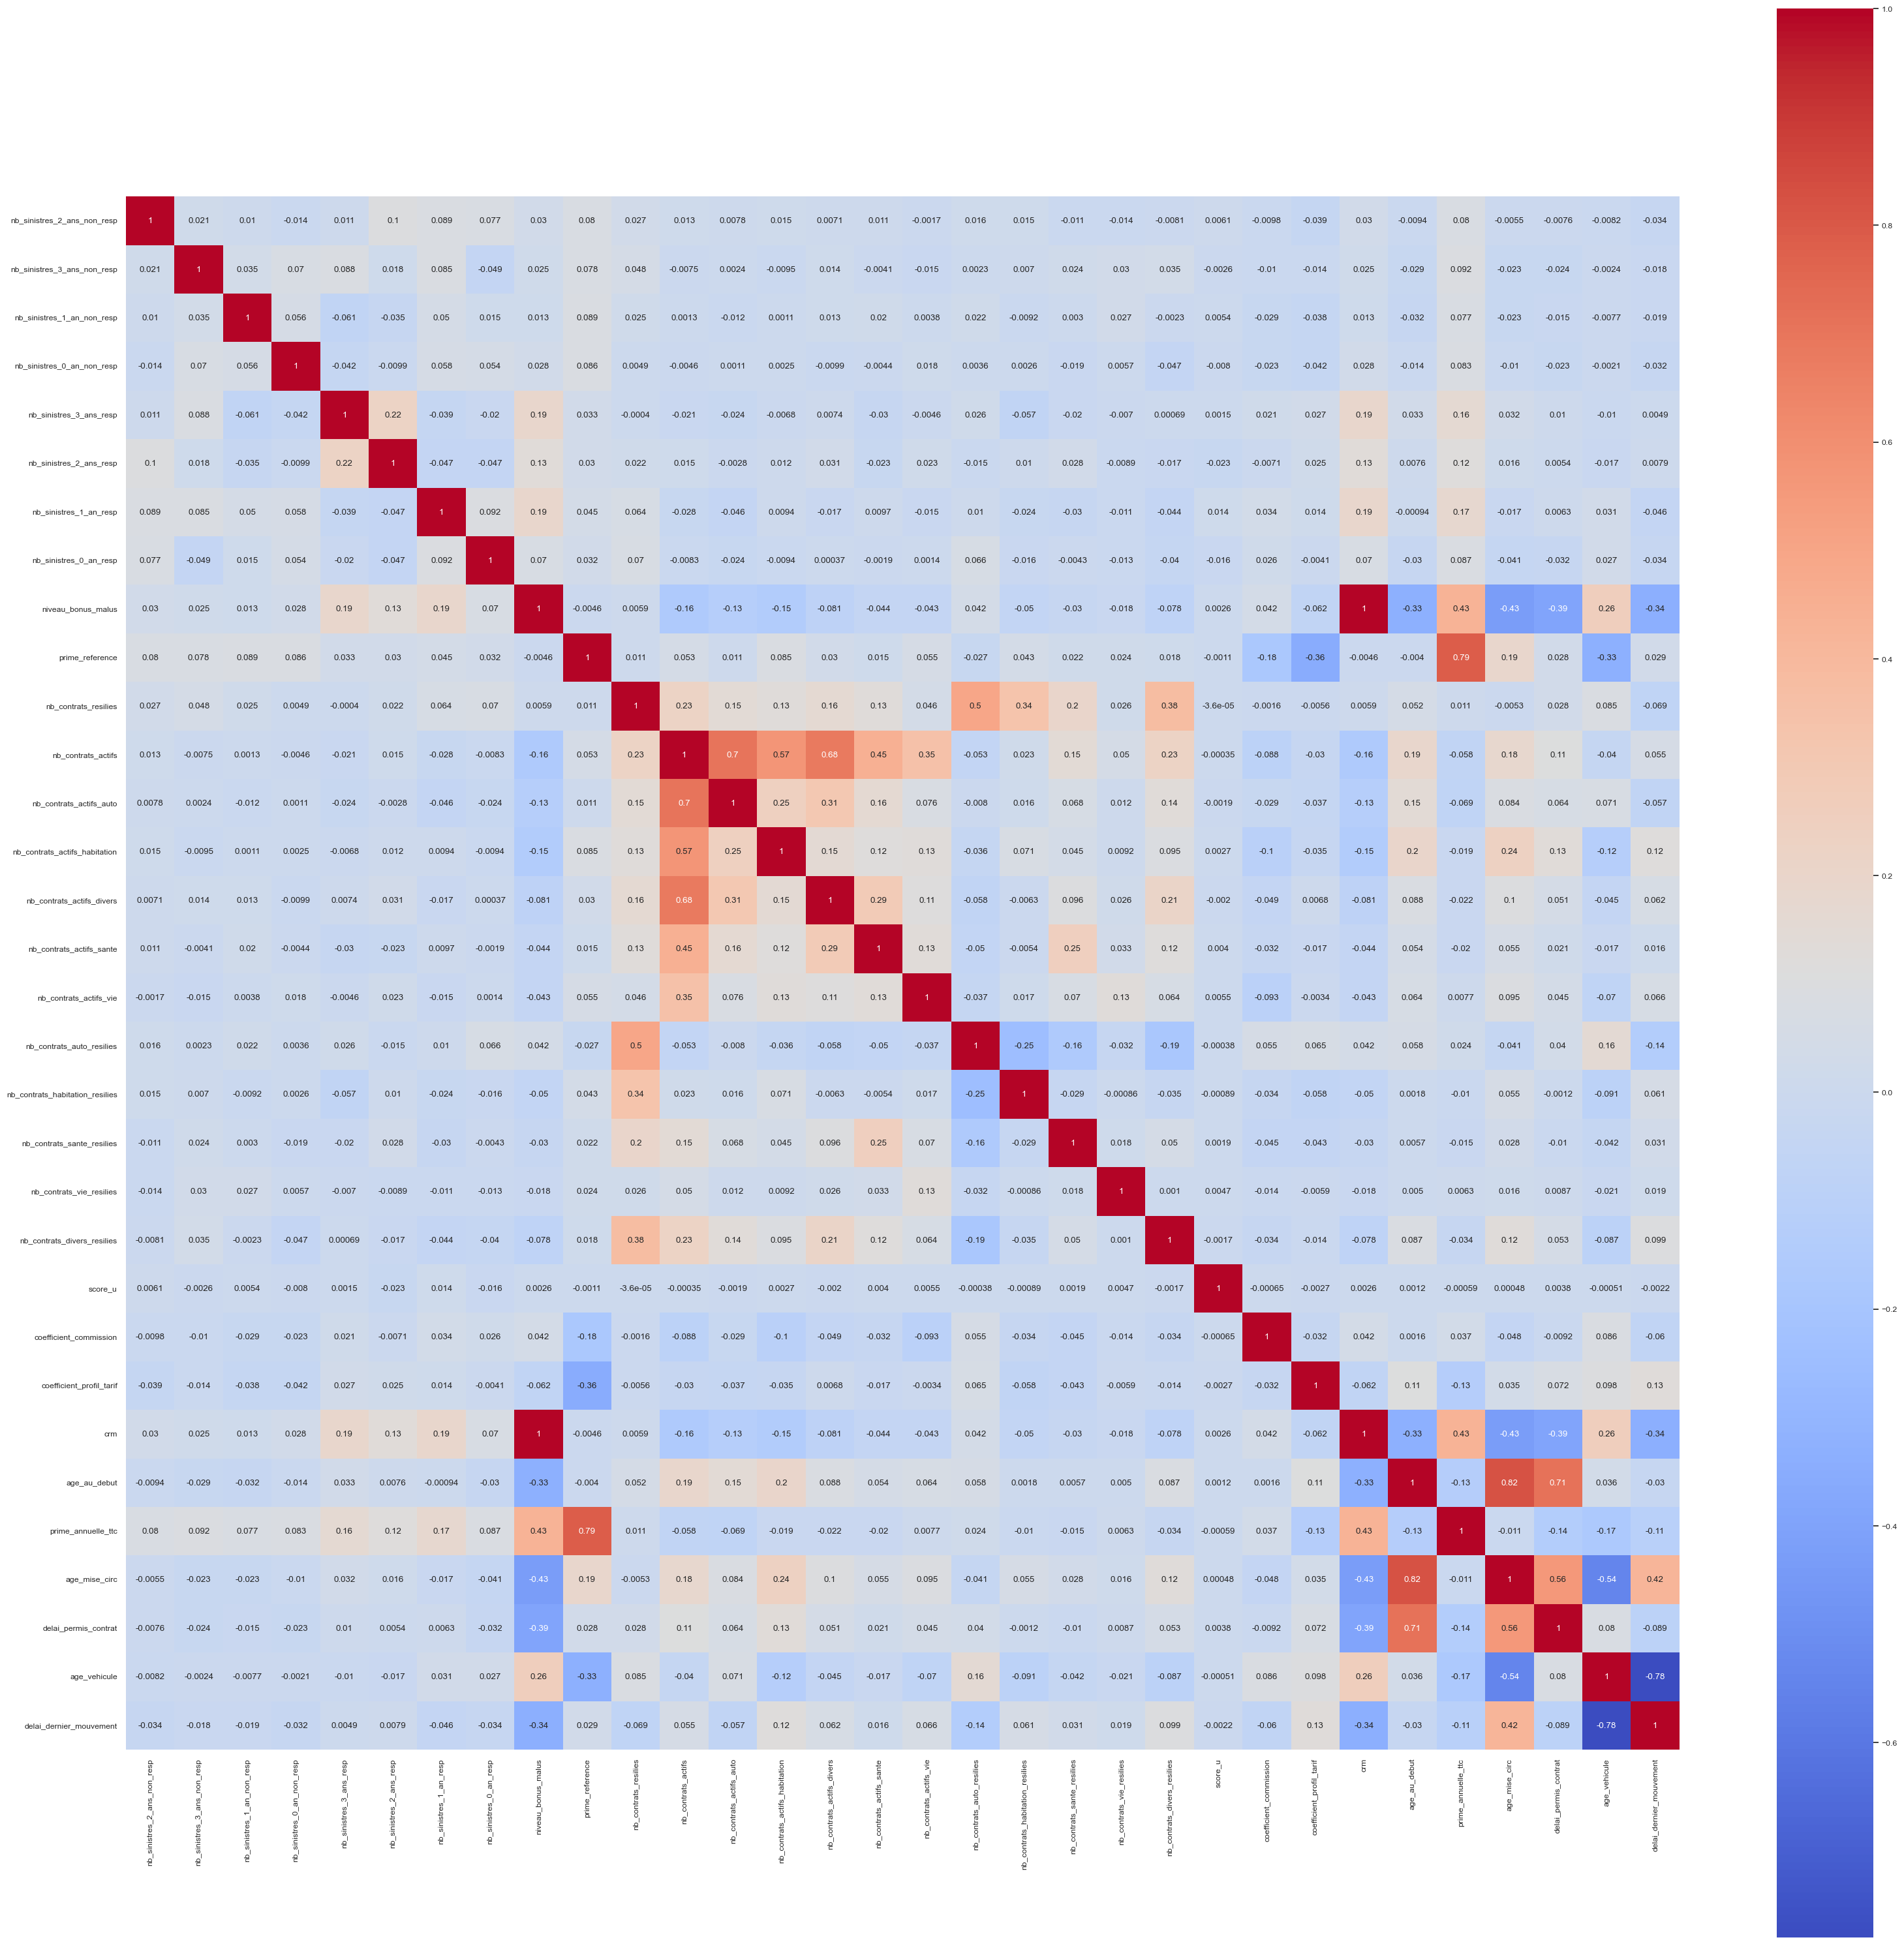

In [146]:
graph_correlations(var_num_graph,df)

In [147]:
corrdf = extract_corr_pairs(df[var_num_graph])

In [148]:
# Focus sur les variables explicatives fortement corrélées entre elles
seuil_corr = 0.5
high_corr_df = corrdf[abs(corrdf['corr'])>=seuil_corr]
high_corr_df

var_1                          var_2      corr  corr_abs
0    niveau_bonus_malus                            crm  1.000000  1.000000
1          age_au_debut                  age_mise_circ  0.821205  0.821205
2       prime_reference             prime_annuelle_ttc  0.785841  0.785841
495        age_vehicule        delai_dernier_mouvement -0.779945  0.779945
3          age_au_debut           delai_permis_contrat  0.714423  0.714423
4    nb_contrats_actifs        nb_contrats_actifs_auto  0.701351  0.701351
5    nb_contrats_actifs      nb_contrats_actifs_divers  0.683090  0.683090
6    nb_contrats_actifs  nb_contrats_actifs_habitation  0.571043  0.571043
7         age_mise_circ           delai_permis_contrat  0.556051  0.556051
494       age_mise_circ                   age_vehicule -0.539399  0.539399

In [149]:
df['prime_reference'].value_counts()

prime_reference
2272.0    122
2110.0     98
1868.0     77
2340.0     67
1979.0     60
         ... 
3499.1      1
801.0       1
5673.2      1
9457.0      1
304.0       1
Name: count, Length: 14957, dtype: int64

💡 CONSTATS ET INTUITIONS : 
------
On constate que les variables continues que nous avons crées ont un fort lien avec les variables à partir des quelles ont les a crées (ce qui est logique). Nous garderons les variables les plus liées à la cible. 

D'autre variables son simplement fortement liées entre elles :
- crm et niveau_bonus_malus semblent donner exactement la meme information (comme interpreter dans les graphiques)en supp une.
- prime_reference et prime_annuelle_ttc semblent très liées. En effet, il est très courant dans les données d’assurance que prime_annuelle_ttc soit dérivée directement de prime_reference. 

### 3.4 Lien entre les variables explicatives continues et la variable cible

Application du Welch’s t-test

<div class="alert alert-block alert-info">
<b>🔔 Rappel :</b> Le Welch’s t-test est un test de Student où on relâche l'hypothèse d'équivariance entre les 2 populations.<br>
H0 : Les distributions de x|y=1 et x|y=0 sont les mêmes (avec x: variable explicative continue, y:variable cible bimodale)
</div>

In [150]:
p_values = []

for field in var_num_graph:
    a = df[df["contrat"] == "RESIL"][field]
    b = df[df["contrat"] == "ACTIF"][field]
    st_test, st_p = st.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')
    p_values.append((field, st_p))

p_values_sorted = sorted(p_values, key=lambda x: x[1])

print("P-values (test de Student) :\n")
for var, pval in p_values_sorted:
    print(f"{var}: p-value = {pval:.4e}")

P-values (test de Student) :

nb_contrats_resilies: p-value = 0.0000e+00
nb_contrats_actifs_auto: p-value = 0.0000e+00
nb_contrats_auto_resilies: p-value = 0.0000e+00
age_vehicule: p-value = 0.0000e+00
nb_contrats_divers_resilies: p-value = 1.2472e-240
age_mise_circ: p-value = 1.5073e-196
nb_contrats_habitation_resilies: p-value = 1.5106e-162
niveau_bonus_malus: p-value = 2.2122e-159
crm: p-value = 2.2122e-159
nb_contrats_sante_resilies: p-value = 3.8242e-114
delai_dernier_mouvement: p-value = 6.4350e-107
coefficient_profil_tarif: p-value = 9.3471e-98
nb_contrats_actifs: p-value = 1.5352e-80
prime_annuelle_ttc: p-value = 5.8057e-39
coefficient_commission: p-value = 7.1126e-37
prime_reference: p-value = 2.6076e-33
age_au_debut: p-value = 5.2451e-29
nb_contrats_actifs_habitation: p-value = 3.0566e-16
nb_sinistres_1_an_resp: p-value = 1.5617e-10
nb_sinistres_0_an_resp: p-value = 2.9799e-06
nb_contrats_vie_resilies: p-value = 1.1305e-04
nb_sinistres_1_an_non_resp: p-value = 1.5746e-04
dela

💡 CONSTATS ET INTUITIONS : 
------
Toutes les variables continues semblent significatives.

# Dataframe traité

Apres avoir traité toutes les inchoherences, converti nos données et créé de nouvelles variables qui nous semblaient pertinentes, nous avons sauvegardé un dataframe propre avec toutes nos modifications afin de pouvoir l'utiliser dans nos modele par la suite. 

In [151]:
col =['code_usage_auto', 
'code_agent',
'code_formule', 
'code_produit_gestion',
'prime_annuelle_ttc', 
'code_marque_vehicule', 
'libelle_modele_vehicule', 
'numero_tarif',
'puissance_fiscale', 
'rang_valeur_vehicule',
'nb_sinistres_2_ans_non_resp', 
'nb_sinistres_3_ans_non_resp',
'nb_sinistres_1_an_non_resp', 
'nb_sinistres_0_an_non_resp',
'nb_sinistres_3_ans_resp',
'nb_sinistres_2_ans_resp',
'nb_sinistres_1_an_resp', 
'nb_sinistres_0_an_resp',
'niveau_bonus_malus', 
'prime_reference', 
'code_marche',
'nb_contrats_resilies', 
'code_csp', 
'sexe',
'situation_familiale', 
'departement', 
'region',
'nb_contrats_actifs', 
'nb_contrats_actifs_auto',
'nb_contrats_actifs_habitation', 
'nb_contrats_actifs_divers',
'nb_contrats_actifs_sante', 
'nb_contrats_actifs_vie',
'nb_contrats_auto_resilies', 
'nb_contrats_habitation_resilies',
'nb_contrats_sante_resilies', 
'nb_contrats_vie_resilies',
'nb_contrats_divers_resilies', 
'client_actif', 
'score_u', 
'contrat',
'etat', 
'motif_resiliation', 
'coefficient_commission',
'coefficient_profil_tarif', 
'crm', 
'date_debut_contrat_converted',
'date_dernier_mouvement_converted', 
'date_obtention_permis_converted',
'date_mise_circulation_converted', 
'date_naissance_converted',
'anciennete_client_converted', 
'echeance_contrat_mmjj', 
'age_au_debut',
'age_mise_circ', 
'age_optention_permis', 
'delai_permis_contrat',
'age_vehicule', 
'delai_dernier_mouvement', 
'premier_contrat',
'age_avant_mise_circulation', 
'permis_avant_contrat',
'vehicule_avant_contrat', 
'code_usage_auto_groupe',
'libelle_modele_vehicule_groupe_1', 
'libelle_modele_vehicule_groupe_2',
'code_agent_groupe', 
'code_formule_groupe',
'code_produit_gestion_groupe', 
'code_marque_vehicule_groupe_2',
'code_marque_vehicule_groupe_1', ''
'numero_tarif_groupe',
'numero_tarif_groupe2', 
'code_csp_groupe_1', 
'code_csp_groupe_2',
'situation_familiale_binaire', 
'region_groupe', 
'etat_groupe',
'motif_resiliation_groupe', 
'rang_valeur_vehicule_groupe']

In [152]:
df[col].to_csv('/Users/melaniedaddio/Desktop/Cours_M2/M2_S2/scoring/Churn_contrat_auto/data/processed/df_cleaned.csv', index=False)